## 1. Problem Definition
In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

## 3. Evaluation
The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like,

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

In [1]:
# %load resources.py
from functools import reduce

resources = {
        'age': 'age in years',
        'sex': {'male': 1,
            'female': 0},
        'cp': {'info': 'chest pain type',
			'typical angina':0,
			'atypical angina': 1,
			'non anginal pain': 2,
			'asymptomatic': 3},
        'trstbps': {'info': 'resting blood pressure',
			'is typical': '130-140'},
        'chol': {'info': 'serum cholestoral',
			'is bad': 200},
        'fbs': {'info': 'fasting blood sugar > 120',
			'True': 1, 'False': 0},
        'restecg': {'info': 'resting electrocardiographic',
			'nothing': 0,
			'ST-T abnormality': 1,
			'Possible or definite left ventricular hypertrophy': 2},
        'thalach': 'maximum heart rate achieved',
        'exang': {'info': 'exercise induced angina',
			'yes': 1,
			'no': 0},
        'oldpeak': 'ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more',
		'slope': {'info': 'the slope of the peak exercise ST segment',
			'Upsloping: better heart rate with excercise (uncommon)': 0,
			'Flatsloping: minimal change (typical healthy heart)': 1,
			'Downslopins: signs of unhealthy heart': 2},
		'ca': 'number of major vessels (0-3) colored by flourosopy',
		'thal': {'info': 'thalium stress result',
			'normal': 13,
			'fixed defect': 6,
			'reversable defect': 7},
		'target': {'info': 'have disease or not',
			'yes': 1,
			'no': 0}
    }

def get_resource(d, *keys):
    # Extrae del dict la info segun la key de forma recursiva
    resources = []
    resources.append(keys)
    resources.append(reduce(lambda c, k: c.get(k, {}), keys, d))
    print(resources) # hacer el print mas bonito

get_resource(resources, 'cp')

[('cp',), {'info': 'chest pain type', 'typical angina': 0, 'atypical angina': 1, 'non anginal pain': 2, 'asymptomatic': 3}]


In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    metric_dict = {'accuracy': round(accuracy, 6),
                  'precision': round(precision, 6),
                  'recall': round(recall, 6),
                  'f1': round(f1, 6)}
    print(f'Acc: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1: {f1:.2f}')
    return metric_dict

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('heart-disease.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [5]:
get_resource(resources, 'cp')

[('cp',), {'info': 'chest pain type', 'typical angina': 0, 'atypical angina': 1, 'non anginal pain': 2, 'asymptomatic': 3}]


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

np.random.seed(42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore') 

models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    #'KNeighborsClassifier': KNeighborsClassifier(),
    #'GaussianNB': GaussianNB(),
    #'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression()
}

rfc = {
    'preprocessor__one_zero__imputer__strategy': ['constant', 'mean'],
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 5, 20],
    'model__max_features': ['auto', 'sqrt'],
    'model__min_samples_split': [2, 4]
}

lda = {
    'preprocessor__one_zero__imputer__strategy': ['constant', 'mean'],
    'model__solver': ['svd', 'lsqr', 'eigen'],
    'model__shrinkage': [None, 'auto']
}

svc = {
    'preprocessor__one_zero__imputer__strategy': ['constant', 'mean'],
    'model__kernel': ['linear', 'rbf']
}

lr = {
    'preprocessor__one_zero__imputer__strategy': ['constant', 'mean'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear'],
}

# Añadimos los grid de parametros de los modelos al grids total
grids = {'RandomForestClassifier': rfc,
        'LinearDiscriminantAnalysis': lda,
        'SVC': svc,
        'LogisticRegression': lr}

one_or_zero_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
one_or_zero_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

num_high_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
num_high_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('one_zero', one_or_zero_transformer, one_or_zero_features),
        ('num_high', num_high_transformer, num_high_features)
    ])


X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

l_gs_model = []
l_scores = []
l_models =  []
l_metrics = []
l_best_params = []
all_list = {'name': l_models, 'scores': l_scores, 'metrics': l_metrics}
for i, mdl in models.items():    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', mdl)
    ])
    print(f'{mdl} training...')
    grid_name = f'{mdl}'.split('(')[0] # para sacar el str del modelo (SVC() -> 'SVC') y asi usarlo de key del grid
    gs_model = GridSearchCV(model, grids[grid_name], cv=5, verbose=0)
    gs_model.fit(X_train, y_train)
    l_gs_model.append(gs_model)
    l_models.append(mdl)
    l_scores.append(gs_model.score(X_test, y_test))
    l_metrics.append(evaluate_preds(y_test, gs_model.predict(X_test)))
    l_best_params.append(gs_model.best_params_)
    
print("\n-> FINISHED <-\n")
    # Verbose a 0 y estan quitados los warnings!!

RandomForestClassifier() training...
Acc: 83.61%
Precision: 0.84
Recall: 0.84
F1: 0.84
LinearDiscriminantAnalysis() training...
Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1: 0.88
SVC() training...
Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1: 0.88
LogisticRegression() training...
Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1: 0.88

-> FINISHED <-



In [8]:
## Funciones para sacar las estadisticas | TODO: cambiar los for por lambda!

def get_raw_metrics(l_models, l_scores, l_metrics, l_best_params):
    for x in range(len(l_models)): # Loop para sacar toddas las estadisticas
        print(f'{l_models[x]} -> score: {l_scores[x]}\tmetrics: {l_metrics[x]}')
        print(f'best_params -> {l_best_params[x]}')
        print("\n")

def get_best_score(l_scores):
    temp_score = 0
    for x in range(len(l_scores)): # Loop para sacar el mejor score
        if l_scores[x] > temp_score:
            temp_score = l_scores[x]
    print(f'score: {temp_score} -> {l_models[x]}')
    
def get_best_metrics(my_dict, l_models, flag):
    temp = 0
    i = 0
    for index in range(len(my_dict)): # loop para iterar la metrica pasada y sacar la mejor puntuacion
        for key in my_dict[index]:
            if key == flag:
                if my_dict[index][key] > temp:
                    temp = my_dict[index][key]
                    i = index
    print(f'{flag}: {temp} -> {l_models[i]}')

def get_best_model(l_models, l_scores, l_metrics):
    get_best_score(l_scores)
    for key in l_metrics[0]: # Loop para pasarle todas las metricas
        get_best_metrics(l_metrics, l_models, key)
                    
get_raw_metrics(l_models, l_scores, l_metrics, l_best_params)
get_best_model(l_models, l_scores, l_metrics)

RandomForestClassifier() -> score: 0.8360655737704918	metrics: {'accuracy': 0.836066, 'precision': 0.84375, 'recall': 0.84375, 'f1': 0.84375}
best_params -> {'model__max_depth': None, 'model__max_features': 'auto', 'model__min_samples_split': 4, 'model__n_estimators': 100, 'preprocessor__one_zero__imputer__strategy': 'constant'}


LinearDiscriminantAnalysis() -> score: 0.8688524590163934	metrics: {'accuracy': 0.868852, 'precision': 0.875, 'recall': 0.875, 'f1': 0.875}
best_params -> {'model__shrinkage': None, 'model__solver': 'svd', 'preprocessor__one_zero__imputer__strategy': 'constant'}


SVC() -> score: 0.8688524590163934	metrics: {'accuracy': 0.868852, 'precision': 0.875, 'recall': 0.875, 'f1': 0.875}
best_params -> {'model__kernel': 'linear', 'preprocessor__one_zero__imputer__strategy': 'constant'}


LogisticRegression() -> score: 0.8688524590163934	metrics: {'accuracy': 0.868852, 'precision': 0.875, 'recall': 0.875, 'f1': 0.875}
best_params -> {'model__solver': 'liblinear', 'prep

### Nos piden 95% de accuracy!
Segun las mediciones, el LinearDiscriminantAnalysis() y LogisticRegression() ganan, asi que tocaremos los parametros a mano, para mejorar la accuracy
Tambien tenemos que plotear la info para ir viendo!

In [9]:
df_models = pd.DataFrame({'model': l_models,
                          'score': l_scores,
                          'accuracy': l_scores[0],
                          'precision': l_scores[1], 
                          'recall': l_scores[2], 
                          'f1': l_scores[3],
                          'best-params': l_best_params})
df_models

model     score  accuracy  precision    recall  \
0      RandomForestClassifier()  0.836066  0.836066   0.868852  0.868852   
1  LinearDiscriminantAnalysis()  0.868852  0.836066   0.868852  0.868852   
2                         SVC()  0.868852  0.836066   0.868852  0.868852   
3          LogisticRegression()  0.868852  0.836066   0.868852  0.868852   

         f1                                        best-params  
0  0.868852  {'model__max_depth': None, 'model__max_feature...  
1  0.868852  {'model__shrinkage': None, 'model__solver': 's...  
2  0.868852  {'model__kernel': 'linear', 'preprocessor__one...  
3  0.868852  {'model__solver': 'liblinear', 'preprocessor__...

<AxesSubplot: title={'center': 'Metrics of all models'}, xlabel='model'>

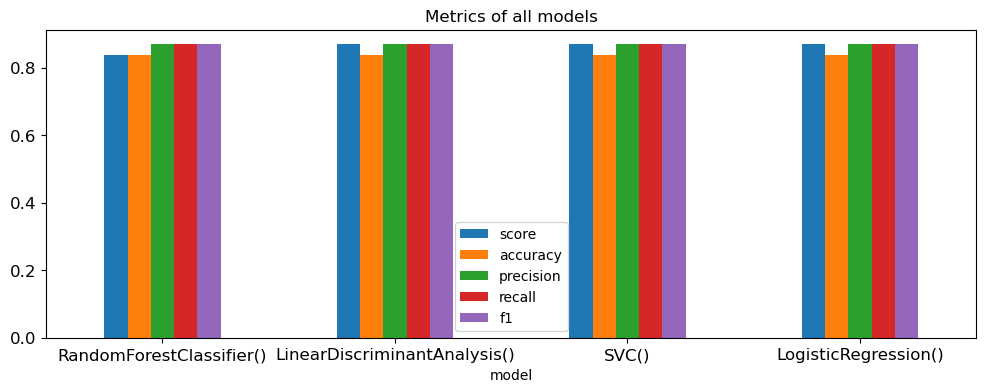

In [10]:
df_models.set_index('model').plot.bar(rot=0, title='Metrics of all models', figsize=(12, 4), fontsize=12)

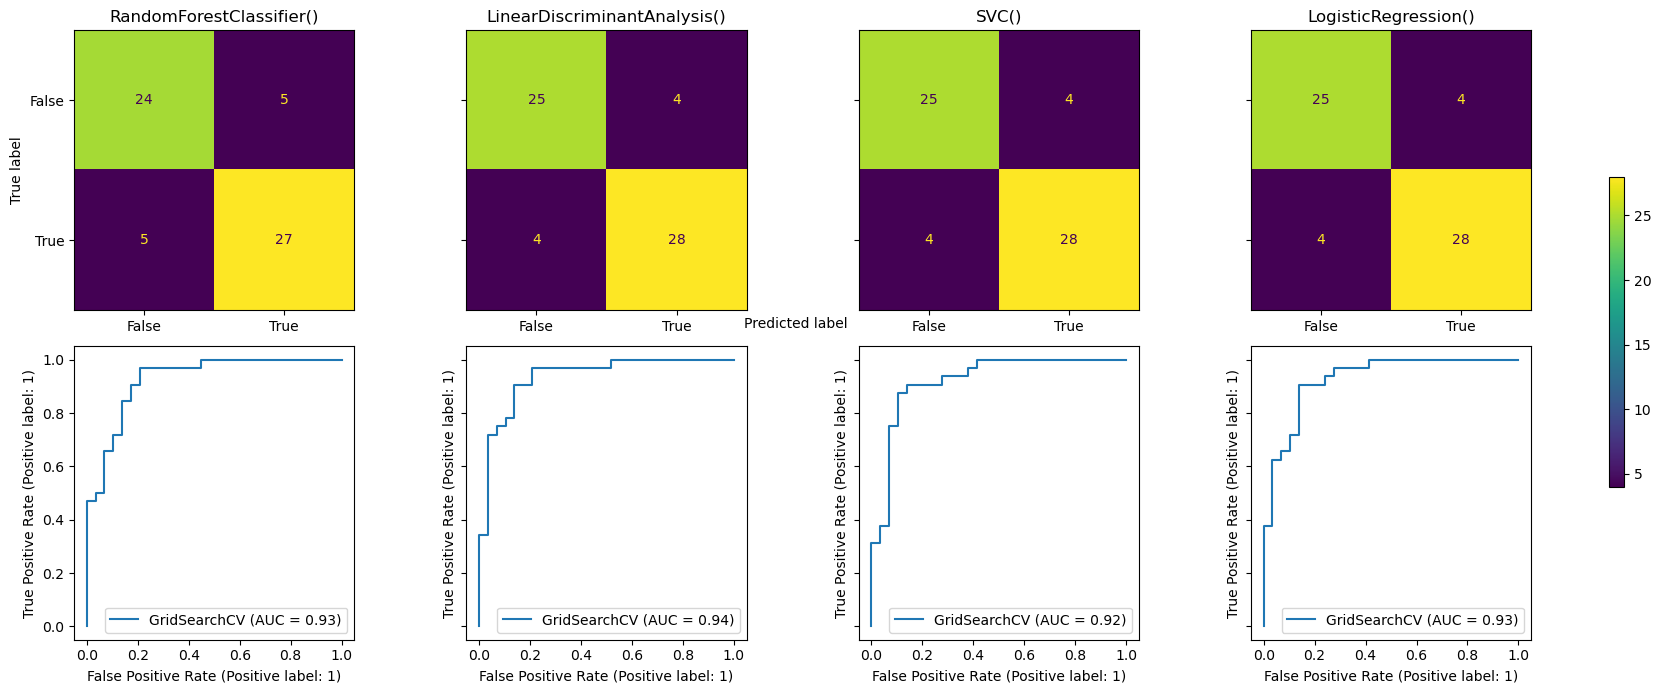

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib
from matplotlib import pyplot as plt

f, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8), sharey='row') # sharey -> comparten linea (para no repetir 'True label')

for x in range(len(l_gs_model)):
    y_pred = l_gs_model[x].predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred) # Sacamos las confusion_matrix de cada modelo
    display = ConfusionMatrixDisplay(cf_matrix,
                                     display_labels=['False', 'True']) # En este caso solo tenemos target(0 y 1)
    display.plot(ax=axes[0][x], xticks_rotation='horizontal')
    display.ax_.set_title(f'{l_models[x]}')
    display.im_.colorbar.remove()
    display.ax_.set_xlabel('') # Para dejar vacio el xlabel y que no se repita
    if x!=0:
        display.ax_.set_ylabel('') # Para dejar vacio el ylabel y que no se repita
    RocCurveDisplay.from_estimator(ax=axes[1][x], estimator=l_gs_model[x], X=X_test, y=y_test)

f.text(0.46, 0.5, 'Predicted label', ha='left') # Al dejar vacion el xlabel, lo ponemos para indicarlo
plt.subplots_adjust(wspace=0.40, hspace=0.1) # Para ajustar la separacion de las matrices

f.colorbar(display.im_, ax=axes, fraction=0.01)
plt.show()

### Pasos a seguir:
    1.Modeling a mano
    2.Modeling con Random Search
    3.Modeling con Grind Search

In [12]:
df_models

model     score  accuracy  precision    recall  \
0      RandomForestClassifier()  0.836066  0.836066   0.868852  0.868852   
1  LinearDiscriminantAnalysis()  0.868852  0.836066   0.868852  0.868852   
2                         SVC()  0.868852  0.836066   0.868852  0.868852   
3          LogisticRegression()  0.868852  0.836066   0.868852  0.868852   

         f1                                        best-params  
0  0.868852  {'model__max_depth': None, 'model__max_feature...  
1  0.868852  {'model__shrinkage': None, 'model__solver': 's...  
2  0.868852  {'model__kernel': 'linear', 'preprocessor__one...  
3  0.868852  {'model__solver': 'liblinear', 'preprocessor__...

In [13]:
df_models['best-params'][1]

{'model__shrinkage': None,
 'model__solver': 'svd',
 'preprocessor__one_zero__imputer__strategy': 'constant'}

In [14]:
np.random.seed(42)

lda = LinearDiscriminantAnalysis(shrinkage= None, solver='svd')

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [15]:
lda.coef_

array([[-0.00510728, -1.57524977,  0.83735536, -0.0169445 , -0.0020341 ,
         0.23159336,  0.42093523,  0.01875501, -1.38112071, -0.50983683,
         0.86068749, -0.8950129 , -1.02174584]])

In [16]:
lda_features = dict(zip(df.columns, list(lda.coef_[0])))
lda_features

{'age': -0.005107279923320326,
 'sex': -1.5752497720111887,
 'cp': 0.8373553586959872,
 'trestbps': -0.016944497123120947,
 'chol': -0.00203410090794053,
 'fbs': 0.23159335678357829,
 'restecg': 0.42093522551186563,
 'thalach': 0.01875500969880525,
 'exang': -1.381120709191063,
 'oldpeak': -0.5098368259888943,
 'slope': 0.8606874880911743,
 'ca': -0.8950128970910645,
 'thal': -1.0217458362643232}

<AxesSubplot: title={'center': 'Lda important features'}>

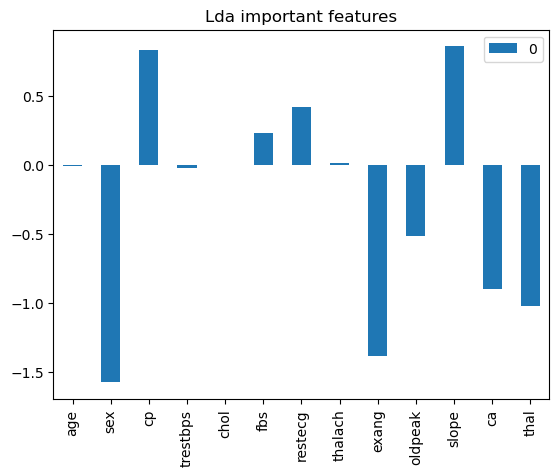

In [17]:
lda_df_features = pd.DataFrame(lda_features, index=[0])
lda_df_features.T.plot.bar(title='Lda important features')

In [18]:
from tabulate import tabulate

# Values with more distance

print(tabulate(pd.crosstab(df['sex'], df['target']), headers='keys', tablefmt='psql'))
print(tabulate(pd.crosstab(df['exang'], df['target']), headers='keys', tablefmt='psql'))
print(tabulate(pd.crosstab(df['cp'], df['target']), headers='keys', tablefmt='psql'))
print(tabulate(pd.crosstab(df['slope'], df['target']), headers='keys', tablefmt='psql'))

+-------+-----+-----+
|   sex |   0 |   1 |
|-------+-----+-----|
|     0 |  24 |  72 |
|     1 | 114 |  93 |
+-------+-----+-----+
+---------+-----+-----+
|   exang |   0 |   1 |
|---------+-----+-----|
|       0 |  62 | 142 |
|       1 |  76 |  23 |
+---------+-----+-----+
+------+-----+-----+
|   cp |   0 |   1 |
|------+-----+-----|
|    0 | 104 |  39 |
|    1 |   9 |  41 |
|    2 |  18 |  69 |
|    3 |   7 |  16 |
+------+-----+-----+
+---------+-----+-----+
|   slope |   0 |   1 |
|---------+-----+-----|
|       0 |  12 |   9 |
|       1 |  91 |  49 |
|       2 |  35 | 107 |
+---------+-----+-----+


In [19]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3  
..     ...  ..   ...  
188      1   1     3  
71       2   1     3  
106      1   1     2  
270      2   0     3  
102      2   2     2  

[242 rows x 13 columns]

In [20]:
np.where(X_train.dtypes != np.float)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12])

In [21]:
from catboost import CatBoostClassifier, Pool

cat_features = np.where(X_train.dtypes != np.float)[0] # Para pasarle las categorias(index columnas)

train_pool = Pool(X_train, # CatBoost junta en la Pool las train con las categorias
                 y_train,
                 cat_features)

cat_clf = CatBoostClassifier()


cat_clf.fit(train_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.005621
0:	learn: 0.6891859	total: 49.4ms	remaining: 49.3s
1:	learn: 0.6846503	total: 52.8ms	remaining: 26.3s
2:	learn: 0.6805103	total: 55ms	remaining: 18.3s
3:	learn: 0.6765895	total: 56.7ms	remaining: 14.1s
4:	learn: 0.6727577	total: 59.8ms	remaining: 11.9s
5:	learn: 0.6692774	total: 62.1ms	remaining: 10.3s
6:	learn: 0.6651163	total: 64.1ms	remaining: 9.09s
7:	learn: 0.6610312	total: 66.6ms	remaining: 8.26s
8:	learn: 0.6569415	total: 68.3ms	remaining: 7.52s
9:	learn: 0.6525232	total: 70ms	remaining: 6.93s
10:	learn: 0.6481584	total: 72ms	remaining: 6.47s
11:	learn: 0.6459065	total: 72.7ms	remaining: 5.99s
12:	learn: 0.6423627	total: 74.9ms	remaining: 5.68s
13:	learn: 0.6385934	total: 77ms	remaining: 5.42s
14:	learn: 0.6348098	total: 78.8ms	remaining: 5.18s
15:	learn: 0.6311262	total: 80.7ms	remaining: 4.96s
16:	learn: 0.6274742	total: 82.6ms	remaining: 4.78s
17:	learn: 0.6239731	total: 84.4ms	remaining: 4.61s
18:	learn: 0.6200747	total: 86.2ms	remaining: 4.45s


170:	learn: 0.3662186	total: 395ms	remaining: 1.92s
171:	learn: 0.3653712	total: 397ms	remaining: 1.91s
172:	learn: 0.3643649	total: 400ms	remaining: 1.91s
173:	learn: 0.3634152	total: 401ms	remaining: 1.91s
174:	learn: 0.3626973	total: 404ms	remaining: 1.9s
175:	learn: 0.3623175	total: 407ms	remaining: 1.91s
176:	learn: 0.3612570	total: 411ms	remaining: 1.91s
177:	learn: 0.3605706	total: 413ms	remaining: 1.91s
178:	learn: 0.3602452	total: 415ms	remaining: 1.91s
179:	learn: 0.3594020	total: 418ms	remaining: 1.9s
180:	learn: 0.3585960	total: 420ms	remaining: 1.9s
181:	learn: 0.3577279	total: 422ms	remaining: 1.9s
182:	learn: 0.3567877	total: 424ms	remaining: 1.89s
183:	learn: 0.3558582	total: 428ms	remaining: 1.9s
184:	learn: 0.3551768	total: 433ms	remaining: 1.91s
185:	learn: 0.3546483	total: 435ms	remaining: 1.9s
186:	learn: 0.3538301	total: 438ms	remaining: 1.9s
187:	learn: 0.3531968	total: 442ms	remaining: 1.91s
188:	learn: 0.3522950	total: 445ms	remaining: 1.91s
189:	learn: 0.35160

345:	learn: 0.2745012	total: 784ms	remaining: 1.48s
346:	learn: 0.2739203	total: 789ms	remaining: 1.48s
347:	learn: 0.2735687	total: 791ms	remaining: 1.48s
348:	learn: 0.2731134	total: 793ms	remaining: 1.48s
349:	learn: 0.2726501	total: 795ms	remaining: 1.48s
350:	learn: 0.2722021	total: 797ms	remaining: 1.47s
351:	learn: 0.2719671	total: 799ms	remaining: 1.47s
352:	learn: 0.2718793	total: 800ms	remaining: 1.47s
353:	learn: 0.2714627	total: 805ms	remaining: 1.47s
354:	learn: 0.2711475	total: 807ms	remaining: 1.47s
355:	learn: 0.2709786	total: 809ms	remaining: 1.46s
356:	learn: 0.2707275	total: 811ms	remaining: 1.46s
357:	learn: 0.2702426	total: 813ms	remaining: 1.46s
358:	learn: 0.2695592	total: 815ms	remaining: 1.45s
359:	learn: 0.2690790	total: 817ms	remaining: 1.45s
360:	learn: 0.2688907	total: 820ms	remaining: 1.45s
361:	learn: 0.2686054	total: 822ms	remaining: 1.45s
362:	learn: 0.2681033	total: 824ms	remaining: 1.45s
363:	learn: 0.2675316	total: 826ms	remaining: 1.44s
364:	learn: 

526:	learn: 0.2207123	total: 1.18s	remaining: 1.06s
527:	learn: 0.2207117	total: 1.18s	remaining: 1.05s
528:	learn: 0.2204142	total: 1.18s	remaining: 1.05s
529:	learn: 0.2201992	total: 1.18s	remaining: 1.05s
530:	learn: 0.2200131	total: 1.19s	remaining: 1.05s
531:	learn: 0.2197676	total: 1.19s	remaining: 1.04s
532:	learn: 0.2196883	total: 1.19s	remaining: 1.04s
533:	learn: 0.2193727	total: 1.19s	remaining: 1.04s
534:	learn: 0.2190855	total: 1.19s	remaining: 1.04s
535:	learn: 0.2188253	total: 1.2s	remaining: 1.03s
536:	learn: 0.2185431	total: 1.2s	remaining: 1.03s
537:	learn: 0.2183221	total: 1.2s	remaining: 1.03s
538:	learn: 0.2180427	total: 1.2s	remaining: 1.03s
539:	learn: 0.2179560	total: 1.2s	remaining: 1.02s
540:	learn: 0.2176648	total: 1.2s	remaining: 1.02s
541:	learn: 0.2174952	total: 1.21s	remaining: 1.02s
542:	learn: 0.2171247	total: 1.21s	remaining: 1.02s
543:	learn: 0.2168835	total: 1.21s	remaining: 1.01s
544:	learn: 0.2165141	total: 1.21s	remaining: 1.01s
545:	learn: 0.2163

690:	learn: 0.1866083	total: 1.58s	remaining: 709ms
691:	learn: 0.1863777	total: 1.59s	remaining: 707ms
692:	learn: 0.1860766	total: 1.59s	remaining: 704ms
693:	learn: 0.1859051	total: 1.59s	remaining: 703ms
694:	learn: 0.1856828	total: 1.6s	remaining: 702ms
695:	learn: 0.1855039	total: 1.6s	remaining: 700ms
696:	learn: 0.1854987	total: 1.6s	remaining: 697ms
697:	learn: 0.1853003	total: 1.6s	remaining: 694ms
698:	learn: 0.1850815	total: 1.61s	remaining: 692ms
699:	learn: 0.1850138	total: 1.61s	remaining: 690ms
700:	learn: 0.1847812	total: 1.61s	remaining: 688ms
701:	learn: 0.1846663	total: 1.62s	remaining: 686ms
702:	learn: 0.1844651	total: 1.62s	remaining: 684ms
703:	learn: 0.1843333	total: 1.63s	remaining: 683ms
704:	learn: 0.1839130	total: 1.63s	remaining: 681ms
705:	learn: 0.1837665	total: 1.63s	remaining: 679ms
706:	learn: 0.1834548	total: 1.63s	remaining: 677ms
707:	learn: 0.1832421	total: 1.64s	remaining: 675ms
708:	learn: 0.1829830	total: 1.64s	remaining: 673ms
709:	learn: 0.18

859:	learn: 0.1592309	total: 2.02s	remaining: 329ms
860:	learn: 0.1589730	total: 2.02s	remaining: 327ms
861:	learn: 0.1588779	total: 2.03s	remaining: 325ms
862:	learn: 0.1586439	total: 2.03s	remaining: 322ms
863:	learn: 0.1583768	total: 2.03s	remaining: 320ms
864:	learn: 0.1581353	total: 2.03s	remaining: 317ms
865:	learn: 0.1580399	total: 2.04s	remaining: 315ms
866:	learn: 0.1579389	total: 2.04s	remaining: 313ms
867:	learn: 0.1577654	total: 2.04s	remaining: 311ms
868:	learn: 0.1575479	total: 2.04s	remaining: 308ms
869:	learn: 0.1574349	total: 2.05s	remaining: 306ms
870:	learn: 0.1573399	total: 2.05s	remaining: 304ms
871:	learn: 0.1572146	total: 2.06s	remaining: 302ms
872:	learn: 0.1570367	total: 2.06s	remaining: 299ms
873:	learn: 0.1569041	total: 2.06s	remaining: 297ms
874:	learn: 0.1567420	total: 2.06s	remaining: 294ms
875:	learn: 0.1565888	total: 2.06s	remaining: 292ms
876:	learn: 0.1564101	total: 2.06s	remaining: 290ms
877:	learn: 0.1562317	total: 2.07s	remaining: 287ms
878:	learn: 

In [22]:
cat_clf.score(X_test, y_test)

0.8688524590163934

In [23]:
evaluate_preds(y_test, cat_clf.predict(X_test))

Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1: 0.88


{'accuracy': 0.868852, 'precision': 0.875, 'recall': 0.875, 'f1': 0.875}

In [24]:
cat_clf.feature_importances_

array([ 8.93399912,  4.15324891, 15.3649142 ,  4.98050757,  3.21730623,
        0.12746104,  5.58798437,  4.24864188,  4.85770959,  6.14470869,
       10.19070667, 18.4943541 , 13.69845762])

In [25]:
cat_dict = dict(zip(df.columns, list(cat_clf.feature_importances_)))
cat_dict

{'age': 8.933999116224681,
 'sex': 4.1532489103226675,
 'cp': 15.364914195180459,
 'trestbps': 4.980507571532253,
 'chol': 3.2173062281642726,
 'fbs': 0.12746104280508408,
 'restecg': 5.587984374026456,
 'thalach': 4.2486418832682125,
 'exang': 4.857709594620848,
 'oldpeak': 6.144708693409343,
 'slope': 10.190706670786952,
 'ca': 18.494354100367588,
 'thal': 13.69845761929122}

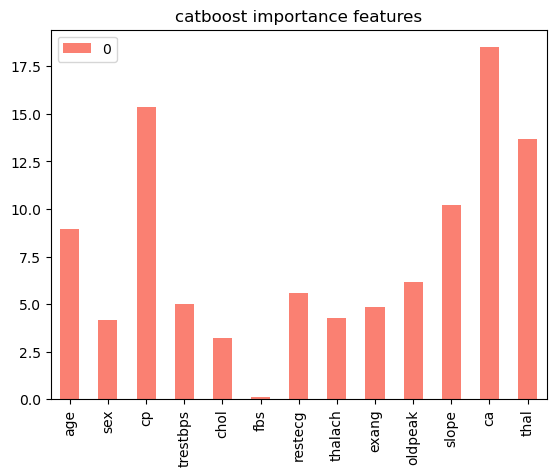

In [26]:
cat_df = pd.DataFrame(cat_dict, index=[0])
cat_df.T.plot.bar(title='catboost importance features', color='salmon');

In [27]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

cat_grid = {
    'n_estimators': [500, 800, 1000],
    'learning_rate': [0.5, 0.8],
    'max_depth': [None, 4, 6],
    'min_data_in_leaf': [None, 1, 0],
     'l2_leaf_reg': [3, 4]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

cat_features_gs = np.where(X_train.dtypes != np.float)[0]

train_pool_gs = Pool(X_train,
                 y_train,
                 cat_features_gs)

catb = CatBoostClassifier(custom_loss='Accuracy', loss_function='Logloss')


#randomized_search_result = catb.randomized_search(cat_grid,
#                                                   X=X_train,
#                                                   y=y_train,
#                                                   plot=True,
#                                                   n_iter=10,
#                                                   cv=5)
cat_grs = catb.grid_search(cat_grid,
                           X=train_pool_gs,
                           cv=5,
                           train_size=0.2,
                           plot=True)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4455392	test: 0.6683912	best: 0.6683912 (0)	total: 6.13ms	remaining: 3.06s
1:	learn: 0.3146905	test: 0.6192303	best: 0.6192303 (1)	total: 8ms	remaining: 1.99s
2:	learn: 0.1961721	test: 0.5680745	best: 0.5680745 (2)	total: 9.32ms	remaining: 1.54s
3:	learn: 0.1587577	test: 0.5659148	best: 0.5659148 (3)	total: 11.7ms	remaining: 1.45s
4:	learn: 0.1415885	test: 0.5789681	best: 0.5659148 (3)	total: 13.4ms	remaining: 1.33s
5:	learn: 0.1190050	test: 0.5501254	best: 0.5501254 (5)	total: 14.6ms	remaining: 1.2s
6:	learn: 0.1080821	test: 0.5507077	best: 0.5501254 (5)	total: 15.9ms	remaining: 1.12s
7:	learn: 0.0899560	test: 0.5962500	best: 0.5501254 (5)	total: 16.8ms	remaining: 1.04s
8:	learn: 0.0778325	test: 0.5893288	best: 0.5501254 (5)	total: 18.3ms	remaining: 998ms
9:	learn: 0.0669167	test: 0.5642707	best: 0.5501254 (5)	total: 19.6ms	remaining: 962ms
10:	learn: 0.0612484	test: 0.5681177	best: 0.5501254 (5)	total: 21.1ms	remaining: 940ms
11:	learn: 0.0599517	test: 0.5734697	best: 0.5

173:	learn: 0.0022982	test: 0.7125035	best: 0.5501254 (5)	total: 206ms	remaining: 386ms
174:	learn: 0.0022863	test: 0.7129029	best: 0.5501254 (5)	total: 207ms	remaining: 385ms
175:	learn: 0.0022506	test: 0.7125835	best: 0.5501254 (5)	total: 209ms	remaining: 385ms
176:	learn: 0.0022505	test: 0.7125869	best: 0.5501254 (5)	total: 210ms	remaining: 384ms
177:	learn: 0.0022348	test: 0.7127743	best: 0.5501254 (5)	total: 212ms	remaining: 383ms
178:	learn: 0.0022213	test: 0.7130446	best: 0.5501254 (5)	total: 213ms	remaining: 382ms
179:	learn: 0.0022010	test: 0.7125280	best: 0.5501254 (5)	total: 215ms	remaining: 382ms
180:	learn: 0.0022009	test: 0.7125335	best: 0.5501254 (5)	total: 216ms	remaining: 381ms
181:	learn: 0.0021725	test: 0.7126111	best: 0.5501254 (5)	total: 218ms	remaining: 380ms
182:	learn: 0.0021566	test: 0.7130704	best: 0.5501254 (5)	total: 219ms	remaining: 379ms
183:	learn: 0.0021562	test: 0.7131051	best: 0.5501254 (5)	total: 220ms	remaining: 378ms
184:	learn: 0.0021367	test: 0.71

305:	learn: 0.0014387	test: 0.7368806	best: 0.5501254 (5)	total: 402ms	remaining: 255ms
306:	learn: 0.0014386	test: 0.7368847	best: 0.5501254 (5)	total: 406ms	remaining: 255ms
307:	learn: 0.0014380	test: 0.7368917	best: 0.5501254 (5)	total: 407ms	remaining: 254ms
308:	learn: 0.0014380	test: 0.7368959	best: 0.5501254 (5)	total: 409ms	remaining: 253ms
309:	learn: 0.0014377	test: 0.7368980	best: 0.5501254 (5)	total: 411ms	remaining: 252ms
310:	learn: 0.0014376	test: 0.7368972	best: 0.5501254 (5)	total: 412ms	remaining: 250ms
311:	learn: 0.0014349	test: 0.7371084	best: 0.5501254 (5)	total: 413ms	remaining: 249ms
312:	learn: 0.0014349	test: 0.7371089	best: 0.5501254 (5)	total: 414ms	remaining: 247ms
313:	learn: 0.0014348	test: 0.7370542	best: 0.5501254 (5)	total: 415ms	remaining: 246ms
314:	learn: 0.0014348	test: 0.7370536	best: 0.5501254 (5)	total: 417ms	remaining: 245ms
315:	learn: 0.0014347	test: 0.7370539	best: 0.5501254 (5)	total: 418ms	remaining: 243ms
316:	learn: 0.0014317	test: 0.73

410:	learn: 0.0011633	test: 0.7463060	best: 0.5501254 (5)	total: 602ms	remaining: 130ms
411:	learn: 0.0011586	test: 0.7463797	best: 0.5501254 (5)	total: 604ms	remaining: 129ms
412:	learn: 0.0011584	test: 0.7463871	best: 0.5501254 (5)	total: 606ms	remaining: 128ms
413:	learn: 0.0011571	test: 0.7464837	best: 0.5501254 (5)	total: 609ms	remaining: 126ms
414:	learn: 0.0011571	test: 0.7464929	best: 0.5501254 (5)	total: 610ms	remaining: 125ms
415:	learn: 0.0011570	test: 0.7464896	best: 0.5501254 (5)	total: 612ms	remaining: 124ms
416:	learn: 0.0011530	test: 0.7466409	best: 0.5501254 (5)	total: 613ms	remaining: 122ms
417:	learn: 0.0011530	test: 0.7466409	best: 0.5501254 (5)	total: 614ms	remaining: 120ms
418:	learn: 0.0011530	test: 0.7466409	best: 0.5501254 (5)	total: 615ms	remaining: 119ms
419:	learn: 0.0011530	test: 0.7466388	best: 0.5501254 (5)	total: 617ms	remaining: 117ms
420:	learn: 0.0011519	test: 0.7466570	best: 0.5501254 (5)	total: 618ms	remaining: 116ms
421:	learn: 0.0011504	test: 0.74

52:	learn: 0.0039819	test: 0.6577430	best: 0.5791447 (9)	total: 79.5ms	remaining: 671ms
53:	learn: 0.0038981	test: 0.6585650	best: 0.5791447 (9)	total: 83.7ms	remaining: 692ms
54:	learn: 0.0038340	test: 0.6593197	best: 0.5791447 (9)	total: 85.4ms	remaining: 691ms
55:	learn: 0.0037537	test: 0.6605763	best: 0.5791447 (9)	total: 87.1ms	remaining: 691ms
56:	learn: 0.0036733	test: 0.6595311	best: 0.5791447 (9)	total: 89.2ms	remaining: 693ms
57:	learn: 0.0035564	test: 0.6597232	best: 0.5791447 (9)	total: 90.7ms	remaining: 691ms
58:	learn: 0.0034496	test: 0.6585422	best: 0.5791447 (9)	total: 92.4ms	remaining: 691ms
59:	learn: 0.0033514	test: 0.6585261	best: 0.5791447 (9)	total: 94.3ms	remaining: 692ms
60:	learn: 0.0032903	test: 0.6593439	best: 0.5791447 (9)	total: 95.7ms	remaining: 689ms
61:	learn: 0.0032040	test: 0.6592907	best: 0.5791447 (9)	total: 96.7ms	remaining: 683ms
62:	learn: 0.0031350	test: 0.6579762	best: 0.5791447 (9)	total: 98.1ms	remaining: 680ms
63:	learn: 0.0030984	test: 0.660

220:	learn: 0.0011920	test: 0.6939621	best: 0.5791447 (9)	total: 277ms	remaining: 350ms
221:	learn: 0.0011872	test: 0.6939810	best: 0.5791447 (9)	total: 279ms	remaining: 350ms
222:	learn: 0.0011766	test: 0.6945592	best: 0.5791447 (9)	total: 281ms	remaining: 350ms
223:	learn: 0.0011753	test: 0.6945751	best: 0.5791447 (9)	total: 283ms	remaining: 348ms
224:	learn: 0.0011751	test: 0.6945852	best: 0.5791447 (9)	total: 286ms	remaining: 349ms
225:	learn: 0.0011651	test: 0.6957340	best: 0.5791447 (9)	total: 287ms	remaining: 348ms
226:	learn: 0.0011650	test: 0.6957363	best: 0.5791447 (9)	total: 289ms	remaining: 347ms
227:	learn: 0.0011641	test: 0.6959059	best: 0.5791447 (9)	total: 290ms	remaining: 346ms
228:	learn: 0.0011574	test: 0.6966304	best: 0.5791447 (9)	total: 292ms	remaining: 345ms
229:	learn: 0.0011564	test: 0.6966711	best: 0.5791447 (9)	total: 294ms	remaining: 345ms
230:	learn: 0.0011561	test: 0.6966702	best: 0.5791447 (9)	total: 295ms	remaining: 344ms
231:	learn: 0.0011559	test: 0.69

392:	learn: 0.0009611	test: 0.7013919	best: 0.5791447 (9)	total: 476ms	remaining: 130ms
393:	learn: 0.0009610	test: 0.7013898	best: 0.5791447 (9)	total: 478ms	remaining: 129ms
394:	learn: 0.0009606	test: 0.7013918	best: 0.5791447 (9)	total: 485ms	remaining: 129ms
395:	learn: 0.0009606	test: 0.7013919	best: 0.5791447 (9)	total: 488ms	remaining: 128ms
396:	learn: 0.0009605	test: 0.7013959	best: 0.5791447 (9)	total: 490ms	remaining: 127ms
397:	learn: 0.0009605	test: 0.7013962	best: 0.5791447 (9)	total: 492ms	remaining: 126ms
398:	learn: 0.0009604	test: 0.7014055	best: 0.5791447 (9)	total: 493ms	remaining: 125ms
399:	learn: 0.0009601	test: 0.7013950	best: 0.5791447 (9)	total: 494ms	remaining: 123ms
400:	learn: 0.0009601	test: 0.7013940	best: 0.5791447 (9)	total: 495ms	remaining: 122ms
401:	learn: 0.0009601	test: 0.7013940	best: 0.5791447 (9)	total: 496ms	remaining: 121ms
402:	learn: 0.0009597	test: 0.7014179	best: 0.5791447 (9)	total: 497ms	remaining: 120ms
403:	learn: 0.0009578	test: 0.70

77:	learn: 0.0054012	test: 0.5836697	best: 0.4780243 (11)	total: 78.2ms	remaining: 423ms
78:	learn: 0.0053330	test: 0.5845482	best: 0.4780243 (11)	total: 81ms	remaining: 432ms
79:	learn: 0.0051162	test: 0.5876043	best: 0.4780243 (11)	total: 82.8ms	remaining: 435ms
80:	learn: 0.0050537	test: 0.5891515	best: 0.4780243 (11)	total: 84.2ms	remaining: 435ms
81:	learn: 0.0050210	test: 0.5888906	best: 0.4780243 (11)	total: 85.3ms	remaining: 435ms
82:	learn: 0.0049694	test: 0.5905342	best: 0.4780243 (11)	total: 86.5ms	remaining: 434ms
83:	learn: 0.0049258	test: 0.5911034	best: 0.4780243 (11)	total: 87.9ms	remaining: 435ms
84:	learn: 0.0048584	test: 0.5920241	best: 0.4780243 (11)	total: 89.3ms	remaining: 436ms
85:	learn: 0.0047261	test: 0.5934353	best: 0.4780243 (11)	total: 90.7ms	remaining: 437ms
86:	learn: 0.0046597	test: 0.5931199	best: 0.4780243 (11)	total: 92.2ms	remaining: 438ms
87:	learn: 0.0045661	test: 0.5937884	best: 0.4780243 (11)	total: 93.5ms	remaining: 438ms
88:	learn: 0.0044733	te

227:	learn: 0.0018662	test: 0.6457729	best: 0.4780243 (11)	total: 279ms	remaining: 332ms
228:	learn: 0.0018539	test: 0.6465544	best: 0.4780243 (11)	total: 285ms	remaining: 337ms
229:	learn: 0.0018393	test: 0.6476451	best: 0.4780243 (11)	total: 287ms	remaining: 336ms
230:	learn: 0.0018393	test: 0.6476451	best: 0.4780243 (11)	total: 288ms	remaining: 335ms
231:	learn: 0.0018391	test: 0.6476326	best: 0.4780243 (11)	total: 290ms	remaining: 335ms
232:	learn: 0.0018254	test: 0.6483727	best: 0.4780243 (11)	total: 292ms	remaining: 334ms
233:	learn: 0.0018251	test: 0.6483977	best: 0.4780243 (11)	total: 293ms	remaining: 333ms
234:	learn: 0.0018249	test: 0.6484108	best: 0.4780243 (11)	total: 295ms	remaining: 332ms
235:	learn: 0.0018241	test: 0.6484627	best: 0.4780243 (11)	total: 298ms	remaining: 333ms
236:	learn: 0.0018241	test: 0.6484640	best: 0.4780243 (11)	total: 301ms	remaining: 334ms
237:	learn: 0.0018128	test: 0.6491396	best: 0.4780243 (11)	total: 302ms	remaining: 333ms
238:	learn: 0.0018128

374:	learn: 0.0013926	test: 0.6643536	best: 0.4780243 (11)	total: 480ms	remaining: 160ms
375:	learn: 0.0013919	test: 0.6643847	best: 0.4780243 (11)	total: 481ms	remaining: 159ms
376:	learn: 0.0013912	test: 0.6644224	best: 0.4780243 (11)	total: 482ms	remaining: 157ms
377:	learn: 0.0013847	test: 0.6643389	best: 0.4780243 (11)	total: 484ms	remaining: 156ms
378:	learn: 0.0013844	test: 0.6643412	best: 0.4780243 (11)	total: 485ms	remaining: 155ms
379:	learn: 0.0013842	test: 0.6643580	best: 0.4780243 (11)	total: 487ms	remaining: 154ms
380:	learn: 0.0013842	test: 0.6643607	best: 0.4780243 (11)	total: 488ms	remaining: 152ms
381:	learn: 0.0013840	test: 0.6643675	best: 0.4780243 (11)	total: 490ms	remaining: 151ms
382:	learn: 0.0013751	test: 0.6642662	best: 0.4780243 (11)	total: 492ms	remaining: 150ms
383:	learn: 0.0013751	test: 0.6642666	best: 0.4780243 (11)	total: 493ms	remaining: 149ms
384:	learn: 0.0013748	test: 0.6642628	best: 0.4780243 (11)	total: 495ms	remaining: 148ms
385:	learn: 0.0013744

41:	learn: 0.0074089	test: 0.6711642	best: 0.5392446 (1)	total: 44.6ms	remaining: 486ms
42:	learn: 0.0070767	test: 0.6707849	best: 0.5392446 (1)	total: 50ms	remaining: 532ms
43:	learn: 0.0068164	test: 0.6755584	best: 0.5392446 (1)	total: 51.5ms	remaining: 534ms
44:	learn: 0.0063236	test: 0.6750568	best: 0.5392446 (1)	total: 53ms	remaining: 536ms
45:	learn: 0.0062002	test: 0.6760402	best: 0.5392446 (1)	total: 54.3ms	remaining: 536ms
46:	learn: 0.0060346	test: 0.6799553	best: 0.5392446 (1)	total: 56ms	remaining: 540ms
47:	learn: 0.0058335	test: 0.6810853	best: 0.5392446 (1)	total: 58ms	remaining: 546ms
48:	learn: 0.0056799	test: 0.6797556	best: 0.5392446 (1)	total: 59.4ms	remaining: 547ms
49:	learn: 0.0054765	test: 0.6837202	best: 0.5392446 (1)	total: 60.6ms	remaining: 545ms
50:	learn: 0.0053422	test: 0.6834612	best: 0.5392446 (1)	total: 61.8ms	remaining: 544ms
51:	learn: 0.0052233	test: 0.6835227	best: 0.5392446 (1)	total: 63.7ms	remaining: 549ms
52:	learn: 0.0050747	test: 0.6836571	bes

223:	learn: 0.0014833	test: 0.7416701	best: 0.5392446 (1)	total: 241ms	remaining: 297ms
224:	learn: 0.0014828	test: 0.7416991	best: 0.5392446 (1)	total: 249ms	remaining: 304ms
225:	learn: 0.0014828	test: 0.7416970	best: 0.5392446 (1)	total: 251ms	remaining: 305ms
226:	learn: 0.0014818	test: 0.7418015	best: 0.5392446 (1)	total: 253ms	remaining: 304ms
227:	learn: 0.0014814	test: 0.7418348	best: 0.5392446 (1)	total: 254ms	remaining: 303ms
228:	learn: 0.0014810	test: 0.7418451	best: 0.5392446 (1)	total: 255ms	remaining: 302ms
229:	learn: 0.0014807	test: 0.7417530	best: 0.5392446 (1)	total: 256ms	remaining: 301ms
230:	learn: 0.0014804	test: 0.7417577	best: 0.5392446 (1)	total: 258ms	remaining: 300ms
231:	learn: 0.0014636	test: 0.7422975	best: 0.5392446 (1)	total: 259ms	remaining: 299ms
232:	learn: 0.0014622	test: 0.7423992	best: 0.5392446 (1)	total: 260ms	remaining: 298ms
233:	learn: 0.0014617	test: 0.7424388	best: 0.5392446 (1)	total: 261ms	remaining: 297ms
234:	learn: 0.0014600	test: 0.74

395:	learn: 0.0011676	test: 0.7588044	best: 0.5392446 (1)	total: 442ms	remaining: 116ms
396:	learn: 0.0011673	test: 0.7588583	best: 0.5392446 (1)	total: 443ms	remaining: 115ms
397:	learn: 0.0011623	test: 0.7593898	best: 0.5392446 (1)	total: 449ms	remaining: 115ms
398:	learn: 0.0011608	test: 0.7594086	best: 0.5392446 (1)	total: 451ms	remaining: 114ms
399:	learn: 0.0011607	test: 0.7594132	best: 0.5392446 (1)	total: 453ms	remaining: 113ms
400:	learn: 0.0011607	test: 0.7594147	best: 0.5392446 (1)	total: 455ms	remaining: 112ms
401:	learn: 0.0011605	test: 0.7594303	best: 0.5392446 (1)	total: 456ms	remaining: 111ms
402:	learn: 0.0011604	test: 0.7594112	best: 0.5392446 (1)	total: 457ms	remaining: 110ms
403:	learn: 0.0011604	test: 0.7594213	best: 0.5392446 (1)	total: 459ms	remaining: 109ms
404:	learn: 0.0011603	test: 0.7594205	best: 0.5392446 (1)	total: 460ms	remaining: 108ms
405:	learn: 0.0011595	test: 0.7594806	best: 0.5392446 (1)	total: 462ms	remaining: 107ms
406:	learn: 0.0011592	test: 0.75

59:	learn: 0.0074937	test: 0.6498932	best: 0.5501254 (5)	total: 64.2ms	remaining: 792ms
60:	learn: 0.0074125	test: 0.6502305	best: 0.5501254 (5)	total: 73ms	remaining: 884ms
61:	learn: 0.0073150	test: 0.6493723	best: 0.5501254 (5)	total: 74.5ms	remaining: 887ms
62:	learn: 0.0072400	test: 0.6493956	best: 0.5501254 (5)	total: 76.3ms	remaining: 893ms
63:	learn: 0.0071471	test: 0.6497243	best: 0.5501254 (5)	total: 77.5ms	remaining: 891ms
64:	learn: 0.0069490	test: 0.6497516	best: 0.5501254 (5)	total: 79ms	remaining: 894ms
65:	learn: 0.0069126	test: 0.6498668	best: 0.5501254 (5)	total: 80.5ms	remaining: 895ms
66:	learn: 0.0068428	test: 0.6508171	best: 0.5501254 (5)	total: 81.7ms	remaining: 894ms
67:	learn: 0.0067223	test: 0.6542685	best: 0.5501254 (5)	total: 82.9ms	remaining: 892ms
68:	learn: 0.0066308	test: 0.6551018	best: 0.5501254 (5)	total: 84.3ms	remaining: 894ms
69:	learn: 0.0066136	test: 0.6548013	best: 0.5501254 (5)	total: 85.9ms	remaining: 896ms
70:	learn: 0.0065063	test: 0.6572270

218:	learn: 0.0017812	test: 0.7200168	best: 0.5501254 (5)	total: 265ms	remaining: 702ms
219:	learn: 0.0017810	test: 0.7200099	best: 0.5501254 (5)	total: 266ms	remaining: 702ms
220:	learn: 0.0017609	test: 0.7209721	best: 0.5501254 (5)	total: 268ms	remaining: 702ms
221:	learn: 0.0017601	test: 0.7210007	best: 0.5501254 (5)	total: 269ms	remaining: 701ms
222:	learn: 0.0017480	test: 0.7210928	best: 0.5501254 (5)	total: 271ms	remaining: 701ms
223:	learn: 0.0017417	test: 0.7209329	best: 0.5501254 (5)	total: 273ms	remaining: 701ms
224:	learn: 0.0017211	test: 0.7226765	best: 0.5501254 (5)	total: 275ms	remaining: 703ms
225:	learn: 0.0017211	test: 0.7226767	best: 0.5501254 (5)	total: 276ms	remaining: 702ms
226:	learn: 0.0017032	test: 0.7235878	best: 0.5501254 (5)	total: 277ms	remaining: 700ms
227:	learn: 0.0017025	test: 0.7235978	best: 0.5501254 (5)	total: 278ms	remaining: 698ms
228:	learn: 0.0017024	test: 0.7235981	best: 0.5501254 (5)	total: 279ms	remaining: 696ms
229:	learn: 0.0016836	test: 0.72

408:	learn: 0.0011638	test: 0.7462500	best: 0.5501254 (5)	total: 468ms	remaining: 447ms
409:	learn: 0.0011635	test: 0.7462918	best: 0.5501254 (5)	total: 469ms	remaining: 446ms
410:	learn: 0.0011633	test: 0.7463060	best: 0.5501254 (5)	total: 471ms	remaining: 445ms
411:	learn: 0.0011586	test: 0.7463797	best: 0.5501254 (5)	total: 472ms	remaining: 445ms
412:	learn: 0.0011584	test: 0.7463871	best: 0.5501254 (5)	total: 474ms	remaining: 444ms
413:	learn: 0.0011571	test: 0.7464837	best: 0.5501254 (5)	total: 475ms	remaining: 443ms
414:	learn: 0.0011571	test: 0.7464929	best: 0.5501254 (5)	total: 477ms	remaining: 442ms
415:	learn: 0.0011570	test: 0.7464896	best: 0.5501254 (5)	total: 478ms	remaining: 441ms
416:	learn: 0.0011530	test: 0.7466409	best: 0.5501254 (5)	total: 480ms	remaining: 440ms
417:	learn: 0.0011530	test: 0.7466409	best: 0.5501254 (5)	total: 481ms	remaining: 439ms
418:	learn: 0.0011530	test: 0.7466409	best: 0.5501254 (5)	total: 482ms	remaining: 438ms
419:	learn: 0.0011530	test: 0.74

625:	learn: 0.0010200	test: 0.7496439	best: 0.5501254 (5)	total: 676ms	remaining: 188ms
626:	learn: 0.0010200	test: 0.7496435	best: 0.5501254 (5)	total: 677ms	remaining: 187ms
627:	learn: 0.0010199	test: 0.7496436	best: 0.5501254 (5)	total: 678ms	remaining: 186ms
628:	learn: 0.0010199	test: 0.7496445	best: 0.5501254 (5)	total: 679ms	remaining: 185ms
629:	learn: 0.0010181	test: 0.7496827	best: 0.5501254 (5)	total: 680ms	remaining: 184ms
630:	learn: 0.0010181	test: 0.7496644	best: 0.5501254 (5)	total: 682ms	remaining: 183ms
631:	learn: 0.0010181	test: 0.7496644	best: 0.5501254 (5)	total: 683ms	remaining: 181ms
632:	learn: 0.0010180	test: 0.7496637	best: 0.5501254 (5)	total: 684ms	remaining: 180ms
633:	learn: 0.0010165	test: 0.7496855	best: 0.5501254 (5)	total: 685ms	remaining: 179ms
634:	learn: 0.0010165	test: 0.7496862	best: 0.5501254 (5)	total: 686ms	remaining: 178ms
635:	learn: 0.0010165	test: 0.7496872	best: 0.5501254 (5)	total: 687ms	remaining: 177ms
636:	learn: 0.0010164	test: 0.74

34:	learn: 0.0075506	test: 0.6336395	best: 0.5791447 (9)	total: 40.6ms	remaining: 887ms
35:	learn: 0.0071405	test: 0.6332666	best: 0.5791447 (9)	total: 42.2ms	remaining: 896ms
36:	learn: 0.0069193	test: 0.6400982	best: 0.5791447 (9)	total: 43.6ms	remaining: 899ms
37:	learn: 0.0066665	test: 0.6417187	best: 0.5791447 (9)	total: 45.5ms	remaining: 911ms
38:	learn: 0.0059986	test: 0.6395817	best: 0.5791447 (9)	total: 47.1ms	remaining: 919ms
39:	learn: 0.0057198	test: 0.6346211	best: 0.5791447 (9)	total: 48.5ms	remaining: 921ms
40:	learn: 0.0055979	test: 0.6353732	best: 0.5791447 (9)	total: 49.7ms	remaining: 921ms
41:	learn: 0.0052410	test: 0.6411997	best: 0.5791447 (9)	total: 51.1ms	remaining: 922ms
42:	learn: 0.0050550	test: 0.6427476	best: 0.5791447 (9)	total: 53ms	remaining: 933ms
43:	learn: 0.0048829	test: 0.6486103	best: 0.5791447 (9)	total: 54.4ms	remaining: 935ms
44:	learn: 0.0047966	test: 0.6482795	best: 0.5791447 (9)	total: 55.8ms	remaining: 936ms
45:	learn: 0.0045479	test: 0.64669

178:	learn: 0.0012750	test: 0.6929923	best: 0.5791447 (9)	total: 249ms	remaining: 865ms
179:	learn: 0.0012586	test: 0.6928829	best: 0.5791447 (9)	total: 251ms	remaining: 866ms
180:	learn: 0.0012582	test: 0.6928614	best: 0.5791447 (9)	total: 253ms	remaining: 865ms
181:	learn: 0.0012582	test: 0.6928614	best: 0.5791447 (9)	total: 254ms	remaining: 862ms
182:	learn: 0.0012582	test: 0.6928614	best: 0.5791447 (9)	total: 255ms	remaining: 860ms
183:	learn: 0.0012582	test: 0.6928614	best: 0.5791447 (9)	total: 256ms	remaining: 859ms
184:	learn: 0.0012582	test: 0.6928614	best: 0.5791447 (9)	total: 258ms	remaining: 857ms
185:	learn: 0.0012582	test: 0.6928611	best: 0.5791447 (9)	total: 259ms	remaining: 855ms
186:	learn: 0.0012579	test: 0.6928667	best: 0.5791447 (9)	total: 260ms	remaining: 853ms
187:	learn: 0.0012576	test: 0.6928832	best: 0.5791447 (9)	total: 261ms	remaining: 851ms
188:	learn: 0.0012574	test: 0.6928853	best: 0.5791447 (9)	total: 263ms	remaining: 849ms
189:	learn: 0.0012573	test: 0.69

333:	learn: 0.0010076	test: 0.6994344	best: 0.5791447 (9)	total: 449ms	remaining: 626ms
334:	learn: 0.0010072	test: 0.6994527	best: 0.5791447 (9)	total: 451ms	remaining: 625ms
335:	learn: 0.0010068	test: 0.6994395	best: 0.5791447 (9)	total: 452ms	remaining: 624ms
336:	learn: 0.0010068	test: 0.6994395	best: 0.5791447 (9)	total: 453ms	remaining: 623ms
337:	learn: 0.0010068	test: 0.6994395	best: 0.5791447 (9)	total: 454ms	remaining: 621ms
338:	learn: 0.0010068	test: 0.6994402	best: 0.5791447 (9)	total: 456ms	remaining: 620ms
339:	learn: 0.0010037	test: 0.6994550	best: 0.5791447 (9)	total: 457ms	remaining: 618ms
340:	learn: 0.0010018	test: 0.6995921	best: 0.5791447 (9)	total: 458ms	remaining: 616ms
341:	learn: 0.0009919	test: 0.6994453	best: 0.5791447 (9)	total: 459ms	remaining: 615ms
342:	learn: 0.0009918	test: 0.6994499	best: 0.5791447 (9)	total: 460ms	remaining: 614ms
343:	learn: 0.0009853	test: 0.6998460	best: 0.5791447 (9)	total: 462ms	remaining: 612ms
344:	learn: 0.0009796	test: 0.70

477:	learn: 0.0009052	test: 0.7035255	best: 0.5791447 (9)	total: 646ms	remaining: 435ms
478:	learn: 0.0009050	test: 0.7035328	best: 0.5791447 (9)	total: 647ms	remaining: 434ms
479:	learn: 0.0009049	test: 0.7035456	best: 0.5791447 (9)	total: 649ms	remaining: 432ms
480:	learn: 0.0009048	test: 0.7035464	best: 0.5791447 (9)	total: 650ms	remaining: 431ms
481:	learn: 0.0009039	test: 0.7037483	best: 0.5791447 (9)	total: 651ms	remaining: 430ms
482:	learn: 0.0009039	test: 0.7037502	best: 0.5791447 (9)	total: 653ms	remaining: 428ms
483:	learn: 0.0009037	test: 0.7037761	best: 0.5791447 (9)	total: 654ms	remaining: 427ms
484:	learn: 0.0009037	test: 0.7037763	best: 0.5791447 (9)	total: 655ms	remaining: 425ms
485:	learn: 0.0009034	test: 0.7038164	best: 0.5791447 (9)	total: 656ms	remaining: 424ms
486:	learn: 0.0009033	test: 0.7038176	best: 0.5791447 (9)	total: 658ms	remaining: 423ms
487:	learn: 0.0009021	test: 0.7038557	best: 0.5791447 (9)	total: 659ms	remaining: 421ms
488:	learn: 0.0009020	test: 0.70

632:	learn: 0.0007840	test: 0.7147806	best: 0.5791447 (9)	total: 843ms	remaining: 222ms
633:	learn: 0.0007840	test: 0.7147853	best: 0.5791447 (9)	total: 853ms	remaining: 223ms
634:	learn: 0.0007839	test: 0.7147870	best: 0.5791447 (9)	total: 854ms	remaining: 222ms
635:	learn: 0.0007838	test: 0.7148068	best: 0.5791447 (9)	total: 855ms	remaining: 220ms
636:	learn: 0.0007836	test: 0.7148186	best: 0.5791447 (9)	total: 856ms	remaining: 219ms
637:	learn: 0.0007835	test: 0.7148459	best: 0.5791447 (9)	total: 857ms	remaining: 218ms
638:	learn: 0.0007829	test: 0.7150183	best: 0.5791447 (9)	total: 858ms	remaining: 216ms
639:	learn: 0.0007829	test: 0.7150183	best: 0.5791447 (9)	total: 860ms	remaining: 215ms
640:	learn: 0.0007810	test: 0.7149873	best: 0.5791447 (9)	total: 861ms	remaining: 213ms
641:	learn: 0.0007808	test: 0.7149930	best: 0.5791447 (9)	total: 862ms	remaining: 212ms
642:	learn: 0.0007808	test: 0.7150142	best: 0.5791447 (9)	total: 863ms	remaining: 211ms
643:	learn: 0.0007807	test: 0.71

9:	learn: 0.0632568	test: 0.4877809	best: 0.4824300 (6)	total: 12.4ms	remaining: 978ms
10:	learn: 0.0585032	test: 0.4847876	best: 0.4824300 (6)	total: 14.2ms	remaining: 1.02s
11:	learn: 0.0535268	test: 0.4780243	best: 0.4780243 (11)	total: 16.1ms	remaining: 1.06s
12:	learn: 0.0480531	test: 0.4807950	best: 0.4780243 (11)	total: 17.3ms	remaining: 1.04s
13:	learn: 0.0415257	test: 0.4945068	best: 0.4780243 (11)	total: 18.6ms	remaining: 1.04s
14:	learn: 0.0356586	test: 0.4915306	best: 0.4780243 (11)	total: 19.6ms	remaining: 1.02s
15:	learn: 0.0330689	test: 0.4917213	best: 0.4780243 (11)	total: 20.7ms	remaining: 1.01s
16:	learn: 0.0307432	test: 0.4903266	best: 0.4780243 (11)	total: 21.8ms	remaining: 1s
17:	learn: 0.0295181	test: 0.4942075	best: 0.4780243 (11)	total: 23ms	remaining: 1000ms
18:	learn: 0.0280690	test: 0.4955220	best: 0.4780243 (11)	total: 24.5ms	remaining: 1.01s
19:	learn: 0.0258016	test: 0.4964559	best: 0.4780243 (11)	total: 25.6ms	remaining: 999ms
20:	learn: 0.0240831	test: 0

164:	learn: 0.0025457	test: 0.6324251	best: 0.4780243 (11)	total: 213ms	remaining: 821ms
165:	learn: 0.0025197	test: 0.6323201	best: 0.4780243 (11)	total: 215ms	remaining: 820ms
166:	learn: 0.0025067	test: 0.6327341	best: 0.4780243 (11)	total: 216ms	remaining: 818ms
167:	learn: 0.0024801	test: 0.6331596	best: 0.4780243 (11)	total: 217ms	remaining: 816ms
168:	learn: 0.0024700	test: 0.6333924	best: 0.4780243 (11)	total: 218ms	remaining: 814ms
169:	learn: 0.0024498	test: 0.6342594	best: 0.4780243 (11)	total: 219ms	remaining: 812ms
170:	learn: 0.0024233	test: 0.6340265	best: 0.4780243 (11)	total: 220ms	remaining: 811ms
171:	learn: 0.0024175	test: 0.6341430	best: 0.4780243 (11)	total: 222ms	remaining: 809ms
172:	learn: 0.0024051	test: 0.6347158	best: 0.4780243 (11)	total: 223ms	remaining: 807ms
173:	learn: 0.0023907	test: 0.6346199	best: 0.4780243 (11)	total: 224ms	remaining: 806ms
174:	learn: 0.0023752	test: 0.6352765	best: 0.4780243 (11)	total: 225ms	remaining: 805ms
175:	learn: 0.0023581

287:	learn: 0.0016174	test: 0.6553533	best: 0.4780243 (11)	total: 413ms	remaining: 735ms
288:	learn: 0.0016172	test: 0.6553635	best: 0.4780243 (11)	total: 415ms	remaining: 733ms
289:	learn: 0.0016073	test: 0.6555251	best: 0.4780243 (11)	total: 418ms	remaining: 735ms
290:	learn: 0.0016072	test: 0.6555158	best: 0.4780243 (11)	total: 419ms	remaining: 734ms
291:	learn: 0.0015972	test: 0.6559845	best: 0.4780243 (11)	total: 421ms	remaining: 732ms
292:	learn: 0.0015899	test: 0.6563079	best: 0.4780243 (11)	total: 422ms	remaining: 731ms
293:	learn: 0.0015898	test: 0.6563159	best: 0.4780243 (11)	total: 424ms	remaining: 729ms
294:	learn: 0.0015898	test: 0.6563159	best: 0.4780243 (11)	total: 426ms	remaining: 728ms
295:	learn: 0.0015788	test: 0.6567408	best: 0.4780243 (11)	total: 428ms	remaining: 729ms
296:	learn: 0.0015776	test: 0.6567409	best: 0.4780243 (11)	total: 430ms	remaining: 728ms
297:	learn: 0.0015773	test: 0.6567594	best: 0.4780243 (11)	total: 431ms	remaining: 726ms
298:	learn: 0.0015770

432:	learn: 0.0013152	test: 0.6676894	best: 0.4780243 (11)	total: 610ms	remaining: 517ms
433:	learn: 0.0013150	test: 0.6677194	best: 0.4780243 (11)	total: 612ms	remaining: 516ms
434:	learn: 0.0013147	test: 0.6677403	best: 0.4780243 (11)	total: 614ms	remaining: 515ms
435:	learn: 0.0013127	test: 0.6678020	best: 0.4780243 (11)	total: 615ms	remaining: 513ms
436:	learn: 0.0013125	test: 0.6678120	best: 0.4780243 (11)	total: 621ms	remaining: 516ms
437:	learn: 0.0013124	test: 0.6678288	best: 0.4780243 (11)	total: 622ms	remaining: 514ms
438:	learn: 0.0013098	test: 0.6678914	best: 0.4780243 (11)	total: 624ms	remaining: 513ms
439:	learn: 0.0013097	test: 0.6678924	best: 0.4780243 (11)	total: 625ms	remaining: 512ms
440:	learn: 0.0013094	test: 0.6679169	best: 0.4780243 (11)	total: 627ms	remaining: 510ms
441:	learn: 0.0013094	test: 0.6679182	best: 0.4780243 (11)	total: 628ms	remaining: 509ms
442:	learn: 0.0013094	test: 0.6679208	best: 0.4780243 (11)	total: 630ms	remaining: 507ms
443:	learn: 0.0013079

616:	learn: 0.0011745	test: 0.6744735	best: 0.4780243 (11)	total: 812ms	remaining: 241ms
617:	learn: 0.0011741	test: 0.6744916	best: 0.4780243 (11)	total: 813ms	remaining: 239ms
618:	learn: 0.0011738	test: 0.6745220	best: 0.4780243 (11)	total: 814ms	remaining: 238ms
619:	learn: 0.0011738	test: 0.6745220	best: 0.4780243 (11)	total: 815ms	remaining: 237ms
620:	learn: 0.0011723	test: 0.6745843	best: 0.4780243 (11)	total: 816ms	remaining: 235ms
621:	learn: 0.0011723	test: 0.6745843	best: 0.4780243 (11)	total: 817ms	remaining: 234ms
622:	learn: 0.0011722	test: 0.6745828	best: 0.4780243 (11)	total: 819ms	remaining: 233ms
623:	learn: 0.0011721	test: 0.6745835	best: 0.4780243 (11)	total: 820ms	remaining: 231ms
624:	learn: 0.0011719	test: 0.6745857	best: 0.4780243 (11)	total: 821ms	remaining: 230ms
625:	learn: 0.0011719	test: 0.6745872	best: 0.4780243 (11)	total: 823ms	remaining: 229ms
626:	learn: 0.0011719	test: 0.6745881	best: 0.4780243 (11)	total: 824ms	remaining: 227ms
627:	learn: 0.0011719

791:	learn: 0.0010941	test: 0.6787513	best: 0.4780243 (11)	total: 1.01s	remaining: 10.2ms
792:	learn: 0.0010940	test: 0.6787649	best: 0.4780243 (11)	total: 1.01s	remaining: 8.91ms
793:	learn: 0.0010939	test: 0.6787750	best: 0.4780243 (11)	total: 1.01s	remaining: 7.65ms
794:	learn: 0.0010938	test: 0.6787799	best: 0.4780243 (11)	total: 1.01s	remaining: 6.37ms
795:	learn: 0.0010934	test: 0.6788546	best: 0.4780243 (11)	total: 1.01s	remaining: 5.09ms
796:	learn: 0.0010919	test: 0.6788202	best: 0.4780243 (11)	total: 1.01s	remaining: 3.82ms
797:	learn: 0.0010914	test: 0.6788739	best: 0.4780243 (11)	total: 1.01s	remaining: 2.54ms
798:	learn: 0.0010913	test: 0.6788804	best: 0.4780243 (11)	total: 1.02s	remaining: 1.27ms
799:	learn: 0.0010908	test: 0.6789718	best: 0.4780243 (11)	total: 1.02s	remaining: 0us

bestTest = 0.4780242939
bestIteration = 11

6:	loss: 0.4780243	best: 0.4780243 (2)	total: 5.54s	remaining: 1m 19s
0:	learn: 0.3615356	test: 0.6367303	best: 0.6367303 (0)	total: 1.72ms	remainin

136:	learn: 0.0019589	test: 0.7232954	best: 0.5392446 (1)	total: 188ms	remaining: 910ms
137:	learn: 0.0019588	test: 0.7233010	best: 0.5392446 (1)	total: 193ms	remaining: 926ms
138:	learn: 0.0019401	test: 0.7252228	best: 0.5392446 (1)	total: 195ms	remaining: 925ms
139:	learn: 0.0019200	test: 0.7259057	best: 0.5392446 (1)	total: 196ms	remaining: 924ms
140:	learn: 0.0018946	test: 0.7255232	best: 0.5392446 (1)	total: 197ms	remaining: 922ms
141:	learn: 0.0018852	test: 0.7263394	best: 0.5392446 (1)	total: 199ms	remaining: 921ms
142:	learn: 0.0018848	test: 0.7263408	best: 0.5392446 (1)	total: 201ms	remaining: 924ms
143:	learn: 0.0018847	test: 0.7263446	best: 0.5392446 (1)	total: 202ms	remaining: 922ms
144:	learn: 0.0018847	test: 0.7263446	best: 0.5392446 (1)	total: 204ms	remaining: 920ms
145:	learn: 0.0018847	test: 0.7263469	best: 0.5392446 (1)	total: 205ms	remaining: 917ms
146:	learn: 0.0018833	test: 0.7264465	best: 0.5392446 (1)	total: 206ms	remaining: 914ms
147:	learn: 0.0018824	test: 0.72

307:	learn: 0.0012858	test: 0.7536750	best: 0.5392446 (1)	total: 388ms	remaining: 620ms
308:	learn: 0.0012825	test: 0.7541688	best: 0.5392446 (1)	total: 390ms	remaining: 620ms
309:	learn: 0.0012820	test: 0.7541913	best: 0.5392446 (1)	total: 392ms	remaining: 619ms
310:	learn: 0.0012789	test: 0.7542727	best: 0.5392446 (1)	total: 393ms	remaining: 618ms
311:	learn: 0.0012789	test: 0.7542711	best: 0.5392446 (1)	total: 395ms	remaining: 617ms
312:	learn: 0.0012670	test: 0.7545392	best: 0.5392446 (1)	total: 396ms	remaining: 616ms
313:	learn: 0.0012538	test: 0.7543901	best: 0.5392446 (1)	total: 397ms	remaining: 615ms
314:	learn: 0.0012524	test: 0.7545510	best: 0.5392446 (1)	total: 399ms	remaining: 614ms
315:	learn: 0.0012523	test: 0.7545571	best: 0.5392446 (1)	total: 400ms	remaining: 613ms
316:	learn: 0.0012510	test: 0.7546446	best: 0.5392446 (1)	total: 402ms	remaining: 612ms
317:	learn: 0.0012443	test: 0.7545921	best: 0.5392446 (1)	total: 404ms	remaining: 612ms
318:	learn: 0.0012442	test: 0.75

482:	learn: 0.0010829	test: 0.7646612	best: 0.5392446 (1)	total: 585ms	remaining: 384ms
483:	learn: 0.0010829	test: 0.7646615	best: 0.5392446 (1)	total: 586ms	remaining: 383ms
484:	learn: 0.0010828	test: 0.7646617	best: 0.5392446 (1)	total: 592ms	remaining: 384ms
485:	learn: 0.0010772	test: 0.7653455	best: 0.5392446 (1)	total: 593ms	remaining: 383ms
486:	learn: 0.0010772	test: 0.7653456	best: 0.5392446 (1)	total: 595ms	remaining: 382ms
487:	learn: 0.0010771	test: 0.7653570	best: 0.5392446 (1)	total: 596ms	remaining: 381ms
488:	learn: 0.0010771	test: 0.7653583	best: 0.5392446 (1)	total: 597ms	remaining: 380ms
489:	learn: 0.0010771	test: 0.7653493	best: 0.5392446 (1)	total: 598ms	remaining: 378ms
490:	learn: 0.0010765	test: 0.7653082	best: 0.5392446 (1)	total: 599ms	remaining: 377ms
491:	learn: 0.0010754	test: 0.7654621	best: 0.5392446 (1)	total: 600ms	remaining: 376ms
492:	learn: 0.0010739	test: 0.7656647	best: 0.5392446 (1)	total: 601ms	remaining: 374ms
493:	learn: 0.0010739	test: 0.76

678:	learn: 0.0009675	test: 0.7714805	best: 0.5392446 (1)	total: 787ms	remaining: 140ms
679:	learn: 0.0009672	test: 0.7714785	best: 0.5392446 (1)	total: 788ms	remaining: 139ms
680:	learn: 0.0009672	test: 0.7714428	best: 0.5392446 (1)	total: 789ms	remaining: 138ms
681:	learn: 0.0009670	test: 0.7714660	best: 0.5392446 (1)	total: 791ms	remaining: 137ms
682:	learn: 0.0009669	test: 0.7714982	best: 0.5392446 (1)	total: 792ms	remaining: 136ms
683:	learn: 0.0009668	test: 0.7715082	best: 0.5392446 (1)	total: 793ms	remaining: 134ms
684:	learn: 0.0009667	test: 0.7715218	best: 0.5392446 (1)	total: 794ms	remaining: 133ms
685:	learn: 0.0009666	test: 0.7715215	best: 0.5392446 (1)	total: 795ms	remaining: 132ms
686:	learn: 0.0009666	test: 0.7714873	best: 0.5392446 (1)	total: 796ms	remaining: 131ms
687:	learn: 0.0009657	test: 0.7715846	best: 0.5392446 (1)	total: 797ms	remaining: 130ms
688:	learn: 0.0009655	test: 0.7715619	best: 0.5392446 (1)	total: 799ms	remaining: 129ms
689:	learn: 0.0009654	test: 0.77

62:	learn: 0.0072400	test: 0.6493956	best: 0.5501254 (5)	total: 69.3ms	remaining: 1.03s
63:	learn: 0.0071471	test: 0.6497243	best: 0.5501254 (5)	total: 71.6ms	remaining: 1.05s
64:	learn: 0.0069490	test: 0.6497516	best: 0.5501254 (5)	total: 74ms	remaining: 1.06s
65:	learn: 0.0069126	test: 0.6498668	best: 0.5501254 (5)	total: 76.1ms	remaining: 1.08s
66:	learn: 0.0068428	test: 0.6508171	best: 0.5501254 (5)	total: 78.1ms	remaining: 1.09s
67:	learn: 0.0067223	test: 0.6542685	best: 0.5501254 (5)	total: 79.9ms	remaining: 1.09s
68:	learn: 0.0066308	test: 0.6551018	best: 0.5501254 (5)	total: 81.4ms	remaining: 1.1s
69:	learn: 0.0066136	test: 0.6548013	best: 0.5501254 (5)	total: 82.8ms	remaining: 1.1s
70:	learn: 0.0065063	test: 0.6572270	best: 0.5501254 (5)	total: 84.3ms	remaining: 1.1s
71:	learn: 0.0063778	test: 0.6581878	best: 0.5501254 (5)	total: 85.5ms	remaining: 1.1s
72:	learn: 0.0063776	test: 0.6581823	best: 0.5501254 (5)	total: 87ms	remaining: 1.1s
73:	learn: 0.0063634	test: 0.6589385	best

241:	learn: 0.0016120	test: 0.7317493	best: 0.5501254 (5)	total: 269ms	remaining: 841ms
242:	learn: 0.0016120	test: 0.7317463	best: 0.5501254 (5)	total: 273ms	remaining: 852ms
243:	learn: 0.0016117	test: 0.7317094	best: 0.5501254 (5)	total: 275ms	remaining: 851ms
244:	learn: 0.0016115	test: 0.7317185	best: 0.5501254 (5)	total: 276ms	remaining: 851ms
245:	learn: 0.0016114	test: 0.7317314	best: 0.5501254 (5)	total: 277ms	remaining: 851ms
246:	learn: 0.0016113	test: 0.7317310	best: 0.5501254 (5)	total: 279ms	remaining: 849ms
247:	learn: 0.0016113	test: 0.7317253	best: 0.5501254 (5)	total: 280ms	remaining: 848ms
248:	learn: 0.0016010	test: 0.7328830	best: 0.5501254 (5)	total: 281ms	remaining: 848ms
249:	learn: 0.0015949	test: 0.7330202	best: 0.5501254 (5)	total: 282ms	remaining: 847ms
250:	learn: 0.0015946	test: 0.7330486	best: 0.5501254 (5)	total: 284ms	remaining: 846ms
251:	learn: 0.0015945	test: 0.7330459	best: 0.5501254 (5)	total: 285ms	remaining: 845ms
252:	learn: 0.0015944	test: 0.73

406:	learn: 0.0011663	test: 0.7462109	best: 0.5501254 (5)	total: 466ms	remaining: 679ms
407:	learn: 0.0011663	test: 0.7462111	best: 0.5501254 (5)	total: 468ms	remaining: 679ms
408:	learn: 0.0011638	test: 0.7462500	best: 0.5501254 (5)	total: 469ms	remaining: 678ms
409:	learn: 0.0011635	test: 0.7462918	best: 0.5501254 (5)	total: 471ms	remaining: 678ms
410:	learn: 0.0011633	test: 0.7463060	best: 0.5501254 (5)	total: 473ms	remaining: 677ms
411:	learn: 0.0011586	test: 0.7463797	best: 0.5501254 (5)	total: 474ms	remaining: 677ms
412:	learn: 0.0011584	test: 0.7463871	best: 0.5501254 (5)	total: 475ms	remaining: 676ms
413:	learn: 0.0011571	test: 0.7464837	best: 0.5501254 (5)	total: 477ms	remaining: 675ms
414:	learn: 0.0011571	test: 0.7464929	best: 0.5501254 (5)	total: 478ms	remaining: 673ms
415:	learn: 0.0011570	test: 0.7464896	best: 0.5501254 (5)	total: 479ms	remaining: 673ms
416:	learn: 0.0011530	test: 0.7466409	best: 0.5501254 (5)	total: 480ms	remaining: 672ms
417:	learn: 0.0011530	test: 0.74

576:	learn: 0.0010481	test: 0.7488851	best: 0.5501254 (5)	total: 665ms	remaining: 488ms
577:	learn: 0.0010412	test: 0.7489927	best: 0.5501254 (5)	total: 667ms	remaining: 487ms
578:	learn: 0.0010410	test: 0.7489991	best: 0.5501254 (5)	total: 668ms	remaining: 486ms
579:	learn: 0.0010410	test: 0.7489986	best: 0.5501254 (5)	total: 672ms	remaining: 486ms
580:	learn: 0.0010367	test: 0.7491976	best: 0.5501254 (5)	total: 673ms	remaining: 485ms
581:	learn: 0.0010361	test: 0.7492453	best: 0.5501254 (5)	total: 674ms	remaining: 484ms
582:	learn: 0.0010357	test: 0.7492652	best: 0.5501254 (5)	total: 675ms	remaining: 483ms
583:	learn: 0.0010356	test: 0.7492592	best: 0.5501254 (5)	total: 677ms	remaining: 482ms
584:	learn: 0.0010333	test: 0.7492997	best: 0.5501254 (5)	total: 678ms	remaining: 481ms
585:	learn: 0.0010332	test: 0.7493013	best: 0.5501254 (5)	total: 679ms	remaining: 480ms
586:	learn: 0.0010255	test: 0.7494290	best: 0.5501254 (5)	total: 680ms	remaining: 478ms
587:	learn: 0.0010254	test: 0.74

761:	learn: 0.0009262	test: 0.7538422	best: 0.5501254 (5)	total: 863ms	remaining: 269ms
762:	learn: 0.0009262	test: 0.7538422	best: 0.5501254 (5)	total: 867ms	remaining: 269ms
763:	learn: 0.0009262	test: 0.7538422	best: 0.5501254 (5)	total: 869ms	remaining: 268ms
764:	learn: 0.0009262	test: 0.7538422	best: 0.5501254 (5)	total: 870ms	remaining: 267ms
765:	learn: 0.0009262	test: 0.7538422	best: 0.5501254 (5)	total: 871ms	remaining: 266ms
766:	learn: 0.0009257	test: 0.7538669	best: 0.5501254 (5)	total: 872ms	remaining: 265ms
767:	learn: 0.0009257	test: 0.7538691	best: 0.5501254 (5)	total: 873ms	remaining: 264ms
768:	learn: 0.0009256	test: 0.7538646	best: 0.5501254 (5)	total: 874ms	remaining: 263ms
769:	learn: 0.0009256	test: 0.7538664	best: 0.5501254 (5)	total: 876ms	remaining: 262ms
770:	learn: 0.0009256	test: 0.7538667	best: 0.5501254 (5)	total: 877ms	remaining: 260ms
771:	learn: 0.0009208	test: 0.7539805	best: 0.5501254 (5)	total: 878ms	remaining: 259ms
772:	learn: 0.0009208	test: 0.75

942:	learn: 0.0008592	test: 0.7567386	best: 0.5501254 (5)	total: 1.06s	remaining: 64.1ms
943:	learn: 0.0008592	test: 0.7567406	best: 0.5501254 (5)	total: 1.06s	remaining: 63ms
944:	learn: 0.0008592	test: 0.7567358	best: 0.5501254 (5)	total: 1.07s	remaining: 62.1ms
945:	learn: 0.0008591	test: 0.7567318	best: 0.5501254 (5)	total: 1.07s	remaining: 61ms
946:	learn: 0.0008590	test: 0.7567321	best: 0.5501254 (5)	total: 1.07s	remaining: 59.9ms
947:	learn: 0.0008590	test: 0.7567428	best: 0.5501254 (5)	total: 1.07s	remaining: 58.7ms
948:	learn: 0.0008590	test: 0.7567428	best: 0.5501254 (5)	total: 1.07s	remaining: 57.6ms
949:	learn: 0.0008590	test: 0.7567475	best: 0.5501254 (5)	total: 1.07s	remaining: 56.5ms
950:	learn: 0.0008588	test: 0.7567504	best: 0.5501254 (5)	total: 1.07s	remaining: 55.4ms
951:	learn: 0.0008574	test: 0.7567978	best: 0.5501254 (5)	total: 1.08s	remaining: 54.4ms
952:	learn: 0.0008567	test: 0.7568291	best: 0.5501254 (5)	total: 1.08s	remaining: 53.3ms
953:	learn: 0.0008566	tes

57:	learn: 0.0035564	test: 0.6597232	best: 0.5791447 (9)	total: 101ms	remaining: 1.63s
58:	learn: 0.0034496	test: 0.6585422	best: 0.5791447 (9)	total: 102ms	remaining: 1.63s
59:	learn: 0.0033514	test: 0.6585261	best: 0.5791447 (9)	total: 104ms	remaining: 1.63s
60:	learn: 0.0032903	test: 0.6593439	best: 0.5791447 (9)	total: 106ms	remaining: 1.64s
61:	learn: 0.0032040	test: 0.6592907	best: 0.5791447 (9)	total: 108ms	remaining: 1.63s
62:	learn: 0.0031350	test: 0.6579762	best: 0.5791447 (9)	total: 110ms	remaining: 1.63s
63:	learn: 0.0030984	test: 0.6601890	best: 0.5791447 (9)	total: 111ms	remaining: 1.62s
64:	learn: 0.0030428	test: 0.6604087	best: 0.5791447 (9)	total: 113ms	remaining: 1.63s
65:	learn: 0.0029988	test: 0.6618491	best: 0.5791447 (9)	total: 115ms	remaining: 1.62s
66:	learn: 0.0029102	test: 0.6623474	best: 0.5791447 (9)	total: 118ms	remaining: 1.64s
67:	learn: 0.0028218	test: 0.6642728	best: 0.5791447 (9)	total: 122ms	remaining: 1.67s
68:	learn: 0.0027754	test: 0.6650330	best: 

188:	learn: 0.0012574	test: 0.6928853	best: 0.5791447 (9)	total: 297ms	remaining: 1.28s
189:	learn: 0.0012573	test: 0.6928874	best: 0.5791447 (9)	total: 300ms	remaining: 1.28s
190:	learn: 0.0012449	test: 0.6926704	best: 0.5791447 (9)	total: 302ms	remaining: 1.28s
191:	learn: 0.0012449	test: 0.6926708	best: 0.5791447 (9)	total: 303ms	remaining: 1.28s
192:	learn: 0.0012446	test: 0.6926818	best: 0.5791447 (9)	total: 305ms	remaining: 1.27s
193:	learn: 0.0012445	test: 0.6926945	best: 0.5791447 (9)	total: 307ms	remaining: 1.28s
194:	learn: 0.0012443	test: 0.6926939	best: 0.5791447 (9)	total: 309ms	remaining: 1.27s
195:	learn: 0.0012442	test: 0.6926961	best: 0.5791447 (9)	total: 310ms	remaining: 1.27s
196:	learn: 0.0012433	test: 0.6926806	best: 0.5791447 (9)	total: 312ms	remaining: 1.27s
197:	learn: 0.0012433	test: 0.6926806	best: 0.5791447 (9)	total: 314ms	remaining: 1.27s
198:	learn: 0.0012393	test: 0.6926196	best: 0.5791447 (9)	total: 318ms	remaining: 1.28s
199:	learn: 0.0012386	test: 0.69

301:	learn: 0.0010390	test: 0.6979169	best: 0.5791447 (9)	total: 496ms	remaining: 1.15s
302:	learn: 0.0010386	test: 0.6979506	best: 0.5791447 (9)	total: 498ms	remaining: 1.15s
303:	learn: 0.0010386	test: 0.6979519	best: 0.5791447 (9)	total: 500ms	remaining: 1.14s
304:	learn: 0.0010386	test: 0.6979517	best: 0.5791447 (9)	total: 501ms	remaining: 1.14s
305:	learn: 0.0010382	test: 0.6979587	best: 0.5791447 (9)	total: 503ms	remaining: 1.14s
306:	learn: 0.0010379	test: 0.6979680	best: 0.5791447 (9)	total: 504ms	remaining: 1.14s
307:	learn: 0.0010349	test: 0.6979546	best: 0.5791447 (9)	total: 506ms	remaining: 1.14s
308:	learn: 0.0010319	test: 0.6979348	best: 0.5791447 (9)	total: 508ms	remaining: 1.14s
309:	learn: 0.0010315	test: 0.6979346	best: 0.5791447 (9)	total: 511ms	remaining: 1.14s
310:	learn: 0.0010315	test: 0.6979377	best: 0.5791447 (9)	total: 512ms	remaining: 1.14s
311:	learn: 0.0010246	test: 0.6979705	best: 0.5791447 (9)	total: 514ms	remaining: 1.13s
312:	learn: 0.0010243	test: 0.69

441:	learn: 0.0009304	test: 0.7018138	best: 0.5791447 (9)	total: 693ms	remaining: 875ms
442:	learn: 0.0009303	test: 0.7018342	best: 0.5791447 (9)	total: 701ms	remaining: 882ms
443:	learn: 0.0009298	test: 0.7018485	best: 0.5791447 (9)	total: 704ms	remaining: 881ms
444:	learn: 0.0009297	test: 0.7018586	best: 0.5791447 (9)	total: 705ms	remaining: 880ms
445:	learn: 0.0009211	test: 0.7022515	best: 0.5791447 (9)	total: 706ms	remaining: 877ms
446:	learn: 0.0009210	test: 0.7022614	best: 0.5791447 (9)	total: 708ms	remaining: 876ms
447:	learn: 0.0009210	test: 0.7022619	best: 0.5791447 (9)	total: 709ms	remaining: 874ms
448:	learn: 0.0009209	test: 0.7022965	best: 0.5791447 (9)	total: 710ms	remaining: 872ms
449:	learn: 0.0009202	test: 0.7024348	best: 0.5791447 (9)	total: 712ms	remaining: 870ms
450:	learn: 0.0009202	test: 0.7024516	best: 0.5791447 (9)	total: 714ms	remaining: 869ms
451:	learn: 0.0009169	test: 0.7028788	best: 0.5791447 (9)	total: 715ms	remaining: 866ms
452:	learn: 0.0009169	test: 0.70

585:	learn: 0.0008107	test: 0.7131955	best: 0.5791447 (9)	total: 892ms	remaining: 630ms
586:	learn: 0.0008104	test: 0.7132033	best: 0.5791447 (9)	total: 894ms	remaining: 629ms
587:	learn: 0.0008104	test: 0.7132034	best: 0.5791447 (9)	total: 895ms	remaining: 627ms
588:	learn: 0.0008102	test: 0.7132608	best: 0.5791447 (9)	total: 896ms	remaining: 625ms
589:	learn: 0.0008101	test: 0.7132643	best: 0.5791447 (9)	total: 897ms	remaining: 623ms
590:	learn: 0.0008099	test: 0.7132875	best: 0.5791447 (9)	total: 898ms	remaining: 622ms
591:	learn: 0.0008092	test: 0.7132750	best: 0.5791447 (9)	total: 905ms	remaining: 624ms
592:	learn: 0.0008092	test: 0.7132767	best: 0.5791447 (9)	total: 906ms	remaining: 622ms
593:	learn: 0.0008083	test: 0.7134249	best: 0.5791447 (9)	total: 908ms	remaining: 620ms
594:	learn: 0.0008083	test: 0.7134258	best: 0.5791447 (9)	total: 910ms	remaining: 619ms
595:	learn: 0.0008082	test: 0.7134320	best: 0.5791447 (9)	total: 911ms	remaining: 617ms
596:	learn: 0.0008082	test: 0.71

736:	learn: 0.0007508	test: 0.7173387	best: 0.5791447 (9)	total: 1.09s	remaining: 389ms
737:	learn: 0.0007508	test: 0.7173395	best: 0.5791447 (9)	total: 1.09s	remaining: 388ms
738:	learn: 0.0007507	test: 0.7173407	best: 0.5791447 (9)	total: 1.09s	remaining: 387ms
739:	learn: 0.0007498	test: 0.7176151	best: 0.5791447 (9)	total: 1.09s	remaining: 385ms
740:	learn: 0.0007488	test: 0.7176584	best: 0.5791447 (9)	total: 1.1s	remaining: 383ms
741:	learn: 0.0007478	test: 0.7177318	best: 0.5791447 (9)	total: 1.1s	remaining: 382ms
742:	learn: 0.0007478	test: 0.7177311	best: 0.5791447 (9)	total: 1.1s	remaining: 380ms
743:	learn: 0.0007478	test: 0.7177315	best: 0.5791447 (9)	total: 1.1s	remaining: 379ms
744:	learn: 0.0007466	test: 0.7177116	best: 0.5791447 (9)	total: 1.1s	remaining: 377ms
745:	learn: 0.0007456	test: 0.7177771	best: 0.5791447 (9)	total: 1.1s	remaining: 376ms
746:	learn: 0.0007454	test: 0.7177647	best: 0.5791447 (9)	total: 1.1s	remaining: 374ms
747:	learn: 0.0007454	test: 0.7177647	b

913:	learn: 0.0006920	test: 0.7221494	best: 0.5791447 (9)	total: 1.28s	remaining: 121ms
914:	learn: 0.0006920	test: 0.7221494	best: 0.5791447 (9)	total: 1.29s	remaining: 120ms
915:	learn: 0.0006918	test: 0.7221703	best: 0.5791447 (9)	total: 1.29s	remaining: 119ms
916:	learn: 0.0006918	test: 0.7221698	best: 0.5791447 (9)	total: 1.3s	remaining: 117ms
917:	learn: 0.0006917	test: 0.7221705	best: 0.5791447 (9)	total: 1.3s	remaining: 116ms
918:	learn: 0.0006916	test: 0.7221810	best: 0.5791447 (9)	total: 1.3s	remaining: 115ms
919:	learn: 0.0006916	test: 0.7221906	best: 0.5791447 (9)	total: 1.3s	remaining: 113ms
920:	learn: 0.0006915	test: 0.7221944	best: 0.5791447 (9)	total: 1.3s	remaining: 112ms
921:	learn: 0.0006915	test: 0.7221968	best: 0.5791447 (9)	total: 1.3s	remaining: 110ms
922:	learn: 0.0006912	test: 0.7222490	best: 0.5791447 (9)	total: 1.3s	remaining: 109ms
923:	learn: 0.0006910	test: 0.7222478	best: 0.5791447 (9)	total: 1.31s	remaining: 107ms
924:	learn: 0.0006903	test: 0.7222192	b

70:	learn: 0.0061245	test: 0.5821128	best: 0.4780243 (11)	total: 97.2ms	remaining: 1.27s
71:	learn: 0.0060608	test: 0.5812189	best: 0.4780243 (11)	total: 98.7ms	remaining: 1.27s
72:	learn: 0.0059790	test: 0.5805075	best: 0.4780243 (11)	total: 100ms	remaining: 1.27s
73:	learn: 0.0059187	test: 0.5807404	best: 0.4780243 (11)	total: 102ms	remaining: 1.27s
74:	learn: 0.0058051	test: 0.5807776	best: 0.4780243 (11)	total: 103ms	remaining: 1.27s
75:	learn: 0.0056188	test: 0.5822788	best: 0.4780243 (11)	total: 104ms	remaining: 1.27s
76:	learn: 0.0055133	test: 0.5830221	best: 0.4780243 (11)	total: 106ms	remaining: 1.27s
77:	learn: 0.0054012	test: 0.5836697	best: 0.4780243 (11)	total: 107ms	remaining: 1.27s
78:	learn: 0.0053330	test: 0.5845482	best: 0.4780243 (11)	total: 109ms	remaining: 1.27s
79:	learn: 0.0051162	test: 0.5876043	best: 0.4780243 (11)	total: 110ms	remaining: 1.27s
80:	learn: 0.0050537	test: 0.5891515	best: 0.4780243 (11)	total: 112ms	remaining: 1.27s
81:	learn: 0.0050210	test: 0.5

227:	learn: 0.0018662	test: 0.6457729	best: 0.4780243 (11)	total: 295ms	remaining: 998ms
228:	learn: 0.0018539	test: 0.6465544	best: 0.4780243 (11)	total: 296ms	remaining: 996ms
229:	learn: 0.0018393	test: 0.6476451	best: 0.4780243 (11)	total: 297ms	remaining: 995ms
230:	learn: 0.0018393	test: 0.6476451	best: 0.4780243 (11)	total: 298ms	remaining: 994ms
231:	learn: 0.0018391	test: 0.6476326	best: 0.4780243 (11)	total: 300ms	remaining: 993ms
232:	learn: 0.0018254	test: 0.6483727	best: 0.4780243 (11)	total: 301ms	remaining: 992ms
233:	learn: 0.0018251	test: 0.6483977	best: 0.4780243 (11)	total: 303ms	remaining: 990ms
234:	learn: 0.0018249	test: 0.6484108	best: 0.4780243 (11)	total: 304ms	remaining: 989ms
235:	learn: 0.0018241	test: 0.6484627	best: 0.4780243 (11)	total: 305ms	remaining: 988ms
236:	learn: 0.0018241	test: 0.6484640	best: 0.4780243 (11)	total: 307ms	remaining: 987ms
237:	learn: 0.0018128	test: 0.6491396	best: 0.4780243 (11)	total: 308ms	remaining: 986ms
238:	learn: 0.0018128

399:	learn: 0.0013610	test: 0.6648669	best: 0.4780243 (11)	total: 494ms	remaining: 741ms
400:	learn: 0.0013609	test: 0.6648844	best: 0.4780243 (11)	total: 497ms	remaining: 742ms
401:	learn: 0.0013607	test: 0.6648981	best: 0.4780243 (11)	total: 498ms	remaining: 740ms
402:	learn: 0.0013606	test: 0.6649048	best: 0.4780243 (11)	total: 499ms	remaining: 739ms
403:	learn: 0.0013594	test: 0.6649959	best: 0.4780243 (11)	total: 500ms	remaining: 737ms
404:	learn: 0.0013579	test: 0.6650397	best: 0.4780243 (11)	total: 501ms	remaining: 736ms
405:	learn: 0.0013578	test: 0.6650503	best: 0.4780243 (11)	total: 503ms	remaining: 735ms
406:	learn: 0.0013509	test: 0.6653451	best: 0.4780243 (11)	total: 504ms	remaining: 734ms
407:	learn: 0.0013508	test: 0.6653574	best: 0.4780243 (11)	total: 505ms	remaining: 733ms
408:	learn: 0.0013504	test: 0.6653526	best: 0.4780243 (11)	total: 506ms	remaining: 731ms
409:	learn: 0.0013504	test: 0.6653593	best: 0.4780243 (11)	total: 507ms	remaining: 730ms
410:	learn: 0.0013500

601:	learn: 0.0011827	test: 0.6739740	best: 0.4780243 (11)	total: 696ms	remaining: 460ms
602:	learn: 0.0011827	test: 0.6739764	best: 0.4780243 (11)	total: 699ms	remaining: 460ms
603:	learn: 0.0011802	test: 0.6741391	best: 0.4780243 (11)	total: 700ms	remaining: 459ms
604:	learn: 0.0011801	test: 0.6741417	best: 0.4780243 (11)	total: 701ms	remaining: 458ms
605:	learn: 0.0011795	test: 0.6742274	best: 0.4780243 (11)	total: 703ms	remaining: 457ms
606:	learn: 0.0011793	test: 0.6742427	best: 0.4780243 (11)	total: 704ms	remaining: 456ms
607:	learn: 0.0011790	test: 0.6742780	best: 0.4780243 (11)	total: 705ms	remaining: 454ms
608:	learn: 0.0011785	test: 0.6743231	best: 0.4780243 (11)	total: 706ms	remaining: 453ms
609:	learn: 0.0011785	test: 0.6743254	best: 0.4780243 (11)	total: 707ms	remaining: 452ms
610:	learn: 0.0011784	test: 0.6743361	best: 0.4780243 (11)	total: 708ms	remaining: 451ms
611:	learn: 0.0011783	test: 0.6743430	best: 0.4780243 (11)	total: 709ms	remaining: 449ms
612:	learn: 0.0011781

808:	learn: 0.0010870	test: 0.6793526	best: 0.4780243 (11)	total: 896ms	remaining: 211ms
809:	learn: 0.0010868	test: 0.6793812	best: 0.4780243 (11)	total: 897ms	remaining: 210ms
810:	learn: 0.0010858	test: 0.6793627	best: 0.4780243 (11)	total: 898ms	remaining: 209ms
811:	learn: 0.0010857	test: 0.6793715	best: 0.4780243 (11)	total: 899ms	remaining: 208ms
812:	learn: 0.0010857	test: 0.6793731	best: 0.4780243 (11)	total: 901ms	remaining: 207ms
813:	learn: 0.0010856	test: 0.6793757	best: 0.4780243 (11)	total: 902ms	remaining: 206ms
814:	learn: 0.0010855	test: 0.6793802	best: 0.4780243 (11)	total: 903ms	remaining: 205ms
815:	learn: 0.0010855	test: 0.6793820	best: 0.4780243 (11)	total: 905ms	remaining: 204ms
816:	learn: 0.0010855	test: 0.6793827	best: 0.4780243 (11)	total: 906ms	remaining: 203ms
817:	learn: 0.0010855	test: 0.6793844	best: 0.4780243 (11)	total: 907ms	remaining: 202ms
818:	learn: 0.0010854	test: 0.6793860	best: 0.4780243 (11)	total: 909ms	remaining: 201ms
819:	learn: 0.0010854

14:	learn: 0.0339177	test: 0.6401650	best: 0.5392446 (1)	total: 19.2ms	remaining: 1.26s
15:	learn: 0.0325418	test: 0.6454656	best: 0.5392446 (1)	total: 21.1ms	remaining: 1.3s
16:	learn: 0.0305705	test: 0.6529474	best: 0.5392446 (1)	total: 22.4ms	remaining: 1.29s
17:	learn: 0.0291437	test: 0.6556566	best: 0.5392446 (1)	total: 23.5ms	remaining: 1.28s
18:	learn: 0.0270403	test: 0.6585158	best: 0.5392446 (1)	total: 24.9ms	remaining: 1.29s
19:	learn: 0.0255206	test: 0.6755887	best: 0.5392446 (1)	total: 26.3ms	remaining: 1.29s
20:	learn: 0.0197686	test: 0.6814268	best: 0.5392446 (1)	total: 27.9ms	remaining: 1.3s
21:	learn: 0.0180879	test: 0.6690730	best: 0.5392446 (1)	total: 29.3ms	remaining: 1.3s
22:	learn: 0.0173554	test: 0.6798248	best: 0.5392446 (1)	total: 30.7ms	remaining: 1.3s
23:	learn: 0.0167307	test: 0.6803882	best: 0.5392446 (1)	total: 32.1ms	remaining: 1.3s
24:	learn: 0.0162679	test: 0.6838340	best: 0.5392446 (1)	total: 33.6ms	remaining: 1.31s
25:	learn: 0.0158142	test: 0.6888367	

209:	learn: 0.0014883	test: 0.7413327	best: 0.5392446 (1)	total: 219ms	remaining: 824ms
210:	learn: 0.0014856	test: 0.7415042	best: 0.5392446 (1)	total: 221ms	remaining: 825ms
211:	learn: 0.0014851	test: 0.7415707	best: 0.5392446 (1)	total: 222ms	remaining: 825ms
212:	learn: 0.0014850	test: 0.7415702	best: 0.5392446 (1)	total: 223ms	remaining: 824ms
213:	learn: 0.0014844	test: 0.7416237	best: 0.5392446 (1)	total: 224ms	remaining: 824ms
214:	learn: 0.0014842	test: 0.7416537	best: 0.5392446 (1)	total: 225ms	remaining: 823ms
215:	learn: 0.0014841	test: 0.7416391	best: 0.5392446 (1)	total: 226ms	remaining: 822ms
216:	learn: 0.0014836	test: 0.7416542	best: 0.5392446 (1)	total: 228ms	remaining: 821ms
217:	learn: 0.0014835	test: 0.7416609	best: 0.5392446 (1)	total: 229ms	remaining: 821ms
218:	learn: 0.0014833	test: 0.7416803	best: 0.5392446 (1)	total: 230ms	remaining: 820ms
219:	learn: 0.0014833	test: 0.7416803	best: 0.5392446 (1)	total: 231ms	remaining: 820ms
220:	learn: 0.0014833	test: 0.74

403:	learn: 0.0011604	test: 0.7594213	best: 0.5392446 (1)	total: 416ms	remaining: 614ms
404:	learn: 0.0011603	test: 0.7594205	best: 0.5392446 (1)	total: 417ms	remaining: 613ms
405:	learn: 0.0011595	test: 0.7594806	best: 0.5392446 (1)	total: 419ms	remaining: 612ms
406:	learn: 0.0011592	test: 0.7595327	best: 0.5392446 (1)	total: 420ms	remaining: 612ms
407:	learn: 0.0011592	test: 0.7595355	best: 0.5392446 (1)	total: 421ms	remaining: 611ms
408:	learn: 0.0011490	test: 0.7597233	best: 0.5392446 (1)	total: 422ms	remaining: 610ms
409:	learn: 0.0011488	test: 0.7597615	best: 0.5392446 (1)	total: 423ms	remaining: 609ms
410:	learn: 0.0011487	test: 0.7597619	best: 0.5392446 (1)	total: 425ms	remaining: 608ms
411:	learn: 0.0011484	test: 0.7597977	best: 0.5392446 (1)	total: 425ms	remaining: 607ms
412:	learn: 0.0011450	test: 0.7603041	best: 0.5392446 (1)	total: 427ms	remaining: 606ms
413:	learn: 0.0011382	test: 0.7608312	best: 0.5392446 (1)	total: 428ms	remaining: 605ms
414:	learn: 0.0011379	test: 0.76

570:	learn: 0.0010245	test: 0.7679081	best: 0.5392446 (1)	total: 616ms	remaining: 463ms
571:	learn: 0.0010243	test: 0.7678971	best: 0.5392446 (1)	total: 618ms	remaining: 462ms
572:	learn: 0.0010243	test: 0.7679063	best: 0.5392446 (1)	total: 619ms	remaining: 461ms
573:	learn: 0.0010219	test: 0.7678582	best: 0.5392446 (1)	total: 620ms	remaining: 461ms
574:	learn: 0.0010217	test: 0.7678541	best: 0.5392446 (1)	total: 622ms	remaining: 460ms
575:	learn: 0.0010212	test: 0.7679490	best: 0.5392446 (1)	total: 623ms	remaining: 459ms
576:	learn: 0.0010211	test: 0.7679865	best: 0.5392446 (1)	total: 625ms	remaining: 458ms
577:	learn: 0.0010209	test: 0.7680014	best: 0.5392446 (1)	total: 626ms	remaining: 457ms
578:	learn: 0.0010207	test: 0.7680312	best: 0.5392446 (1)	total: 627ms	remaining: 456ms
579:	learn: 0.0010205	test: 0.7680413	best: 0.5392446 (1)	total: 628ms	remaining: 455ms
580:	learn: 0.0010160	test: 0.7682737	best: 0.5392446 (1)	total: 630ms	remaining: 454ms
581:	learn: 0.0010159	test: 0.76

734:	learn: 0.0009464	test: 0.7739648	best: 0.5392446 (1)	total: 813ms	remaining: 293ms
735:	learn: 0.0009462	test: 0.7739606	best: 0.5392446 (1)	total: 817ms	remaining: 293ms
736:	learn: 0.0009461	test: 0.7739883	best: 0.5392446 (1)	total: 818ms	remaining: 292ms
737:	learn: 0.0009461	test: 0.7739847	best: 0.5392446 (1)	total: 820ms	remaining: 291ms
738:	learn: 0.0009458	test: 0.7739764	best: 0.5392446 (1)	total: 831ms	remaining: 294ms
739:	learn: 0.0009455	test: 0.7740159	best: 0.5392446 (1)	total: 833ms	remaining: 293ms
740:	learn: 0.0009454	test: 0.7740156	best: 0.5392446 (1)	total: 834ms	remaining: 291ms
741:	learn: 0.0009451	test: 0.7740159	best: 0.5392446 (1)	total: 835ms	remaining: 290ms
742:	learn: 0.0009446	test: 0.7740610	best: 0.5392446 (1)	total: 837ms	remaining: 289ms
743:	learn: 0.0009445	test: 0.7740710	best: 0.5392446 (1)	total: 838ms	remaining: 288ms
744:	learn: 0.0009442	test: 0.7741104	best: 0.5392446 (1)	total: 839ms	remaining: 287ms
745:	learn: 0.0009440	test: 0.77

897:	learn: 0.0009002	test: 0.7773222	best: 0.5392446 (1)	total: 1.01s	remaining: 115ms
898:	learn: 0.0009000	test: 0.7773418	best: 0.5392446 (1)	total: 1.01s	remaining: 114ms
899:	learn: 0.0008999	test: 0.7773082	best: 0.5392446 (1)	total: 1.02s	remaining: 113ms
900:	learn: 0.0008996	test: 0.7773282	best: 0.5392446 (1)	total: 1.02s	remaining: 112ms
901:	learn: 0.0008994	test: 0.7773399	best: 0.5392446 (1)	total: 1.02s	remaining: 111ms
902:	learn: 0.0008991	test: 0.7773411	best: 0.5392446 (1)	total: 1.02s	remaining: 110ms
903:	learn: 0.0008986	test: 0.7773685	best: 0.5392446 (1)	total: 1.02s	remaining: 109ms
904:	learn: 0.0008982	test: 0.7774068	best: 0.5392446 (1)	total: 1.02s	remaining: 107ms
905:	learn: 0.0008981	test: 0.7774128	best: 0.5392446 (1)	total: 1.02s	remaining: 106ms
906:	learn: 0.0008981	test: 0.7774156	best: 0.5392446 (1)	total: 1.02s	remaining: 105ms
907:	learn: 0.0008978	test: 0.7774302	best: 0.5392446 (1)	total: 1.03s	remaining: 104ms
908:	learn: 0.0008977	test: 0.77

30:	learn: 0.0126900	test: 0.5129800	best: 0.4694910 (5)	total: 81.9ms	remaining: 1.24s
31:	learn: 0.0122245	test: 0.5125624	best: 0.4694910 (5)	total: 84.7ms	remaining: 1.24s
32:	learn: 0.0118110	test: 0.5118774	best: 0.4694910 (5)	total: 90.5ms	remaining: 1.28s
33:	learn: 0.0113674	test: 0.5127557	best: 0.4694910 (5)	total: 94.3ms	remaining: 1.29s
34:	learn: 0.0109847	test: 0.5138925	best: 0.4694910 (5)	total: 98.2ms	remaining: 1.3s
35:	learn: 0.0104829	test: 0.5133533	best: 0.4694910 (5)	total: 102ms	remaining: 1.31s
36:	learn: 0.0102256	test: 0.5129510	best: 0.4694910 (5)	total: 106ms	remaining: 1.32s
37:	learn: 0.0098102	test: 0.5134911	best: 0.4694910 (5)	total: 109ms	remaining: 1.33s
38:	learn: 0.0094902	test: 0.5148767	best: 0.4694910 (5)	total: 113ms	remaining: 1.34s
39:	learn: 0.0091496	test: 0.5144702	best: 0.4694910 (5)	total: 115ms	remaining: 1.32s
40:	learn: 0.0088834	test: 0.5160589	best: 0.4694910 (5)	total: 117ms	remaining: 1.31s
41:	learn: 0.0086271	test: 0.5164133	be

170:	learn: 0.0018256	test: 0.5642008	best: 0.4694910 (5)	total: 485ms	remaining: 933ms
171:	learn: 0.0018167	test: 0.5645561	best: 0.4694910 (5)	total: 488ms	remaining: 930ms
172:	learn: 0.0018082	test: 0.5648105	best: 0.4694910 (5)	total: 490ms	remaining: 927ms
173:	learn: 0.0018074	test: 0.5648294	best: 0.4694910 (5)	total: 493ms	remaining: 924ms
174:	learn: 0.0018010	test: 0.5649176	best: 0.4694910 (5)	total: 497ms	remaining: 923ms
175:	learn: 0.0018010	test: 0.5649176	best: 0.4694910 (5)	total: 500ms	remaining: 921ms
176:	learn: 0.0017920	test: 0.5654455	best: 0.4694910 (5)	total: 503ms	remaining: 917ms
177:	learn: 0.0017853	test: 0.5655870	best: 0.4694910 (5)	total: 505ms	remaining: 913ms
178:	learn: 0.0017763	test: 0.5657347	best: 0.4694910 (5)	total: 507ms	remaining: 909ms
179:	learn: 0.0017685	test: 0.5660868	best: 0.4694910 (5)	total: 509ms	remaining: 905ms
180:	learn: 0.0017557	test: 0.5662750	best: 0.4694910 (5)	total: 511ms	remaining: 901ms
181:	learn: 0.0017557	test: 0.56

341:	learn: 0.0011513	test: 0.5811688	best: 0.4694910 (5)	total: 885ms	remaining: 409ms
342:	learn: 0.0011508	test: 0.5811748	best: 0.4694910 (5)	total: 890ms	remaining: 407ms
343:	learn: 0.0011504	test: 0.5811740	best: 0.4694910 (5)	total: 893ms	remaining: 405ms
344:	learn: 0.0011503	test: 0.5811739	best: 0.4694910 (5)	total: 896ms	remaining: 402ms
345:	learn: 0.0011502	test: 0.5811923	best: 0.4694910 (5)	total: 898ms	remaining: 400ms
346:	learn: 0.0011450	test: 0.5815805	best: 0.4694910 (5)	total: 901ms	remaining: 397ms
347:	learn: 0.0011448	test: 0.5815952	best: 0.4694910 (5)	total: 903ms	remaining: 394ms
348:	learn: 0.0011444	test: 0.5816193	best: 0.4694910 (5)	total: 905ms	remaining: 392ms
349:	learn: 0.0011442	test: 0.5816357	best: 0.4694910 (5)	total: 908ms	remaining: 389ms
350:	learn: 0.0011440	test: 0.5816457	best: 0.4694910 (5)	total: 910ms	remaining: 386ms
351:	learn: 0.0011438	test: 0.5816510	best: 0.4694910 (5)	total: 912ms	remaining: 383ms
352:	learn: 0.0011438	test: 0.58

14:	learn: 0.0155204	test: 0.4688877	best: 0.4525981 (5)	total: 41.3ms	remaining: 1.33s
15:	learn: 0.0142501	test: 0.4719378	best: 0.4525981 (5)	total: 44.5ms	remaining: 1.35s
16:	learn: 0.0135521	test: 0.4762901	best: 0.4525981 (5)	total: 46.9ms	remaining: 1.33s
17:	learn: 0.0123972	test: 0.4781787	best: 0.4525981 (5)	total: 50.1ms	remaining: 1.34s
18:	learn: 0.0117170	test: 0.4785725	best: 0.4525981 (5)	total: 53.7ms	remaining: 1.36s
19:	learn: 0.0110810	test: 0.4793426	best: 0.4525981 (5)	total: 58.8ms	remaining: 1.41s
20:	learn: 0.0105276	test: 0.4782657	best: 0.4525981 (5)	total: 62.3ms	remaining: 1.42s
21:	learn: 0.0100479	test: 0.4823627	best: 0.4525981 (5)	total: 66.7ms	remaining: 1.45s
22:	learn: 0.0094470	test: 0.4818038	best: 0.4525981 (5)	total: 69.5ms	remaining: 1.44s
23:	learn: 0.0090102	test: 0.4834094	best: 0.4525981 (5)	total: 71.7ms	remaining: 1.42s
24:	learn: 0.0085374	test: 0.4848796	best: 0.4525981 (5)	total: 73.6ms	remaining: 1.4s
25:	learn: 0.0082491	test: 0.4883

197:	learn: 0.0011593	test: 0.5561111	best: 0.4525981 (5)	total: 446ms	remaining: 681ms
198:	learn: 0.0011579	test: 0.5562190	best: 0.4525981 (5)	total: 449ms	remaining: 678ms
199:	learn: 0.0011577	test: 0.5562233	best: 0.4525981 (5)	total: 451ms	remaining: 677ms
200:	learn: 0.0011522	test: 0.5563689	best: 0.4525981 (5)	total: 454ms	remaining: 675ms
201:	learn: 0.0011469	test: 0.5563536	best: 0.4525981 (5)	total: 456ms	remaining: 673ms
202:	learn: 0.0011423	test: 0.5565314	best: 0.4525981 (5)	total: 459ms	remaining: 672ms
203:	learn: 0.0011332	test: 0.5569336	best: 0.4525981 (5)	total: 461ms	remaining: 669ms
204:	learn: 0.0011332	test: 0.5569336	best: 0.4525981 (5)	total: 464ms	remaining: 667ms
205:	learn: 0.0011332	test: 0.5569336	best: 0.4525981 (5)	total: 466ms	remaining: 665ms
206:	learn: 0.0011314	test: 0.5570783	best: 0.4525981 (5)	total: 468ms	remaining: 663ms
207:	learn: 0.0011281	test: 0.5572247	best: 0.4525981 (5)	total: 470ms	remaining: 660ms
208:	learn: 0.0011259	test: 0.55

302:	learn: 0.0009956	test: 0.5619982	best: 0.4525981 (5)	total: 656ms	remaining: 427ms
303:	learn: 0.0009928	test: 0.5619980	best: 0.4525981 (5)	total: 659ms	remaining: 425ms
304:	learn: 0.0009927	test: 0.5620042	best: 0.4525981 (5)	total: 661ms	remaining: 423ms
305:	learn: 0.0009922	test: 0.5620119	best: 0.4525981 (5)	total: 663ms	remaining: 420ms
306:	learn: 0.0009893	test: 0.5621823	best: 0.4525981 (5)	total: 666ms	remaining: 418ms
307:	learn: 0.0009885	test: 0.5622398	best: 0.4525981 (5)	total: 668ms	remaining: 417ms
308:	learn: 0.0009880	test: 0.5622708	best: 0.4525981 (5)	total: 671ms	remaining: 415ms
309:	learn: 0.0009875	test: 0.5622805	best: 0.4525981 (5)	total: 673ms	remaining: 413ms
310:	learn: 0.0009870	test: 0.5623273	best: 0.4525981 (5)	total: 676ms	remaining: 411ms
311:	learn: 0.0009858	test: 0.5623242	best: 0.4525981 (5)	total: 677ms	remaining: 408ms
312:	learn: 0.0009858	test: 0.5623250	best: 0.4525981 (5)	total: 680ms	remaining: 406ms
313:	learn: 0.0009855	test: 0.56

401:	learn: 0.0009038	test: 0.5659161	best: 0.4525981 (5)	total: 855ms	remaining: 209ms
402:	learn: 0.0009032	test: 0.5658973	best: 0.4525981 (5)	total: 864ms	remaining: 208ms
403:	learn: 0.0009032	test: 0.5658982	best: 0.4525981 (5)	total: 867ms	remaining: 206ms
404:	learn: 0.0009027	test: 0.5659105	best: 0.4525981 (5)	total: 869ms	remaining: 204ms
405:	learn: 0.0009025	test: 0.5659189	best: 0.4525981 (5)	total: 872ms	remaining: 202ms
406:	learn: 0.0009008	test: 0.5659696	best: 0.4525981 (5)	total: 874ms	remaining: 200ms
407:	learn: 0.0008981	test: 0.5662325	best: 0.4525981 (5)	total: 876ms	remaining: 197ms
408:	learn: 0.0008975	test: 0.5663140	best: 0.4525981 (5)	total: 877ms	remaining: 195ms
409:	learn: 0.0008973	test: 0.5663282	best: 0.4525981 (5)	total: 880ms	remaining: 193ms
410:	learn: 0.0008966	test: 0.5663368	best: 0.4525981 (5)	total: 882ms	remaining: 191ms
411:	learn: 0.0008965	test: 0.5663467	best: 0.4525981 (5)	total: 884ms	remaining: 189ms
412:	learn: 0.0008964	test: 0.56

86:	learn: 0.0057681	test: 0.5832442	best: 0.4864878 (11)	total: 172ms	remaining: 818ms
87:	learn: 0.0056559	test: 0.5839187	best: 0.4864878 (11)	total: 175ms	remaining: 821ms
88:	learn: 0.0055920	test: 0.5846580	best: 0.4864878 (11)	total: 178ms	remaining: 821ms
89:	learn: 0.0054752	test: 0.5854498	best: 0.4864878 (11)	total: 180ms	remaining: 821ms
90:	learn: 0.0053884	test: 0.5861720	best: 0.4864878 (11)	total: 183ms	remaining: 822ms
91:	learn: 0.0053393	test: 0.5865736	best: 0.4864878 (11)	total: 185ms	remaining: 822ms
92:	learn: 0.0052645	test: 0.5872926	best: 0.4864878 (11)	total: 188ms	remaining: 821ms
93:	learn: 0.0052071	test: 0.5883450	best: 0.4864878 (11)	total: 191ms	remaining: 824ms
94:	learn: 0.0051235	test: 0.5889004	best: 0.4864878 (11)	total: 193ms	remaining: 823ms
95:	learn: 0.0050756	test: 0.5896749	best: 0.4864878 (11)	total: 196ms	remaining: 823ms
96:	learn: 0.0050116	test: 0.5896153	best: 0.4864878 (11)	total: 198ms	remaining: 821ms
97:	learn: 0.0049092	test: 0.590

183:	learn: 0.0023091	test: 0.6226603	best: 0.4864878 (11)	total: 372ms	remaining: 640ms
184:	learn: 0.0022970	test: 0.6230255	best: 0.4864878 (11)	total: 375ms	remaining: 639ms
185:	learn: 0.0022844	test: 0.6230965	best: 0.4864878 (11)	total: 378ms	remaining: 638ms
186:	learn: 0.0022698	test: 0.6236276	best: 0.4864878 (11)	total: 381ms	remaining: 638ms
187:	learn: 0.0022601	test: 0.6237223	best: 0.4864878 (11)	total: 384ms	remaining: 637ms
188:	learn: 0.0022511	test: 0.6236714	best: 0.4864878 (11)	total: 387ms	remaining: 636ms
189:	learn: 0.0022420	test: 0.6239964	best: 0.4864878 (11)	total: 389ms	remaining: 635ms
190:	learn: 0.0022327	test: 0.6242709	best: 0.4864878 (11)	total: 391ms	remaining: 633ms
191:	learn: 0.0022239	test: 0.6242673	best: 0.4864878 (11)	total: 394ms	remaining: 632ms
192:	learn: 0.0022236	test: 0.6242820	best: 0.4864878 (11)	total: 396ms	remaining: 630ms
193:	learn: 0.0022053	test: 0.6250795	best: 0.4864878 (11)	total: 399ms	remaining: 629ms
194:	learn: 0.0021963

324:	learn: 0.0014506	test: 0.6449101	best: 0.4864878 (11)	total: 781ms	remaining: 420ms
325:	learn: 0.0014499	test: 0.6449629	best: 0.4864878 (11)	total: 785ms	remaining: 419ms
326:	learn: 0.0014499	test: 0.6449629	best: 0.4864878 (11)	total: 788ms	remaining: 417ms
327:	learn: 0.0014497	test: 0.6449717	best: 0.4864878 (11)	total: 792ms	remaining: 415ms
328:	learn: 0.0014496	test: 0.6449695	best: 0.4864878 (11)	total: 796ms	remaining: 414ms
329:	learn: 0.0014377	test: 0.6455155	best: 0.4864878 (11)	total: 800ms	remaining: 412ms
330:	learn: 0.0014370	test: 0.6455821	best: 0.4864878 (11)	total: 803ms	remaining: 410ms
331:	learn: 0.0014347	test: 0.6456958	best: 0.4864878 (11)	total: 805ms	remaining: 408ms
332:	learn: 0.0014347	test: 0.6456961	best: 0.4864878 (11)	total: 807ms	remaining: 405ms
333:	learn: 0.0014293	test: 0.6456705	best: 0.4864878 (11)	total: 809ms	remaining: 402ms
334:	learn: 0.0014288	test: 0.6456670	best: 0.4864878 (11)	total: 812ms	remaining: 400ms
335:	learn: 0.0014271

487:	learn: 0.0011840	test: 0.6548670	best: 0.4864878 (11)	total: 1.2s	remaining: 29.5ms
488:	learn: 0.0011813	test: 0.6549658	best: 0.4864878 (11)	total: 1.2s	remaining: 27.1ms
489:	learn: 0.0011809	test: 0.6549862	best: 0.4864878 (11)	total: 1.21s	remaining: 24.7ms
490:	learn: 0.0011796	test: 0.6550356	best: 0.4864878 (11)	total: 1.21s	remaining: 22.2ms
491:	learn: 0.0011792	test: 0.6550691	best: 0.4864878 (11)	total: 1.21s	remaining: 19.8ms
492:	learn: 0.0011787	test: 0.6550579	best: 0.4864878 (11)	total: 1.22s	remaining: 17.3ms
493:	learn: 0.0011786	test: 0.6550601	best: 0.4864878 (11)	total: 1.24s	remaining: 15ms
494:	learn: 0.0011786	test: 0.6550596	best: 0.4864878 (11)	total: 1.24s	remaining: 12.6ms
495:	learn: 0.0011752	test: 0.6552819	best: 0.4864878 (11)	total: 1.25s	remaining: 10.1ms
496:	learn: 0.0011735	test: 0.6553278	best: 0.4864878 (11)	total: 1.25s	remaining: 7.55ms
497:	learn: 0.0011733	test: 0.6553442	best: 0.4864878 (11)	total: 1.25s	remaining: 5.03ms
498:	learn: 0.

92:	learn: 0.0032466	test: 0.6666718	best: 0.5892759 (7)	total: 533ms	remaining: 2.33s
93:	learn: 0.0032114	test: 0.6677643	best: 0.5892759 (7)	total: 540ms	remaining: 2.33s
94:	learn: 0.0031650	test: 0.6684940	best: 0.5892759 (7)	total: 548ms	remaining: 2.34s
95:	learn: 0.0031224	test: 0.6676285	best: 0.5892759 (7)	total: 551ms	remaining: 2.32s
96:	learn: 0.0030773	test: 0.6690393	best: 0.5892759 (7)	total: 555ms	remaining: 2.3s
97:	learn: 0.0030341	test: 0.6701571	best: 0.5892759 (7)	total: 558ms	remaining: 2.29s
98:	learn: 0.0029981	test: 0.6721195	best: 0.5892759 (7)	total: 561ms	remaining: 2.27s
99:	learn: 0.0029472	test: 0.6722934	best: 0.5892759 (7)	total: 565ms	remaining: 2.26s
100:	learn: 0.0029184	test: 0.6729580	best: 0.5892759 (7)	total: 568ms	remaining: 2.24s
101:	learn: 0.0029001	test: 0.6730302	best: 0.5892759 (7)	total: 571ms	remaining: 2.23s
102:	learn: 0.0028720	test: 0.6736997	best: 0.5892759 (7)	total: 575ms	remaining: 2.21s
103:	learn: 0.0028507	test: 0.6743144	bes

188:	learn: 0.0015399	test: 0.6943353	best: 0.5892759 (7)	total: 935ms	remaining: 1.54s
189:	learn: 0.0015375	test: 0.6945637	best: 0.5892759 (7)	total: 937ms	remaining: 1.53s
190:	learn: 0.0015370	test: 0.6946075	best: 0.5892759 (7)	total: 939ms	remaining: 1.52s
191:	learn: 0.0015320	test: 0.6950897	best: 0.5892759 (7)	total: 942ms	remaining: 1.51s
192:	learn: 0.0015273	test: 0.6953174	best: 0.5892759 (7)	total: 945ms	remaining: 1.5s
193:	learn: 0.0015246	test: 0.6953645	best: 0.5892759 (7)	total: 947ms	remaining: 1.49s
194:	learn: 0.0015246	test: 0.6953645	best: 0.5892759 (7)	total: 950ms	remaining: 1.49s
195:	learn: 0.0015145	test: 0.6954672	best: 0.5892759 (7)	total: 952ms	remaining: 1.48s
196:	learn: 0.0015097	test: 0.6956463	best: 0.5892759 (7)	total: 959ms	remaining: 1.47s
197:	learn: 0.0015061	test: 0.6957732	best: 0.5892759 (7)	total: 962ms	remaining: 1.47s
198:	learn: 0.0015058	test: 0.6957782	best: 0.5892759 (7)	total: 965ms	remaining: 1.46s
199:	learn: 0.0014950	test: 0.695

307:	learn: 0.0011686	test: 0.7031788	best: 0.5892759 (7)	total: 1.34s	remaining: 834ms
308:	learn: 0.0011686	test: 0.7031789	best: 0.5892759 (7)	total: 1.34s	remaining: 828ms
309:	learn: 0.0011685	test: 0.7031789	best: 0.5892759 (7)	total: 1.34s	remaining: 823ms
310:	learn: 0.0011676	test: 0.7032117	best: 0.5892759 (7)	total: 1.34s	remaining: 817ms
311:	learn: 0.0011675	test: 0.7032111	best: 0.5892759 (7)	total: 1.35s	remaining: 812ms
312:	learn: 0.0011675	test: 0.7032123	best: 0.5892759 (7)	total: 1.35s	remaining: 806ms
313:	learn: 0.0011675	test: 0.7032126	best: 0.5892759 (7)	total: 1.35s	remaining: 801ms
314:	learn: 0.0011667	test: 0.7032648	best: 0.5892759 (7)	total: 1.35s	remaining: 795ms
315:	learn: 0.0011615	test: 0.7032644	best: 0.5892759 (7)	total: 1.36s	remaining: 790ms
316:	learn: 0.0011606	test: 0.7033115	best: 0.5892759 (7)	total: 1.36s	remaining: 785ms
317:	learn: 0.0011598	test: 0.7033082	best: 0.5892759 (7)	total: 1.36s	remaining: 779ms
318:	learn: 0.0011598	test: 0.70

413:	learn: 0.0010563	test: 0.7057064	best: 0.5892759 (7)	total: 1.74s	remaining: 361ms
414:	learn: 0.0010561	test: 0.7057194	best: 0.5892759 (7)	total: 1.74s	remaining: 357ms
415:	learn: 0.0010559	test: 0.7057409	best: 0.5892759 (7)	total: 1.75s	remaining: 353ms
416:	learn: 0.0010553	test: 0.7057221	best: 0.5892759 (7)	total: 1.75s	remaining: 349ms
417:	learn: 0.0010547	test: 0.7057687	best: 0.5892759 (7)	total: 1.76s	remaining: 345ms
418:	learn: 0.0010525	test: 0.7058901	best: 0.5892759 (7)	total: 1.76s	remaining: 340ms
419:	learn: 0.0010507	test: 0.7059646	best: 0.5892759 (7)	total: 1.76s	remaining: 336ms
420:	learn: 0.0010507	test: 0.7059646	best: 0.5892759 (7)	total: 1.77s	remaining: 332ms
421:	learn: 0.0010507	test: 0.7059646	best: 0.5892759 (7)	total: 1.77s	remaining: 328ms
422:	learn: 0.0010507	test: 0.7059646	best: 0.5892759 (7)	total: 1.78s	remaining: 324ms
423:	learn: 0.0010507	test: 0.7059646	best: 0.5892759 (7)	total: 1.78s	remaining: 319ms
424:	learn: 0.0010502	test: 0.70

54:	learn: 0.0061403	test: 0.5250432	best: 0.4694910 (5)	total: 224ms	remaining: 3.03s
55:	learn: 0.0060208	test: 0.5256294	best: 0.4694910 (5)	total: 228ms	remaining: 3.03s
56:	learn: 0.0059261	test: 0.5258282	best: 0.4694910 (5)	total: 232ms	remaining: 3.02s
57:	learn: 0.0058212	test: 0.5262643	best: 0.4694910 (5)	total: 238ms	remaining: 3.05s
58:	learn: 0.0057279	test: 0.5267763	best: 0.4694910 (5)	total: 241ms	remaining: 3.03s
59:	learn: 0.0056563	test: 0.5277455	best: 0.4694910 (5)	total: 245ms	remaining: 3.02s
60:	learn: 0.0055361	test: 0.5281940	best: 0.4694910 (5)	total: 248ms	remaining: 3s
61:	learn: 0.0054018	test: 0.5289228	best: 0.4694910 (5)	total: 251ms	remaining: 2.98s
62:	learn: 0.0053068	test: 0.5292214	best: 0.4694910 (5)	total: 254ms	remaining: 2.97s
63:	learn: 0.0052224	test: 0.5301622	best: 0.4694910 (5)	total: 257ms	remaining: 2.95s
64:	learn: 0.0051453	test: 0.5302657	best: 0.4694910 (5)	total: 261ms	remaining: 2.95s
65:	learn: 0.0050859	test: 0.5302960	best: 0.4

157:	learn: 0.0019614	test: 0.5606804	best: 0.4694910 (5)	total: 629ms	remaining: 2.56s
158:	learn: 0.0019473	test: 0.5608906	best: 0.4694910 (5)	total: 633ms	remaining: 2.55s
159:	learn: 0.0019346	test: 0.5610608	best: 0.4694910 (5)	total: 637ms	remaining: 2.55s
160:	learn: 0.0019214	test: 0.5615606	best: 0.4694910 (5)	total: 642ms	remaining: 2.55s
161:	learn: 0.0019077	test: 0.5620040	best: 0.4694910 (5)	total: 646ms	remaining: 2.54s
162:	learn: 0.0019024	test: 0.5622166	best: 0.4694910 (5)	total: 650ms	remaining: 2.54s
163:	learn: 0.0018849	test: 0.5627296	best: 0.4694910 (5)	total: 654ms	remaining: 2.54s
164:	learn: 0.0018754	test: 0.5630755	best: 0.4694910 (5)	total: 656ms	remaining: 2.52s
165:	learn: 0.0018700	test: 0.5632537	best: 0.4694910 (5)	total: 659ms	remaining: 2.52s
166:	learn: 0.0018579	test: 0.5635309	best: 0.4694910 (5)	total: 661ms	remaining: 2.51s
167:	learn: 0.0018577	test: 0.5635480	best: 0.4694910 (5)	total: 665ms	remaining: 2.5s
168:	learn: 0.0018468	test: 0.563

299:	learn: 0.0012380	test: 0.5790107	best: 0.4694910 (5)	total: 1.24s	remaining: 2.06s
300:	learn: 0.0012380	test: 0.5790109	best: 0.4694910 (5)	total: 1.25s	remaining: 2.07s
301:	learn: 0.0012379	test: 0.5790159	best: 0.4694910 (5)	total: 1.25s	remaining: 2.07s
302:	learn: 0.0012367	test: 0.5791104	best: 0.4694910 (5)	total: 1.26s	remaining: 2.06s
303:	learn: 0.0012348	test: 0.5792431	best: 0.4694910 (5)	total: 1.26s	remaining: 2.06s
304:	learn: 0.0012330	test: 0.5792976	best: 0.4694910 (5)	total: 1.26s	remaining: 2.05s
305:	learn: 0.0012258	test: 0.5792402	best: 0.4694910 (5)	total: 1.27s	remaining: 2.05s
306:	learn: 0.0012235	test: 0.5792514	best: 0.4694910 (5)	total: 1.27s	remaining: 2.04s
307:	learn: 0.0012201	test: 0.5794416	best: 0.4694910 (5)	total: 1.28s	remaining: 2.04s
308:	learn: 0.0012196	test: 0.5794621	best: 0.4694910 (5)	total: 1.28s	remaining: 2.04s
309:	learn: 0.0012151	test: 0.5798285	best: 0.4694910 (5)	total: 1.29s	remaining: 2.03s
310:	learn: 0.0012098	test: 0.57

404:	learn: 0.0010804	test: 0.5836824	best: 0.4694910 (5)	total: 1.65s	remaining: 1.61s
405:	learn: 0.0010777	test: 0.5838783	best: 0.4694910 (5)	total: 1.66s	remaining: 1.61s
406:	learn: 0.0010776	test: 0.5838826	best: 0.4694910 (5)	total: 1.66s	remaining: 1.6s
407:	learn: 0.0010776	test: 0.5838831	best: 0.4694910 (5)	total: 1.66s	remaining: 1.6s
408:	learn: 0.0010775	test: 0.5838907	best: 0.4694910 (5)	total: 1.67s	remaining: 1.59s
409:	learn: 0.0010775	test: 0.5838907	best: 0.4694910 (5)	total: 1.67s	remaining: 1.59s
410:	learn: 0.0010764	test: 0.5839075	best: 0.4694910 (5)	total: 1.67s	remaining: 1.58s
411:	learn: 0.0010736	test: 0.5840481	best: 0.4694910 (5)	total: 1.68s	remaining: 1.58s
412:	learn: 0.0010728	test: 0.5840970	best: 0.4694910 (5)	total: 1.68s	remaining: 1.57s
413:	learn: 0.0010696	test: 0.5841825	best: 0.4694910 (5)	total: 1.68s	remaining: 1.57s
414:	learn: 0.0010650	test: 0.5845147	best: 0.4694910 (5)	total: 1.69s	remaining: 1.56s
415:	learn: 0.0010610	test: 0.5847

525:	learn: 0.0010012	test: 0.5867626	best: 0.4694910 (5)	total: 2.06s	remaining: 1.07s
526:	learn: 0.0010012	test: 0.5867626	best: 0.4694910 (5)	total: 2.06s	remaining: 1.07s
527:	learn: 0.0010012	test: 0.5867626	best: 0.4694910 (5)	total: 2.07s	remaining: 1.06s
528:	learn: 0.0010012	test: 0.5867626	best: 0.4694910 (5)	total: 2.07s	remaining: 1.06s
529:	learn: 0.0010012	test: 0.5867631	best: 0.4694910 (5)	total: 2.08s	remaining: 1.06s
530:	learn: 0.0010012	test: 0.5867638	best: 0.4694910 (5)	total: 2.08s	remaining: 1.05s
531:	learn: 0.0010010	test: 0.5867653	best: 0.4694910 (5)	total: 2.08s	remaining: 1.05s
532:	learn: 0.0010007	test: 0.5867776	best: 0.4694910 (5)	total: 2.08s	remaining: 1.04s
533:	learn: 0.0010006	test: 0.5867799	best: 0.4694910 (5)	total: 2.09s	remaining: 1.04s
534:	learn: 0.0010003	test: 0.5867927	best: 0.4694910 (5)	total: 2.09s	remaining: 1.03s
535:	learn: 0.0009984	test: 0.5869071	best: 0.4694910 (5)	total: 2.09s	remaining: 1.03s
536:	learn: 0.0009984	test: 0.58

664:	learn: 0.0009455	test: 0.5886903	best: 0.4694910 (5)	total: 2.46s	remaining: 500ms
665:	learn: 0.0009455	test: 0.5886903	best: 0.4694910 (5)	total: 2.46s	remaining: 496ms
666:	learn: 0.0009455	test: 0.5886903	best: 0.4694910 (5)	total: 2.47s	remaining: 492ms
667:	learn: 0.0009455	test: 0.5886903	best: 0.4694910 (5)	total: 2.47s	remaining: 489ms
668:	learn: 0.0009455	test: 0.5886903	best: 0.4694910 (5)	total: 2.48s	remaining: 485ms
669:	learn: 0.0009455	test: 0.5886903	best: 0.4694910 (5)	total: 2.48s	remaining: 481ms
670:	learn: 0.0009455	test: 0.5886903	best: 0.4694910 (5)	total: 2.48s	remaining: 477ms
671:	learn: 0.0009455	test: 0.5886903	best: 0.4694910 (5)	total: 2.48s	remaining: 473ms
672:	learn: 0.0009455	test: 0.5886903	best: 0.4694910 (5)	total: 2.48s	remaining: 469ms
673:	learn: 0.0009455	test: 0.5886903	best: 0.4694910 (5)	total: 2.49s	remaining: 465ms
674:	learn: 0.0009455	test: 0.5886903	best: 0.4694910 (5)	total: 2.49s	remaining: 461ms
675:	learn: 0.0009455	test: 0.58

26:	learn: 0.0078832	test: 0.4895230	best: 0.4525981 (5)	total: 78ms	remaining: 2.23s
27:	learn: 0.0076280	test: 0.4901652	best: 0.4525981 (5)	total: 80.5ms	remaining: 2.22s
28:	learn: 0.0073969	test: 0.4909559	best: 0.4525981 (5)	total: 83.4ms	remaining: 2.22s
29:	learn: 0.0070782	test: 0.4923819	best: 0.4525981 (5)	total: 86.3ms	remaining: 2.21s
30:	learn: 0.0067788	test: 0.4923586	best: 0.4525981 (5)	total: 89.6ms	remaining: 2.22s
31:	learn: 0.0065585	test: 0.4919936	best: 0.4525981 (5)	total: 92.5ms	remaining: 2.22s
32:	learn: 0.0063651	test: 0.4934750	best: 0.4525981 (5)	total: 96.9ms	remaining: 2.25s
33:	learn: 0.0061857	test: 0.4949694	best: 0.4525981 (5)	total: 99.5ms	remaining: 2.24s
34:	learn: 0.0060952	test: 0.4950880	best: 0.4525981 (5)	total: 102ms	remaining: 2.23s
35:	learn: 0.0059421	test: 0.4970408	best: 0.4525981 (5)	total: 105ms	remaining: 2.22s
36:	learn: 0.0057388	test: 0.4972615	best: 0.4525981 (5)	total: 108ms	remaining: 2.23s
37:	learn: 0.0055792	test: 0.4995550	

196:	learn: 0.0011593	test: 0.5561111	best: 0.4525981 (5)	total: 479ms	remaining: 1.47s
197:	learn: 0.0011593	test: 0.5561111	best: 0.4525981 (5)	total: 482ms	remaining: 1.46s
198:	learn: 0.0011579	test: 0.5562190	best: 0.4525981 (5)	total: 484ms	remaining: 1.46s
199:	learn: 0.0011577	test: 0.5562233	best: 0.4525981 (5)	total: 487ms	remaining: 1.46s
200:	learn: 0.0011522	test: 0.5563689	best: 0.4525981 (5)	total: 489ms	remaining: 1.46s
201:	learn: 0.0011469	test: 0.5563536	best: 0.4525981 (5)	total: 492ms	remaining: 1.46s
202:	learn: 0.0011423	test: 0.5565314	best: 0.4525981 (5)	total: 496ms	remaining: 1.46s
203:	learn: 0.0011332	test: 0.5569336	best: 0.4525981 (5)	total: 497ms	remaining: 1.45s
204:	learn: 0.0011332	test: 0.5569336	best: 0.4525981 (5)	total: 500ms	remaining: 1.45s
205:	learn: 0.0011332	test: 0.5569336	best: 0.4525981 (5)	total: 502ms	remaining: 1.45s
206:	learn: 0.0011314	test: 0.5570783	best: 0.4525981 (5)	total: 504ms	remaining: 1.44s
207:	learn: 0.0011281	test: 0.55

334:	learn: 0.0009642	test: 0.5634231	best: 0.4525981 (5)	total: 879ms	remaining: 1.22s
335:	learn: 0.0009592	test: 0.5634345	best: 0.4525981 (5)	total: 883ms	remaining: 1.22s
336:	learn: 0.0009577	test: 0.5634689	best: 0.4525981 (5)	total: 888ms	remaining: 1.22s
337:	learn: 0.0009544	test: 0.5635925	best: 0.4525981 (5)	total: 891ms	remaining: 1.22s
338:	learn: 0.0009539	test: 0.5635997	best: 0.4525981 (5)	total: 893ms	remaining: 1.21s
339:	learn: 0.0009538	test: 0.5636016	best: 0.4525981 (5)	total: 896ms	remaining: 1.21s
340:	learn: 0.0009517	test: 0.5636872	best: 0.4525981 (5)	total: 898ms	remaining: 1.21s
341:	learn: 0.0009515	test: 0.5636976	best: 0.4525981 (5)	total: 902ms	remaining: 1.21s
342:	learn: 0.0009473	test: 0.5638191	best: 0.4525981 (5)	total: 904ms	remaining: 1.21s
343:	learn: 0.0009448	test: 0.5639703	best: 0.4525981 (5)	total: 906ms	remaining: 1.2s
344:	learn: 0.0009424	test: 0.5639996	best: 0.4525981 (5)	total: 908ms	remaining: 1.2s
345:	learn: 0.0009422	test: 0.5640

500:	learn: 0.0008453	test: 0.5691752	best: 0.4525981 (5)	total: 1.28s	remaining: 764ms
501:	learn: 0.0008426	test: 0.5693002	best: 0.4525981 (5)	total: 1.28s	remaining: 762ms
502:	learn: 0.0008426	test: 0.5692998	best: 0.4525981 (5)	total: 1.29s	remaining: 760ms
503:	learn: 0.0008423	test: 0.5693007	best: 0.4525981 (5)	total: 1.29s	remaining: 757ms
504:	learn: 0.0008421	test: 0.5693097	best: 0.4525981 (5)	total: 1.29s	remaining: 755ms
505:	learn: 0.0008421	test: 0.5693099	best: 0.4525981 (5)	total: 1.29s	remaining: 753ms
506:	learn: 0.0008367	test: 0.5695112	best: 0.4525981 (5)	total: 1.3s	remaining: 751ms
507:	learn: 0.0008310	test: 0.5698784	best: 0.4525981 (5)	total: 1.3s	remaining: 749ms
508:	learn: 0.0008310	test: 0.5698787	best: 0.4525981 (5)	total: 1.31s	remaining: 747ms
509:	learn: 0.0008308	test: 0.5698975	best: 0.4525981 (5)	total: 1.31s	remaining: 746ms
510:	learn: 0.0008303	test: 0.5699341	best: 0.4525981 (5)	total: 1.31s	remaining: 744ms
511:	learn: 0.0008267	test: 0.5702

645:	learn: 0.0007763	test: 0.5725685	best: 0.4525981 (5)	total: 1.69s	remaining: 402ms
646:	learn: 0.0007755	test: 0.5726586	best: 0.4525981 (5)	total: 1.69s	remaining: 400ms
647:	learn: 0.0007752	test: 0.5726877	best: 0.4525981 (5)	total: 1.69s	remaining: 397ms
648:	learn: 0.0007745	test: 0.5727468	best: 0.4525981 (5)	total: 1.7s	remaining: 395ms
649:	learn: 0.0007745	test: 0.5727508	best: 0.4525981 (5)	total: 1.7s	remaining: 392ms
650:	learn: 0.0007743	test: 0.5727688	best: 0.4525981 (5)	total: 1.7s	remaining: 389ms
651:	learn: 0.0007742	test: 0.5727808	best: 0.4525981 (5)	total: 1.7s	remaining: 387ms
652:	learn: 0.0007738	test: 0.5727991	best: 0.4525981 (5)	total: 1.71s	remaining: 384ms
653:	learn: 0.0007738	test: 0.5728008	best: 0.4525981 (5)	total: 1.71s	remaining: 382ms
654:	learn: 0.0007698	test: 0.5729963	best: 0.4525981 (5)	total: 1.71s	remaining: 379ms
655:	learn: 0.0007690	test: 0.5730143	best: 0.4525981 (5)	total: 1.71s	remaining: 376ms
656:	learn: 0.0007688	test: 0.573035

36:	learn: 0.0166333	test: 0.5276852	best: 0.4864878 (11)	total: 70.6ms	remaining: 1.46s
37:	learn: 0.0161325	test: 0.5300583	best: 0.4864878 (11)	total: 74.6ms	remaining: 1.5s
38:	learn: 0.0156919	test: 0.5281885	best: 0.4864878 (11)	total: 77.1ms	remaining: 1.5s
39:	learn: 0.0152622	test: 0.5305355	best: 0.4864878 (11)	total: 79.5ms	remaining: 1.51s
40:	learn: 0.0145581	test: 0.5330498	best: 0.4864878 (11)	total: 82.4ms	remaining: 1.52s
41:	learn: 0.0141622	test: 0.5351969	best: 0.4864878 (11)	total: 85.2ms	remaining: 1.54s
42:	learn: 0.0138015	test: 0.5371973	best: 0.4864878 (11)	total: 88.1ms	remaining: 1.55s
43:	learn: 0.0135507	test: 0.5387884	best: 0.4864878 (11)	total: 102ms	remaining: 1.76s
44:	learn: 0.0133121	test: 0.5394823	best: 0.4864878 (11)	total: 107ms	remaining: 1.79s
45:	learn: 0.0130718	test: 0.5413611	best: 0.4864878 (11)	total: 110ms	remaining: 1.8s
46:	learn: 0.0127316	test: 0.5440830	best: 0.4864878 (11)	total: 115ms	remaining: 1.83s
47:	learn: 0.0122259	test: 0

194:	learn: 0.0021963	test: 0.6255145	best: 0.4864878 (11)	total: 472ms	remaining: 1.46s
195:	learn: 0.0021836	test: 0.6261397	best: 0.4864878 (11)	total: 474ms	remaining: 1.46s
196:	learn: 0.0021757	test: 0.6263558	best: 0.4864878 (11)	total: 477ms	remaining: 1.46s
197:	learn: 0.0021662	test: 0.6267046	best: 0.4864878 (11)	total: 479ms	remaining: 1.46s
198:	learn: 0.0021579	test: 0.6269972	best: 0.4864878 (11)	total: 482ms	remaining: 1.45s
199:	learn: 0.0021486	test: 0.6272206	best: 0.4864878 (11)	total: 484ms	remaining: 1.45s
200:	learn: 0.0021375	test: 0.6275374	best: 0.4864878 (11)	total: 486ms	remaining: 1.45s
201:	learn: 0.0021375	test: 0.6275374	best: 0.4864878 (11)	total: 489ms	remaining: 1.45s
202:	learn: 0.0021242	test: 0.6276563	best: 0.4864878 (11)	total: 492ms	remaining: 1.45s
203:	learn: 0.0021148	test: 0.6278848	best: 0.4864878 (11)	total: 494ms	remaining: 1.44s
204:	learn: 0.0021029	test: 0.6284934	best: 0.4864878 (11)	total: 496ms	remaining: 1.44s
205:	learn: 0.0020927

373:	learn: 0.0013673	test: 0.6476485	best: 0.4864878 (11)	total: 874ms	remaining: 995ms
374:	learn: 0.0013670	test: 0.6476640	best: 0.4864878 (11)	total: 877ms	remaining: 994ms
375:	learn: 0.0013665	test: 0.6476656	best: 0.4864878 (11)	total: 880ms	remaining: 992ms
376:	learn: 0.0013665	test: 0.6476658	best: 0.4864878 (11)	total: 883ms	remaining: 991ms
377:	learn: 0.0013612	test: 0.6476572	best: 0.4864878 (11)	total: 888ms	remaining: 992ms
378:	learn: 0.0013586	test: 0.6477479	best: 0.4864878 (11)	total: 891ms	remaining: 990ms
379:	learn: 0.0013527	test: 0.6483208	best: 0.4864878 (11)	total: 893ms	remaining: 987ms
380:	learn: 0.0013477	test: 0.6485483	best: 0.4864878 (11)	total: 896ms	remaining: 986ms
381:	learn: 0.0013473	test: 0.6485769	best: 0.4864878 (11)	total: 898ms	remaining: 983ms
382:	learn: 0.0013458	test: 0.6486629	best: 0.4864878 (11)	total: 901ms	remaining: 980ms
383:	learn: 0.0013445	test: 0.6486562	best: 0.4864878 (11)	total: 903ms	remaining: 978ms
384:	learn: 0.0013407

466:	learn: 0.0012111	test: 0.6538261	best: 0.4864878 (11)	total: 1.07s	remaining: 766ms
467:	learn: 0.0012111	test: 0.6538262	best: 0.4864878 (11)	total: 1.08s	remaining: 766ms
468:	learn: 0.0012110	test: 0.6538277	best: 0.4864878 (11)	total: 1.08s	remaining: 764ms
469:	learn: 0.0012110	test: 0.6538324	best: 0.4864878 (11)	total: 1.09s	remaining: 763ms
470:	learn: 0.0012109	test: 0.6538325	best: 0.4864878 (11)	total: 1.09s	remaining: 762ms
471:	learn: 0.0012087	test: 0.6538981	best: 0.4864878 (11)	total: 1.09s	remaining: 761ms
472:	learn: 0.0012077	test: 0.6539678	best: 0.4864878 (11)	total: 1.1s	remaining: 759ms
473:	learn: 0.0012033	test: 0.6539892	best: 0.4864878 (11)	total: 1.1s	remaining: 757ms
474:	learn: 0.0012023	test: 0.6540339	best: 0.4864878 (11)	total: 1.1s	remaining: 755ms
475:	learn: 0.0012014	test: 0.6540650	best: 0.4864878 (11)	total: 1.1s	remaining: 752ms
476:	learn: 0.0012014	test: 0.6540648	best: 0.4864878 (11)	total: 1.11s	remaining: 750ms
477:	learn: 0.0012000	tes

640:	learn: 0.0010673	test: 0.6589878	best: 0.4864878 (11)	total: 1.47s	remaining: 366ms
641:	learn: 0.0010670	test: 0.6590091	best: 0.4864878 (11)	total: 1.48s	remaining: 364ms
642:	learn: 0.0010669	test: 0.6590126	best: 0.4864878 (11)	total: 1.48s	remaining: 361ms
643:	learn: 0.0010669	test: 0.6590128	best: 0.4864878 (11)	total: 1.48s	remaining: 359ms
644:	learn: 0.0010669	test: 0.6590135	best: 0.4864878 (11)	total: 1.49s	remaining: 357ms
645:	learn: 0.0010665	test: 0.6590453	best: 0.4864878 (11)	total: 1.49s	remaining: 355ms
646:	learn: 0.0010657	test: 0.6590780	best: 0.4864878 (11)	total: 1.49s	remaining: 353ms
647:	learn: 0.0010655	test: 0.6590977	best: 0.4864878 (11)	total: 1.49s	remaining: 351ms
648:	learn: 0.0010653	test: 0.6590951	best: 0.4864878 (11)	total: 1.5s	remaining: 348ms
649:	learn: 0.0010644	test: 0.6591447	best: 0.4864878 (11)	total: 1.5s	remaining: 346ms
650:	learn: 0.0010619	test: 0.6591808	best: 0.4864878 (11)	total: 1.5s	remaining: 344ms
651:	learn: 0.0010616	te

5:	learn: 0.0685060	test: 0.6035796	best: 0.5932987 (2)	total: 26ms	remaining: 3.43s
6:	learn: 0.0559358	test: 0.5985590	best: 0.5932987 (2)	total: 34.8ms	remaining: 3.95s
7:	learn: 0.0453950	test: 0.5892759	best: 0.5892759 (7)	total: 38ms	remaining: 3.76s
8:	learn: 0.0397977	test: 0.5942291	best: 0.5892759 (7)	total: 40.9ms	remaining: 3.6s
9:	learn: 0.0350824	test: 0.6017233	best: 0.5892759 (7)	total: 43.6ms	remaining: 3.45s
10:	learn: 0.0316699	test: 0.6011993	best: 0.5892759 (7)	total: 46.5ms	remaining: 3.33s
11:	learn: 0.0285114	test: 0.5943968	best: 0.5892759 (7)	total: 50.8ms	remaining: 3.33s
12:	learn: 0.0267645	test: 0.5956661	best: 0.5892759 (7)	total: 54.9ms	remaining: 3.33s
13:	learn: 0.0251324	test: 0.5997951	best: 0.5892759 (7)	total: 57.3ms	remaining: 3.21s
14:	learn: 0.0235850	test: 0.5996353	best: 0.5892759 (7)	total: 60ms	remaining: 3.14s
15:	learn: 0.0223875	test: 0.6016380	best: 0.5892759 (7)	total: 63.3ms	remaining: 3.1s
16:	learn: 0.0207332	test: 0.6131124	best: 0.

120:	learn: 0.0024223	test: 0.6822823	best: 0.5892759 (7)	total: 437ms	remaining: 2.45s
121:	learn: 0.0023926	test: 0.6826218	best: 0.5892759 (7)	total: 440ms	remaining: 2.44s
122:	learn: 0.0023818	test: 0.6828246	best: 0.5892759 (7)	total: 449ms	remaining: 2.47s
123:	learn: 0.0023714	test: 0.6832451	best: 0.5892759 (7)	total: 452ms	remaining: 2.46s
124:	learn: 0.0023554	test: 0.6844327	best: 0.5892759 (7)	total: 454ms	remaining: 2.45s
125:	learn: 0.0023267	test: 0.6841890	best: 0.5892759 (7)	total: 456ms	remaining: 2.44s
126:	learn: 0.0022943	test: 0.6843866	best: 0.5892759 (7)	total: 462ms	remaining: 2.45s
127:	learn: 0.0022641	test: 0.6848998	best: 0.5892759 (7)	total: 464ms	remaining: 2.44s
128:	learn: 0.0022405	test: 0.6847930	best: 0.5892759 (7)	total: 466ms	remaining: 2.42s
129:	learn: 0.0022108	test: 0.6851521	best: 0.5892759 (7)	total: 469ms	remaining: 2.42s
130:	learn: 0.0021964	test: 0.6850829	best: 0.5892759 (7)	total: 471ms	remaining: 2.41s
131:	learn: 0.0021803	test: 0.68

278:	learn: 0.0012324	test: 0.7018276	best: 0.5892759 (7)	total: 847ms	remaining: 1.58s
279:	learn: 0.0012296	test: 0.7018240	best: 0.5892759 (7)	total: 850ms	remaining: 1.58s
280:	learn: 0.0012206	test: 0.7021922	best: 0.5892759 (7)	total: 853ms	remaining: 1.57s
281:	learn: 0.0012205	test: 0.7021928	best: 0.5892759 (7)	total: 855ms	remaining: 1.57s
282:	learn: 0.0012190	test: 0.7022591	best: 0.5892759 (7)	total: 858ms	remaining: 1.57s
283:	learn: 0.0012181	test: 0.7023181	best: 0.5892759 (7)	total: 860ms	remaining: 1.56s
284:	learn: 0.0012179	test: 0.7023236	best: 0.5892759 (7)	total: 863ms	remaining: 1.56s
285:	learn: 0.0012179	test: 0.7023245	best: 0.5892759 (7)	total: 866ms	remaining: 1.56s
286:	learn: 0.0012179	test: 0.7023247	best: 0.5892759 (7)	total: 868ms	remaining: 1.55s
287:	learn: 0.0012135	test: 0.7024304	best: 0.5892759 (7)	total: 871ms	remaining: 1.55s
288:	learn: 0.0012114	test: 0.7024291	best: 0.5892759 (7)	total: 873ms	remaining: 1.54s
289:	learn: 0.0012045	test: 0.70

444:	learn: 0.0010306	test: 0.7068724	best: 0.5892759 (7)	total: 1.25s	remaining: 995ms
445:	learn: 0.0010296	test: 0.7069124	best: 0.5892759 (7)	total: 1.25s	remaining: 993ms
446:	learn: 0.0010284	test: 0.7069600	best: 0.5892759 (7)	total: 1.25s	remaining: 989ms
447:	learn: 0.0010283	test: 0.7069671	best: 0.5892759 (7)	total: 1.25s	remaining: 986ms
448:	learn: 0.0010283	test: 0.7069718	best: 0.5892759 (7)	total: 1.26s	remaining: 983ms
449:	learn: 0.0010280	test: 0.7069641	best: 0.5892759 (7)	total: 1.26s	remaining: 981ms
450:	learn: 0.0010280	test: 0.7069644	best: 0.5892759 (7)	total: 1.26s	remaining: 978ms
451:	learn: 0.0010247	test: 0.7071372	best: 0.5892759 (7)	total: 1.27s	remaining: 975ms
452:	learn: 0.0010233	test: 0.7071773	best: 0.5892759 (7)	total: 1.27s	remaining: 973ms
453:	learn: 0.0010233	test: 0.7071773	best: 0.5892759 (7)	total: 1.27s	remaining: 970ms
454:	learn: 0.0010232	test: 0.7071869	best: 0.5892759 (7)	total: 1.27s	remaining: 966ms
455:	learn: 0.0010231	test: 0.70

541:	learn: 0.0009582	test: 0.7093469	best: 0.5892759 (7)	total: 1.45s	remaining: 688ms
542:	learn: 0.0009580	test: 0.7093563	best: 0.5892759 (7)	total: 1.45s	remaining: 685ms
543:	learn: 0.0009579	test: 0.7093685	best: 0.5892759 (7)	total: 1.45s	remaining: 683ms
544:	learn: 0.0009571	test: 0.7093859	best: 0.5892759 (7)	total: 1.45s	remaining: 680ms
545:	learn: 0.0009548	test: 0.7093574	best: 0.5892759 (7)	total: 1.46s	remaining: 677ms
546:	learn: 0.0009542	test: 0.7093523	best: 0.5892759 (7)	total: 1.46s	remaining: 674ms
547:	learn: 0.0009535	test: 0.7093666	best: 0.5892759 (7)	total: 1.46s	remaining: 672ms
548:	learn: 0.0009535	test: 0.7093692	best: 0.5892759 (7)	total: 1.46s	remaining: 669ms
549:	learn: 0.0009531	test: 0.7093830	best: 0.5892759 (7)	total: 1.47s	remaining: 666ms
550:	learn: 0.0009529	test: 0.7093862	best: 0.5892759 (7)	total: 1.47s	remaining: 663ms
551:	learn: 0.0009528	test: 0.7093850	best: 0.5892759 (7)	total: 1.47s	remaining: 661ms
552:	learn: 0.0009524	test: 0.70

720:	learn: 0.0008705	test: 0.7121708	best: 0.5892759 (7)	total: 1.85s	remaining: 202ms
721:	learn: 0.0008704	test: 0.7121802	best: 0.5892759 (7)	total: 1.85s	remaining: 200ms
722:	learn: 0.0008703	test: 0.7121906	best: 0.5892759 (7)	total: 1.85s	remaining: 197ms
723:	learn: 0.0008702	test: 0.7121965	best: 0.5892759 (7)	total: 1.85s	remaining: 195ms
724:	learn: 0.0008694	test: 0.7122381	best: 0.5892759 (7)	total: 1.86s	remaining: 192ms
725:	learn: 0.0008680	test: 0.7122523	best: 0.5892759 (7)	total: 1.86s	remaining: 189ms
726:	learn: 0.0008674	test: 0.7122225	best: 0.5892759 (7)	total: 1.86s	remaining: 187ms
727:	learn: 0.0008671	test: 0.7122439	best: 0.5892759 (7)	total: 1.86s	remaining: 185ms
728:	learn: 0.0008671	test: 0.7122452	best: 0.5892759 (7)	total: 1.87s	remaining: 182ms
729:	learn: 0.0008669	test: 0.7122461	best: 0.5892759 (7)	total: 1.87s	remaining: 179ms
730:	learn: 0.0008665	test: 0.7123032	best: 0.5892759 (7)	total: 1.87s	remaining: 177ms
731:	learn: 0.0008665	test: 0.71

13:	learn: 0.0311190	test: 0.4855926	best: 0.4694910 (5)	total: 33.6ms	remaining: 2.37s
14:	learn: 0.0280086	test: 0.4851340	best: 0.4694910 (5)	total: 36.7ms	remaining: 2.41s
15:	learn: 0.0253371	test: 0.4907513	best: 0.4694910 (5)	total: 39.4ms	remaining: 2.42s
16:	learn: 0.0242040	test: 0.4904546	best: 0.4694910 (5)	total: 42.4ms	remaining: 2.45s
17:	learn: 0.0228650	test: 0.4910100	best: 0.4694910 (5)	total: 47.3ms	remaining: 2.58s
18:	learn: 0.0213312	test: 0.4912312	best: 0.4694910 (5)	total: 50.6ms	remaining: 2.61s
19:	learn: 0.0199915	test: 0.4953112	best: 0.4694910 (5)	total: 53ms	remaining: 2.6s
20:	learn: 0.0190897	test: 0.4972901	best: 0.4694910 (5)	total: 55ms	remaining: 2.56s
21:	learn: 0.0181708	test: 0.4997409	best: 0.4694910 (5)	total: 56.7ms	remaining: 2.52s
22:	learn: 0.0177135	test: 0.5001072	best: 0.4694910 (5)	total: 59.4ms	remaining: 2.52s
23:	learn: 0.0169068	test: 0.5009565	best: 0.4694910 (5)	total: 62.3ms	remaining: 2.54s
24:	learn: 0.0160774	test: 0.5037662	

197:	learn: 0.0016425	test: 0.5681238	best: 0.4694910 (5)	total: 443ms	remaining: 1.79s
198:	learn: 0.0016376	test: 0.5683581	best: 0.4694910 (5)	total: 445ms	remaining: 1.79s
199:	learn: 0.0016264	test: 0.5686898	best: 0.4694910 (5)	total: 448ms	remaining: 1.79s
200:	learn: 0.0016157	test: 0.5686328	best: 0.4694910 (5)	total: 451ms	remaining: 1.79s
201:	learn: 0.0016147	test: 0.5686580	best: 0.4694910 (5)	total: 455ms	remaining: 1.8s
202:	learn: 0.0016103	test: 0.5687634	best: 0.4694910 (5)	total: 457ms	remaining: 1.79s
203:	learn: 0.0016004	test: 0.5691592	best: 0.4694910 (5)	total: 460ms	remaining: 1.79s
204:	learn: 0.0016003	test: 0.5691589	best: 0.4694910 (5)	total: 462ms	remaining: 1.79s
205:	learn: 0.0015936	test: 0.5692378	best: 0.4694910 (5)	total: 465ms	remaining: 1.79s
206:	learn: 0.0015850	test: 0.5694043	best: 0.4694910 (5)	total: 467ms	remaining: 1.79s
207:	learn: 0.0015798	test: 0.5695337	best: 0.4694910 (5)	total: 469ms	remaining: 1.79s
208:	learn: 0.0015683	test: 0.569

307:	learn: 0.0012201	test: 0.5794416	best: 0.4694910 (5)	total: 850ms	remaining: 1.91s
308:	learn: 0.0012196	test: 0.5794621	best: 0.4694910 (5)	total: 859ms	remaining: 1.92s
309:	learn: 0.0012151	test: 0.5798285	best: 0.4694910 (5)	total: 865ms	remaining: 1.93s
310:	learn: 0.0012098	test: 0.5798105	best: 0.4694910 (5)	total: 872ms	remaining: 1.93s
311:	learn: 0.0012037	test: 0.5798626	best: 0.4694910 (5)	total: 875ms	remaining: 1.93s
312:	learn: 0.0012033	test: 0.5798823	best: 0.4694910 (5)	total: 878ms	remaining: 1.93s
313:	learn: 0.0011993	test: 0.5800573	best: 0.4694910 (5)	total: 880ms	remaining: 1.92s
314:	learn: 0.0011990	test: 0.5800574	best: 0.4694910 (5)	total: 882ms	remaining: 1.92s
315:	learn: 0.0011932	test: 0.5801442	best: 0.4694910 (5)	total: 885ms	remaining: 1.92s
316:	learn: 0.0011931	test: 0.5801505	best: 0.4694910 (5)	total: 887ms	remaining: 1.91s
317:	learn: 0.0011931	test: 0.5801510	best: 0.4694910 (5)	total: 890ms	remaining: 1.91s
318:	learn: 0.0011895	test: 0.58

438:	learn: 0.0010493	test: 0.5852134	best: 0.4694910 (5)	total: 1.26s	remaining: 1.61s
439:	learn: 0.0010493	test: 0.5852134	best: 0.4694910 (5)	total: 1.26s	remaining: 1.61s
440:	learn: 0.0010491	test: 0.5852349	best: 0.4694910 (5)	total: 1.27s	remaining: 1.61s
441:	learn: 0.0010475	test: 0.5852803	best: 0.4694910 (5)	total: 1.27s	remaining: 1.6s
442:	learn: 0.0010398	test: 0.5853804	best: 0.4694910 (5)	total: 1.27s	remaining: 1.6s
443:	learn: 0.0010398	test: 0.5853819	best: 0.4694910 (5)	total: 1.28s	remaining: 1.6s
444:	learn: 0.0010397	test: 0.5853850	best: 0.4694910 (5)	total: 1.28s	remaining: 1.6s
445:	learn: 0.0010381	test: 0.5854605	best: 0.4694910 (5)	total: 1.29s	remaining: 1.6s
446:	learn: 0.0010381	test: 0.5854605	best: 0.4694910 (5)	total: 1.29s	remaining: 1.6s
447:	learn: 0.0010379	test: 0.5854708	best: 0.4694910 (5)	total: 1.29s	remaining: 1.59s
448:	learn: 0.0010376	test: 0.5854851	best: 0.4694910 (5)	total: 1.3s	remaining: 1.59s
449:	learn: 0.0010353	test: 0.5856560	b

564:	learn: 0.0009844	test: 0.5873678	best: 0.4694910 (5)	total: 1.66s	remaining: 1.28s
565:	learn: 0.0009844	test: 0.5873687	best: 0.4694910 (5)	total: 1.67s	remaining: 1.28s
566:	learn: 0.0009837	test: 0.5873676	best: 0.4694910 (5)	total: 1.67s	remaining: 1.27s
567:	learn: 0.0009837	test: 0.5873696	best: 0.4694910 (5)	total: 1.67s	remaining: 1.27s
568:	learn: 0.0009836	test: 0.5873701	best: 0.4694910 (5)	total: 1.68s	remaining: 1.27s
569:	learn: 0.0009833	test: 0.5873957	best: 0.4694910 (5)	total: 1.68s	remaining: 1.27s
570:	learn: 0.0009833	test: 0.5873957	best: 0.4694910 (5)	total: 1.69s	remaining: 1.27s
571:	learn: 0.0009833	test: 0.5873958	best: 0.4694910 (5)	total: 1.69s	remaining: 1.26s
572:	learn: 0.0009831	test: 0.5874106	best: 0.4694910 (5)	total: 1.69s	remaining: 1.26s
573:	learn: 0.0009817	test: 0.5875027	best: 0.4694910 (5)	total: 1.7s	remaining: 1.26s
574:	learn: 0.0009817	test: 0.5875086	best: 0.4694910 (5)	total: 1.7s	remaining: 1.25s
575:	learn: 0.0009806	test: 0.5875

694:	learn: 0.0009395	test: 0.5889206	best: 0.4694910 (5)	total: 2.08s	remaining: 911ms
695:	learn: 0.0009395	test: 0.5889213	best: 0.4694910 (5)	total: 2.08s	remaining: 909ms
696:	learn: 0.0009392	test: 0.5889410	best: 0.4694910 (5)	total: 2.09s	remaining: 907ms
697:	learn: 0.0009390	test: 0.5889479	best: 0.4694910 (5)	total: 2.09s	remaining: 905ms
698:	learn: 0.0009388	test: 0.5889457	best: 0.4694910 (5)	total: 2.1s	remaining: 902ms
699:	learn: 0.0009383	test: 0.5889852	best: 0.4694910 (5)	total: 2.1s	remaining: 900ms
700:	learn: 0.0009383	test: 0.5889852	best: 0.4694910 (5)	total: 2.1s	remaining: 897ms
701:	learn: 0.0009383	test: 0.5889856	best: 0.4694910 (5)	total: 2.11s	remaining: 894ms
702:	learn: 0.0009381	test: 0.5889935	best: 0.4694910 (5)	total: 2.11s	remaining: 891ms
703:	learn: 0.0009377	test: 0.5890377	best: 0.4694910 (5)	total: 2.11s	remaining: 889ms
704:	learn: 0.0009375	test: 0.5890517	best: 0.4694910 (5)	total: 2.12s	remaining: 886ms
705:	learn: 0.0009351	test: 0.58922

855:	learn: 0.0008839	test: 0.5914180	best: 0.4694910 (5)	total: 2.47s	remaining: 416ms
856:	learn: 0.0008833	test: 0.5914413	best: 0.4694910 (5)	total: 2.48s	remaining: 414ms
857:	learn: 0.0008816	test: 0.5914815	best: 0.4694910 (5)	total: 2.48s	remaining: 411ms
858:	learn: 0.0008816	test: 0.5914822	best: 0.4694910 (5)	total: 2.48s	remaining: 408ms
859:	learn: 0.0008816	test: 0.5914841	best: 0.4694910 (5)	total: 2.49s	remaining: 405ms
860:	learn: 0.0008794	test: 0.5915794	best: 0.4694910 (5)	total: 2.49s	remaining: 402ms
861:	learn: 0.0008792	test: 0.5915838	best: 0.4694910 (5)	total: 2.49s	remaining: 399ms
862:	learn: 0.0008789	test: 0.5915920	best: 0.4694910 (5)	total: 2.49s	remaining: 396ms
863:	learn: 0.0008788	test: 0.5915961	best: 0.4694910 (5)	total: 2.5s	remaining: 393ms
864:	learn: 0.0008788	test: 0.5915973	best: 0.4694910 (5)	total: 2.5s	remaining: 390ms
865:	learn: 0.0008787	test: 0.5916091	best: 0.4694910 (5)	total: 2.5s	remaining: 387ms
866:	learn: 0.0008786	test: 0.59161

37:	learn: 0.0055792	test: 0.4995550	best: 0.4525981 (5)	total: 79ms	remaining: 2s
38:	learn: 0.0054649	test: 0.5003148	best: 0.4525981 (5)	total: 81.8ms	remaining: 2.02s
39:	learn: 0.0053150	test: 0.5018159	best: 0.4525981 (5)	total: 84ms	remaining: 2.01s
40:	learn: 0.0051514	test: 0.5046282	best: 0.4525981 (5)	total: 86.4ms	remaining: 2.02s
41:	learn: 0.0050173	test: 0.5063924	best: 0.4525981 (5)	total: 89.3ms	remaining: 2.04s
42:	learn: 0.0048713	test: 0.5060887	best: 0.4525981 (5)	total: 91.9ms	remaining: 2.04s
43:	learn: 0.0046882	test: 0.5059512	best: 0.4525981 (5)	total: 94.6ms	remaining: 2.05s
44:	learn: 0.0045499	test: 0.5067896	best: 0.4525981 (5)	total: 98.7ms	remaining: 2.09s
45:	learn: 0.0043338	test: 0.5078746	best: 0.4525981 (5)	total: 101ms	remaining: 2.1s
46:	learn: 0.0042282	test: 0.5091043	best: 0.4525981 (5)	total: 103ms	remaining: 2.09s
47:	learn: 0.0041445	test: 0.5098368	best: 0.4525981 (5)	total: 106ms	remaining: 2.1s
48:	learn: 0.0040317	test: 0.5101107	best: 0

203:	learn: 0.0011332	test: 0.5569336	best: 0.4525981 (5)	total: 478ms	remaining: 1.86s
204:	learn: 0.0011332	test: 0.5569336	best: 0.4525981 (5)	total: 486ms	remaining: 1.88s
205:	learn: 0.0011332	test: 0.5569336	best: 0.4525981 (5)	total: 488ms	remaining: 1.88s
206:	learn: 0.0011314	test: 0.5570783	best: 0.4525981 (5)	total: 491ms	remaining: 1.88s
207:	learn: 0.0011281	test: 0.5572247	best: 0.4525981 (5)	total: 493ms	remaining: 1.88s
208:	learn: 0.0011259	test: 0.5574102	best: 0.4525981 (5)	total: 496ms	remaining: 1.88s
209:	learn: 0.0011242	test: 0.5574608	best: 0.4525981 (5)	total: 499ms	remaining: 1.88s
210:	learn: 0.0011207	test: 0.5575398	best: 0.4525981 (5)	total: 501ms	remaining: 1.87s
211:	learn: 0.0011207	test: 0.5575398	best: 0.4525981 (5)	total: 503ms	remaining: 1.87s
212:	learn: 0.0011206	test: 0.5575410	best: 0.4525981 (5)	total: 505ms	remaining: 1.87s
213:	learn: 0.0011198	test: 0.5575561	best: 0.4525981 (5)	total: 507ms	remaining: 1.86s
214:	learn: 0.0011173	test: 0.55

386:	learn: 0.0009151	test: 0.5651138	best: 0.4525981 (5)	total: 891ms	remaining: 1.41s
387:	learn: 0.0009146	test: 0.5651498	best: 0.4525981 (5)	total: 894ms	remaining: 1.41s
388:	learn: 0.0009137	test: 0.5652180	best: 0.4525981 (5)	total: 896ms	remaining: 1.41s
389:	learn: 0.0009135	test: 0.5652261	best: 0.4525981 (5)	total: 898ms	remaining: 1.41s
390:	learn: 0.0009124	test: 0.5652498	best: 0.4525981 (5)	total: 901ms	remaining: 1.4s
391:	learn: 0.0009115	test: 0.5653435	best: 0.4525981 (5)	total: 903ms	remaining: 1.4s
392:	learn: 0.0009111	test: 0.5653316	best: 0.4525981 (5)	total: 906ms	remaining: 1.4s
393:	learn: 0.0009107	test: 0.5653503	best: 0.4525981 (5)	total: 909ms	remaining: 1.4s
394:	learn: 0.0009102	test: 0.5653763	best: 0.4525981 (5)	total: 912ms	remaining: 1.4s
395:	learn: 0.0009098	test: 0.5653880	best: 0.4525981 (5)	total: 915ms	remaining: 1.39s
396:	learn: 0.0009097	test: 0.5653953	best: 0.4525981 (5)	total: 916ms	remaining: 1.39s
397:	learn: 0.0009097	test: 0.5653962

493:	learn: 0.0008489	test: 0.5690820	best: 0.4525981 (5)	total: 1.1s	remaining: 1.13s
494:	learn: 0.0008484	test: 0.5691008	best: 0.4525981 (5)	total: 1.11s	remaining: 1.13s
495:	learn: 0.0008481	test: 0.5690909	best: 0.4525981 (5)	total: 1.11s	remaining: 1.13s
496:	learn: 0.0008481	test: 0.5690920	best: 0.4525981 (5)	total: 1.11s	remaining: 1.13s
497:	learn: 0.0008470	test: 0.5691227	best: 0.4525981 (5)	total: 1.12s	remaining: 1.13s
498:	learn: 0.0008469	test: 0.5691298	best: 0.4525981 (5)	total: 1.12s	remaining: 1.12s
499:	learn: 0.0008466	test: 0.5691534	best: 0.4525981 (5)	total: 1.12s	remaining: 1.12s
500:	learn: 0.0008453	test: 0.5691752	best: 0.4525981 (5)	total: 1.13s	remaining: 1.12s
501:	learn: 0.0008426	test: 0.5693002	best: 0.4525981 (5)	total: 1.13s	remaining: 1.12s
502:	learn: 0.0008426	test: 0.5692998	best: 0.4525981 (5)	total: 1.13s	remaining: 1.12s
503:	learn: 0.0008423	test: 0.5693007	best: 0.4525981 (5)	total: 1.13s	remaining: 1.11s
504:	learn: 0.0008421	test: 0.569

591:	learn: 0.0007952	test: 0.5718529	best: 0.4525981 (5)	total: 1.31s	remaining: 907ms
592:	learn: 0.0007938	test: 0.5719743	best: 0.4525981 (5)	total: 1.32s	remaining: 905ms
593:	learn: 0.0007937	test: 0.5719742	best: 0.4525981 (5)	total: 1.32s	remaining: 903ms
594:	learn: 0.0007937	test: 0.5719786	best: 0.4525981 (5)	total: 1.32s	remaining: 901ms
595:	learn: 0.0007936	test: 0.5719825	best: 0.4525981 (5)	total: 1.32s	remaining: 899ms
596:	learn: 0.0007936	test: 0.5719861	best: 0.4525981 (5)	total: 1.33s	remaining: 897ms
597:	learn: 0.0007933	test: 0.5720006	best: 0.4525981 (5)	total: 1.33s	remaining: 894ms
598:	learn: 0.0007933	test: 0.5720057	best: 0.4525981 (5)	total: 1.33s	remaining: 892ms
599:	learn: 0.0007933	test: 0.5720057	best: 0.4525981 (5)	total: 1.33s	remaining: 890ms
600:	learn: 0.0007930	test: 0.5720122	best: 0.4525981 (5)	total: 1.34s	remaining: 888ms
601:	learn: 0.0007922	test: 0.5719975	best: 0.4525981 (5)	total: 1.34s	remaining: 886ms
602:	learn: 0.0007920	test: 0.57

767:	learn: 0.0007400	test: 0.5752900	best: 0.4525981 (5)	total: 1.72s	remaining: 520ms
768:	learn: 0.0007397	test: 0.5753431	best: 0.4525981 (5)	total: 1.72s	remaining: 518ms
769:	learn: 0.0007396	test: 0.5753606	best: 0.4525981 (5)	total: 1.73s	remaining: 515ms
770:	learn: 0.0007395	test: 0.5753649	best: 0.4525981 (5)	total: 1.73s	remaining: 513ms
771:	learn: 0.0007392	test: 0.5753819	best: 0.4525981 (5)	total: 1.73s	remaining: 511ms
772:	learn: 0.0007385	test: 0.5753846	best: 0.4525981 (5)	total: 1.73s	remaining: 509ms
773:	learn: 0.0007384	test: 0.5753913	best: 0.4525981 (5)	total: 1.74s	remaining: 507ms
774:	learn: 0.0007383	test: 0.5753894	best: 0.4525981 (5)	total: 1.74s	remaining: 505ms
775:	learn: 0.0007380	test: 0.5753831	best: 0.4525981 (5)	total: 1.74s	remaining: 503ms
776:	learn: 0.0007379	test: 0.5753845	best: 0.4525981 (5)	total: 1.74s	remaining: 501ms
777:	learn: 0.0007376	test: 0.5754059	best: 0.4525981 (5)	total: 1.75s	remaining: 499ms
778:	learn: 0.0007374	test: 0.57

937:	learn: 0.0007044	test: 0.5775963	best: 0.4525981 (5)	total: 2.12s	remaining: 140ms
938:	learn: 0.0007044	test: 0.5775963	best: 0.4525981 (5)	total: 2.12s	remaining: 138ms
939:	learn: 0.0007044	test: 0.5775963	best: 0.4525981 (5)	total: 2.13s	remaining: 136ms
940:	learn: 0.0007044	test: 0.5775969	best: 0.4525981 (5)	total: 2.13s	remaining: 134ms
941:	learn: 0.0007043	test: 0.5776032	best: 0.4525981 (5)	total: 2.13s	remaining: 131ms
942:	learn: 0.0007043	test: 0.5776051	best: 0.4525981 (5)	total: 2.14s	remaining: 129ms
943:	learn: 0.0007041	test: 0.5776087	best: 0.4525981 (5)	total: 2.14s	remaining: 127ms
944:	learn: 0.0007041	test: 0.5776087	best: 0.4525981 (5)	total: 2.14s	remaining: 125ms
945:	learn: 0.0007025	test: 0.5776985	best: 0.4525981 (5)	total: 2.14s	remaining: 122ms
946:	learn: 0.0007021	test: 0.5777462	best: 0.4525981 (5)	total: 2.15s	remaining: 120ms
947:	learn: 0.0007020	test: 0.5777495	best: 0.4525981 (5)	total: 2.15s	remaining: 118ms
948:	learn: 0.0007016	test: 0.57

120:	learn: 0.0038308	test: 0.6002225	best: 0.4864878 (11)	total: 274ms	remaining: 1.99s
121:	learn: 0.0038000	test: 0.6009740	best: 0.4864878 (11)	total: 277ms	remaining: 1.99s
122:	learn: 0.0037623	test: 0.6012774	best: 0.4864878 (11)	total: 279ms	remaining: 1.99s
123:	learn: 0.0037408	test: 0.6019338	best: 0.4864878 (11)	total: 282ms	remaining: 1.99s
124:	learn: 0.0037065	test: 0.6030654	best: 0.4864878 (11)	total: 285ms	remaining: 2s
125:	learn: 0.0036789	test: 0.6034958	best: 0.4864878 (11)	total: 290ms	remaining: 2.01s
126:	learn: 0.0036360	test: 0.6040021	best: 0.4864878 (11)	total: 295ms	remaining: 2.02s
127:	learn: 0.0036082	test: 0.6040136	best: 0.4864878 (11)	total: 297ms	remaining: 2.03s
128:	learn: 0.0035776	test: 0.6043309	best: 0.4864878 (11)	total: 302ms	remaining: 2.04s
129:	learn: 0.0035311	test: 0.6044581	best: 0.4864878 (11)	total: 305ms	remaining: 2.04s
130:	learn: 0.0034798	test: 0.6052858	best: 0.4864878 (11)	total: 307ms	remaining: 2.04s
131:	learn: 0.0034540	te

247:	learn: 0.0017182	test: 0.6374657	best: 0.4864878 (11)	total: 674ms	remaining: 2.04s
248:	learn: 0.0017085	test: 0.6374577	best: 0.4864878 (11)	total: 683ms	remaining: 2.06s
249:	learn: 0.0017015	test: 0.6377864	best: 0.4864878 (11)	total: 686ms	remaining: 2.06s
250:	learn: 0.0017015	test: 0.6377864	best: 0.4864878 (11)	total: 689ms	remaining: 2.06s
251:	learn: 0.0016920	test: 0.6378385	best: 0.4864878 (11)	total: 693ms	remaining: 2.06s
252:	learn: 0.0016862	test: 0.6379386	best: 0.4864878 (11)	total: 695ms	remaining: 2.05s
253:	learn: 0.0016862	test: 0.6379386	best: 0.4864878 (11)	total: 698ms	remaining: 2.05s
254:	learn: 0.0016862	test: 0.6379386	best: 0.4864878 (11)	total: 701ms	remaining: 2.05s
255:	learn: 0.0016862	test: 0.6379386	best: 0.4864878 (11)	total: 705ms	remaining: 2.05s
256:	learn: 0.0016862	test: 0.6379386	best: 0.4864878 (11)	total: 708ms	remaining: 2.05s
257:	learn: 0.0016862	test: 0.6379386	best: 0.4864878 (11)	total: 711ms	remaining: 2.04s
258:	learn: 0.0016862

390:	learn: 0.0013349	test: 0.6492769	best: 0.4864878 (11)	total: 1.08s	remaining: 1.68s
391:	learn: 0.0013324	test: 0.6494341	best: 0.4864878 (11)	total: 1.08s	remaining: 1.68s
392:	learn: 0.0013304	test: 0.6494246	best: 0.4864878 (11)	total: 1.08s	remaining: 1.68s
393:	learn: 0.0013285	test: 0.6495282	best: 0.4864878 (11)	total: 1.09s	remaining: 1.67s
394:	learn: 0.0013270	test: 0.6496347	best: 0.4864878 (11)	total: 1.09s	remaining: 1.67s
395:	learn: 0.0013252	test: 0.6497268	best: 0.4864878 (11)	total: 1.09s	remaining: 1.67s
396:	learn: 0.0013251	test: 0.6497287	best: 0.4864878 (11)	total: 1.1s	remaining: 1.67s
397:	learn: 0.0013238	test: 0.6497892	best: 0.4864878 (11)	total: 1.1s	remaining: 1.67s
398:	learn: 0.0013228	test: 0.6498596	best: 0.4864878 (11)	total: 1.1s	remaining: 1.67s
399:	learn: 0.0013209	test: 0.6498506	best: 0.4864878 (11)	total: 1.11s	remaining: 1.67s
400:	learn: 0.0013204	test: 0.6498438	best: 0.4864878 (11)	total: 1.11s	remaining: 1.66s
401:	learn: 0.0013202	te

530:	learn: 0.0011410	test: 0.6559329	best: 0.4864878 (11)	total: 1.48s	remaining: 1.31s
531:	learn: 0.0011392	test: 0.6560383	best: 0.4864878 (11)	total: 1.5s	remaining: 1.31s
532:	learn: 0.0011392	test: 0.6560387	best: 0.4864878 (11)	total: 1.5s	remaining: 1.31s
533:	learn: 0.0011392	test: 0.6560387	best: 0.4864878 (11)	total: 1.5s	remaining: 1.31s
534:	learn: 0.0011387	test: 0.6560422	best: 0.4864878 (11)	total: 1.5s	remaining: 1.31s
535:	learn: 0.0011384	test: 0.6560531	best: 0.4864878 (11)	total: 1.51s	remaining: 1.3s
536:	learn: 0.0011380	test: 0.6560721	best: 0.4864878 (11)	total: 1.51s	remaining: 1.3s
537:	learn: 0.0011379	test: 0.6560745	best: 0.4864878 (11)	total: 1.51s	remaining: 1.3s
538:	learn: 0.0011379	test: 0.6560745	best: 0.4864878 (11)	total: 1.51s	remaining: 1.29s
539:	learn: 0.0011378	test: 0.6560760	best: 0.4864878 (11)	total: 1.51s	remaining: 1.29s
540:	learn: 0.0011376	test: 0.6560833	best: 0.4864878 (11)	total: 1.52s	remaining: 1.29s
541:	learn: 0.0011375	test: 

685:	learn: 0.0010457	test: 0.6596898	best: 0.4864878 (11)	total: 1.89s	remaining: 866ms
686:	learn: 0.0010455	test: 0.6596972	best: 0.4864878 (11)	total: 1.89s	remaining: 863ms
687:	learn: 0.0010449	test: 0.6597123	best: 0.4864878 (11)	total: 1.9s	remaining: 864ms
688:	learn: 0.0010447	test: 0.6597081	best: 0.4864878 (11)	total: 1.91s	remaining: 862ms
689:	learn: 0.0010443	test: 0.6597197	best: 0.4864878 (11)	total: 1.91s	remaining: 860ms
690:	learn: 0.0010443	test: 0.6597243	best: 0.4864878 (11)	total: 1.92s	remaining: 858ms
691:	learn: 0.0010440	test: 0.6597425	best: 0.4864878 (11)	total: 1.92s	remaining: 855ms
692:	learn: 0.0010434	test: 0.6597697	best: 0.4864878 (11)	total: 1.92s	remaining: 851ms
693:	learn: 0.0010424	test: 0.6598013	best: 0.4864878 (11)	total: 1.92s	remaining: 848ms
694:	learn: 0.0010421	test: 0.6597993	best: 0.4864878 (11)	total: 1.93s	remaining: 845ms
695:	learn: 0.0010396	test: 0.6600363	best: 0.4864878 (11)	total: 1.93s	remaining: 844ms
696:	learn: 0.0010379	

837:	learn: 0.0009640	test: 0.6633781	best: 0.4864878 (11)	total: 2.29s	remaining: 444ms
838:	learn: 0.0009638	test: 0.6633844	best: 0.4864878 (11)	total: 2.3s	remaining: 441ms
839:	learn: 0.0009637	test: 0.6633974	best: 0.4864878 (11)	total: 2.3s	remaining: 438ms
840:	learn: 0.0009637	test: 0.6633980	best: 0.4864878 (11)	total: 2.3s	remaining: 435ms
841:	learn: 0.0009634	test: 0.6634113	best: 0.4864878 (11)	total: 2.31s	remaining: 433ms
842:	learn: 0.0009629	test: 0.6634556	best: 0.4864878 (11)	total: 2.31s	remaining: 430ms
843:	learn: 0.0009628	test: 0.6634653	best: 0.4864878 (11)	total: 2.31s	remaining: 427ms
844:	learn: 0.0009622	test: 0.6635313	best: 0.4864878 (11)	total: 2.31s	remaining: 424ms
845:	learn: 0.0009621	test: 0.6635371	best: 0.4864878 (11)	total: 2.32s	remaining: 422ms
846:	learn: 0.0009621	test: 0.6635371	best: 0.4864878 (11)	total: 2.32s	remaining: 419ms
847:	learn: 0.0009621	test: 0.6635424	best: 0.4864878 (11)	total: 2.32s	remaining: 416ms
848:	learn: 0.0009618	te

986:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.69s	remaining: 35.5ms
987:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.7s	remaining: 32.8ms
988:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.71s	remaining: 30.2ms
989:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.71s	remaining: 27.4ms
990:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.72s	remaining: 24.7ms
991:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.72s	remaining: 21.9ms
992:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.72s	remaining: 19.2ms
993:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.73s	remaining: 16.5ms
994:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.73s	remaining: 13.7ms
995:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.73s	remaining: 11ms
996:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.73s	remaining: 8.22ms
997:	learn: 0

139:	learn: 0.0019802	test: 0.6868532	best: 0.5892759 (7)	total: 357ms	remaining: 2.19s
140:	learn: 0.0019590	test: 0.6869982	best: 0.5892759 (7)	total: 360ms	remaining: 2.19s
141:	learn: 0.0019381	test: 0.6866153	best: 0.5892759 (7)	total: 363ms	remaining: 2.19s
142:	learn: 0.0019254	test: 0.6868950	best: 0.5892759 (7)	total: 365ms	remaining: 2.19s
143:	learn: 0.0019143	test: 0.6871475	best: 0.5892759 (7)	total: 370ms	remaining: 2.2s
144:	learn: 0.0019075	test: 0.6875214	best: 0.5892759 (7)	total: 372ms	remaining: 2.2s
145:	learn: 0.0018997	test: 0.6879417	best: 0.5892759 (7)	total: 375ms	remaining: 2.19s
146:	learn: 0.0018869	test: 0.6880017	best: 0.5892759 (7)	total: 377ms	remaining: 2.19s
147:	learn: 0.0018770	test: 0.6880540	best: 0.5892759 (7)	total: 380ms	remaining: 2.19s
148:	learn: 0.0018716	test: 0.6881419	best: 0.5892759 (7)	total: 383ms	remaining: 2.19s
149:	learn: 0.0018628	test: 0.6885062	best: 0.5892759 (7)	total: 386ms	remaining: 2.19s
150:	learn: 0.0018387	test: 0.6886

295:	learn: 0.0011900	test: 0.7024659	best: 0.5892759 (7)	total: 767ms	remaining: 1.82s
296:	learn: 0.0011896	test: 0.7024793	best: 0.5892759 (7)	total: 769ms	remaining: 1.82s
297:	learn: 0.0011883	test: 0.7024808	best: 0.5892759 (7)	total: 772ms	remaining: 1.82s
298:	learn: 0.0011882	test: 0.7024808	best: 0.5892759 (7)	total: 774ms	remaining: 1.81s
299:	learn: 0.0011880	test: 0.7024799	best: 0.5892759 (7)	total: 777ms	remaining: 1.81s
300:	learn: 0.0011880	test: 0.7024797	best: 0.5892759 (7)	total: 779ms	remaining: 1.81s
301:	learn: 0.0011769	test: 0.7029180	best: 0.5892759 (7)	total: 782ms	remaining: 1.81s
302:	learn: 0.0011738	test: 0.7030452	best: 0.5892759 (7)	total: 786ms	remaining: 1.81s
303:	learn: 0.0011705	test: 0.7030914	best: 0.5892759 (7)	total: 788ms	remaining: 1.8s
304:	learn: 0.0011704	test: 0.7031039	best: 0.5892759 (7)	total: 791ms	remaining: 1.8s
305:	learn: 0.0011687	test: 0.7031767	best: 0.5892759 (7)	total: 794ms	remaining: 1.8s
306:	learn: 0.0011686	test: 0.70317

461:	learn: 0.0010215	test: 0.7071973	best: 0.5892759 (7)	total: 1.18s	remaining: 1.37s
462:	learn: 0.0010215	test: 0.7071973	best: 0.5892759 (7)	total: 1.18s	remaining: 1.37s
463:	learn: 0.0010215	test: 0.7071973	best: 0.5892759 (7)	total: 1.18s	remaining: 1.36s
464:	learn: 0.0010215	test: 0.7071975	best: 0.5892759 (7)	total: 1.19s	remaining: 1.36s
465:	learn: 0.0010210	test: 0.7072047	best: 0.5892759 (7)	total: 1.19s	remaining: 1.36s
466:	learn: 0.0010210	test: 0.7072047	best: 0.5892759 (7)	total: 1.19s	remaining: 1.36s
467:	learn: 0.0010198	test: 0.7072980	best: 0.5892759 (7)	total: 1.19s	remaining: 1.36s
468:	learn: 0.0010189	test: 0.7073388	best: 0.5892759 (7)	total: 1.2s	remaining: 1.35s
469:	learn: 0.0010189	test: 0.7073398	best: 0.5892759 (7)	total: 1.2s	remaining: 1.35s
470:	learn: 0.0010188	test: 0.7073475	best: 0.5892759 (7)	total: 1.2s	remaining: 1.35s
471:	learn: 0.0010180	test: 0.7073494	best: 0.5892759 (7)	total: 1.21s	remaining: 1.35s
472:	learn: 0.0010180	test: 0.70734

614:	learn: 0.0009169	test: 0.7103088	best: 0.5892759 (7)	total: 1.59s	remaining: 998ms
615:	learn: 0.0009168	test: 0.7103127	best: 0.5892759 (7)	total: 1.6s	remaining: 996ms
616:	learn: 0.0009165	test: 0.7103286	best: 0.5892759 (7)	total: 1.6s	remaining: 993ms
617:	learn: 0.0009160	test: 0.7103246	best: 0.5892759 (7)	total: 1.6s	remaining: 991ms
618:	learn: 0.0009157	test: 0.7103486	best: 0.5892759 (7)	total: 1.6s	remaining: 988ms
619:	learn: 0.0009157	test: 0.7103541	best: 0.5892759 (7)	total: 1.61s	remaining: 985ms
620:	learn: 0.0009157	test: 0.7103543	best: 0.5892759 (7)	total: 1.61s	remaining: 983ms
621:	learn: 0.0009157	test: 0.7103543	best: 0.5892759 (7)	total: 1.61s	remaining: 982ms
622:	learn: 0.0009156	test: 0.7103560	best: 0.5892759 (7)	total: 1.62s	remaining: 979ms
623:	learn: 0.0009150	test: 0.7103745	best: 0.5892759 (7)	total: 1.62s	remaining: 976ms
624:	learn: 0.0009150	test: 0.7103786	best: 0.5892759 (7)	total: 1.63s	remaining: 978ms
625:	learn: 0.0009144	test: 0.710403

800:	learn: 0.0008401	test: 0.7136226	best: 0.5892759 (7)	total: 1.99s	remaining: 494ms
801:	learn: 0.0008390	test: 0.7136896	best: 0.5892759 (7)	total: 1.99s	remaining: 492ms
802:	learn: 0.0008390	test: 0.7136897	best: 0.5892759 (7)	total: 1.99s	remaining: 489ms
803:	learn: 0.0008390	test: 0.7136934	best: 0.5892759 (7)	total: 2s	remaining: 487ms
804:	learn: 0.0008390	test: 0.7136969	best: 0.5892759 (7)	total: 2s	remaining: 485ms
805:	learn: 0.0008387	test: 0.7137227	best: 0.5892759 (7)	total: 2s	remaining: 482ms
806:	learn: 0.0008387	test: 0.7137250	best: 0.5892759 (7)	total: 2s	remaining: 480ms
807:	learn: 0.0008383	test: 0.7137429	best: 0.5892759 (7)	total: 2.01s	remaining: 477ms
808:	learn: 0.0008377	test: 0.7137530	best: 0.5892759 (7)	total: 2.01s	remaining: 475ms
809:	learn: 0.0008376	test: 0.7137543	best: 0.5892759 (7)	total: 2.01s	remaining: 472ms
810:	learn: 0.0008376	test: 0.7137543	best: 0.5892759 (7)	total: 2.02s	remaining: 470ms
811:	learn: 0.0008376	test: 0.7137563	best: 

934:	learn: 0.0007993	test: 0.7154712	best: 0.5892759 (7)	total: 2.4s	remaining: 167ms
935:	learn: 0.0007983	test: 0.7154793	best: 0.5892759 (7)	total: 2.4s	remaining: 164ms
936:	learn: 0.0007976	test: 0.7154830	best: 0.5892759 (7)	total: 2.4s	remaining: 161ms
937:	learn: 0.0007975	test: 0.7155040	best: 0.5892759 (7)	total: 2.4s	remaining: 159ms
938:	learn: 0.0007974	test: 0.7155036	best: 0.5892759 (7)	total: 2.41s	remaining: 156ms
939:	learn: 0.0007962	test: 0.7154985	best: 0.5892759 (7)	total: 2.41s	remaining: 154ms
940:	learn: 0.0007962	test: 0.7154997	best: 0.5892759 (7)	total: 2.41s	remaining: 151ms
941:	learn: 0.0007947	test: 0.7156208	best: 0.5892759 (7)	total: 2.42s	remaining: 149ms
942:	learn: 0.0007931	test: 0.7157221	best: 0.5892759 (7)	total: 2.42s	remaining: 146ms
943:	learn: 0.0007929	test: 0.7157481	best: 0.5892759 (7)	total: 2.42s	remaining: 144ms
944:	learn: 0.0007928	test: 0.7157607	best: 0.5892759 (7)	total: 2.42s	remaining: 141ms
945:	learn: 0.0007926	test: 0.715771

35:	learn: 0.0144603	test: 0.6060913	best: 0.5501254 (5)	total: 57.3ms	remaining: 739ms
36:	learn: 0.0136888	test: 0.6080096	best: 0.5501254 (5)	total: 59.8ms	remaining: 749ms
37:	learn: 0.0131959	test: 0.6126530	best: 0.5501254 (5)	total: 65ms	remaining: 790ms
38:	learn: 0.0128066	test: 0.6139312	best: 0.5501254 (5)	total: 76.9ms	remaining: 910ms
39:	learn: 0.0127843	test: 0.6152293	best: 0.5501254 (5)	total: 78.3ms	remaining: 900ms
40:	learn: 0.0124934	test: 0.6176183	best: 0.5501254 (5)	total: 79.8ms	remaining: 893ms
41:	learn: 0.0124719	test: 0.6175238	best: 0.5501254 (5)	total: 80.9ms	remaining: 882ms
42:	learn: 0.0120841	test: 0.6242055	best: 0.5501254 (5)	total: 82.5ms	remaining: 877ms
43:	learn: 0.0115945	test: 0.6273920	best: 0.5501254 (5)	total: 83.7ms	remaining: 868ms
44:	learn: 0.0113479	test: 0.6284755	best: 0.5501254 (5)	total: 84.8ms	remaining: 858ms
45:	learn: 0.0113313	test: 0.6294087	best: 0.5501254 (5)	total: 85.8ms	remaining: 847ms
46:	learn: 0.0108872	test: 0.63128

192:	learn: 0.0020353	test: 0.7151585	best: 0.5501254 (5)	total: 255ms	remaining: 406ms
193:	learn: 0.0020346	test: 0.7151766	best: 0.5501254 (5)	total: 258ms	remaining: 407ms
194:	learn: 0.0020054	test: 0.7152023	best: 0.5501254 (5)	total: 259ms	remaining: 406ms
195:	learn: 0.0019928	test: 0.7152879	best: 0.5501254 (5)	total: 260ms	remaining: 404ms
196:	learn: 0.0019921	test: 0.7152382	best: 0.5501254 (5)	total: 261ms	remaining: 402ms
197:	learn: 0.0019921	test: 0.7152388	best: 0.5501254 (5)	total: 263ms	remaining: 402ms
198:	learn: 0.0019742	test: 0.7153450	best: 0.5501254 (5)	total: 265ms	remaining: 401ms
199:	learn: 0.0019616	test: 0.7166163	best: 0.5501254 (5)	total: 266ms	remaining: 399ms
200:	learn: 0.0019474	test: 0.7170443	best: 0.5501254 (5)	total: 267ms	remaining: 398ms
201:	learn: 0.0019319	test: 0.7171064	best: 0.5501254 (5)	total: 269ms	remaining: 396ms
202:	learn: 0.0019289	test: 0.7171460	best: 0.5501254 (5)	total: 270ms	remaining: 395ms
203:	learn: 0.0018919	test: 0.71

389:	learn: 0.0012004	test: 0.7461691	best: 0.5501254 (5)	total: 453ms	remaining: 128ms
390:	learn: 0.0012003	test: 0.7461761	best: 0.5501254 (5)	total: 454ms	remaining: 127ms
391:	learn: 0.0012003	test: 0.7461782	best: 0.5501254 (5)	total: 455ms	remaining: 125ms
392:	learn: 0.0011939	test: 0.7460659	best: 0.5501254 (5)	total: 457ms	remaining: 124ms
393:	learn: 0.0011938	test: 0.7460661	best: 0.5501254 (5)	total: 458ms	remaining: 123ms
394:	learn: 0.0011876	test: 0.7459616	best: 0.5501254 (5)	total: 459ms	remaining: 122ms
395:	learn: 0.0011876	test: 0.7459611	best: 0.5501254 (5)	total: 460ms	remaining: 121ms
396:	learn: 0.0011861	test: 0.7459524	best: 0.5501254 (5)	total: 461ms	remaining: 120ms
397:	learn: 0.0011807	test: 0.7460716	best: 0.5501254 (5)	total: 463ms	remaining: 119ms
398:	learn: 0.0011806	test: 0.7460753	best: 0.5501254 (5)	total: 464ms	remaining: 117ms
399:	learn: 0.0011786	test: 0.7461242	best: 0.5501254 (5)	total: 466ms	remaining: 116ms
400:	learn: 0.0011711	test: 0.74

35:	learn: 0.0071405	test: 0.6332666	best: 0.5791447 (9)	total: 56.4ms	remaining: 727ms
36:	learn: 0.0069193	test: 0.6400982	best: 0.5791447 (9)	total: 59.9ms	remaining: 750ms
37:	learn: 0.0066665	test: 0.6417187	best: 0.5791447 (9)	total: 61.7ms	remaining: 750ms
38:	learn: 0.0059986	test: 0.6395817	best: 0.5791447 (9)	total: 63.3ms	remaining: 749ms
39:	learn: 0.0057198	test: 0.6346211	best: 0.5791447 (9)	total: 64.7ms	remaining: 744ms
40:	learn: 0.0055979	test: 0.6353732	best: 0.5791447 (9)	total: 66.3ms	remaining: 742ms
41:	learn: 0.0052410	test: 0.6411997	best: 0.5791447 (9)	total: 67.9ms	remaining: 741ms
42:	learn: 0.0050550	test: 0.6427476	best: 0.5791447 (9)	total: 69.7ms	remaining: 741ms
43:	learn: 0.0048829	test: 0.6486103	best: 0.5791447 (9)	total: 71.3ms	remaining: 739ms
44:	learn: 0.0047966	test: 0.6482795	best: 0.5791447 (9)	total: 72.7ms	remaining: 735ms
45:	learn: 0.0045479	test: 0.6466937	best: 0.5791447 (9)	total: 74.4ms	remaining: 735ms
46:	learn: 0.0044531	test: 0.646

176:	learn: 0.0012874	test: 0.6931791	best: 0.5791447 (9)	total: 256ms	remaining: 468ms
177:	learn: 0.0012751	test: 0.6929847	best: 0.5791447 (9)	total: 258ms	remaining: 467ms
178:	learn: 0.0012750	test: 0.6929923	best: 0.5791447 (9)	total: 260ms	remaining: 466ms
179:	learn: 0.0012586	test: 0.6928829	best: 0.5791447 (9)	total: 262ms	remaining: 465ms
180:	learn: 0.0012582	test: 0.6928614	best: 0.5791447 (9)	total: 263ms	remaining: 463ms
181:	learn: 0.0012582	test: 0.6928614	best: 0.5791447 (9)	total: 264ms	remaining: 462ms
182:	learn: 0.0012582	test: 0.6928614	best: 0.5791447 (9)	total: 266ms	remaining: 460ms
183:	learn: 0.0012582	test: 0.6928614	best: 0.5791447 (9)	total: 267ms	remaining: 459ms
184:	learn: 0.0012582	test: 0.6928614	best: 0.5791447 (9)	total: 268ms	remaining: 457ms
185:	learn: 0.0012582	test: 0.6928611	best: 0.5791447 (9)	total: 270ms	remaining: 456ms
186:	learn: 0.0012579	test: 0.6928667	best: 0.5791447 (9)	total: 272ms	remaining: 455ms
187:	learn: 0.0012576	test: 0.69

327:	learn: 0.0010077	test: 0.6994353	best: 0.5791447 (9)	total: 461ms	remaining: 242ms
328:	learn: 0.0010077	test: 0.6994353	best: 0.5791447 (9)	total: 463ms	remaining: 241ms
329:	learn: 0.0010077	test: 0.6994353	best: 0.5791447 (9)	total: 465ms	remaining: 240ms
330:	learn: 0.0010077	test: 0.6994353	best: 0.5791447 (9)	total: 468ms	remaining: 239ms
331:	learn: 0.0010077	test: 0.6994353	best: 0.5791447 (9)	total: 470ms	remaining: 238ms
332:	learn: 0.0010077	test: 0.6994353	best: 0.5791447 (9)	total: 472ms	remaining: 237ms
333:	learn: 0.0010076	test: 0.6994344	best: 0.5791447 (9)	total: 474ms	remaining: 236ms
334:	learn: 0.0010072	test: 0.6994527	best: 0.5791447 (9)	total: 476ms	remaining: 235ms
335:	learn: 0.0010068	test: 0.6994395	best: 0.5791447 (9)	total: 479ms	remaining: 234ms
336:	learn: 0.0010068	test: 0.6994395	best: 0.5791447 (9)	total: 481ms	remaining: 232ms
337:	learn: 0.0010068	test: 0.6994395	best: 0.5791447 (9)	total: 482ms	remaining: 231ms
338:	learn: 0.0010068	test: 0.69

8:	learn: 0.0717139	test: 0.4956859	best: 0.4824300 (6)	total: 15.5ms	remaining: 846ms
9:	learn: 0.0632568	test: 0.4877809	best: 0.4824300 (6)	total: 17.3ms	remaining: 848ms
10:	learn: 0.0585032	test: 0.4847876	best: 0.4824300 (6)	total: 18.9ms	remaining: 840ms
11:	learn: 0.0535268	test: 0.4780243	best: 0.4780243 (11)	total: 20.5ms	remaining: 835ms
12:	learn: 0.0480531	test: 0.4807950	best: 0.4780243 (11)	total: 22.4ms	remaining: 837ms
13:	learn: 0.0415257	test: 0.4945068	best: 0.4780243 (11)	total: 24.1ms	remaining: 836ms
14:	learn: 0.0356586	test: 0.4915306	best: 0.4780243 (11)	total: 25.5ms	remaining: 824ms
15:	learn: 0.0330689	test: 0.4917213	best: 0.4780243 (11)	total: 27.4ms	remaining: 829ms
16:	learn: 0.0307432	test: 0.4903266	best: 0.4780243 (11)	total: 29.5ms	remaining: 838ms
17:	learn: 0.0295181	test: 0.4942075	best: 0.4780243 (11)	total: 30.9ms	remaining: 828ms
18:	learn: 0.0280690	test: 0.4955220	best: 0.4780243 (11)	total: 32.3ms	remaining: 819ms
19:	learn: 0.0258016	test:

186:	learn: 0.0022288	test: 0.6381053	best: 0.4780243 (11)	total: 213ms	remaining: 357ms
187:	learn: 0.0022091	test: 0.6389110	best: 0.4780243 (11)	total: 215ms	remaining: 356ms
188:	learn: 0.0021890	test: 0.6393218	best: 0.4780243 (11)	total: 216ms	remaining: 355ms
189:	learn: 0.0021786	test: 0.6396469	best: 0.4780243 (11)	total: 217ms	remaining: 354ms
190:	learn: 0.0021665	test: 0.6401272	best: 0.4780243 (11)	total: 218ms	remaining: 353ms
191:	learn: 0.0021559	test: 0.6400763	best: 0.4780243 (11)	total: 219ms	remaining: 352ms
192:	learn: 0.0021451	test: 0.6402340	best: 0.4780243 (11)	total: 220ms	remaining: 351ms
193:	learn: 0.0021365	test: 0.6405449	best: 0.4780243 (11)	total: 221ms	remaining: 349ms
194:	learn: 0.0021132	test: 0.6408742	best: 0.4780243 (11)	total: 223ms	remaining: 348ms
195:	learn: 0.0021032	test: 0.6409347	best: 0.4780243 (11)	total: 224ms	remaining: 347ms
196:	learn: 0.0021011	test: 0.6408998	best: 0.4780243 (11)	total: 225ms	remaining: 346ms
197:	learn: 0.0020903

367:	learn: 0.0014187	test: 0.6637301	best: 0.4780243 (11)	total: 413ms	remaining: 148ms
368:	learn: 0.0014128	test: 0.6638273	best: 0.4780243 (11)	total: 418ms	remaining: 148ms
369:	learn: 0.0014127	test: 0.6638356	best: 0.4780243 (11)	total: 419ms	remaining: 147ms
370:	learn: 0.0014126	test: 0.6638419	best: 0.4780243 (11)	total: 420ms	remaining: 146ms
371:	learn: 0.0014067	test: 0.6640395	best: 0.4780243 (11)	total: 422ms	remaining: 145ms
372:	learn: 0.0014009	test: 0.6641417	best: 0.4780243 (11)	total: 423ms	remaining: 144ms
373:	learn: 0.0013927	test: 0.6643440	best: 0.4780243 (11)	total: 425ms	remaining: 143ms
374:	learn: 0.0013926	test: 0.6643536	best: 0.4780243 (11)	total: 426ms	remaining: 142ms
375:	learn: 0.0013919	test: 0.6643847	best: 0.4780243 (11)	total: 427ms	remaining: 141ms
376:	learn: 0.0013912	test: 0.6644224	best: 0.4780243 (11)	total: 428ms	remaining: 140ms
377:	learn: 0.0013847	test: 0.6643389	best: 0.4780243 (11)	total: 430ms	remaining: 139ms
378:	learn: 0.0013844

26:	learn: 0.0144668	test: 0.6801097	best: 0.5392446 (1)	total: 35.5ms	remaining: 622ms
27:	learn: 0.0138475	test: 0.6701983	best: 0.5392446 (1)	total: 37.4ms	remaining: 630ms
28:	learn: 0.0131721	test: 0.6609533	best: 0.5392446 (1)	total: 39.3ms	remaining: 639ms
29:	learn: 0.0129637	test: 0.6596429	best: 0.5392446 (1)	total: 40.7ms	remaining: 637ms
30:	learn: 0.0128136	test: 0.6592552	best: 0.5392446 (1)	total: 42ms	remaining: 635ms
31:	learn: 0.0127741	test: 0.6613513	best: 0.5392446 (1)	total: 43.2ms	remaining: 632ms
32:	learn: 0.0124064	test: 0.6552372	best: 0.5392446 (1)	total: 44.5ms	remaining: 629ms
33:	learn: 0.0121911	test: 0.6524694	best: 0.5392446 (1)	total: 47.2ms	remaining: 647ms
34:	learn: 0.0117793	test: 0.6527695	best: 0.5392446 (1)	total: 49.2ms	remaining: 654ms
35:	learn: 0.0109929	test: 0.6643297	best: 0.5392446 (1)	total: 51.3ms	remaining: 661ms
36:	learn: 0.0099406	test: 0.6641987	best: 0.5392446 (1)	total: 53.6ms	remaining: 670ms
37:	learn: 0.0094359	test: 0.66413

166:	learn: 0.0017812	test: 0.7293281	best: 0.5392446 (1)	total: 241ms	remaining: 480ms
167:	learn: 0.0017812	test: 0.7293281	best: 0.5392446 (1)	total: 244ms	remaining: 483ms
168:	learn: 0.0017812	test: 0.7293281	best: 0.5392446 (1)	total: 248ms	remaining: 487ms
169:	learn: 0.0017812	test: 0.7293281	best: 0.5392446 (1)	total: 250ms	remaining: 485ms
170:	learn: 0.0017812	test: 0.7293281	best: 0.5392446 (1)	total: 252ms	remaining: 485ms
171:	learn: 0.0017697	test: 0.7302727	best: 0.5392446 (1)	total: 254ms	remaining: 485ms
172:	learn: 0.0017447	test: 0.7305692	best: 0.5392446 (1)	total: 256ms	remaining: 484ms
173:	learn: 0.0017386	test: 0.7304693	best: 0.5392446 (1)	total: 258ms	remaining: 483ms
174:	learn: 0.0017347	test: 0.7307678	best: 0.5392446 (1)	total: 262ms	remaining: 486ms
175:	learn: 0.0017147	test: 0.7309899	best: 0.5392446 (1)	total: 269ms	remaining: 495ms
176:	learn: 0.0017130	test: 0.7311107	best: 0.5392446 (1)	total: 273ms	remaining: 498ms
177:	learn: 0.0017129	test: 0.73

297:	learn: 0.0012971	test: 0.7528985	best: 0.5392446 (1)	total: 439ms	remaining: 298ms
298:	learn: 0.0012968	test: 0.7529230	best: 0.5392446 (1)	total: 445ms	remaining: 299ms
299:	learn: 0.0012966	test: 0.7529486	best: 0.5392446 (1)	total: 447ms	remaining: 298ms
300:	learn: 0.0012959	test: 0.7529561	best: 0.5392446 (1)	total: 448ms	remaining: 296ms
301:	learn: 0.0012957	test: 0.7529688	best: 0.5392446 (1)	total: 449ms	remaining: 294ms
302:	learn: 0.0012953	test: 0.7529995	best: 0.5392446 (1)	total: 450ms	remaining: 293ms
303:	learn: 0.0012949	test: 0.7530408	best: 0.5392446 (1)	total: 452ms	remaining: 291ms
304:	learn: 0.0012948	test: 0.7530482	best: 0.5392446 (1)	total: 453ms	remaining: 290ms
305:	learn: 0.0012946	test: 0.7530708	best: 0.5392446 (1)	total: 454ms	remaining: 288ms
306:	learn: 0.0012882	test: 0.7536317	best: 0.5392446 (1)	total: 455ms	remaining: 286ms
307:	learn: 0.0012858	test: 0.7536750	best: 0.5392446 (1)	total: 457ms	remaining: 285ms
308:	learn: 0.0012825	test: 0.75

486:	learn: 0.0010772	test: 0.7653456	best: 0.5392446 (1)	total: 640ms	remaining: 17.1ms
487:	learn: 0.0010771	test: 0.7653570	best: 0.5392446 (1)	total: 641ms	remaining: 15.8ms
488:	learn: 0.0010771	test: 0.7653583	best: 0.5392446 (1)	total: 642ms	remaining: 14.4ms
489:	learn: 0.0010771	test: 0.7653493	best: 0.5392446 (1)	total: 644ms	remaining: 13.1ms
490:	learn: 0.0010765	test: 0.7653082	best: 0.5392446 (1)	total: 645ms	remaining: 11.8ms
491:	learn: 0.0010754	test: 0.7654621	best: 0.5392446 (1)	total: 646ms	remaining: 10.5ms
492:	learn: 0.0010739	test: 0.7656647	best: 0.5392446 (1)	total: 647ms	remaining: 9.19ms
493:	learn: 0.0010739	test: 0.7656708	best: 0.5392446 (1)	total: 648ms	remaining: 7.88ms
494:	learn: 0.0010737	test: 0.7656272	best: 0.5392446 (1)	total: 650ms	remaining: 6.56ms
495:	learn: 0.0010736	test: 0.7656636	best: 0.5392446 (1)	total: 651ms	remaining: 5.25ms
496:	learn: 0.0010700	test: 0.7657611	best: 0.5392446 (1)	total: 652ms	remaining: 3.94ms
497:	learn: 0.0010692

156:	learn: 0.0026179	test: 0.7080001	best: 0.5501254 (5)	total: 179ms	remaining: 731ms
157:	learn: 0.0025844	test: 0.7091488	best: 0.5501254 (5)	total: 182ms	remaining: 738ms
158:	learn: 0.0025690	test: 0.7094314	best: 0.5501254 (5)	total: 183ms	remaining: 738ms
159:	learn: 0.0025685	test: 0.7094820	best: 0.5501254 (5)	total: 184ms	remaining: 736ms
160:	learn: 0.0025681	test: 0.7095107	best: 0.5501254 (5)	total: 185ms	remaining: 734ms
161:	learn: 0.0025559	test: 0.7096946	best: 0.5501254 (5)	total: 186ms	remaining: 733ms
162:	learn: 0.0025270	test: 0.7097952	best: 0.5501254 (5)	total: 187ms	remaining: 732ms
163:	learn: 0.0024636	test: 0.7107809	best: 0.5501254 (5)	total: 189ms	remaining: 731ms
164:	learn: 0.0024341	test: 0.7105599	best: 0.5501254 (5)	total: 190ms	remaining: 731ms
165:	learn: 0.0024064	test: 0.7108971	best: 0.5501254 (5)	total: 191ms	remaining: 729ms
166:	learn: 0.0023759	test: 0.7111552	best: 0.5501254 (5)	total: 192ms	remaining: 728ms
167:	learn: 0.0023758	test: 0.71

326:	learn: 0.0013775	test: 0.7395388	best: 0.5501254 (5)	total: 379ms	remaining: 548ms
327:	learn: 0.0013622	test: 0.7396489	best: 0.5501254 (5)	total: 381ms	remaining: 548ms
328:	learn: 0.0013620	test: 0.7396634	best: 0.5501254 (5)	total: 382ms	remaining: 547ms
329:	learn: 0.0013619	test: 0.7396456	best: 0.5501254 (5)	total: 383ms	remaining: 546ms
330:	learn: 0.0013618	test: 0.7396412	best: 0.5501254 (5)	total: 384ms	remaining: 545ms
331:	learn: 0.0013598	test: 0.7399670	best: 0.5501254 (5)	total: 386ms	remaining: 544ms
332:	learn: 0.0013563	test: 0.7399973	best: 0.5501254 (5)	total: 388ms	remaining: 544ms
333:	learn: 0.0013563	test: 0.7399988	best: 0.5501254 (5)	total: 389ms	remaining: 543ms
334:	learn: 0.0013561	test: 0.7399889	best: 0.5501254 (5)	total: 391ms	remaining: 542ms
335:	learn: 0.0013440	test: 0.7401346	best: 0.5501254 (5)	total: 392ms	remaining: 541ms
336:	learn: 0.0013432	test: 0.7401333	best: 0.5501254 (5)	total: 394ms	remaining: 541ms
337:	learn: 0.0013431	test: 0.74

514:	learn: 0.0010935	test: 0.7479667	best: 0.5501254 (5)	total: 575ms	remaining: 318ms
515:	learn: 0.0010932	test: 0.7479630	best: 0.5501254 (5)	total: 579ms	remaining: 319ms
516:	learn: 0.0010932	test: 0.7479609	best: 0.5501254 (5)	total: 581ms	remaining: 318ms
517:	learn: 0.0010932	test: 0.7479589	best: 0.5501254 (5)	total: 582ms	remaining: 317ms
518:	learn: 0.0010930	test: 0.7479585	best: 0.5501254 (5)	total: 583ms	remaining: 316ms
519:	learn: 0.0010930	test: 0.7479587	best: 0.5501254 (5)	total: 584ms	remaining: 315ms
520:	learn: 0.0010929	test: 0.7479622	best: 0.5501254 (5)	total: 585ms	remaining: 313ms
521:	learn: 0.0010928	test: 0.7479637	best: 0.5501254 (5)	total: 587ms	remaining: 312ms
522:	learn: 0.0010928	test: 0.7479647	best: 0.5501254 (5)	total: 588ms	remaining: 311ms
523:	learn: 0.0010927	test: 0.7479541	best: 0.5501254 (5)	total: 589ms	remaining: 310ms
524:	learn: 0.0010926	test: 0.7479536	best: 0.5501254 (5)	total: 590ms	remaining: 309ms
525:	learn: 0.0010904	test: 0.74

691:	learn: 0.0009656	test: 0.7514352	best: 0.5501254 (5)	total: 773ms	remaining: 121ms
692:	learn: 0.0009656	test: 0.7514352	best: 0.5501254 (5)	total: 774ms	remaining: 120ms
693:	learn: 0.0009656	test: 0.7514355	best: 0.5501254 (5)	total: 776ms	remaining: 118ms
694:	learn: 0.0009656	test: 0.7514355	best: 0.5501254 (5)	total: 777ms	remaining: 117ms
695:	learn: 0.0009656	test: 0.7514324	best: 0.5501254 (5)	total: 779ms	remaining: 116ms
696:	learn: 0.0009656	test: 0.7514324	best: 0.5501254 (5)	total: 780ms	remaining: 115ms
697:	learn: 0.0009654	test: 0.7514469	best: 0.5501254 (5)	total: 781ms	remaining: 114ms
698:	learn: 0.0009652	test: 0.7514510	best: 0.5501254 (5)	total: 783ms	remaining: 113ms
699:	learn: 0.0009650	test: 0.7514549	best: 0.5501254 (5)	total: 784ms	remaining: 112ms
700:	learn: 0.0009641	test: 0.7514378	best: 0.5501254 (5)	total: 786ms	remaining: 111ms
701:	learn: 0.0009641	test: 0.7514428	best: 0.5501254 (5)	total: 787ms	remaining: 110ms
702:	learn: 0.0009641	test: 0.75

79:	learn: 0.0023728	test: 0.6714145	best: 0.5791447 (9)	total: 83ms	remaining: 747ms
80:	learn: 0.0023481	test: 0.6717798	best: 0.5791447 (9)	total: 85.2ms	remaining: 756ms
81:	learn: 0.0022931	test: 0.6735876	best: 0.5791447 (9)	total: 87.5ms	remaining: 766ms
82:	learn: 0.0022630	test: 0.6738326	best: 0.5791447 (9)	total: 91.3ms	remaining: 788ms
83:	learn: 0.0022619	test: 0.6738407	best: 0.5791447 (9)	total: 93.5ms	remaining: 797ms
84:	learn: 0.0022615	test: 0.6738463	best: 0.5791447 (9)	total: 95.4ms	remaining: 803ms
85:	learn: 0.0022614	test: 0.6738483	best: 0.5791447 (9)	total: 97ms	remaining: 805ms
86:	learn: 0.0022288	test: 0.6735250	best: 0.5791447 (9)	total: 98.4ms	remaining: 807ms
87:	learn: 0.0021905	test: 0.6742827	best: 0.5791447 (9)	total: 100ms	remaining: 809ms
88:	learn: 0.0021622	test: 0.6744421	best: 0.5791447 (9)	total: 102ms	remaining: 811ms
89:	learn: 0.0021622	test: 0.6744387	best: 0.5791447 (9)	total: 104ms	remaining: 817ms
90:	learn: 0.0021620	test: 0.6744227	be

267:	learn: 0.0010888	test: 0.6961880	best: 0.5791447 (9)	total: 280ms	remaining: 557ms
268:	learn: 0.0010886	test: 0.6962092	best: 0.5791447 (9)	total: 283ms	remaining: 559ms
269:	learn: 0.0010877	test: 0.6962084	best: 0.5791447 (9)	total: 285ms	remaining: 559ms
270:	learn: 0.0010873	test: 0.6962081	best: 0.5791447 (9)	total: 286ms	remaining: 558ms
271:	learn: 0.0010872	test: 0.6962082	best: 0.5791447 (9)	total: 287ms	remaining: 557ms
272:	learn: 0.0010866	test: 0.6962798	best: 0.5791447 (9)	total: 288ms	remaining: 556ms
273:	learn: 0.0010766	test: 0.6972780	best: 0.5791447 (9)	total: 290ms	remaining: 556ms
274:	learn: 0.0010708	test: 0.6973629	best: 0.5791447 (9)	total: 291ms	remaining: 555ms
275:	learn: 0.0010706	test: 0.6973774	best: 0.5791447 (9)	total: 292ms	remaining: 555ms
276:	learn: 0.0010705	test: 0.6973777	best: 0.5791447 (9)	total: 294ms	remaining: 555ms
277:	learn: 0.0010701	test: 0.6973771	best: 0.5791447 (9)	total: 295ms	remaining: 554ms
278:	learn: 0.0010667	test: 0.69

453:	learn: 0.0009168	test: 0.7028892	best: 0.5791447 (9)	total: 479ms	remaining: 365ms
454:	learn: 0.0009154	test: 0.7029409	best: 0.5791447 (9)	total: 480ms	remaining: 364ms
455:	learn: 0.0009148	test: 0.7029381	best: 0.5791447 (9)	total: 482ms	remaining: 364ms
456:	learn: 0.0009148	test: 0.7029451	best: 0.5791447 (9)	total: 483ms	remaining: 363ms
457:	learn: 0.0009143	test: 0.7029929	best: 0.5791447 (9)	total: 484ms	remaining: 361ms
458:	learn: 0.0009141	test: 0.7030190	best: 0.5791447 (9)	total: 485ms	remaining: 360ms
459:	learn: 0.0009140	test: 0.7030244	best: 0.5791447 (9)	total: 486ms	remaining: 359ms
460:	learn: 0.0009130	test: 0.7030110	best: 0.5791447 (9)	total: 487ms	remaining: 358ms
461:	learn: 0.0009110	test: 0.7032882	best: 0.5791447 (9)	total: 488ms	remaining: 357ms
462:	learn: 0.0009107	test: 0.7033162	best: 0.5791447 (9)	total: 489ms	remaining: 356ms
463:	learn: 0.0009106	test: 0.7033176	best: 0.5791447 (9)	total: 491ms	remaining: 355ms
464:	learn: 0.0009106	test: 0.70

642:	learn: 0.0007808	test: 0.7150142	best: 0.5791447 (9)	total: 677ms	remaining: 165ms
643:	learn: 0.0007807	test: 0.7150161	best: 0.5791447 (9)	total: 682ms	remaining: 165ms
644:	learn: 0.0007806	test: 0.7150407	best: 0.5791447 (9)	total: 684ms	remaining: 164ms
645:	learn: 0.0007805	test: 0.7150435	best: 0.5791447 (9)	total: 685ms	remaining: 163ms
646:	learn: 0.0007804	test: 0.7150525	best: 0.5791447 (9)	total: 687ms	remaining: 162ms
647:	learn: 0.0007795	test: 0.7151007	best: 0.5791447 (9)	total: 689ms	remaining: 162ms
648:	learn: 0.0007790	test: 0.7151660	best: 0.5791447 (9)	total: 690ms	remaining: 161ms
649:	learn: 0.0007787	test: 0.7151726	best: 0.5791447 (9)	total: 692ms	remaining: 160ms
650:	learn: 0.0007786	test: 0.7151760	best: 0.5791447 (9)	total: 693ms	remaining: 159ms
651:	learn: 0.0007785	test: 0.7151753	best: 0.5791447 (9)	total: 694ms	remaining: 158ms
652:	learn: 0.0007784	test: 0.7151785	best: 0.5791447 (9)	total: 698ms	remaining: 157ms
653:	learn: 0.0007782	test: 0.71

24:	learn: 0.0198910	test: 0.5077309	best: 0.4780243 (11)	total: 26.4ms	remaining: 817ms
25:	learn: 0.0193914	test: 0.5091951	best: 0.4780243 (11)	total: 27.6ms	remaining: 823ms
26:	learn: 0.0186163	test: 0.5082927	best: 0.4780243 (11)	total: 29.6ms	remaining: 847ms
27:	learn: 0.0178297	test: 0.5135624	best: 0.4780243 (11)	total: 30.9ms	remaining: 852ms
28:	learn: 0.0170158	test: 0.5175850	best: 0.4780243 (11)	total: 32.2ms	remaining: 857ms
29:	learn: 0.0164829	test: 0.5184909	best: 0.4780243 (11)	total: 33.6ms	remaining: 862ms
30:	learn: 0.0157913	test: 0.5231086	best: 0.4780243 (11)	total: 35ms	remaining: 868ms
31:	learn: 0.0150483	test: 0.5243134	best: 0.4780243 (11)	total: 36.7ms	remaining: 881ms
32:	learn: 0.0145689	test: 0.5285396	best: 0.4780243 (11)	total: 38.8ms	remaining: 902ms
33:	learn: 0.0143214	test: 0.5305149	best: 0.4780243 (11)	total: 41ms	remaining: 924ms
34:	learn: 0.0135711	test: 0.5356107	best: 0.4780243 (11)	total: 43.1ms	remaining: 942ms
35:	learn: 0.0134583	test

161:	learn: 0.0025710	test: 0.6315626	best: 0.4780243 (11)	total: 229ms	remaining: 902ms
162:	learn: 0.0025614	test: 0.6319525	best: 0.4780243 (11)	total: 231ms	remaining: 904ms
163:	learn: 0.0025557	test: 0.6321774	best: 0.4780243 (11)	total: 233ms	remaining: 903ms
164:	learn: 0.0025457	test: 0.6324251	best: 0.4780243 (11)	total: 235ms	remaining: 904ms
165:	learn: 0.0025197	test: 0.6323201	best: 0.4780243 (11)	total: 237ms	remaining: 904ms
166:	learn: 0.0025067	test: 0.6327341	best: 0.4780243 (11)	total: 239ms	remaining: 906ms
167:	learn: 0.0024801	test: 0.6331596	best: 0.4780243 (11)	total: 243ms	remaining: 915ms
168:	learn: 0.0024700	test: 0.6333924	best: 0.4780243 (11)	total: 245ms	remaining: 914ms
169:	learn: 0.0024498	test: 0.6342594	best: 0.4780243 (11)	total: 246ms	remaining: 912ms
170:	learn: 0.0024233	test: 0.6340265	best: 0.4780243 (11)	total: 248ms	remaining: 913ms
171:	learn: 0.0024175	test: 0.6341430	best: 0.4780243 (11)	total: 250ms	remaining: 912ms
172:	learn: 0.0024051

306:	learn: 0.0015711	test: 0.6570878	best: 0.4780243 (11)	total: 427ms	remaining: 686ms
307:	learn: 0.0015605	test: 0.6575820	best: 0.4780243 (11)	total: 428ms	remaining: 684ms
308:	learn: 0.0015568	test: 0.6575632	best: 0.4780243 (11)	total: 430ms	remaining: 683ms
309:	learn: 0.0015529	test: 0.6580051	best: 0.4780243 (11)	total: 431ms	remaining: 682ms
310:	learn: 0.0015528	test: 0.6580207	best: 0.4780243 (11)	total: 433ms	remaining: 680ms
311:	learn: 0.0015440	test: 0.6582903	best: 0.4780243 (11)	total: 434ms	remaining: 678ms
312:	learn: 0.0015440	test: 0.6582914	best: 0.4780243 (11)	total: 435ms	remaining: 677ms
313:	learn: 0.0015408	test: 0.6584152	best: 0.4780243 (11)	total: 437ms	remaining: 676ms
314:	learn: 0.0015400	test: 0.6584478	best: 0.4780243 (11)	total: 438ms	remaining: 675ms
315:	learn: 0.0015375	test: 0.6585495	best: 0.4780243 (11)	total: 439ms	remaining: 673ms
316:	learn: 0.0015372	test: 0.6585401	best: 0.4780243 (11)	total: 441ms	remaining: 671ms
317:	learn: 0.0015371

450:	learn: 0.0012978	test: 0.6686236	best: 0.4780243 (11)	total: 625ms	remaining: 483ms
451:	learn: 0.0012976	test: 0.6686350	best: 0.4780243 (11)	total: 638ms	remaining: 492ms
452:	learn: 0.0012975	test: 0.6686383	best: 0.4780243 (11)	total: 642ms	remaining: 492ms
453:	learn: 0.0012975	test: 0.6686383	best: 0.4780243 (11)	total: 644ms	remaining: 491ms
454:	learn: 0.0012975	test: 0.6686383	best: 0.4780243 (11)	total: 645ms	remaining: 489ms
455:	learn: 0.0012975	test: 0.6686383	best: 0.4780243 (11)	total: 646ms	remaining: 488ms
456:	learn: 0.0012975	test: 0.6686511	best: 0.4780243 (11)	total: 648ms	remaining: 486ms
457:	learn: 0.0012973	test: 0.6686740	best: 0.4780243 (11)	total: 649ms	remaining: 485ms
458:	learn: 0.0012966	test: 0.6687652	best: 0.4780243 (11)	total: 651ms	remaining: 483ms
459:	learn: 0.0012966	test: 0.6687666	best: 0.4780243 (11)	total: 652ms	remaining: 482ms
460:	learn: 0.0012964	test: 0.6687912	best: 0.4780243 (11)	total: 653ms	remaining: 480ms
461:	learn: 0.0012964

564:	learn: 0.0012098	test: 0.6732717	best: 0.4780243 (11)	total: 827ms	remaining: 344ms
565:	learn: 0.0012037	test: 0.6733041	best: 0.4780243 (11)	total: 829ms	remaining: 343ms
566:	learn: 0.0012028	test: 0.6734263	best: 0.4780243 (11)	total: 830ms	remaining: 341ms
567:	learn: 0.0012026	test: 0.6734422	best: 0.4780243 (11)	total: 835ms	remaining: 341ms
568:	learn: 0.0012026	test: 0.6734431	best: 0.4780243 (11)	total: 837ms	remaining: 340ms
569:	learn: 0.0012024	test: 0.6734606	best: 0.4780243 (11)	total: 841ms	remaining: 339ms
570:	learn: 0.0012021	test: 0.6735140	best: 0.4780243 (11)	total: 843ms	remaining: 338ms
571:	learn: 0.0012017	test: 0.6735690	best: 0.4780243 (11)	total: 844ms	remaining: 336ms
572:	learn: 0.0012006	test: 0.6736382	best: 0.4780243 (11)	total: 845ms	remaining: 335ms
573:	learn: 0.0012005	test: 0.6736565	best: 0.4780243 (11)	total: 847ms	remaining: 333ms
574:	learn: 0.0012005	test: 0.6736565	best: 0.4780243 (11)	total: 848ms	remaining: 332ms
575:	learn: 0.0012005

735:	learn: 0.0011173	test: 0.6775031	best: 0.4780243 (11)	total: 1.03s	remaining: 89.3ms
736:	learn: 0.0011173	test: 0.6775046	best: 0.4780243 (11)	total: 1.03s	remaining: 87.9ms
737:	learn: 0.0011169	test: 0.6775304	best: 0.4780243 (11)	total: 1.03s	remaining: 86.4ms
738:	learn: 0.0011164	test: 0.6776108	best: 0.4780243 (11)	total: 1.03s	remaining: 85ms
739:	learn: 0.0011163	test: 0.6776245	best: 0.4780243 (11)	total: 1.03s	remaining: 83.6ms
740:	learn: 0.0011162	test: 0.6776348	best: 0.4780243 (11)	total: 1.03s	remaining: 82.2ms
741:	learn: 0.0011161	test: 0.6776364	best: 0.4780243 (11)	total: 1.03s	remaining: 80.8ms
742:	learn: 0.0011128	test: 0.6776141	best: 0.4780243 (11)	total: 1.03s	remaining: 79.3ms
743:	learn: 0.0011128	test: 0.6776141	best: 0.4780243 (11)	total: 1.03s	remaining: 77.9ms
744:	learn: 0.0011063	test: 0.6778298	best: 0.4780243 (11)	total: 1.04s	remaining: 76.5ms
745:	learn: 0.0011056	test: 0.6778253	best: 0.4780243 (11)	total: 1.04s	remaining: 75.2ms
746:	learn: 

76:	learn: 0.0031535	test: 0.7026502	best: 0.5392446 (1)	total: 107ms	remaining: 1s
77:	learn: 0.0031019	test: 0.7031958	best: 0.5392446 (1)	total: 112ms	remaining: 1.04s
78:	learn: 0.0030559	test: 0.7035894	best: 0.5392446 (1)	total: 114ms	remaining: 1.04s
79:	learn: 0.0030035	test: 0.7052151	best: 0.5392446 (1)	total: 116ms	remaining: 1.04s
80:	learn: 0.0029690	test: 0.7069321	best: 0.5392446 (1)	total: 117ms	remaining: 1.04s
81:	learn: 0.0029459	test: 0.7079920	best: 0.5392446 (1)	total: 119ms	remaining: 1.04s
82:	learn: 0.0029136	test: 0.7090240	best: 0.5392446 (1)	total: 120ms	remaining: 1.04s
83:	learn: 0.0028714	test: 0.7114549	best: 0.5392446 (1)	total: 122ms	remaining: 1.04s
84:	learn: 0.0028298	test: 0.7127013	best: 0.5392446 (1)	total: 123ms	remaining: 1.03s
85:	learn: 0.0027907	test: 0.7133738	best: 0.5392446 (1)	total: 126ms	remaining: 1.05s
86:	learn: 0.0027521	test: 0.7128814	best: 0.5392446 (1)	total: 128ms	remaining: 1.05s
87:	learn: 0.0027115	test: 0.7123276	best: 0.5

227:	learn: 0.0014814	test: 0.7418348	best: 0.5392446 (1)	total: 304ms	remaining: 762ms
228:	learn: 0.0014810	test: 0.7418451	best: 0.5392446 (1)	total: 305ms	remaining: 760ms
229:	learn: 0.0014807	test: 0.7417530	best: 0.5392446 (1)	total: 306ms	remaining: 759ms
230:	learn: 0.0014804	test: 0.7417577	best: 0.5392446 (1)	total: 308ms	remaining: 758ms
231:	learn: 0.0014636	test: 0.7422975	best: 0.5392446 (1)	total: 309ms	remaining: 757ms
232:	learn: 0.0014622	test: 0.7423992	best: 0.5392446 (1)	total: 310ms	remaining: 756ms
233:	learn: 0.0014617	test: 0.7424388	best: 0.5392446 (1)	total: 312ms	remaining: 754ms
234:	learn: 0.0014600	test: 0.7425537	best: 0.5392446 (1)	total: 313ms	remaining: 753ms
235:	learn: 0.0014596	test: 0.7425722	best: 0.5392446 (1)	total: 314ms	remaining: 751ms
236:	learn: 0.0014594	test: 0.7426085	best: 0.5392446 (1)	total: 316ms	remaining: 750ms
237:	learn: 0.0014533	test: 0.7430227	best: 0.5392446 (1)	total: 317ms	remaining: 749ms
238:	learn: 0.0014532	test: 0.74

379:	learn: 0.0011872	test: 0.7580381	best: 0.5392446 (1)	total: 501ms	remaining: 553ms
380:	learn: 0.0011872	test: 0.7580391	best: 0.5392446 (1)	total: 502ms	remaining: 552ms
381:	learn: 0.0011871	test: 0.7580465	best: 0.5392446 (1)	total: 504ms	remaining: 551ms
382:	learn: 0.0011868	test: 0.7580626	best: 0.5392446 (1)	total: 505ms	remaining: 550ms
383:	learn: 0.0011864	test: 0.7580378	best: 0.5392446 (1)	total: 506ms	remaining: 549ms
384:	learn: 0.0011859	test: 0.7581087	best: 0.5392446 (1)	total: 508ms	remaining: 547ms
385:	learn: 0.0011858	test: 0.7581132	best: 0.5392446 (1)	total: 509ms	remaining: 546ms
386:	learn: 0.0011858	test: 0.7581184	best: 0.5392446 (1)	total: 510ms	remaining: 545ms
387:	learn: 0.0011842	test: 0.7580773	best: 0.5392446 (1)	total: 512ms	remaining: 544ms
388:	learn: 0.0011834	test: 0.7581835	best: 0.5392446 (1)	total: 514ms	remaining: 543ms
389:	learn: 0.0011826	test: 0.7582408	best: 0.5392446 (1)	total: 515ms	remaining: 542ms
390:	learn: 0.0011807	test: 0.75

535:	learn: 0.0010473	test: 0.7664435	best: 0.5392446 (1)	total: 698ms	remaining: 344ms
536:	learn: 0.0010473	test: 0.7664430	best: 0.5392446 (1)	total: 700ms	remaining: 343ms
537:	learn: 0.0010472	test: 0.7664680	best: 0.5392446 (1)	total: 704ms	remaining: 343ms
538:	learn: 0.0010447	test: 0.7665302	best: 0.5392446 (1)	total: 706ms	remaining: 342ms
539:	learn: 0.0010443	test: 0.7665556	best: 0.5392446 (1)	total: 708ms	remaining: 341ms
540:	learn: 0.0010434	test: 0.7666668	best: 0.5392446 (1)	total: 709ms	remaining: 340ms
541:	learn: 0.0010424	test: 0.7667870	best: 0.5392446 (1)	total: 711ms	remaining: 338ms
542:	learn: 0.0010424	test: 0.7667870	best: 0.5392446 (1)	total: 712ms	remaining: 337ms
543:	learn: 0.0010424	test: 0.7667870	best: 0.5392446 (1)	total: 714ms	remaining: 336ms
544:	learn: 0.0010417	test: 0.7668415	best: 0.5392446 (1)	total: 715ms	remaining: 335ms
545:	learn: 0.0010416	test: 0.7668539	best: 0.5392446 (1)	total: 716ms	remaining: 333ms
546:	learn: 0.0010410	test: 0.76

687:	learn: 0.0009657	test: 0.7715846	best: 0.5392446 (1)	total: 896ms	remaining: 146ms
688:	learn: 0.0009655	test: 0.7715619	best: 0.5392446 (1)	total: 897ms	remaining: 145ms
689:	learn: 0.0009654	test: 0.7715539	best: 0.5392446 (1)	total: 898ms	remaining: 143ms
690:	learn: 0.0009649	test: 0.7716191	best: 0.5392446 (1)	total: 906ms	remaining: 143ms
691:	learn: 0.0009648	test: 0.7716200	best: 0.5392446 (1)	total: 908ms	remaining: 142ms
692:	learn: 0.0009648	test: 0.7716179	best: 0.5392446 (1)	total: 909ms	remaining: 140ms
693:	learn: 0.0009645	test: 0.7716600	best: 0.5392446 (1)	total: 910ms	remaining: 139ms
694:	learn: 0.0009645	test: 0.7716657	best: 0.5392446 (1)	total: 912ms	remaining: 138ms
695:	learn: 0.0009640	test: 0.7717180	best: 0.5392446 (1)	total: 913ms	remaining: 136ms
696:	learn: 0.0009619	test: 0.7722451	best: 0.5392446 (1)	total: 921ms	remaining: 136ms
697:	learn: 0.0009615	test: 0.7722583	best: 0.5392446 (1)	total: 923ms	remaining: 135ms
698:	learn: 0.0009614	test: 0.77

10:	learn: 0.0612484	test: 0.5681177	best: 0.5501254 (5)	total: 16.4ms	remaining: 1.48s
11:	learn: 0.0599517	test: 0.5734697	best: 0.5501254 (5)	total: 18.1ms	remaining: 1.49s
12:	learn: 0.0567897	test: 0.5634361	best: 0.5501254 (5)	total: 19.7ms	remaining: 1.5s
13:	learn: 0.0460783	test: 0.5533527	best: 0.5501254 (5)	total: 21.2ms	remaining: 1.49s
14:	learn: 0.0424948	test: 0.5601703	best: 0.5501254 (5)	total: 22.6ms	remaining: 1.48s
15:	learn: 0.0414917	test: 0.5649434	best: 0.5501254 (5)	total: 24ms	remaining: 1.47s
16:	learn: 0.0376567	test: 0.5630406	best: 0.5501254 (5)	total: 25.9ms	remaining: 1.5s
17:	learn: 0.0339229	test: 0.5621391	best: 0.5501254 (5)	total: 27.6ms	remaining: 1.51s
18:	learn: 0.0333028	test: 0.5659763	best: 0.5501254 (5)	total: 29.2ms	remaining: 1.51s
19:	learn: 0.0318938	test: 0.5680191	best: 0.5501254 (5)	total: 30.9ms	remaining: 1.51s
20:	learn: 0.0304495	test: 0.5696703	best: 0.5501254 (5)	total: 33.2ms	remaining: 1.55s
21:	learn: 0.0276799	test: 0.5738592

194:	learn: 0.0020054	test: 0.7152023	best: 0.5501254 (5)	total: 233ms	remaining: 963ms
195:	learn: 0.0019928	test: 0.7152879	best: 0.5501254 (5)	total: 236ms	remaining: 967ms
196:	learn: 0.0019921	test: 0.7152382	best: 0.5501254 (5)	total: 237ms	remaining: 966ms
197:	learn: 0.0019921	test: 0.7152388	best: 0.5501254 (5)	total: 238ms	remaining: 966ms
198:	learn: 0.0019742	test: 0.7153450	best: 0.5501254 (5)	total: 240ms	remaining: 965ms
199:	learn: 0.0019616	test: 0.7166163	best: 0.5501254 (5)	total: 241ms	remaining: 965ms
200:	learn: 0.0019474	test: 0.7170443	best: 0.5501254 (5)	total: 243ms	remaining: 964ms
201:	learn: 0.0019319	test: 0.7171064	best: 0.5501254 (5)	total: 244ms	remaining: 963ms
202:	learn: 0.0019289	test: 0.7171460	best: 0.5501254 (5)	total: 245ms	remaining: 964ms
203:	learn: 0.0018919	test: 0.7171622	best: 0.5501254 (5)	total: 247ms	remaining: 964ms
204:	learn: 0.0018918	test: 0.7171672	best: 0.5501254 (5)	total: 250ms	remaining: 968ms
205:	learn: 0.0018918	test: 0.71

322:	learn: 0.0013882	test: 0.7390266	best: 0.5501254 (5)	total: 431ms	remaining: 904ms
323:	learn: 0.0013780	test: 0.7395237	best: 0.5501254 (5)	total: 433ms	remaining: 903ms
324:	learn: 0.0013778	test: 0.7395349	best: 0.5501254 (5)	total: 434ms	remaining: 902ms
325:	learn: 0.0013775	test: 0.7395369	best: 0.5501254 (5)	total: 436ms	remaining: 901ms
326:	learn: 0.0013775	test: 0.7395388	best: 0.5501254 (5)	total: 437ms	remaining: 899ms
327:	learn: 0.0013622	test: 0.7396489	best: 0.5501254 (5)	total: 438ms	remaining: 897ms
328:	learn: 0.0013620	test: 0.7396634	best: 0.5501254 (5)	total: 439ms	remaining: 896ms
329:	learn: 0.0013619	test: 0.7396456	best: 0.5501254 (5)	total: 440ms	remaining: 894ms
330:	learn: 0.0013618	test: 0.7396412	best: 0.5501254 (5)	total: 443ms	remaining: 895ms
331:	learn: 0.0013598	test: 0.7399670	best: 0.5501254 (5)	total: 444ms	remaining: 894ms
332:	learn: 0.0013563	test: 0.7399973	best: 0.5501254 (5)	total: 446ms	remaining: 893ms
333:	learn: 0.0013563	test: 0.73

469:	learn: 0.0011225	test: 0.7469455	best: 0.5501254 (5)	total: 628ms	remaining: 708ms
470:	learn: 0.0011178	test: 0.7471391	best: 0.5501254 (5)	total: 633ms	remaining: 710ms
471:	learn: 0.0011174	test: 0.7471573	best: 0.5501254 (5)	total: 634ms	remaining: 709ms
472:	learn: 0.0011173	test: 0.7471715	best: 0.5501254 (5)	total: 635ms	remaining: 707ms
473:	learn: 0.0011169	test: 0.7471781	best: 0.5501254 (5)	total: 644ms	remaining: 714ms
474:	learn: 0.0011168	test: 0.7471830	best: 0.5501254 (5)	total: 646ms	remaining: 714ms
475:	learn: 0.0011168	test: 0.7471813	best: 0.5501254 (5)	total: 647ms	remaining: 712ms
476:	learn: 0.0011167	test: 0.7471870	best: 0.5501254 (5)	total: 648ms	remaining: 711ms
477:	learn: 0.0011150	test: 0.7471607	best: 0.5501254 (5)	total: 651ms	remaining: 711ms
478:	learn: 0.0011149	test: 0.7471641	best: 0.5501254 (5)	total: 652ms	remaining: 709ms
479:	learn: 0.0011145	test: 0.7471701	best: 0.5501254 (5)	total: 653ms	remaining: 708ms
480:	learn: 0.0011142	test: 0.74

654:	learn: 0.0009954	test: 0.7503768	best: 0.5501254 (5)	total: 824ms	remaining: 434ms
655:	learn: 0.0009953	test: 0.7503755	best: 0.5501254 (5)	total: 827ms	remaining: 434ms
656:	learn: 0.0009951	test: 0.7503849	best: 0.5501254 (5)	total: 829ms	remaining: 433ms
657:	learn: 0.0009931	test: 0.7504713	best: 0.5501254 (5)	total: 830ms	remaining: 431ms
658:	learn: 0.0009861	test: 0.7506059	best: 0.5501254 (5)	total: 831ms	remaining: 430ms
659:	learn: 0.0009858	test: 0.7505995	best: 0.5501254 (5)	total: 832ms	remaining: 429ms
660:	learn: 0.0009852	test: 0.7506603	best: 0.5501254 (5)	total: 834ms	remaining: 427ms
661:	learn: 0.0009829	test: 0.7508399	best: 0.5501254 (5)	total: 835ms	remaining: 426ms
662:	learn: 0.0009829	test: 0.7508405	best: 0.5501254 (5)	total: 837ms	remaining: 425ms
663:	learn: 0.0009827	test: 0.7508449	best: 0.5501254 (5)	total: 839ms	remaining: 424ms
664:	learn: 0.0009825	test: 0.7508729	best: 0.5501254 (5)	total: 840ms	remaining: 423ms
665:	learn: 0.0009824	test: 0.75

819:	learn: 0.0008950	test: 0.7553535	best: 0.5501254 (5)	total: 1.02s	remaining: 225ms
820:	learn: 0.0008950	test: 0.7553511	best: 0.5501254 (5)	total: 1.02s	remaining: 223ms
821:	learn: 0.0008950	test: 0.7553425	best: 0.5501254 (5)	total: 1.02s	remaining: 222ms
822:	learn: 0.0008946	test: 0.7553503	best: 0.5501254 (5)	total: 1.03s	remaining: 221ms
823:	learn: 0.0008943	test: 0.7553860	best: 0.5501254 (5)	total: 1.03s	remaining: 219ms
824:	learn: 0.0008931	test: 0.7554061	best: 0.5501254 (5)	total: 1.03s	remaining: 218ms
825:	learn: 0.0008925	test: 0.7554254	best: 0.5501254 (5)	total: 1.03s	remaining: 217ms
826:	learn: 0.0008925	test: 0.7554275	best: 0.5501254 (5)	total: 1.03s	remaining: 216ms
827:	learn: 0.0008925	test: 0.7554229	best: 0.5501254 (5)	total: 1.03s	remaining: 214ms
828:	learn: 0.0008924	test: 0.7554099	best: 0.5501254 (5)	total: 1.03s	remaining: 213ms
829:	learn: 0.0008923	test: 0.7554176	best: 0.5501254 (5)	total: 1.03s	remaining: 212ms
830:	learn: 0.0008923	test: 0.75

992:	learn: 0.0008460	test: 0.7575514	best: 0.5501254 (5)	total: 1.22s	remaining: 8.6ms
993:	learn: 0.0008458	test: 0.7575535	best: 0.5501254 (5)	total: 1.22s	remaining: 7.37ms
994:	learn: 0.0008458	test: 0.7575540	best: 0.5501254 (5)	total: 1.22s	remaining: 6.14ms
995:	learn: 0.0008458	test: 0.7575482	best: 0.5501254 (5)	total: 1.22s	remaining: 4.92ms
996:	learn: 0.0008458	test: 0.7575483	best: 0.5501254 (5)	total: 1.23s	remaining: 3.69ms
997:	learn: 0.0008458	test: 0.7575427	best: 0.5501254 (5)	total: 1.23s	remaining: 2.46ms
998:	learn: 0.0008456	test: 0.7575609	best: 0.5501254 (5)	total: 1.23s	remaining: 1.23ms
999:	learn: 0.0008447	test: 0.7575867	best: 0.5501254 (5)	total: 1.23s	remaining: 0us

bestTest = 0.5501254071
bestIteration = 5

32:	loss: 0.5501254	best: 0.4525981 (13)	total: 44.3s	remaining: 1m 40s
0:	learn: 0.3753652	test: 0.7191529	best: 0.7191529 (0)	total: 1.95ms	remaining: 1.95s
1:	learn: 0.1667086	test: 0.7010738	best: 0.7010738 (1)	total: 3.81ms	remaining: 1.9s
2:	

140:	learn: 0.0015390	test: 0.6908580	best: 0.5791447 (9)	total: 189ms	remaining: 1.15s
141:	learn: 0.0015164	test: 0.6905664	best: 0.5791447 (9)	total: 190ms	remaining: 1.15s
142:	learn: 0.0015164	test: 0.6905664	best: 0.5791447 (9)	total: 191ms	remaining: 1.15s
143:	learn: 0.0015164	test: 0.6905664	best: 0.5791447 (9)	total: 195ms	remaining: 1.16s
144:	learn: 0.0015164	test: 0.6905664	best: 0.5791447 (9)	total: 196ms	remaining: 1.15s
145:	learn: 0.0015164	test: 0.6905669	best: 0.5791447 (9)	total: 197ms	remaining: 1.15s
146:	learn: 0.0015164	test: 0.6905669	best: 0.5791447 (9)	total: 198ms	remaining: 1.15s
147:	learn: 0.0015163	test: 0.6905698	best: 0.5791447 (9)	total: 200ms	remaining: 1.15s
148:	learn: 0.0014992	test: 0.6905908	best: 0.5791447 (9)	total: 201ms	remaining: 1.15s
149:	learn: 0.0014803	test: 0.6907126	best: 0.5791447 (9)	total: 203ms	remaining: 1.15s
150:	learn: 0.0014650	test: 0.6906976	best: 0.5791447 (9)	total: 204ms	remaining: 1.15s
151:	learn: 0.0014486	test: 0.69

281:	learn: 0.0010576	test: 0.6976667	best: 0.5791447 (9)	total: 388ms	remaining: 989ms
282:	learn: 0.0010558	test: 0.6977680	best: 0.5791447 (9)	total: 395ms	remaining: 1s
283:	learn: 0.0010556	test: 0.6977679	best: 0.5791447 (9)	total: 397ms	remaining: 1s
284:	learn: 0.0010555	test: 0.6977678	best: 0.5791447 (9)	total: 399ms	remaining: 1s
285:	learn: 0.0010555	test: 0.6977690	best: 0.5791447 (9)	total: 401ms	remaining: 1s
286:	learn: 0.0010554	test: 0.6977693	best: 0.5791447 (9)	total: 404ms	remaining: 1s
287:	learn: 0.0010549	test: 0.6978671	best: 0.5791447 (9)	total: 406ms	remaining: 1s
288:	learn: 0.0010543	test: 0.6978919	best: 0.5791447 (9)	total: 407ms	remaining: 1s
289:	learn: 0.0010445	test: 0.6977723	best: 0.5791447 (9)	total: 411ms	remaining: 1.01s
290:	learn: 0.0010438	test: 0.6977510	best: 0.5791447 (9)	total: 412ms	remaining: 1s
291:	learn: 0.0010432	test: 0.6977376	best: 0.5791447 (9)	total: 414ms	remaining: 1s
292:	learn: 0.0010428	test: 0.6977885	best: 0.5791447 (9)	t

426:	learn: 0.0009371	test: 0.7017075	best: 0.5791447 (9)	total: 585ms	remaining: 785ms
427:	learn: 0.0009369	test: 0.7017035	best: 0.5791447 (9)	total: 589ms	remaining: 787ms
428:	learn: 0.0009368	test: 0.7017077	best: 0.5791447 (9)	total: 590ms	remaining: 785ms
429:	learn: 0.0009368	test: 0.7017236	best: 0.5791447 (9)	total: 591ms	remaining: 783ms
430:	learn: 0.0009367	test: 0.7017262	best: 0.5791447 (9)	total: 603ms	remaining: 797ms
431:	learn: 0.0009366	test: 0.7017335	best: 0.5791447 (9)	total: 605ms	remaining: 796ms
432:	learn: 0.0009365	test: 0.7017386	best: 0.5791447 (9)	total: 607ms	remaining: 795ms
433:	learn: 0.0009354	test: 0.7017577	best: 0.5791447 (9)	total: 609ms	remaining: 794ms
434:	learn: 0.0009354	test: 0.7017598	best: 0.5791447 (9)	total: 610ms	remaining: 792ms
435:	learn: 0.0009352	test: 0.7017621	best: 0.5791447 (9)	total: 611ms	remaining: 791ms
436:	learn: 0.0009350	test: 0.7017733	best: 0.5791447 (9)	total: 615ms	remaining: 792ms
437:	learn: 0.0009347	test: 0.70

587:	learn: 0.0008104	test: 0.7132034	best: 0.5791447 (9)	total: 782ms	remaining: 548ms
588:	learn: 0.0008102	test: 0.7132608	best: 0.5791447 (9)	total: 785ms	remaining: 547ms
589:	learn: 0.0008101	test: 0.7132643	best: 0.5791447 (9)	total: 786ms	remaining: 546ms
590:	learn: 0.0008099	test: 0.7132875	best: 0.5791447 (9)	total: 787ms	remaining: 545ms
591:	learn: 0.0008092	test: 0.7132750	best: 0.5791447 (9)	total: 788ms	remaining: 543ms
592:	learn: 0.0008092	test: 0.7132767	best: 0.5791447 (9)	total: 790ms	remaining: 542ms
593:	learn: 0.0008083	test: 0.7134249	best: 0.5791447 (9)	total: 791ms	remaining: 541ms
594:	learn: 0.0008083	test: 0.7134258	best: 0.5791447 (9)	total: 792ms	remaining: 539ms
595:	learn: 0.0008082	test: 0.7134320	best: 0.5791447 (9)	total: 794ms	remaining: 538ms
596:	learn: 0.0008082	test: 0.7134320	best: 0.5791447 (9)	total: 795ms	remaining: 537ms
597:	learn: 0.0008082	test: 0.7134320	best: 0.5791447 (9)	total: 796ms	remaining: 535ms
598:	learn: 0.0008079	test: 0.71

744:	learn: 0.0007466	test: 0.7177116	best: 0.5791447 (9)	total: 981ms	remaining: 336ms
745:	learn: 0.0007456	test: 0.7177771	best: 0.5791447 (9)	total: 982ms	remaining: 334ms
746:	learn: 0.0007454	test: 0.7177647	best: 0.5791447 (9)	total: 984ms	remaining: 333ms
747:	learn: 0.0007454	test: 0.7177647	best: 0.5791447 (9)	total: 985ms	remaining: 332ms
748:	learn: 0.0007452	test: 0.7177803	best: 0.5791447 (9)	total: 986ms	remaining: 330ms
749:	learn: 0.0007447	test: 0.7177822	best: 0.5791447 (9)	total: 987ms	remaining: 329ms
750:	learn: 0.0007446	test: 0.7177819	best: 0.5791447 (9)	total: 989ms	remaining: 328ms
751:	learn: 0.0007439	test: 0.7177949	best: 0.5791447 (9)	total: 990ms	remaining: 326ms
752:	learn: 0.0007439	test: 0.7178091	best: 0.5791447 (9)	total: 991ms	remaining: 325ms
753:	learn: 0.0007412	test: 0.7179091	best: 0.5791447 (9)	total: 993ms	remaining: 324ms
754:	learn: 0.0007412	test: 0.7179135	best: 0.5791447 (9)	total: 994ms	remaining: 323ms
755:	learn: 0.0007412	test: 0.71

870:	learn: 0.0007023	test: 0.7211662	best: 0.5791447 (9)	total: 1.18s	remaining: 175ms
871:	learn: 0.0007021	test: 0.7211856	best: 0.5791447 (9)	total: 1.18s	remaining: 173ms
872:	learn: 0.0007019	test: 0.7211820	best: 0.5791447 (9)	total: 1.18s	remaining: 172ms
873:	learn: 0.0007018	test: 0.7211844	best: 0.5791447 (9)	total: 1.18s	remaining: 171ms
874:	learn: 0.0007016	test: 0.7212304	best: 0.5791447 (9)	total: 1.19s	remaining: 170ms
875:	learn: 0.0007008	test: 0.7213911	best: 0.5791447 (9)	total: 1.19s	remaining: 169ms
876:	learn: 0.0007008	test: 0.7213911	best: 0.5791447 (9)	total: 1.19s	remaining: 167ms
877:	learn: 0.0007006	test: 0.7214122	best: 0.5791447 (9)	total: 1.2s	remaining: 166ms
878:	learn: 0.0007004	test: 0.7214606	best: 0.5791447 (9)	total: 1.2s	remaining: 165ms
879:	learn: 0.0007004	test: 0.7214619	best: 0.5791447 (9)	total: 1.2s	remaining: 164ms
880:	learn: 0.0007000	test: 0.7215249	best: 0.5791447 (9)	total: 1.2s	remaining: 162ms
881:	learn: 0.0006999	test: 0.721522

7:	learn: 0.0917807	test: 0.4854241	best: 0.4824300 (6)	total: 12.3ms	remaining: 1.52s
8:	learn: 0.0717139	test: 0.4956859	best: 0.4824300 (6)	total: 25.8ms	remaining: 2.84s
9:	learn: 0.0632568	test: 0.4877809	best: 0.4824300 (6)	total: 28.3ms	remaining: 2.8s
10:	learn: 0.0585032	test: 0.4847876	best: 0.4824300 (6)	total: 30.9ms	remaining: 2.78s
11:	learn: 0.0535268	test: 0.4780243	best: 0.4780243 (11)	total: 32.8ms	remaining: 2.7s
12:	learn: 0.0480531	test: 0.4807950	best: 0.4780243 (11)	total: 34.3ms	remaining: 2.6s
13:	learn: 0.0415257	test: 0.4945068	best: 0.4780243 (11)	total: 36.3ms	remaining: 2.55s
14:	learn: 0.0356586	test: 0.4915306	best: 0.4780243 (11)	total: 37.5ms	remaining: 2.46s
15:	learn: 0.0330689	test: 0.4917213	best: 0.4780243 (11)	total: 38.8ms	remaining: 2.39s
16:	learn: 0.0307432	test: 0.4903266	best: 0.4780243 (11)	total: 40.4ms	remaining: 2.33s
17:	learn: 0.0295181	test: 0.4942075	best: 0.4780243 (11)	total: 43.2ms	remaining: 2.36s
18:	learn: 0.0280690	test: 0.49

159:	learn: 0.0025728	test: 0.6315867	best: 0.4780243 (11)	total: 209ms	remaining: 1.1s
160:	learn: 0.0025712	test: 0.6315599	best: 0.4780243 (11)	total: 216ms	remaining: 1.12s
161:	learn: 0.0025710	test: 0.6315626	best: 0.4780243 (11)	total: 217ms	remaining: 1.12s
162:	learn: 0.0025614	test: 0.6319525	best: 0.4780243 (11)	total: 218ms	remaining: 1.12s
163:	learn: 0.0025557	test: 0.6321774	best: 0.4780243 (11)	total: 220ms	remaining: 1.12s
164:	learn: 0.0025457	test: 0.6324251	best: 0.4780243 (11)	total: 221ms	remaining: 1.12s
165:	learn: 0.0025197	test: 0.6323201	best: 0.4780243 (11)	total: 223ms	remaining: 1.12s
166:	learn: 0.0025067	test: 0.6327341	best: 0.4780243 (11)	total: 224ms	remaining: 1.12s
167:	learn: 0.0024801	test: 0.6331596	best: 0.4780243 (11)	total: 225ms	remaining: 1.12s
168:	learn: 0.0024700	test: 0.6333924	best: 0.4780243 (11)	total: 227ms	remaining: 1.11s
169:	learn: 0.0024498	test: 0.6342594	best: 0.4780243 (11)	total: 228ms	remaining: 1.11s
170:	learn: 0.0024233	

316:	learn: 0.0015372	test: 0.6585401	best: 0.4780243 (11)	total: 410ms	remaining: 884ms
317:	learn: 0.0015371	test: 0.6585436	best: 0.4780243 (11)	total: 414ms	remaining: 889ms
318:	learn: 0.0015362	test: 0.6585889	best: 0.4780243 (11)	total: 416ms	remaining: 888ms
319:	learn: 0.0015268	test: 0.6591175	best: 0.4780243 (11)	total: 417ms	remaining: 887ms
320:	learn: 0.0015234	test: 0.6592188	best: 0.4780243 (11)	total: 419ms	remaining: 886ms
321:	learn: 0.0015232	test: 0.6592307	best: 0.4780243 (11)	total: 420ms	remaining: 885ms
322:	learn: 0.0015162	test: 0.6595461	best: 0.4780243 (11)	total: 422ms	remaining: 885ms
323:	learn: 0.0015155	test: 0.6596051	best: 0.4780243 (11)	total: 424ms	remaining: 885ms
324:	learn: 0.0015149	test: 0.6596802	best: 0.4780243 (11)	total: 426ms	remaining: 885ms
325:	learn: 0.0015145	test: 0.6597128	best: 0.4780243 (11)	total: 428ms	remaining: 885ms
326:	learn: 0.0015113	test: 0.6598553	best: 0.4780243 (11)	total: 430ms	remaining: 884ms
327:	learn: 0.0015113

478:	learn: 0.0012587	test: 0.6712723	best: 0.4780243 (11)	total: 608ms	remaining: 661ms
479:	learn: 0.0012557	test: 0.6713926	best: 0.4780243 (11)	total: 610ms	remaining: 661ms
480:	learn: 0.0012554	test: 0.6714141	best: 0.4780243 (11)	total: 612ms	remaining: 660ms
481:	learn: 0.0012549	test: 0.6714572	best: 0.4780243 (11)	total: 613ms	remaining: 659ms
482:	learn: 0.0012544	test: 0.6714901	best: 0.4780243 (11)	total: 614ms	remaining: 658ms
483:	learn: 0.0012537	test: 0.6714772	best: 0.4780243 (11)	total: 616ms	remaining: 657ms
484:	learn: 0.0012536	test: 0.6714899	best: 0.4780243 (11)	total: 617ms	remaining: 656ms
485:	learn: 0.0012531	test: 0.6715365	best: 0.4780243 (11)	total: 619ms	remaining: 654ms
486:	learn: 0.0012513	test: 0.6716632	best: 0.4780243 (11)	total: 620ms	remaining: 653ms
487:	learn: 0.0012513	test: 0.6716682	best: 0.4780243 (11)	total: 621ms	remaining: 652ms
488:	learn: 0.0012506	test: 0.6716918	best: 0.4780243 (11)	total: 623ms	remaining: 651ms
489:	learn: 0.0012502

655:	learn: 0.0011531	test: 0.6759722	best: 0.4780243 (11)	total: 809ms	remaining: 424ms
656:	learn: 0.0011531	test: 0.6759759	best: 0.4780243 (11)	total: 814ms	remaining: 425ms
657:	learn: 0.0011531	test: 0.6759762	best: 0.4780243 (11)	total: 815ms	remaining: 424ms
658:	learn: 0.0011521	test: 0.6760591	best: 0.4780243 (11)	total: 817ms	remaining: 423ms
659:	learn: 0.0011499	test: 0.6762302	best: 0.4780243 (11)	total: 818ms	remaining: 422ms
660:	learn: 0.0011474	test: 0.6762227	best: 0.4780243 (11)	total: 820ms	remaining: 420ms
661:	learn: 0.0011474	test: 0.6762227	best: 0.4780243 (11)	total: 821ms	remaining: 419ms
662:	learn: 0.0011474	test: 0.6762238	best: 0.4780243 (11)	total: 823ms	remaining: 418ms
663:	learn: 0.0011466	test: 0.6762964	best: 0.4780243 (11)	total: 824ms	remaining: 417ms
664:	learn: 0.0011465	test: 0.6763003	best: 0.4780243 (11)	total: 825ms	remaining: 416ms
665:	learn: 0.0011460	test: 0.6763509	best: 0.4780243 (11)	total: 827ms	remaining: 415ms
666:	learn: 0.0011439

781:	learn: 0.0010973	test: 0.6785280	best: 0.4780243 (11)	total: 1.01s	remaining: 281ms
782:	learn: 0.0010972	test: 0.6785556	best: 0.4780243 (11)	total: 1.01s	remaining: 280ms
783:	learn: 0.0010972	test: 0.6785634	best: 0.4780243 (11)	total: 1.01s	remaining: 279ms
784:	learn: 0.0010969	test: 0.6785814	best: 0.4780243 (11)	total: 1.01s	remaining: 278ms
785:	learn: 0.0010969	test: 0.6785859	best: 0.4780243 (11)	total: 1.02s	remaining: 277ms
786:	learn: 0.0010966	test: 0.6786163	best: 0.4780243 (11)	total: 1.02s	remaining: 275ms
787:	learn: 0.0010950	test: 0.6787005	best: 0.4780243 (11)	total: 1.02s	remaining: 274ms
788:	learn: 0.0010950	test: 0.6786997	best: 0.4780243 (11)	total: 1.02s	remaining: 273ms
789:	learn: 0.0010944	test: 0.6787257	best: 0.4780243 (11)	total: 1.02s	remaining: 272ms
790:	learn: 0.0010941	test: 0.6787486	best: 0.4780243 (11)	total: 1.02s	remaining: 271ms
791:	learn: 0.0010941	test: 0.6787513	best: 0.4780243 (11)	total: 1.03s	remaining: 270ms
792:	learn: 0.0010940

934:	learn: 0.0010358	test: 0.6821948	best: 0.4780243 (11)	total: 1.21s	remaining: 84ms
935:	learn: 0.0010357	test: 0.6821990	best: 0.4780243 (11)	total: 1.21s	remaining: 82.8ms
936:	learn: 0.0010355	test: 0.6822147	best: 0.4780243 (11)	total: 1.21s	remaining: 81.5ms
937:	learn: 0.0010353	test: 0.6822341	best: 0.4780243 (11)	total: 1.21s	remaining: 80.2ms
938:	learn: 0.0010353	test: 0.6822357	best: 0.4780243 (11)	total: 1.21s	remaining: 78.9ms
939:	learn: 0.0010353	test: 0.6822357	best: 0.4780243 (11)	total: 1.22s	remaining: 77.6ms
940:	learn: 0.0010353	test: 0.6822357	best: 0.4780243 (11)	total: 1.22s	remaining: 76.3ms
941:	learn: 0.0010353	test: 0.6822360	best: 0.4780243 (11)	total: 1.22s	remaining: 75ms
942:	learn: 0.0010343	test: 0.6822903	best: 0.4780243 (11)	total: 1.22s	remaining: 73.7ms
943:	learn: 0.0010343	test: 0.6822929	best: 0.4780243 (11)	total: 1.22s	remaining: 72.4ms
944:	learn: 0.0010341	test: 0.6823304	best: 0.4780243 (11)	total: 1.22s	remaining: 71.1ms
945:	learn: 0.

93:	learn: 0.0025462	test: 0.7126290	best: 0.5392446 (1)	total: 127ms	remaining: 1.23s
94:	learn: 0.0025388	test: 0.7128139	best: 0.5392446 (1)	total: 129ms	remaining: 1.23s
95:	learn: 0.0025387	test: 0.7128097	best: 0.5392446 (1)	total: 131ms	remaining: 1.23s
96:	learn: 0.0025387	test: 0.7128067	best: 0.5392446 (1)	total: 132ms	remaining: 1.23s
97:	learn: 0.0025387	test: 0.7128107	best: 0.5392446 (1)	total: 133ms	remaining: 1.23s
98:	learn: 0.0025142	test: 0.7137681	best: 0.5392446 (1)	total: 135ms	remaining: 1.23s
99:	learn: 0.0024899	test: 0.7132574	best: 0.5392446 (1)	total: 137ms	remaining: 1.23s
100:	learn: 0.0024481	test: 0.7131833	best: 0.5392446 (1)	total: 138ms	remaining: 1.23s
101:	learn: 0.0024480	test: 0.7131862	best: 0.5392446 (1)	total: 140ms	remaining: 1.23s
102:	learn: 0.0024107	test: 0.7153927	best: 0.5392446 (1)	total: 141ms	remaining: 1.23s
103:	learn: 0.0024107	test: 0.7153927	best: 0.5392446 (1)	total: 143ms	remaining: 1.23s
104:	learn: 0.0023486	test: 0.7154869	b

238:	learn: 0.0014532	test: 0.7430243	best: 0.5392446 (1)	total: 325ms	remaining: 1.03s
239:	learn: 0.0014530	test: 0.7430390	best: 0.5392446 (1)	total: 328ms	remaining: 1.04s
240:	learn: 0.0014529	test: 0.7430553	best: 0.5392446 (1)	total: 329ms	remaining: 1.03s
241:	learn: 0.0014528	test: 0.7430107	best: 0.5392446 (1)	total: 330ms	remaining: 1.03s
242:	learn: 0.0014524	test: 0.7430050	best: 0.5392446 (1)	total: 331ms	remaining: 1.03s
243:	learn: 0.0014482	test: 0.7433556	best: 0.5392446 (1)	total: 333ms	remaining: 1.03s
244:	learn: 0.0014479	test: 0.7433493	best: 0.5392446 (1)	total: 334ms	remaining: 1.03s
245:	learn: 0.0014439	test: 0.7436967	best: 0.5392446 (1)	total: 335ms	remaining: 1.03s
246:	learn: 0.0014438	test: 0.7437053	best: 0.5392446 (1)	total: 336ms	remaining: 1.02s
247:	learn: 0.0014438	test: 0.7437088	best: 0.5392446 (1)	total: 337ms	remaining: 1.02s
248:	learn: 0.0014344	test: 0.7444526	best: 0.5392446 (1)	total: 339ms	remaining: 1.02s
249:	learn: 0.0014235	test: 0.74

395:	learn: 0.0011676	test: 0.7588044	best: 0.5392446 (1)	total: 525ms	remaining: 800ms
396:	learn: 0.0011673	test: 0.7588583	best: 0.5392446 (1)	total: 526ms	remaining: 799ms
397:	learn: 0.0011623	test: 0.7593898	best: 0.5392446 (1)	total: 527ms	remaining: 798ms
398:	learn: 0.0011608	test: 0.7594086	best: 0.5392446 (1)	total: 528ms	remaining: 796ms
399:	learn: 0.0011607	test: 0.7594132	best: 0.5392446 (1)	total: 532ms	remaining: 799ms
400:	learn: 0.0011607	test: 0.7594147	best: 0.5392446 (1)	total: 534ms	remaining: 797ms
401:	learn: 0.0011605	test: 0.7594303	best: 0.5392446 (1)	total: 536ms	remaining: 797ms
402:	learn: 0.0011604	test: 0.7594112	best: 0.5392446 (1)	total: 545ms	remaining: 807ms
403:	learn: 0.0011604	test: 0.7594213	best: 0.5392446 (1)	total: 547ms	remaining: 807ms
404:	learn: 0.0011603	test: 0.7594205	best: 0.5392446 (1)	total: 548ms	remaining: 805ms
405:	learn: 0.0011595	test: 0.7594806	best: 0.5392446 (1)	total: 550ms	remaining: 804ms
406:	learn: 0.0011592	test: 0.75

546:	learn: 0.0010410	test: 0.7668938	best: 0.5392446 (1)	total: 722ms	remaining: 598ms
547:	learn: 0.0010354	test: 0.7669586	best: 0.5392446 (1)	total: 724ms	remaining: 598ms
548:	learn: 0.0010352	test: 0.7669512	best: 0.5392446 (1)	total: 726ms	remaining: 596ms
549:	learn: 0.0010352	test: 0.7669515	best: 0.5392446 (1)	total: 733ms	remaining: 600ms
550:	learn: 0.0010352	test: 0.7669592	best: 0.5392446 (1)	total: 735ms	remaining: 599ms
551:	learn: 0.0010333	test: 0.7672227	best: 0.5392446 (1)	total: 736ms	remaining: 598ms
552:	learn: 0.0010328	test: 0.7672580	best: 0.5392446 (1)	total: 738ms	remaining: 596ms
553:	learn: 0.0010324	test: 0.7672763	best: 0.5392446 (1)	total: 739ms	remaining: 595ms
554:	learn: 0.0010308	test: 0.7675151	best: 0.5392446 (1)	total: 743ms	remaining: 596ms
555:	learn: 0.0010293	test: 0.7677058	best: 0.5392446 (1)	total: 744ms	remaining: 594ms
556:	learn: 0.0010292	test: 0.7677393	best: 0.5392446 (1)	total: 745ms	remaining: 593ms
557:	learn: 0.0010292	test: 0.76

718:	learn: 0.0009515	test: 0.7736026	best: 0.5392446 (1)	total: 920ms	remaining: 359ms
719:	learn: 0.0009504	test: 0.7735729	best: 0.5392446 (1)	total: 923ms	remaining: 359ms
720:	learn: 0.0009504	test: 0.7735721	best: 0.5392446 (1)	total: 924ms	remaining: 358ms
721:	learn: 0.0009503	test: 0.7735825	best: 0.5392446 (1)	total: 925ms	remaining: 356ms
722:	learn: 0.0009503	test: 0.7735827	best: 0.5392446 (1)	total: 927ms	remaining: 355ms
723:	learn: 0.0009502	test: 0.7735853	best: 0.5392446 (1)	total: 928ms	remaining: 354ms
724:	learn: 0.0009498	test: 0.7736282	best: 0.5392446 (1)	total: 929ms	remaining: 353ms
725:	learn: 0.0009494	test: 0.7737219	best: 0.5392446 (1)	total: 931ms	remaining: 351ms
726:	learn: 0.0009493	test: 0.7737440	best: 0.5392446 (1)	total: 932ms	remaining: 350ms
727:	learn: 0.0009492	test: 0.7737483	best: 0.5392446 (1)	total: 933ms	remaining: 349ms
728:	learn: 0.0009490	test: 0.7737644	best: 0.5392446 (1)	total: 934ms	remaining: 347ms
729:	learn: 0.0009479	test: 0.77

893:	learn: 0.0009002	test: 0.7773189	best: 0.5392446 (1)	total: 1.12s	remaining: 133ms
894:	learn: 0.0009002	test: 0.7773189	best: 0.5392446 (1)	total: 1.12s	remaining: 132ms
895:	learn: 0.0009002	test: 0.7773185	best: 0.5392446 (1)	total: 1.12s	remaining: 130ms
896:	learn: 0.0009002	test: 0.7773204	best: 0.5392446 (1)	total: 1.12s	remaining: 129ms
897:	learn: 0.0009002	test: 0.7773222	best: 0.5392446 (1)	total: 1.13s	remaining: 128ms
898:	learn: 0.0009000	test: 0.7773418	best: 0.5392446 (1)	total: 1.13s	remaining: 127ms
899:	learn: 0.0008999	test: 0.7773082	best: 0.5392446 (1)	total: 1.13s	remaining: 125ms
900:	learn: 0.0008996	test: 0.7773282	best: 0.5392446 (1)	total: 1.13s	remaining: 124ms
901:	learn: 0.0008994	test: 0.7773399	best: 0.5392446 (1)	total: 1.13s	remaining: 123ms
902:	learn: 0.0008991	test: 0.7773411	best: 0.5392446 (1)	total: 1.13s	remaining: 122ms
903:	learn: 0.0008986	test: 0.7773685	best: 0.5392446 (1)	total: 1.13s	remaining: 120ms
904:	learn: 0.0008982	test: 0.77

37:	learn: 0.0098102	test: 0.5134911	best: 0.4694910 (5)	total: 80.7ms	remaining: 981ms
38:	learn: 0.0094902	test: 0.5148767	best: 0.4694910 (5)	total: 83.4ms	remaining: 986ms
39:	learn: 0.0091496	test: 0.5144702	best: 0.4694910 (5)	total: 86ms	remaining: 988ms
40:	learn: 0.0088834	test: 0.5160589	best: 0.4694910 (5)	total: 88.4ms	remaining: 990ms
41:	learn: 0.0086271	test: 0.5164133	best: 0.4694910 (5)	total: 90.7ms	remaining: 989ms
42:	learn: 0.0082585	test: 0.5222464	best: 0.4694910 (5)	total: 93.7ms	remaining: 996ms
43:	learn: 0.0080817	test: 0.5230211	best: 0.4694910 (5)	total: 96.5ms	remaining: 1000ms
44:	learn: 0.0079432	test: 0.5211977	best: 0.4694910 (5)	total: 99.1ms	remaining: 1s
45:	learn: 0.0077689	test: 0.5217116	best: 0.4694910 (5)	total: 103ms	remaining: 1.01s
46:	learn: 0.0075827	test: 0.5221343	best: 0.4694910 (5)	total: 105ms	remaining: 1.01s
47:	learn: 0.0073287	test: 0.5223531	best: 0.4694910 (5)	total: 108ms	remaining: 1.02s
48:	learn: 0.0070834	test: 0.5219299	be

192:	learn: 0.0016712	test: 0.5680051	best: 0.4694910 (5)	total: 489ms	remaining: 777ms
193:	learn: 0.0016677	test: 0.5678143	best: 0.4694910 (5)	total: 492ms	remaining: 776ms
194:	learn: 0.0016587	test: 0.5679901	best: 0.4694910 (5)	total: 495ms	remaining: 774ms
195:	learn: 0.0016587	test: 0.5679901	best: 0.4694910 (5)	total: 498ms	remaining: 773ms
196:	learn: 0.0016479	test: 0.5680823	best: 0.4694910 (5)	total: 502ms	remaining: 772ms
197:	learn: 0.0016425	test: 0.5681238	best: 0.4694910 (5)	total: 506ms	remaining: 772ms
198:	learn: 0.0016376	test: 0.5683581	best: 0.4694910 (5)	total: 510ms	remaining: 772ms
199:	learn: 0.0016264	test: 0.5686898	best: 0.4694910 (5)	total: 513ms	remaining: 769ms
200:	learn: 0.0016157	test: 0.5686328	best: 0.4694910 (5)	total: 515ms	remaining: 766ms
201:	learn: 0.0016147	test: 0.5686580	best: 0.4694910 (5)	total: 519ms	remaining: 765ms
202:	learn: 0.0016103	test: 0.5687634	best: 0.4694910 (5)	total: 521ms	remaining: 762ms
203:	learn: 0.0016004	test: 0.56

287:	learn: 0.0012648	test: 0.5776730	best: 0.4694910 (5)	total: 688ms	remaining: 507ms
288:	learn: 0.0012619	test: 0.5777484	best: 0.4694910 (5)	total: 692ms	remaining: 505ms
289:	learn: 0.0012607	test: 0.5777438	best: 0.4694910 (5)	total: 694ms	remaining: 502ms
290:	learn: 0.0012605	test: 0.5777614	best: 0.4694910 (5)	total: 696ms	remaining: 500ms
291:	learn: 0.0012604	test: 0.5777637	best: 0.4694910 (5)	total: 700ms	remaining: 498ms
292:	learn: 0.0012604	test: 0.5777665	best: 0.4694910 (5)	total: 702ms	remaining: 496ms
293:	learn: 0.0012603	test: 0.5777736	best: 0.4694910 (5)	total: 705ms	remaining: 494ms
294:	learn: 0.0012601	test: 0.5777781	best: 0.4694910 (5)	total: 708ms	remaining: 492ms
295:	learn: 0.0012599	test: 0.5777847	best: 0.4694910 (5)	total: 710ms	remaining: 490ms
296:	learn: 0.0012599	test: 0.5777814	best: 0.4694910 (5)	total: 714ms	remaining: 488ms
297:	learn: 0.0012519	test: 0.5781760	best: 0.4694910 (5)	total: 719ms	remaining: 487ms
298:	learn: 0.0012473	test: 0.57

427:	learn: 0.0010532	test: 0.5851058	best: 0.4694910 (5)	total: 1.09s	remaining: 184ms
428:	learn: 0.0010503	test: 0.5851936	best: 0.4694910 (5)	total: 1.1s	remaining: 182ms
429:	learn: 0.0010494	test: 0.5852082	best: 0.4694910 (5)	total: 1.1s	remaining: 180ms
430:	learn: 0.0010494	test: 0.5852114	best: 0.4694910 (5)	total: 1.11s	remaining: 178ms
431:	learn: 0.0010494	test: 0.5852114	best: 0.4694910 (5)	total: 1.11s	remaining: 175ms
432:	learn: 0.0010494	test: 0.5852132	best: 0.4694910 (5)	total: 1.11s	remaining: 173ms
433:	learn: 0.0010494	test: 0.5852132	best: 0.4694910 (5)	total: 1.12s	remaining: 170ms
434:	learn: 0.0010494	test: 0.5852132	best: 0.4694910 (5)	total: 1.12s	remaining: 167ms
435:	learn: 0.0010494	test: 0.5852132	best: 0.4694910 (5)	total: 1.12s	remaining: 165ms
436:	learn: 0.0010494	test: 0.5852132	best: 0.4694910 (5)	total: 1.13s	remaining: 163ms
437:	learn: 0.0010494	test: 0.5852132	best: 0.4694910 (5)	total: 1.13s	remaining: 160ms
438:	learn: 0.0010493	test: 0.5852

53:	learn: 0.0036928	test: 0.5124679	best: 0.4525981 (5)	total: 159ms	remaining: 1.31s
54:	learn: 0.0036311	test: 0.5133056	best: 0.4525981 (5)	total: 165ms	remaining: 1.33s
55:	learn: 0.0035681	test: 0.5150292	best: 0.4525981 (5)	total: 170ms	remaining: 1.35s
56:	learn: 0.0034811	test: 0.5151725	best: 0.4525981 (5)	total: 175ms	remaining: 1.36s
57:	learn: 0.0034142	test: 0.5157591	best: 0.4525981 (5)	total: 178ms	remaining: 1.35s
58:	learn: 0.0033585	test: 0.5169068	best: 0.4525981 (5)	total: 180ms	remaining: 1.35s
59:	learn: 0.0033028	test: 0.5175588	best: 0.4525981 (5)	total: 183ms	remaining: 1.34s
60:	learn: 0.0032784	test: 0.5178573	best: 0.4525981 (5)	total: 185ms	remaining: 1.33s
61:	learn: 0.0032275	test: 0.5192756	best: 0.4525981 (5)	total: 188ms	remaining: 1.33s
62:	learn: 0.0031657	test: 0.5195218	best: 0.4525981 (5)	total: 192ms	remaining: 1.33s
63:	learn: 0.0031196	test: 0.5205951	best: 0.4525981 (5)	total: 194ms	remaining: 1.32s
64:	learn: 0.0030780	test: 0.5211157	best: 

187:	learn: 0.0011898	test: 0.5549812	best: 0.4525981 (5)	total: 556ms	remaining: 922ms
188:	learn: 0.0011832	test: 0.5552769	best: 0.4525981 (5)	total: 560ms	remaining: 922ms
189:	learn: 0.0011761	test: 0.5556909	best: 0.4525981 (5)	total: 563ms	remaining: 919ms
190:	learn: 0.0011758	test: 0.5557221	best: 0.4525981 (5)	total: 567ms	remaining: 917ms
191:	learn: 0.0011704	test: 0.5556686	best: 0.4525981 (5)	total: 570ms	remaining: 914ms
192:	learn: 0.0011663	test: 0.5557981	best: 0.4525981 (5)	total: 576ms	remaining: 916ms
193:	learn: 0.0011661	test: 0.5558151	best: 0.4525981 (5)	total: 580ms	remaining: 915ms
194:	learn: 0.0011593	test: 0.5561105	best: 0.4525981 (5)	total: 583ms	remaining: 912ms
195:	learn: 0.0011593	test: 0.5561105	best: 0.4525981 (5)	total: 586ms	remaining: 909ms
196:	learn: 0.0011593	test: 0.5561111	best: 0.4525981 (5)	total: 590ms	remaining: 907ms
197:	learn: 0.0011593	test: 0.5561111	best: 0.4525981 (5)	total: 592ms	remaining: 903ms
198:	learn: 0.0011579	test: 0.55

330:	learn: 0.0009711	test: 0.5630709	best: 0.4525981 (5)	total: 957ms	remaining: 489ms
331:	learn: 0.0009681	test: 0.5633314	best: 0.4525981 (5)	total: 960ms	remaining: 486ms
332:	learn: 0.0009651	test: 0.5633393	best: 0.4525981 (5)	total: 963ms	remaining: 483ms
333:	learn: 0.0009643	test: 0.5634226	best: 0.4525981 (5)	total: 966ms	remaining: 480ms
334:	learn: 0.0009642	test: 0.5634231	best: 0.4525981 (5)	total: 970ms	remaining: 478ms
335:	learn: 0.0009592	test: 0.5634345	best: 0.4525981 (5)	total: 989ms	remaining: 483ms
336:	learn: 0.0009577	test: 0.5634689	best: 0.4525981 (5)	total: 995ms	remaining: 481ms
337:	learn: 0.0009544	test: 0.5635925	best: 0.4525981 (5)	total: 999ms	remaining: 479ms
338:	learn: 0.0009539	test: 0.5635997	best: 0.4525981 (5)	total: 1s	remaining: 476ms
339:	learn: 0.0009538	test: 0.5636016	best: 0.4525981 (5)	total: 1.01s	remaining: 474ms
340:	learn: 0.0009517	test: 0.5636872	best: 0.4525981 (5)	total: 1.01s	remaining: 472ms
341:	learn: 0.0009515	test: 0.56369

442:	learn: 0.0008729	test: 0.5674941	best: 0.4525981 (5)	total: 1.37s	remaining: 176ms
443:	learn: 0.0008729	test: 0.5674941	best: 0.4525981 (5)	total: 1.37s	remaining: 173ms
444:	learn: 0.0008726	test: 0.5675195	best: 0.4525981 (5)	total: 1.38s	remaining: 170ms
445:	learn: 0.0008719	test: 0.5675747	best: 0.4525981 (5)	total: 1.38s	remaining: 168ms
446:	learn: 0.0008716	test: 0.5675616	best: 0.4525981 (5)	total: 1.39s	remaining: 165ms
447:	learn: 0.0008715	test: 0.5675634	best: 0.4525981 (5)	total: 1.4s	remaining: 162ms
448:	learn: 0.0008712	test: 0.5675898	best: 0.4525981 (5)	total: 1.4s	remaining: 159ms
449:	learn: 0.0008711	test: 0.5675997	best: 0.4525981 (5)	total: 1.41s	remaining: 156ms
450:	learn: 0.0008707	test: 0.5676596	best: 0.4525981 (5)	total: 1.41s	remaining: 153ms
451:	learn: 0.0008702	test: 0.5676659	best: 0.4525981 (5)	total: 1.42s	remaining: 150ms
452:	learn: 0.0008701	test: 0.5676809	best: 0.4525981 (5)	total: 1.42s	remaining: 147ms
453:	learn: 0.0008698	test: 0.5676

55:	learn: 0.0102586	test: 0.5553489	best: 0.4864878 (11)	total: 322ms	remaining: 2.55s
56:	learn: 0.0100038	test: 0.5565520	best: 0.4864878 (11)	total: 326ms	remaining: 2.53s
57:	learn: 0.0097220	test: 0.5574294	best: 0.4864878 (11)	total: 331ms	remaining: 2.52s
58:	learn: 0.0096224	test: 0.5592119	best: 0.4864878 (11)	total: 333ms	remaining: 2.49s
59:	learn: 0.0093800	test: 0.5592701	best: 0.4864878 (11)	total: 336ms	remaining: 2.46s
60:	learn: 0.0091630	test: 0.5636808	best: 0.4864878 (11)	total: 340ms	remaining: 2.44s
61:	learn: 0.0089907	test: 0.5650895	best: 0.4864878 (11)	total: 344ms	remaining: 2.43s
62:	learn: 0.0088094	test: 0.5666253	best: 0.4864878 (11)	total: 346ms	remaining: 2.4s
63:	learn: 0.0086518	test: 0.5677416	best: 0.4864878 (11)	total: 348ms	remaining: 2.37s
64:	learn: 0.0084104	test: 0.5692790	best: 0.4864878 (11)	total: 352ms	remaining: 2.35s
65:	learn: 0.0081993	test: 0.5694022	best: 0.4864878 (11)	total: 354ms	remaining: 2.33s
66:	learn: 0.0081106	test: 0.5700

181:	learn: 0.0023470	test: 0.6214746	best: 0.4864878 (11)	total: 724ms	remaining: 1.26s
182:	learn: 0.0023221	test: 0.6223023	best: 0.4864878 (11)	total: 727ms	remaining: 1.26s
183:	learn: 0.0023091	test: 0.6226603	best: 0.4864878 (11)	total: 729ms	remaining: 1.25s
184:	learn: 0.0022970	test: 0.6230255	best: 0.4864878 (11)	total: 732ms	remaining: 1.25s
185:	learn: 0.0022844	test: 0.6230965	best: 0.4864878 (11)	total: 734ms	remaining: 1.24s
186:	learn: 0.0022698	test: 0.6236276	best: 0.4864878 (11)	total: 736ms	remaining: 1.23s
187:	learn: 0.0022601	test: 0.6237223	best: 0.4864878 (11)	total: 738ms	remaining: 1.23s
188:	learn: 0.0022511	test: 0.6236714	best: 0.4864878 (11)	total: 741ms	remaining: 1.22s
189:	learn: 0.0022420	test: 0.6239964	best: 0.4864878 (11)	total: 743ms	remaining: 1.21s
190:	learn: 0.0022327	test: 0.6242709	best: 0.4864878 (11)	total: 745ms	remaining: 1.21s
191:	learn: 0.0022239	test: 0.6242673	best: 0.4864878 (11)	total: 747ms	remaining: 1.2s
192:	learn: 0.0022236	

313:	learn: 0.0014706	test: 0.6443547	best: 0.4864878 (11)	total: 1.13s	remaining: 668ms
314:	learn: 0.0014668	test: 0.6444674	best: 0.4864878 (11)	total: 1.13s	remaining: 665ms
315:	learn: 0.0014668	test: 0.6444674	best: 0.4864878 (11)	total: 1.14s	remaining: 661ms
316:	learn: 0.0014650	test: 0.6445669	best: 0.4864878 (11)	total: 1.14s	remaining: 658ms
317:	learn: 0.0014639	test: 0.6446218	best: 0.4864878 (11)	total: 1.14s	remaining: 654ms
318:	learn: 0.0014639	test: 0.6446218	best: 0.4864878 (11)	total: 1.15s	remaining: 651ms
319:	learn: 0.0014639	test: 0.6446218	best: 0.4864878 (11)	total: 1.15s	remaining: 647ms
320:	learn: 0.0014575	test: 0.6446282	best: 0.4864878 (11)	total: 1.15s	remaining: 644ms
321:	learn: 0.0014574	test: 0.6446385	best: 0.4864878 (11)	total: 1.16s	remaining: 639ms
322:	learn: 0.0014570	test: 0.6446365	best: 0.4864878 (11)	total: 1.16s	remaining: 636ms
323:	learn: 0.0014556	test: 0.6447254	best: 0.4864878 (11)	total: 1.16s	remaining: 632ms
324:	learn: 0.0014506

438:	learn: 0.0012440	test: 0.6527943	best: 0.4864878 (11)	total: 1.53s	remaining: 213ms
439:	learn: 0.0012440	test: 0.6527944	best: 0.4864878 (11)	total: 1.53s	remaining: 209ms
440:	learn: 0.0012440	test: 0.6527944	best: 0.4864878 (11)	total: 1.54s	remaining: 206ms
441:	learn: 0.0012439	test: 0.6527949	best: 0.4864878 (11)	total: 1.54s	remaining: 202ms
442:	learn: 0.0012405	test: 0.6529513	best: 0.4864878 (11)	total: 1.54s	remaining: 199ms
443:	learn: 0.0012404	test: 0.6529539	best: 0.4864878 (11)	total: 1.55s	remaining: 195ms
444:	learn: 0.0012401	test: 0.6529762	best: 0.4864878 (11)	total: 1.55s	remaining: 191ms
445:	learn: 0.0012398	test: 0.6529887	best: 0.4864878 (11)	total: 1.55s	remaining: 188ms
446:	learn: 0.0012398	test: 0.6529888	best: 0.4864878 (11)	total: 1.56s	remaining: 185ms
447:	learn: 0.0012365	test: 0.6529919	best: 0.4864878 (11)	total: 1.56s	remaining: 181ms
448:	learn: 0.0012362	test: 0.6530199	best: 0.4864878 (11)	total: 1.56s	remaining: 178ms
449:	learn: 0.0012354

72:	learn: 0.0042943	test: 0.6544661	best: 0.5892759 (7)	total: 208ms	remaining: 1.21s
73:	learn: 0.0042188	test: 0.6552169	best: 0.5892759 (7)	total: 210ms	remaining: 1.21s
74:	learn: 0.0041314	test: 0.6566329	best: 0.5892759 (7)	total: 213ms	remaining: 1.2s
75:	learn: 0.0040923	test: 0.6571367	best: 0.5892759 (7)	total: 215ms	remaining: 1.2s
76:	learn: 0.0040192	test: 0.6570460	best: 0.5892759 (7)	total: 218ms	remaining: 1.2s
77:	learn: 0.0039309	test: 0.6579579	best: 0.5892759 (7)	total: 220ms	remaining: 1.19s
78:	learn: 0.0038592	test: 0.6588497	best: 0.5892759 (7)	total: 222ms	remaining: 1.18s
79:	learn: 0.0038088	test: 0.6594145	best: 0.5892759 (7)	total: 224ms	remaining: 1.18s
80:	learn: 0.0037668	test: 0.6595475	best: 0.5892759 (7)	total: 227ms	remaining: 1.17s
81:	learn: 0.0037242	test: 0.6594721	best: 0.5892759 (7)	total: 229ms	remaining: 1.17s
82:	learn: 0.0036944	test: 0.6602607	best: 0.5892759 (7)	total: 232ms	remaining: 1.16s
83:	learn: 0.0036427	test: 0.6618761	best: 0.5

214:	learn: 0.0014313	test: 0.6965449	best: 0.5892759 (7)	total: 610ms	remaining: 809ms
215:	learn: 0.0014310	test: 0.6965762	best: 0.5892759 (7)	total: 612ms	remaining: 805ms
216:	learn: 0.0014307	test: 0.6965884	best: 0.5892759 (7)	total: 614ms	remaining: 801ms
217:	learn: 0.0014307	test: 0.6965884	best: 0.5892759 (7)	total: 616ms	remaining: 797ms
218:	learn: 0.0014307	test: 0.6965884	best: 0.5892759 (7)	total: 619ms	remaining: 794ms
219:	learn: 0.0014307	test: 0.6965885	best: 0.5892759 (7)	total: 621ms	remaining: 791ms
220:	learn: 0.0014307	test: 0.6965888	best: 0.5892759 (7)	total: 623ms	remaining: 787ms
221:	learn: 0.0014284	test: 0.6967040	best: 0.5892759 (7)	total: 626ms	remaining: 783ms
222:	learn: 0.0014274	test: 0.6967941	best: 0.5892759 (7)	total: 628ms	remaining: 780ms
223:	learn: 0.0014270	test: 0.6968022	best: 0.5892759 (7)	total: 634ms	remaining: 781ms
224:	learn: 0.0014269	test: 0.6968094	best: 0.5892759 (7)	total: 637ms	remaining: 779ms
225:	learn: 0.0014234	test: 0.69

356:	learn: 0.0011302	test: 0.7039189	best: 0.5892759 (7)	total: 1.01s	remaining: 403ms
357:	learn: 0.0011302	test: 0.7039191	best: 0.5892759 (7)	total: 1.01s	remaining: 402ms
358:	learn: 0.0011302	test: 0.7039191	best: 0.5892759 (7)	total: 1.01s	remaining: 399ms
359:	learn: 0.0011302	test: 0.7039191	best: 0.5892759 (7)	total: 1.02s	remaining: 396ms
360:	learn: 0.0011300	test: 0.7039245	best: 0.5892759 (7)	total: 1.02s	remaining: 393ms
361:	learn: 0.0011262	test: 0.7040698	best: 0.5892759 (7)	total: 1.02s	remaining: 390ms
362:	learn: 0.0011262	test: 0.7040715	best: 0.5892759 (7)	total: 1.03s	remaining: 388ms
363:	learn: 0.0011262	test: 0.7040731	best: 0.5892759 (7)	total: 1.03s	remaining: 385ms
364:	learn: 0.0011260	test: 0.7040761	best: 0.5892759 (7)	total: 1.03s	remaining: 382ms
365:	learn: 0.0011259	test: 0.7040817	best: 0.5892759 (7)	total: 1.03s	remaining: 379ms
366:	learn: 0.0011254	test: 0.7040871	best: 0.5892759 (7)	total: 1.04s	remaining: 375ms
367:	learn: 0.0011240	test: 0.70

0:	learn: 0.3856398	test: 0.5874890	best: 0.5874890 (0)	total: 3.49ms	remaining: 2.79s
1:	learn: 0.2547584	test: 0.5160291	best: 0.5160291 (1)	total: 6.94ms	remaining: 2.77s
2:	learn: 0.2083679	test: 0.5267642	best: 0.5160291 (1)	total: 8.09ms	remaining: 2.15s
3:	learn: 0.1585749	test: 0.4782461	best: 0.4782461 (3)	total: 9.51ms	remaining: 1.89s
4:	learn: 0.1236963	test: 0.4702975	best: 0.4702975 (4)	total: 14.1ms	remaining: 2.24s
5:	learn: 0.1009431	test: 0.4694910	best: 0.4694910 (5)	total: 16.8ms	remaining: 2.22s
6:	learn: 0.0879139	test: 0.4811155	best: 0.4694910 (5)	total: 19.1ms	remaining: 2.16s
7:	learn: 0.0738791	test: 0.4710272	best: 0.4694910 (5)	total: 21.7ms	remaining: 2.15s
8:	learn: 0.0596499	test: 0.4705932	best: 0.4694910 (5)	total: 24.7ms	remaining: 2.17s
9:	learn: 0.0486806	test: 0.4766740	best: 0.4694910 (5)	total: 27.4ms	remaining: 2.16s
10:	learn: 0.0415498	test: 0.4880925	best: 0.4694910 (5)	total: 29.7ms	remaining: 2.13s
11:	learn: 0.0376646	test: 0.4842435	best:

109:	learn: 0.0029432	test: 0.5439350	best: 0.4694910 (5)	total: 412ms	remaining: 2.58s
110:	learn: 0.0029068	test: 0.5448661	best: 0.4694910 (5)	total: 420ms	remaining: 2.61s
111:	learn: 0.0028799	test: 0.5453035	best: 0.4694910 (5)	total: 424ms	remaining: 2.6s
112:	learn: 0.0028412	test: 0.5454119	best: 0.4694910 (5)	total: 427ms	remaining: 2.6s
113:	learn: 0.0028175	test: 0.5461153	best: 0.4694910 (5)	total: 431ms	remaining: 2.59s
114:	learn: 0.0027979	test: 0.5467105	best: 0.4694910 (5)	total: 433ms	remaining: 2.58s
115:	learn: 0.0027655	test: 0.5467569	best: 0.4694910 (5)	total: 435ms	remaining: 2.56s
116:	learn: 0.0027327	test: 0.5475001	best: 0.4694910 (5)	total: 437ms	remaining: 2.55s
117:	learn: 0.0027093	test: 0.5477037	best: 0.4694910 (5)	total: 441ms	remaining: 2.55s
118:	learn: 0.0026854	test: 0.5485903	best: 0.4694910 (5)	total: 443ms	remaining: 2.53s
119:	learn: 0.0026613	test: 0.5487971	best: 0.4694910 (5)	total: 445ms	remaining: 2.52s
120:	learn: 0.0026301	test: 0.5488

272:	learn: 0.0013119	test: 0.5762838	best: 0.4694910 (5)	total: 814ms	remaining: 1.57s
273:	learn: 0.0013117	test: 0.5762939	best: 0.4694910 (5)	total: 820ms	remaining: 1.57s
274:	learn: 0.0013099	test: 0.5763181	best: 0.4694910 (5)	total: 823ms	remaining: 1.57s
275:	learn: 0.0013066	test: 0.5765346	best: 0.4694910 (5)	total: 825ms	remaining: 1.57s
276:	learn: 0.0013022	test: 0.5768687	best: 0.4694910 (5)	total: 828ms	remaining: 1.56s
277:	learn: 0.0013019	test: 0.5768926	best: 0.4694910 (5)	total: 831ms	remaining: 1.56s
278:	learn: 0.0013015	test: 0.5769432	best: 0.4694910 (5)	total: 835ms	remaining: 1.56s
279:	learn: 0.0012974	test: 0.5769328	best: 0.4694910 (5)	total: 837ms	remaining: 1.55s
280:	learn: 0.0012911	test: 0.5769581	best: 0.4694910 (5)	total: 840ms	remaining: 1.55s
281:	learn: 0.0012909	test: 0.5769600	best: 0.4694910 (5)	total: 842ms	remaining: 1.55s
282:	learn: 0.0012850	test: 0.5769430	best: 0.4694910 (5)	total: 844ms	remaining: 1.54s
283:	learn: 0.0012846	test: 0.57

404:	learn: 0.0010804	test: 0.5836824	best: 0.4694910 (5)	total: 1.22s	remaining: 1.19s
405:	learn: 0.0010777	test: 0.5838783	best: 0.4694910 (5)	total: 1.22s	remaining: 1.19s
406:	learn: 0.0010776	test: 0.5838826	best: 0.4694910 (5)	total: 1.23s	remaining: 1.19s
407:	learn: 0.0010776	test: 0.5838831	best: 0.4694910 (5)	total: 1.23s	remaining: 1.18s
408:	learn: 0.0010775	test: 0.5838907	best: 0.4694910 (5)	total: 1.24s	remaining: 1.18s
409:	learn: 0.0010775	test: 0.5838907	best: 0.4694910 (5)	total: 1.24s	remaining: 1.18s
410:	learn: 0.0010764	test: 0.5839075	best: 0.4694910 (5)	total: 1.25s	remaining: 1.18s
411:	learn: 0.0010736	test: 0.5840481	best: 0.4694910 (5)	total: 1.25s	remaining: 1.18s
412:	learn: 0.0010728	test: 0.5840970	best: 0.4694910 (5)	total: 1.26s	remaining: 1.18s
413:	learn: 0.0010696	test: 0.5841825	best: 0.4694910 (5)	total: 1.26s	remaining: 1.18s
414:	learn: 0.0010650	test: 0.5845147	best: 0.4694910 (5)	total: 1.26s	remaining: 1.17s
415:	learn: 0.0010610	test: 0.58

550:	learn: 0.0009935	test: 0.5871187	best: 0.4694910 (5)	total: 1.62s	remaining: 732ms
551:	learn: 0.0009929	test: 0.5871486	best: 0.4694910 (5)	total: 1.62s	remaining: 729ms
552:	learn: 0.0009902	test: 0.5872221	best: 0.4694910 (5)	total: 1.63s	remaining: 726ms
553:	learn: 0.0009897	test: 0.5872501	best: 0.4694910 (5)	total: 1.63s	remaining: 724ms
554:	learn: 0.0009895	test: 0.5872521	best: 0.4694910 (5)	total: 1.63s	remaining: 721ms
555:	learn: 0.0009895	test: 0.5872523	best: 0.4694910 (5)	total: 1.64s	remaining: 719ms
556:	learn: 0.0009894	test: 0.5872577	best: 0.4694910 (5)	total: 1.64s	remaining: 716ms
557:	learn: 0.0009894	test: 0.5872577	best: 0.4694910 (5)	total: 1.64s	remaining: 712ms
558:	learn: 0.0009882	test: 0.5872872	best: 0.4694910 (5)	total: 1.64s	remaining: 709ms
559:	learn: 0.0009879	test: 0.5873107	best: 0.4694910 (5)	total: 1.65s	remaining: 706ms
560:	learn: 0.0009849	test: 0.5873644	best: 0.4694910 (5)	total: 1.65s	remaining: 703ms
561:	learn: 0.0009849	test: 0.58

716:	learn: 0.0009285	test: 0.5893138	best: 0.4694910 (5)	total: 2.02s	remaining: 234ms
717:	learn: 0.0009283	test: 0.5893296	best: 0.4694910 (5)	total: 2.03s	remaining: 231ms
718:	learn: 0.0009282	test: 0.5893399	best: 0.4694910 (5)	total: 2.03s	remaining: 229ms
719:	learn: 0.0009278	test: 0.5893388	best: 0.4694910 (5)	total: 2.03s	remaining: 226ms
720:	learn: 0.0009278	test: 0.5893388	best: 0.4694910 (5)	total: 2.04s	remaining: 223ms
721:	learn: 0.0009278	test: 0.5893388	best: 0.4694910 (5)	total: 2.04s	remaining: 220ms
722:	learn: 0.0009273	test: 0.5893624	best: 0.4694910 (5)	total: 2.04s	remaining: 218ms
723:	learn: 0.0009266	test: 0.5894379	best: 0.4694910 (5)	total: 2.04s	remaining: 215ms
724:	learn: 0.0009254	test: 0.5895153	best: 0.4694910 (5)	total: 2.05s	remaining: 212ms
725:	learn: 0.0009246	test: 0.5895434	best: 0.4694910 (5)	total: 2.05s	remaining: 209ms
726:	learn: 0.0009243	test: 0.5895646	best: 0.4694910 (5)	total: 2.06s	remaining: 206ms
727:	learn: 0.0009239	test: 0.58

64:	learn: 0.0030780	test: 0.5211157	best: 0.4525981 (5)	total: 160ms	remaining: 1.8s
65:	learn: 0.0030331	test: 0.5214528	best: 0.4525981 (5)	total: 162ms	remaining: 1.8s
66:	learn: 0.0029864	test: 0.5214925	best: 0.4525981 (5)	total: 165ms	remaining: 1.81s
67:	learn: 0.0029156	test: 0.5211545	best: 0.4525981 (5)	total: 168ms	remaining: 1.81s
68:	learn: 0.0028757	test: 0.5218189	best: 0.4525981 (5)	total: 171ms	remaining: 1.81s
69:	learn: 0.0028098	test: 0.5222488	best: 0.4525981 (5)	total: 176ms	remaining: 1.83s
70:	learn: 0.0027622	test: 0.5221448	best: 0.4525981 (5)	total: 178ms	remaining: 1.83s
71:	learn: 0.0027361	test: 0.5231814	best: 0.4525981 (5)	total: 182ms	remaining: 1.83s
72:	learn: 0.0026795	test: 0.5242074	best: 0.4525981 (5)	total: 186ms	remaining: 1.85s
73:	learn: 0.0026361	test: 0.5246298	best: 0.4525981 (5)	total: 188ms	remaining: 1.84s
74:	learn: 0.0025990	test: 0.5253151	best: 0.4525981 (5)	total: 191ms	remaining: 1.85s
75:	learn: 0.0025643	test: 0.5252704	best: 0.

235:	learn: 0.0010637	test: 0.5592853	best: 0.4525981 (5)	total: 561ms	remaining: 1.34s
236:	learn: 0.0010637	test: 0.5592856	best: 0.4525981 (5)	total: 565ms	remaining: 1.34s
237:	learn: 0.0010608	test: 0.5592675	best: 0.4525981 (5)	total: 568ms	remaining: 1.34s
238:	learn: 0.0010608	test: 0.5592675	best: 0.4525981 (5)	total: 571ms	remaining: 1.34s
239:	learn: 0.0010508	test: 0.5594763	best: 0.4525981 (5)	total: 575ms	remaining: 1.34s
240:	learn: 0.0010482	test: 0.5595398	best: 0.4525981 (5)	total: 578ms	remaining: 1.34s
241:	learn: 0.0010481	test: 0.5595416	best: 0.4525981 (5)	total: 581ms	remaining: 1.34s
242:	learn: 0.0010465	test: 0.5595477	best: 0.4525981 (5)	total: 586ms	remaining: 1.34s
243:	learn: 0.0010464	test: 0.5595589	best: 0.4525981 (5)	total: 590ms	remaining: 1.34s
244:	learn: 0.0010456	test: 0.5595754	best: 0.4525981 (5)	total: 592ms	remaining: 1.34s
245:	learn: 0.0010394	test: 0.5600958	best: 0.4525981 (5)	total: 595ms	remaining: 1.34s
246:	learn: 0.0010393	test: 0.56

387:	learn: 0.0009146	test: 0.5651498	best: 0.4525981 (5)	total: 963ms	remaining: 1.02s
388:	learn: 0.0009137	test: 0.5652180	best: 0.4525981 (5)	total: 966ms	remaining: 1.02s
389:	learn: 0.0009135	test: 0.5652261	best: 0.4525981 (5)	total: 969ms	remaining: 1.02s
390:	learn: 0.0009124	test: 0.5652498	best: 0.4525981 (5)	total: 971ms	remaining: 1.02s
391:	learn: 0.0009115	test: 0.5653435	best: 0.4525981 (5)	total: 974ms	remaining: 1.01s
392:	learn: 0.0009111	test: 0.5653316	best: 0.4525981 (5)	total: 977ms	remaining: 1.01s
393:	learn: 0.0009107	test: 0.5653503	best: 0.4525981 (5)	total: 979ms	remaining: 1.01s
394:	learn: 0.0009102	test: 0.5653763	best: 0.4525981 (5)	total: 984ms	remaining: 1.01s
395:	learn: 0.0009098	test: 0.5653880	best: 0.4525981 (5)	total: 986ms	remaining: 1.01s
396:	learn: 0.0009097	test: 0.5653953	best: 0.4525981 (5)	total: 988ms	remaining: 1s
397:	learn: 0.0009097	test: 0.5653962	best: 0.4525981 (5)	total: 990ms	remaining: 1s
398:	learn: 0.0009089	test: 0.5654582	

556:	learn: 0.0008093	test: 0.5711594	best: 0.4525981 (5)	total: 1.36s	remaining: 593ms
557:	learn: 0.0008070	test: 0.5712301	best: 0.4525981 (5)	total: 1.37s	remaining: 593ms
558:	learn: 0.0008070	test: 0.5712321	best: 0.4525981 (5)	total: 1.37s	remaining: 590ms
559:	learn: 0.0008070	test: 0.5712337	best: 0.4525981 (5)	total: 1.37s	remaining: 588ms
560:	learn: 0.0008066	test: 0.5712457	best: 0.4525981 (5)	total: 1.38s	remaining: 586ms
561:	learn: 0.0008066	test: 0.5712461	best: 0.4525981 (5)	total: 1.38s	remaining: 584ms
562:	learn: 0.0008064	test: 0.5712621	best: 0.4525981 (5)	total: 1.38s	remaining: 582ms
563:	learn: 0.0008058	test: 0.5713280	best: 0.4525981 (5)	total: 1.38s	remaining: 580ms
564:	learn: 0.0008058	test: 0.5713292	best: 0.4525981 (5)	total: 1.39s	remaining: 577ms
565:	learn: 0.0008058	test: 0.5713292	best: 0.4525981 (5)	total: 1.39s	remaining: 574ms
566:	learn: 0.0008058	test: 0.5713338	best: 0.4525981 (5)	total: 1.39s	remaining: 572ms
567:	learn: 0.0008047	test: 0.57

739:	learn: 0.0007451	test: 0.5749554	best: 0.4525981 (5)	total: 1.78s	remaining: 144ms
740:	learn: 0.0007448	test: 0.5749894	best: 0.4525981 (5)	total: 1.78s	remaining: 142ms
741:	learn: 0.0007448	test: 0.5749896	best: 0.4525981 (5)	total: 1.79s	remaining: 140ms
742:	learn: 0.0007447	test: 0.5750027	best: 0.4525981 (5)	total: 1.8s	remaining: 138ms
743:	learn: 0.0007447	test: 0.5750025	best: 0.4525981 (5)	total: 1.8s	remaining: 136ms
744:	learn: 0.0007447	test: 0.5750033	best: 0.4525981 (5)	total: 1.81s	remaining: 134ms
745:	learn: 0.0007445	test: 0.5750130	best: 0.4525981 (5)	total: 1.81s	remaining: 131ms
746:	learn: 0.0007443	test: 0.5750155	best: 0.4525981 (5)	total: 1.82s	remaining: 129ms
747:	learn: 0.0007442	test: 0.5750352	best: 0.4525981 (5)	total: 1.82s	remaining: 127ms
748:	learn: 0.0007436	test: 0.5750912	best: 0.4525981 (5)	total: 1.83s	remaining: 125ms
749:	learn: 0.0007436	test: 0.5750959	best: 0.4525981 (5)	total: 1.84s	remaining: 123ms
750:	learn: 0.0007436	test: 0.5750

84:	learn: 0.0059800	test: 0.5827759	best: 0.4864878 (11)	total: 232ms	remaining: 1.95s
85:	learn: 0.0058705	test: 0.5826844	best: 0.4864878 (11)	total: 236ms	remaining: 1.96s
86:	learn: 0.0057681	test: 0.5832442	best: 0.4864878 (11)	total: 240ms	remaining: 1.97s
87:	learn: 0.0056559	test: 0.5839187	best: 0.4864878 (11)	total: 243ms	remaining: 1.97s
88:	learn: 0.0055920	test: 0.5846580	best: 0.4864878 (11)	total: 246ms	remaining: 1.97s
89:	learn: 0.0054752	test: 0.5854498	best: 0.4864878 (11)	total: 249ms	remaining: 1.96s
90:	learn: 0.0053884	test: 0.5861720	best: 0.4864878 (11)	total: 252ms	remaining: 1.96s
91:	learn: 0.0053393	test: 0.5865736	best: 0.4864878 (11)	total: 255ms	remaining: 1.96s
92:	learn: 0.0052645	test: 0.5872926	best: 0.4864878 (11)	total: 257ms	remaining: 1.96s
93:	learn: 0.0052071	test: 0.5883450	best: 0.4864878 (11)	total: 261ms	remaining: 1.96s
94:	learn: 0.0051235	test: 0.5889004	best: 0.4864878 (11)	total: 266ms	remaining: 1.97s
95:	learn: 0.0050756	test: 0.589

221:	learn: 0.0019277	test: 0.6323797	best: 0.4864878 (11)	total: 647ms	remaining: 1.69s
222:	learn: 0.0019150	test: 0.6322784	best: 0.4864878 (11)	total: 651ms	remaining: 1.68s
223:	learn: 0.0019075	test: 0.6324408	best: 0.4864878 (11)	total: 654ms	remaining: 1.68s
224:	learn: 0.0018929	test: 0.6327508	best: 0.4864878 (11)	total: 657ms	remaining: 1.68s
225:	learn: 0.0018810	test: 0.6331742	best: 0.4864878 (11)	total: 660ms	remaining: 1.68s
226:	learn: 0.0018807	test: 0.6331975	best: 0.4864878 (11)	total: 662ms	remaining: 1.67s
227:	learn: 0.0018717	test: 0.6336687	best: 0.4864878 (11)	total: 665ms	remaining: 1.67s
228:	learn: 0.0018659	test: 0.6337995	best: 0.4864878 (11)	total: 669ms	remaining: 1.67s
229:	learn: 0.0018531	test: 0.6344772	best: 0.4864878 (11)	total: 671ms	remaining: 1.66s
230:	learn: 0.0018430	test: 0.6347412	best: 0.4864878 (11)	total: 673ms	remaining: 1.66s
231:	learn: 0.0018223	test: 0.6347629	best: 0.4864878 (11)	total: 675ms	remaining: 1.65s
232:	learn: 0.0018207

382:	learn: 0.0013458	test: 0.6486629	best: 0.4864878 (11)	total: 1.05s	remaining: 1.14s
383:	learn: 0.0013445	test: 0.6486562	best: 0.4864878 (11)	total: 1.05s	remaining: 1.14s
384:	learn: 0.0013407	test: 0.6488714	best: 0.4864878 (11)	total: 1.05s	remaining: 1.14s
385:	learn: 0.0013403	test: 0.6488948	best: 0.4864878 (11)	total: 1.06s	remaining: 1.13s
386:	learn: 0.0013402	test: 0.6488999	best: 0.4864878 (11)	total: 1.06s	remaining: 1.13s
387:	learn: 0.0013402	test: 0.6489001	best: 0.4864878 (11)	total: 1.06s	remaining: 1.13s
388:	learn: 0.0013355	test: 0.6492558	best: 0.4864878 (11)	total: 1.07s	remaining: 1.13s
389:	learn: 0.0013355	test: 0.6492553	best: 0.4864878 (11)	total: 1.07s	remaining: 1.13s
390:	learn: 0.0013349	test: 0.6492769	best: 0.4864878 (11)	total: 1.07s	remaining: 1.13s
391:	learn: 0.0013324	test: 0.6494341	best: 0.4864878 (11)	total: 1.08s	remaining: 1.12s
392:	learn: 0.0013304	test: 0.6494246	best: 0.4864878 (11)	total: 1.08s	remaining: 1.12s
393:	learn: 0.0013285

547:	learn: 0.0011360	test: 0.6561656	best: 0.4864878 (11)	total: 1.45s	remaining: 667ms
548:	learn: 0.0011328	test: 0.6564051	best: 0.4864878 (11)	total: 1.45s	remaining: 664ms
549:	learn: 0.0011324	test: 0.6564106	best: 0.4864878 (11)	total: 1.46s	remaining: 662ms
550:	learn: 0.0011312	test: 0.6564694	best: 0.4864878 (11)	total: 1.46s	remaining: 659ms
551:	learn: 0.0011291	test: 0.6566679	best: 0.4864878 (11)	total: 1.46s	remaining: 656ms
552:	learn: 0.0011287	test: 0.6566785	best: 0.4864878 (11)	total: 1.46s	remaining: 654ms
553:	learn: 0.0011287	test: 0.6566785	best: 0.4864878 (11)	total: 1.47s	remaining: 651ms
554:	learn: 0.0011287	test: 0.6566785	best: 0.4864878 (11)	total: 1.47s	remaining: 649ms
555:	learn: 0.0011287	test: 0.6566790	best: 0.4864878 (11)	total: 1.47s	remaining: 646ms
556:	learn: 0.0011286	test: 0.6566782	best: 0.4864878 (11)	total: 1.47s	remaining: 643ms
557:	learn: 0.0011283	test: 0.6566977	best: 0.4864878 (11)	total: 1.48s	remaining: 640ms
558:	learn: 0.0011282

725:	learn: 0.0010220	test: 0.6606182	best: 0.4864878 (11)	total: 1.85s	remaining: 189ms
726:	learn: 0.0010220	test: 0.6606209	best: 0.4864878 (11)	total: 1.86s	remaining: 187ms
727:	learn: 0.0010214	test: 0.6606572	best: 0.4864878 (11)	total: 1.86s	remaining: 184ms
728:	learn: 0.0010213	test: 0.6606617	best: 0.4864878 (11)	total: 1.86s	remaining: 182ms
729:	learn: 0.0010213	test: 0.6606632	best: 0.4864878 (11)	total: 1.87s	remaining: 179ms
730:	learn: 0.0010199	test: 0.6606968	best: 0.4864878 (11)	total: 1.87s	remaining: 177ms
731:	learn: 0.0010179	test: 0.6606839	best: 0.4864878 (11)	total: 1.88s	remaining: 174ms
732:	learn: 0.0010163	test: 0.6607875	best: 0.4864878 (11)	total: 1.88s	remaining: 172ms
733:	learn: 0.0010160	test: 0.6607794	best: 0.4864878 (11)	total: 1.88s	remaining: 169ms
734:	learn: 0.0010160	test: 0.6607836	best: 0.4864878 (11)	total: 1.88s	remaining: 167ms
735:	learn: 0.0010149	test: 0.6608210	best: 0.4864878 (11)	total: 1.89s	remaining: 164ms
736:	learn: 0.0010146

106:	learn: 0.0027678	test: 0.6759629	best: 0.5892759 (7)	total: 237ms	remaining: 1.54s
107:	learn: 0.0027437	test: 0.6763405	best: 0.5892759 (7)	total: 241ms	remaining: 1.54s
108:	learn: 0.0027216	test: 0.6762234	best: 0.5892759 (7)	total: 243ms	remaining: 1.54s
109:	learn: 0.0026873	test: 0.6761804	best: 0.5892759 (7)	total: 247ms	remaining: 1.55s
110:	learn: 0.0026627	test: 0.6765366	best: 0.5892759 (7)	total: 251ms	remaining: 1.56s
111:	learn: 0.0026463	test: 0.6764360	best: 0.5892759 (7)	total: 253ms	remaining: 1.55s
112:	learn: 0.0026155	test: 0.6774086	best: 0.5892759 (7)	total: 257ms	remaining: 1.56s
113:	learn: 0.0025965	test: 0.6773974	best: 0.5892759 (7)	total: 260ms	remaining: 1.56s
114:	learn: 0.0025588	test: 0.6773060	best: 0.5892759 (7)	total: 262ms	remaining: 1.56s
115:	learn: 0.0025347	test: 0.6780024	best: 0.5892759 (7)	total: 264ms	remaining: 1.56s
116:	learn: 0.0025132	test: 0.6788770	best: 0.5892759 (7)	total: 267ms	remaining: 1.56s
117:	learn: 0.0024925	test: 0.67

256:	learn: 0.0012750	test: 0.7002518	best: 0.5892759 (7)	total: 634ms	remaining: 1.34s
257:	learn: 0.0012743	test: 0.7003045	best: 0.5892759 (7)	total: 638ms	remaining: 1.34s
258:	learn: 0.0012664	test: 0.7004594	best: 0.5892759 (7)	total: 646ms	remaining: 1.35s
259:	learn: 0.0012664	test: 0.7004594	best: 0.5892759 (7)	total: 649ms	remaining: 1.35s
260:	learn: 0.0012660	test: 0.7004738	best: 0.5892759 (7)	total: 652ms	remaining: 1.35s
261:	learn: 0.0012654	test: 0.7004771	best: 0.5892759 (7)	total: 655ms	remaining: 1.34s
262:	learn: 0.0012651	test: 0.7004788	best: 0.5892759 (7)	total: 659ms	remaining: 1.34s
263:	learn: 0.0012651	test: 0.7004788	best: 0.5892759 (7)	total: 661ms	remaining: 1.34s
264:	learn: 0.0012651	test: 0.7004785	best: 0.5892759 (7)	total: 667ms	remaining: 1.34s
265:	learn: 0.0012642	test: 0.7005337	best: 0.5892759 (7)	total: 670ms	remaining: 1.34s
266:	learn: 0.0012590	test: 0.7007151	best: 0.5892759 (7)	total: 672ms	remaining: 1.34s
267:	learn: 0.0012555	test: 0.70

397:	learn: 0.0010759	test: 0.7051139	best: 0.5892759 (7)	total: 1.03s	remaining: 1.04s
398:	learn: 0.0010756	test: 0.7051128	best: 0.5892759 (7)	total: 1.04s	remaining: 1.04s
399:	learn: 0.0010753	test: 0.7051229	best: 0.5892759 (7)	total: 1.04s	remaining: 1.04s
400:	learn: 0.0010751	test: 0.7051397	best: 0.5892759 (7)	total: 1.04s	remaining: 1.04s
401:	learn: 0.0010751	test: 0.7051388	best: 0.5892759 (7)	total: 1.04s	remaining: 1.03s
402:	learn: 0.0010748	test: 0.7051363	best: 0.5892759 (7)	total: 1.05s	remaining: 1.03s
403:	learn: 0.0010689	test: 0.7054544	best: 0.5892759 (7)	total: 1.05s	remaining: 1.03s
404:	learn: 0.0010689	test: 0.7054544	best: 0.5892759 (7)	total: 1.05s	remaining: 1.03s
405:	learn: 0.0010688	test: 0.7054599	best: 0.5892759 (7)	total: 1.05s	remaining: 1.02s
406:	learn: 0.0010667	test: 0.7055041	best: 0.5892759 (7)	total: 1.06s	remaining: 1.02s
407:	learn: 0.0010665	test: 0.7055178	best: 0.5892759 (7)	total: 1.06s	remaining: 1.02s
408:	learn: 0.0010659	test: 0.70

589:	learn: 0.0009326	test: 0.7099329	best: 0.5892759 (7)	total: 1.45s	remaining: 516ms
590:	learn: 0.0009326	test: 0.7099329	best: 0.5892759 (7)	total: 1.46s	remaining: 516ms
591:	learn: 0.0009314	test: 0.7100216	best: 0.5892759 (7)	total: 1.46s	remaining: 513ms
592:	learn: 0.0009292	test: 0.7100489	best: 0.5892759 (7)	total: 1.46s	remaining: 511ms
593:	learn: 0.0009292	test: 0.7100516	best: 0.5892759 (7)	total: 1.47s	remaining: 508ms
594:	learn: 0.0009290	test: 0.7100514	best: 0.5892759 (7)	total: 1.47s	remaining: 506ms
595:	learn: 0.0009245	test: 0.7100125	best: 0.5892759 (7)	total: 1.47s	remaining: 503ms
596:	learn: 0.0009241	test: 0.7100136	best: 0.5892759 (7)	total: 1.47s	remaining: 501ms
597:	learn: 0.0009241	test: 0.7100151	best: 0.5892759 (7)	total: 1.48s	remaining: 499ms
598:	learn: 0.0009239	test: 0.7100224	best: 0.5892759 (7)	total: 1.48s	remaining: 496ms
599:	learn: 0.0009239	test: 0.7100242	best: 0.5892759 (7)	total: 1.48s	remaining: 494ms
600:	learn: 0.0009217	test: 0.71

685:	learn: 0.0008865	test: 0.7113887	best: 0.5892759 (7)	total: 1.65s	remaining: 275ms
686:	learn: 0.0008861	test: 0.7113976	best: 0.5892759 (7)	total: 1.66s	remaining: 272ms
687:	learn: 0.0008849	test: 0.7115856	best: 0.5892759 (7)	total: 1.66s	remaining: 270ms
688:	learn: 0.0008848	test: 0.7115933	best: 0.5892759 (7)	total: 1.66s	remaining: 268ms
689:	learn: 0.0008846	test: 0.7115946	best: 0.5892759 (7)	total: 1.66s	remaining: 265ms
690:	learn: 0.0008845	test: 0.7116065	best: 0.5892759 (7)	total: 1.67s	remaining: 263ms
691:	learn: 0.0008823	test: 0.7116044	best: 0.5892759 (7)	total: 1.67s	remaining: 261ms
692:	learn: 0.0008822	test: 0.7116107	best: 0.5892759 (7)	total: 1.67s	remaining: 258ms
693:	learn: 0.0008818	test: 0.7116264	best: 0.5892759 (7)	total: 1.67s	remaining: 256ms
694:	learn: 0.0008816	test: 0.7116348	best: 0.5892759 (7)	total: 1.68s	remaining: 253ms
695:	learn: 0.0008797	test: 0.7116195	best: 0.5892759 (7)	total: 1.68s	remaining: 251ms
696:	learn: 0.0008795	test: 0.71

782:	learn: 0.0008468	test: 0.7131146	best: 0.5892759 (7)	total: 1.86s	remaining: 40.4ms
783:	learn: 0.0008460	test: 0.7131478	best: 0.5892759 (7)	total: 1.87s	remaining: 38.1ms
784:	learn: 0.0008456	test: 0.7132030	best: 0.5892759 (7)	total: 1.87s	remaining: 35.7ms
785:	learn: 0.0008456	test: 0.7132140	best: 0.5892759 (7)	total: 1.87s	remaining: 33.3ms
786:	learn: 0.0008450	test: 0.7133084	best: 0.5892759 (7)	total: 1.87s	remaining: 31ms
787:	learn: 0.0008445	test: 0.7133319	best: 0.5892759 (7)	total: 1.88s	remaining: 28.6ms
788:	learn: 0.0008445	test: 0.7133324	best: 0.5892759 (7)	total: 1.88s	remaining: 26.2ms
789:	learn: 0.0008443	test: 0.7133318	best: 0.5892759 (7)	total: 1.88s	remaining: 23.8ms
790:	learn: 0.0008438	test: 0.7133992	best: 0.5892759 (7)	total: 1.88s	remaining: 21.4ms
791:	learn: 0.0008436	test: 0.7134004	best: 0.5892759 (7)	total: 1.89s	remaining: 19.1ms
792:	learn: 0.0008435	test: 0.7134067	best: 0.5892759 (7)	total: 1.89s	remaining: 16.7ms
793:	learn: 0.0008432	t

147:	learn: 0.0020998	test: 0.5579727	best: 0.4694910 (5)	total: 355ms	remaining: 2.05s
148:	learn: 0.0020775	test: 0.5580768	best: 0.4694910 (5)	total: 359ms	remaining: 2.05s
149:	learn: 0.0020616	test: 0.5581159	best: 0.4694910 (5)	total: 363ms	remaining: 2.06s
150:	learn: 0.0020472	test: 0.5581745	best: 0.4694910 (5)	total: 366ms	remaining: 2.06s
151:	learn: 0.0020321	test: 0.5586767	best: 0.4694910 (5)	total: 370ms	remaining: 2.06s
152:	learn: 0.0020315	test: 0.5586830	best: 0.4694910 (5)	total: 373ms	remaining: 2.06s
153:	learn: 0.0020154	test: 0.5590222	best: 0.4694910 (5)	total: 376ms	remaining: 2.07s
154:	learn: 0.0019981	test: 0.5594897	best: 0.4694910 (5)	total: 379ms	remaining: 2.06s
155:	learn: 0.0019885	test: 0.5598510	best: 0.4694910 (5)	total: 382ms	remaining: 2.06s
156:	learn: 0.0019775	test: 0.5600312	best: 0.4694910 (5)	total: 385ms	remaining: 2.06s
157:	learn: 0.0019614	test: 0.5606804	best: 0.4694910 (5)	total: 388ms	remaining: 2.06s
158:	learn: 0.0019473	test: 0.56

314:	learn: 0.0011990	test: 0.5800574	best: 0.4694910 (5)	total: 759ms	remaining: 1.65s
315:	learn: 0.0011932	test: 0.5801442	best: 0.4694910 (5)	total: 766ms	remaining: 1.66s
316:	learn: 0.0011931	test: 0.5801505	best: 0.4694910 (5)	total: 770ms	remaining: 1.66s
317:	learn: 0.0011931	test: 0.5801510	best: 0.4694910 (5)	total: 775ms	remaining: 1.66s
318:	learn: 0.0011895	test: 0.5800550	best: 0.4694910 (5)	total: 781ms	remaining: 1.67s
319:	learn: 0.0011799	test: 0.5800030	best: 0.4694910 (5)	total: 785ms	remaining: 1.67s
320:	learn: 0.0011798	test: 0.5800033	best: 0.4694910 (5)	total: 790ms	remaining: 1.67s
321:	learn: 0.0011797	test: 0.5800083	best: 0.4694910 (5)	total: 796ms	remaining: 1.68s
322:	learn: 0.0011776	test: 0.5800398	best: 0.4694910 (5)	total: 799ms	remaining: 1.67s
323:	learn: 0.0011733	test: 0.5801877	best: 0.4694910 (5)	total: 804ms	remaining: 1.68s
324:	learn: 0.0011733	test: 0.5801876	best: 0.4694910 (5)	total: 807ms	remaining: 1.68s
325:	learn: 0.0011698	test: 0.58

447:	learn: 0.0010379	test: 0.5854708	best: 0.4694910 (5)	total: 1.16s	remaining: 1.43s
448:	learn: 0.0010376	test: 0.5854851	best: 0.4694910 (5)	total: 1.17s	remaining: 1.43s
449:	learn: 0.0010353	test: 0.5856560	best: 0.4694910 (5)	total: 1.17s	remaining: 1.43s
450:	learn: 0.0010352	test: 0.5856617	best: 0.4694910 (5)	total: 1.18s	remaining: 1.43s
451:	learn: 0.0010347	test: 0.5856844	best: 0.4694910 (5)	total: 1.18s	remaining: 1.43s
452:	learn: 0.0010335	test: 0.5858185	best: 0.4694910 (5)	total: 1.18s	remaining: 1.43s
453:	learn: 0.0010333	test: 0.5858203	best: 0.4694910 (5)	total: 1.19s	remaining: 1.43s
454:	learn: 0.0010329	test: 0.5858128	best: 0.4694910 (5)	total: 1.19s	remaining: 1.42s
455:	learn: 0.0010327	test: 0.5858281	best: 0.4694910 (5)	total: 1.19s	remaining: 1.42s
456:	learn: 0.0010324	test: 0.5858415	best: 0.4694910 (5)	total: 1.19s	remaining: 1.42s
457:	learn: 0.0010324	test: 0.5858415	best: 0.4694910 (5)	total: 1.2s	remaining: 1.42s
458:	learn: 0.0010323	test: 0.585

588:	learn: 0.0009696	test: 0.5878844	best: 0.4694910 (5)	total: 1.57s	remaining: 1.09s
589:	learn: 0.0009696	test: 0.5878846	best: 0.4694910 (5)	total: 1.57s	remaining: 1.09s
590:	learn: 0.0009696	test: 0.5878872	best: 0.4694910 (5)	total: 1.57s	remaining: 1.09s
591:	learn: 0.0009678	test: 0.5880114	best: 0.4694910 (5)	total: 1.58s	remaining: 1.09s
592:	learn: 0.0009677	test: 0.5880137	best: 0.4694910 (5)	total: 1.58s	remaining: 1.08s
593:	learn: 0.0009666	test: 0.5880515	best: 0.4694910 (5)	total: 1.58s	remaining: 1.08s
594:	learn: 0.0009666	test: 0.5880515	best: 0.4694910 (5)	total: 1.58s	remaining: 1.08s
595:	learn: 0.0009653	test: 0.5881375	best: 0.4694910 (5)	total: 1.58s	remaining: 1.07s
596:	learn: 0.0009652	test: 0.5881544	best: 0.4694910 (5)	total: 1.59s	remaining: 1.07s
597:	learn: 0.0009648	test: 0.5881630	best: 0.4694910 (5)	total: 1.59s	remaining: 1.07s
598:	learn: 0.0009642	test: 0.5881633	best: 0.4694910 (5)	total: 1.59s	remaining: 1.07s
599:	learn: 0.0009642	test: 0.58

725:	learn: 0.0009246	test: 0.5895434	best: 0.4694910 (5)	total: 1.97s	remaining: 745ms
726:	learn: 0.0009243	test: 0.5895646	best: 0.4694910 (5)	total: 1.98s	remaining: 742ms
727:	learn: 0.0009239	test: 0.5895860	best: 0.4694910 (5)	total: 1.98s	remaining: 740ms
728:	learn: 0.0009210	test: 0.5897934	best: 0.4694910 (5)	total: 1.98s	remaining: 737ms
729:	learn: 0.0009209	test: 0.5898015	best: 0.4694910 (5)	total: 1.98s	remaining: 734ms
730:	learn: 0.0009206	test: 0.5898167	best: 0.4694910 (5)	total: 1.99s	remaining: 731ms
731:	learn: 0.0009206	test: 0.5898217	best: 0.4694910 (5)	total: 1.99s	remaining: 728ms
732:	learn: 0.0009205	test: 0.5898241	best: 0.4694910 (5)	total: 1.99s	remaining: 725ms
733:	learn: 0.0009203	test: 0.5898320	best: 0.4694910 (5)	total: 1.99s	remaining: 722ms
734:	learn: 0.0009194	test: 0.5898765	best: 0.4694910 (5)	total: 1.99s	remaining: 719ms
735:	learn: 0.0009192	test: 0.5898894	best: 0.4694910 (5)	total: 2s	remaining: 716ms
736:	learn: 0.0009187	test: 0.58988

889:	learn: 0.0008646	test: 0.5924288	best: 0.4694910 (5)	total: 2.37s	remaining: 293ms
890:	learn: 0.0008642	test: 0.5924497	best: 0.4694910 (5)	total: 2.38s	remaining: 291ms
891:	learn: 0.0008631	test: 0.5925373	best: 0.4694910 (5)	total: 2.38s	remaining: 288ms
892:	learn: 0.0008628	test: 0.5925435	best: 0.4694910 (5)	total: 2.38s	remaining: 285ms
893:	learn: 0.0008626	test: 0.5925558	best: 0.4694910 (5)	total: 2.38s	remaining: 282ms
894:	learn: 0.0008626	test: 0.5925569	best: 0.4694910 (5)	total: 2.38s	remaining: 280ms
895:	learn: 0.0008621	test: 0.5925755	best: 0.4694910 (5)	total: 2.39s	remaining: 277ms
896:	learn: 0.0008616	test: 0.5926147	best: 0.4694910 (5)	total: 2.39s	remaining: 274ms
897:	learn: 0.0008616	test: 0.5926147	best: 0.4694910 (5)	total: 2.39s	remaining: 271ms
898:	learn: 0.0008615	test: 0.5926265	best: 0.4694910 (5)	total: 2.39s	remaining: 269ms
899:	learn: 0.0008612	test: 0.5926202	best: 0.4694910 (5)	total: 2.39s	remaining: 266ms
900:	learn: 0.0008611	test: 0.59

990:	learn: 0.0008476	test: 0.5932929	best: 0.4694910 (5)	total: 2.57s	remaining: 23.4ms
991:	learn: 0.0008476	test: 0.5932999	best: 0.4694910 (5)	total: 2.58s	remaining: 20.8ms
992:	learn: 0.0008475	test: 0.5933023	best: 0.4694910 (5)	total: 2.58s	remaining: 18.2ms
993:	learn: 0.0008474	test: 0.5933028	best: 0.4694910 (5)	total: 2.58s	remaining: 15.6ms
994:	learn: 0.0008474	test: 0.5933048	best: 0.4694910 (5)	total: 2.58s	remaining: 13ms
995:	learn: 0.0008474	test: 0.5933053	best: 0.4694910 (5)	total: 2.58s	remaining: 10.4ms
996:	learn: 0.0008473	test: 0.5933120	best: 0.4694910 (5)	total: 2.58s	remaining: 7.78ms
997:	learn: 0.0008471	test: 0.5933186	best: 0.4694910 (5)	total: 2.59s	remaining: 5.18ms
998:	learn: 0.0008467	test: 0.5933253	best: 0.4694910 (5)	total: 2.59s	remaining: 2.59ms
999:	learn: 0.0008463	test: 0.5933501	best: 0.4694910 (5)	total: 2.59s	remaining: 0us

bestTest = 0.4694910258
bestIteration = 5

44:	loss: 0.4694910	best: 0.4525981 (13)	total: 1m 5s	remaining: 1m 31s

86:	learn: 0.0022285	test: 0.5310885	best: 0.4525981 (5)	total: 380ms	remaining: 3.99s
87:	learn: 0.0022069	test: 0.5315155	best: 0.4525981 (5)	total: 382ms	remaining: 3.96s
88:	learn: 0.0021806	test: 0.5324018	best: 0.4525981 (5)	total: 385ms	remaining: 3.94s
89:	learn: 0.0021618	test: 0.5329257	best: 0.4525981 (5)	total: 387ms	remaining: 3.91s
90:	learn: 0.0021269	test: 0.5342267	best: 0.4525981 (5)	total: 389ms	remaining: 3.89s
91:	learn: 0.0020964	test: 0.5345696	best: 0.4525981 (5)	total: 391ms	remaining: 3.86s
92:	learn: 0.0020903	test: 0.5347467	best: 0.4525981 (5)	total: 393ms	remaining: 3.83s
93:	learn: 0.0020713	test: 0.5355346	best: 0.4525981 (5)	total: 395ms	remaining: 3.8s
94:	learn: 0.0020466	test: 0.5357835	best: 0.4525981 (5)	total: 397ms	remaining: 3.78s
95:	learn: 0.0020261	test: 0.5359433	best: 0.4525981 (5)	total: 399ms	remaining: 3.76s
96:	learn: 0.0020083	test: 0.5362264	best: 0.4525981 (5)	total: 401ms	remaining: 3.73s
97:	learn: 0.0019856	test: 0.5360618	best: 0

216:	learn: 0.0011132	test: 0.5576982	best: 0.4525981 (5)	total: 995ms	remaining: 3.59s
217:	learn: 0.0011122	test: 0.5577506	best: 0.4525981 (5)	total: 999ms	remaining: 3.58s
218:	learn: 0.0011077	test: 0.5577683	best: 0.4525981 (5)	total: 1s	remaining: 3.58s
219:	learn: 0.0011068	test: 0.5577987	best: 0.4525981 (5)	total: 1.01s	remaining: 3.58s
220:	learn: 0.0011067	test: 0.5578007	best: 0.4525981 (5)	total: 1.01s	remaining: 3.58s
221:	learn: 0.0010988	test: 0.5580716	best: 0.4525981 (5)	total: 1.02s	remaining: 3.57s
222:	learn: 0.0010921	test: 0.5584312	best: 0.4525981 (5)	total: 1.02s	remaining: 3.57s
223:	learn: 0.0010909	test: 0.5584602	best: 0.4525981 (5)	total: 1.03s	remaining: 3.56s
224:	learn: 0.0010860	test: 0.5584352	best: 0.4525981 (5)	total: 1.03s	remaining: 3.55s
225:	learn: 0.0010854	test: 0.5584522	best: 0.4525981 (5)	total: 1.04s	remaining: 3.55s
226:	learn: 0.0010854	test: 0.5584522	best: 0.4525981 (5)	total: 1.04s	remaining: 3.54s
227:	learn: 0.0010854	test: 0.55845

322:	learn: 0.0009798	test: 0.5626834	best: 0.4525981 (5)	total: 1.41s	remaining: 2.95s
323:	learn: 0.0009797	test: 0.5626874	best: 0.4525981 (5)	total: 1.41s	remaining: 2.94s
324:	learn: 0.0009796	test: 0.5626955	best: 0.4525981 (5)	total: 1.41s	remaining: 2.93s
325:	learn: 0.0009756	test: 0.5628751	best: 0.4525981 (5)	total: 1.41s	remaining: 2.92s
326:	learn: 0.0009752	test: 0.5629029	best: 0.4525981 (5)	total: 1.41s	remaining: 2.91s
327:	learn: 0.0009726	test: 0.5630751	best: 0.4525981 (5)	total: 1.42s	remaining: 2.9s
328:	learn: 0.0009714	test: 0.5630467	best: 0.4525981 (5)	total: 1.42s	remaining: 2.89s
329:	learn: 0.0009711	test: 0.5630698	best: 0.4525981 (5)	total: 1.42s	remaining: 2.88s
330:	learn: 0.0009711	test: 0.5630709	best: 0.4525981 (5)	total: 1.43s	remaining: 2.89s
331:	learn: 0.0009681	test: 0.5633314	best: 0.4525981 (5)	total: 1.44s	remaining: 2.89s
332:	learn: 0.0009651	test: 0.5633393	best: 0.4525981 (5)	total: 1.44s	remaining: 2.89s
333:	learn: 0.0009643	test: 0.563

465:	learn: 0.0008634	test: 0.5681242	best: 0.4525981 (5)	total: 1.8s	remaining: 2.07s
466:	learn: 0.0008634	test: 0.5681242	best: 0.4525981 (5)	total: 1.81s	remaining: 2.06s
467:	learn: 0.0008631	test: 0.5681590	best: 0.4525981 (5)	total: 1.81s	remaining: 2.06s
468:	learn: 0.0008619	test: 0.5682595	best: 0.4525981 (5)	total: 1.81s	remaining: 2.05s
469:	learn: 0.0008607	test: 0.5682824	best: 0.4525981 (5)	total: 1.82s	remaining: 2.05s
470:	learn: 0.0008599	test: 0.5682750	best: 0.4525981 (5)	total: 1.82s	remaining: 2.04s
471:	learn: 0.0008598	test: 0.5682861	best: 0.4525981 (5)	total: 1.82s	remaining: 2.04s
472:	learn: 0.0008598	test: 0.5682864	best: 0.4525981 (5)	total: 1.83s	remaining: 2.04s
473:	learn: 0.0008596	test: 0.5682900	best: 0.4525981 (5)	total: 1.83s	remaining: 2.03s
474:	learn: 0.0008592	test: 0.5683088	best: 0.4525981 (5)	total: 1.83s	remaining: 2.02s
475:	learn: 0.0008592	test: 0.5683142	best: 0.4525981 (5)	total: 1.83s	remaining: 2.02s
476:	learn: 0.0008589	test: 0.568

626:	learn: 0.0007849	test: 0.5723088	best: 0.4525981 (5)	total: 2.2s	remaining: 1.31s
627:	learn: 0.0007849	test: 0.5723090	best: 0.4525981 (5)	total: 2.21s	remaining: 1.31s
628:	learn: 0.0007848	test: 0.5723226	best: 0.4525981 (5)	total: 2.21s	remaining: 1.3s
629:	learn: 0.0007848	test: 0.5723232	best: 0.4525981 (5)	total: 2.21s	remaining: 1.3s
630:	learn: 0.0007847	test: 0.5723233	best: 0.4525981 (5)	total: 2.21s	remaining: 1.29s
631:	learn: 0.0007846	test: 0.5723401	best: 0.4525981 (5)	total: 2.22s	remaining: 1.29s
632:	learn: 0.0007843	test: 0.5723709	best: 0.4525981 (5)	total: 2.22s	remaining: 1.29s
633:	learn: 0.0007837	test: 0.5723947	best: 0.4525981 (5)	total: 2.22s	remaining: 1.28s
634:	learn: 0.0007814	test: 0.5723541	best: 0.4525981 (5)	total: 2.22s	remaining: 1.28s
635:	learn: 0.0007812	test: 0.5723692	best: 0.4525981 (5)	total: 2.22s	remaining: 1.27s
636:	learn: 0.0007812	test: 0.5723692	best: 0.4525981 (5)	total: 2.23s	remaining: 1.27s
637:	learn: 0.0007811	test: 0.57236

802:	learn: 0.0007346	test: 0.5756109	best: 0.4525981 (5)	total: 2.6s	remaining: 639ms
803:	learn: 0.0007346	test: 0.5756109	best: 0.4525981 (5)	total: 2.61s	remaining: 636ms
804:	learn: 0.0007341	test: 0.5756175	best: 0.4525981 (5)	total: 2.61s	remaining: 632ms
805:	learn: 0.0007330	test: 0.5756439	best: 0.4525981 (5)	total: 2.61s	remaining: 629ms
806:	learn: 0.0007330	test: 0.5756435	best: 0.4525981 (5)	total: 2.62s	remaining: 626ms
807:	learn: 0.0007329	test: 0.5756451	best: 0.4525981 (5)	total: 2.62s	remaining: 623ms
808:	learn: 0.0007326	test: 0.5756625	best: 0.4525981 (5)	total: 2.62s	remaining: 619ms
809:	learn: 0.0007323	test: 0.5756942	best: 0.4525981 (5)	total: 2.63s	remaining: 616ms
810:	learn: 0.0007319	test: 0.5757257	best: 0.4525981 (5)	total: 2.63s	remaining: 613ms
811:	learn: 0.0007317	test: 0.5757520	best: 0.4525981 (5)	total: 2.63s	remaining: 610ms
812:	learn: 0.0007311	test: 0.5757593	best: 0.4525981 (5)	total: 2.63s	remaining: 606ms
813:	learn: 0.0007307	test: 0.575

955:	learn: 0.0007005	test: 0.5778653	best: 0.4525981 (5)	total: 3s	remaining: 138ms
956:	learn: 0.0007005	test: 0.5778660	best: 0.4525981 (5)	total: 3.01s	remaining: 135ms
957:	learn: 0.0007003	test: 0.5778724	best: 0.4525981 (5)	total: 3.01s	remaining: 132ms
958:	learn: 0.0007001	test: 0.5778713	best: 0.4525981 (5)	total: 3.01s	remaining: 129ms
959:	learn: 0.0007001	test: 0.5778713	best: 0.4525981 (5)	total: 3.01s	remaining: 126ms
960:	learn: 0.0007000	test: 0.5778746	best: 0.4525981 (5)	total: 3.01s	remaining: 122ms
961:	learn: 0.0006999	test: 0.5778964	best: 0.4525981 (5)	total: 3.02s	remaining: 119ms
962:	learn: 0.0006991	test: 0.5778974	best: 0.4525981 (5)	total: 3.02s	remaining: 116ms
963:	learn: 0.0006989	test: 0.5779050	best: 0.4525981 (5)	total: 3.02s	remaining: 113ms
964:	learn: 0.0006978	test: 0.5779234	best: 0.4525981 (5)	total: 3.02s	remaining: 110ms
965:	learn: 0.0006976	test: 0.5779394	best: 0.4525981 (5)	total: 3.02s	remaining: 106ms
966:	learn: 0.0006976	test: 0.57793

49:	learn: 0.0115909	test: 0.5451497	best: 0.4864878 (11)	total: 109ms	remaining: 2.08s
50:	learn: 0.0112987	test: 0.5472071	best: 0.4864878 (11)	total: 113ms	remaining: 2.1s
51:	learn: 0.0111261	test: 0.5486689	best: 0.4864878 (11)	total: 115ms	remaining: 2.1s
52:	learn: 0.0110340	test: 0.5490599	best: 0.4864878 (11)	total: 117ms	remaining: 2.09s
53:	learn: 0.0107774	test: 0.5534759	best: 0.4864878 (11)	total: 120ms	remaining: 2.1s
54:	learn: 0.0106095	test: 0.5546365	best: 0.4864878 (11)	total: 122ms	remaining: 2.1s
55:	learn: 0.0102586	test: 0.5553489	best: 0.4864878 (11)	total: 124ms	remaining: 2.09s
56:	learn: 0.0100038	test: 0.5565520	best: 0.4864878 (11)	total: 127ms	remaining: 2.1s
57:	learn: 0.0097220	test: 0.5574294	best: 0.4864878 (11)	total: 130ms	remaining: 2.1s
58:	learn: 0.0096224	test: 0.5592119	best: 0.4864878 (11)	total: 132ms	remaining: 2.1s
59:	learn: 0.0093800	test: 0.5592701	best: 0.4864878 (11)	total: 135ms	remaining: 2.12s
60:	learn: 0.0091630	test: 0.5636808	be

200:	learn: 0.0021375	test: 0.6275374	best: 0.4864878 (11)	total: 508ms	remaining: 2.02s
201:	learn: 0.0021375	test: 0.6275374	best: 0.4864878 (11)	total: 512ms	remaining: 2.02s
202:	learn: 0.0021242	test: 0.6276563	best: 0.4864878 (11)	total: 515ms	remaining: 2.02s
203:	learn: 0.0021148	test: 0.6278848	best: 0.4864878 (11)	total: 517ms	remaining: 2.02s
204:	learn: 0.0021029	test: 0.6284934	best: 0.4864878 (11)	total: 520ms	remaining: 2.02s
205:	learn: 0.0020927	test: 0.6288733	best: 0.4864878 (11)	total: 522ms	remaining: 2.01s
206:	learn: 0.0020801	test: 0.6289746	best: 0.4864878 (11)	total: 524ms	remaining: 2.01s
207:	learn: 0.0020666	test: 0.6293246	best: 0.4864878 (11)	total: 527ms	remaining: 2s
208:	learn: 0.0020566	test: 0.6294655	best: 0.4864878 (11)	total: 529ms	remaining: 2s
209:	learn: 0.0020466	test: 0.6297955	best: 0.4864878 (11)	total: 531ms	remaining: 2s
210:	learn: 0.0020365	test: 0.6298846	best: 0.4864878 (11)	total: 534ms	remaining: 2s
211:	learn: 0.0020279	test: 0.630

297:	learn: 0.0015293	test: 0.6423525	best: 0.4864878 (11)	total: 711ms	remaining: 1.67s
298:	learn: 0.0015258	test: 0.6425219	best: 0.4864878 (11)	total: 713ms	remaining: 1.67s
299:	learn: 0.0015186	test: 0.6428314	best: 0.4864878 (11)	total: 715ms	remaining: 1.67s
300:	learn: 0.0015177	test: 0.6428916	best: 0.4864878 (11)	total: 717ms	remaining: 1.67s
301:	learn: 0.0015112	test: 0.6431435	best: 0.4864878 (11)	total: 719ms	remaining: 1.66s
302:	learn: 0.0015045	test: 0.6430505	best: 0.4864878 (11)	total: 721ms	remaining: 1.66s
303:	learn: 0.0015045	test: 0.6430505	best: 0.4864878 (11)	total: 723ms	remaining: 1.66s
304:	learn: 0.0015041	test: 0.6430473	best: 0.4864878 (11)	total: 725ms	remaining: 1.65s
305:	learn: 0.0014979	test: 0.6433632	best: 0.4864878 (11)	total: 728ms	remaining: 1.65s
306:	learn: 0.0014903	test: 0.6435074	best: 0.4864878 (11)	total: 731ms	remaining: 1.65s
307:	learn: 0.0014817	test: 0.6440873	best: 0.4864878 (11)	total: 734ms	remaining: 1.65s
308:	learn: 0.0014751

395:	learn: 0.0013252	test: 0.6497268	best: 0.4864878 (11)	total: 909ms	remaining: 1.39s
396:	learn: 0.0013251	test: 0.6497287	best: 0.4864878 (11)	total: 913ms	remaining: 1.39s
397:	learn: 0.0013238	test: 0.6497892	best: 0.4864878 (11)	total: 915ms	remaining: 1.38s
398:	learn: 0.0013228	test: 0.6498596	best: 0.4864878 (11)	total: 916ms	remaining: 1.38s
399:	learn: 0.0013209	test: 0.6498506	best: 0.4864878 (11)	total: 918ms	remaining: 1.38s
400:	learn: 0.0013204	test: 0.6498438	best: 0.4864878 (11)	total: 921ms	remaining: 1.38s
401:	learn: 0.0013202	test: 0.6498512	best: 0.4864878 (11)	total: 924ms	remaining: 1.37s
402:	learn: 0.0013200	test: 0.6498709	best: 0.4864878 (11)	total: 926ms	remaining: 1.37s
403:	learn: 0.0013156	test: 0.6499783	best: 0.4864878 (11)	total: 929ms	remaining: 1.37s
404:	learn: 0.0013109	test: 0.6503445	best: 0.4864878 (11)	total: 931ms	remaining: 1.37s
405:	learn: 0.0013050	test: 0.6505939	best: 0.4864878 (11)	total: 934ms	remaining: 1.37s
406:	learn: 0.0013049

564:	learn: 0.0011258	test: 0.6568399	best: 0.4864878 (11)	total: 1.31s	remaining: 1.01s
565:	learn: 0.0011256	test: 0.6568502	best: 0.4864878 (11)	total: 1.31s	remaining: 1.01s
566:	learn: 0.0011220	test: 0.6569003	best: 0.4864878 (11)	total: 1.32s	remaining: 1s
567:	learn: 0.0011214	test: 0.6569415	best: 0.4864878 (11)	total: 1.32s	remaining: 1s
568:	learn: 0.0011214	test: 0.6569431	best: 0.4864878 (11)	total: 1.32s	remaining: 1s
569:	learn: 0.0011206	test: 0.6570322	best: 0.4864878 (11)	total: 1.32s	remaining: 999ms
570:	learn: 0.0011204	test: 0.6570413	best: 0.4864878 (11)	total: 1.32s	remaining: 996ms
571:	learn: 0.0011203	test: 0.6570489	best: 0.4864878 (11)	total: 1.33s	remaining: 994ms
572:	learn: 0.0011202	test: 0.6570551	best: 0.4864878 (11)	total: 1.33s	remaining: 992ms
573:	learn: 0.0011201	test: 0.6570600	best: 0.4864878 (11)	total: 1.33s	remaining: 989ms
574:	learn: 0.0011171	test: 0.6571646	best: 0.4864878 (11)	total: 1.33s	remaining: 987ms
575:	learn: 0.0011168	test: 0.

733:	learn: 0.0010160	test: 0.6607794	best: 0.4864878 (11)	total: 1.71s	remaining: 621ms
734:	learn: 0.0010160	test: 0.6607836	best: 0.4864878 (11)	total: 1.72s	remaining: 618ms
735:	learn: 0.0010149	test: 0.6608210	best: 0.4864878 (11)	total: 1.72s	remaining: 616ms
736:	learn: 0.0010146	test: 0.6608138	best: 0.4864878 (11)	total: 1.72s	remaining: 614ms
737:	learn: 0.0010145	test: 0.6608147	best: 0.4864878 (11)	total: 1.72s	remaining: 611ms
738:	learn: 0.0010130	test: 0.6608859	best: 0.4864878 (11)	total: 1.72s	remaining: 609ms
739:	learn: 0.0010129	test: 0.6608885	best: 0.4864878 (11)	total: 1.73s	remaining: 607ms
740:	learn: 0.0010120	test: 0.6609718	best: 0.4864878 (11)	total: 1.73s	remaining: 604ms
741:	learn: 0.0010120	test: 0.6609721	best: 0.4864878 (11)	total: 1.73s	remaining: 602ms
742:	learn: 0.0010119	test: 0.6609746	best: 0.4864878 (11)	total: 1.73s	remaining: 600ms
743:	learn: 0.0010104	test: 0.6611257	best: 0.4864878 (11)	total: 1.74s	remaining: 598ms
744:	learn: 0.0010100

891:	learn: 0.0009461	test: 0.6641115	best: 0.4864878 (11)	total: 2.32s	remaining: 280ms
892:	learn: 0.0009455	test: 0.6641441	best: 0.4864878 (11)	total: 2.32s	remaining: 278ms
893:	learn: 0.0009455	test: 0.6641441	best: 0.4864878 (11)	total: 2.32s	remaining: 275ms
894:	learn: 0.0009450	test: 0.6641660	best: 0.4864878 (11)	total: 2.32s	remaining: 273ms
895:	learn: 0.0009439	test: 0.6642153	best: 0.4864878 (11)	total: 2.33s	remaining: 270ms
896:	learn: 0.0009439	test: 0.6642237	best: 0.4864878 (11)	total: 2.33s	remaining: 268ms
897:	learn: 0.0009439	test: 0.6642241	best: 0.4864878 (11)	total: 2.33s	remaining: 265ms
898:	learn: 0.0009438	test: 0.6642290	best: 0.4864878 (11)	total: 2.33s	remaining: 262ms
899:	learn: 0.0009438	test: 0.6642290	best: 0.4864878 (11)	total: 2.34s	remaining: 260ms
900:	learn: 0.0009438	test: 0.6642290	best: 0.4864878 (11)	total: 2.34s	remaining: 257ms
901:	learn: 0.0009438	test: 0.6642305	best: 0.4864878 (11)	total: 2.34s	remaining: 254ms
902:	learn: 0.0009438

988:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.52s	remaining: 28ms
989:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.52s	remaining: 25.5ms
990:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.52s	remaining: 22.9ms
991:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.52s	remaining: 20.4ms
992:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.52s	remaining: 17.8ms
993:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.53s	remaining: 15.3ms
994:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.53s	remaining: 12.7ms
995:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.53s	remaining: 10.2ms
996:	learn: 0.0009218	test: 0.6656827	best: 0.4864878 (11)	total: 2.53s	remaining: 7.62ms
997:	learn: 0.0009218	test: 0.6656841	best: 0.4864878 (11)	total: 2.53s	remaining: 5.08ms
998:	learn: 0.0009208	test: 0.6657061	best: 0.4864878 (11)	total: 2.54s	remaining: 2.54ms
999:	learn: 

178:	learn: 0.0015976	test: 0.6933242	best: 0.5892759 (7)	total: 379ms	remaining: 1.74s
179:	learn: 0.0015859	test: 0.6935851	best: 0.5892759 (7)	total: 382ms	remaining: 1.74s
180:	learn: 0.0015824	test: 0.6936156	best: 0.5892759 (7)	total: 384ms	remaining: 1.74s
181:	learn: 0.0015701	test: 0.6936511	best: 0.5892759 (7)	total: 386ms	remaining: 1.73s
182:	learn: 0.0015701	test: 0.6936511	best: 0.5892759 (7)	total: 388ms	remaining: 1.73s
183:	learn: 0.0015678	test: 0.6938763	best: 0.5892759 (7)	total: 389ms	remaining: 1.73s
184:	learn: 0.0015549	test: 0.6942305	best: 0.5892759 (7)	total: 392ms	remaining: 1.72s
185:	learn: 0.0015410	test: 0.6943349	best: 0.5892759 (7)	total: 394ms	remaining: 1.72s
186:	learn: 0.0015402	test: 0.6943384	best: 0.5892759 (7)	total: 396ms	remaining: 1.72s
187:	learn: 0.0015399	test: 0.6943353	best: 0.5892759 (7)	total: 397ms	remaining: 1.72s
188:	learn: 0.0015399	test: 0.6943353	best: 0.5892759 (7)	total: 399ms	remaining: 1.71s
189:	learn: 0.0015375	test: 0.69

274:	learn: 0.0012502	test: 0.7011908	best: 0.5892759 (7)	total: 578ms	remaining: 1.52s
275:	learn: 0.0012459	test: 0.7012207	best: 0.5892759 (7)	total: 581ms	remaining: 1.52s
276:	learn: 0.0012371	test: 0.7014061	best: 0.5892759 (7)	total: 583ms	remaining: 1.52s
277:	learn: 0.0012369	test: 0.7014308	best: 0.5892759 (7)	total: 585ms	remaining: 1.52s
278:	learn: 0.0012324	test: 0.7018276	best: 0.5892759 (7)	total: 587ms	remaining: 1.52s
279:	learn: 0.0012296	test: 0.7018240	best: 0.5892759 (7)	total: 589ms	remaining: 1.51s
280:	learn: 0.0012206	test: 0.7021922	best: 0.5892759 (7)	total: 591ms	remaining: 1.51s
281:	learn: 0.0012205	test: 0.7021928	best: 0.5892759 (7)	total: 593ms	remaining: 1.51s
282:	learn: 0.0012190	test: 0.7022591	best: 0.5892759 (7)	total: 595ms	remaining: 1.51s
283:	learn: 0.0012181	test: 0.7023181	best: 0.5892759 (7)	total: 597ms	remaining: 1.5s
284:	learn: 0.0012179	test: 0.7023236	best: 0.5892759 (7)	total: 598ms	remaining: 1.5s
285:	learn: 0.0012179	test: 0.7023

379:	learn: 0.0011028	test: 0.7046514	best: 0.5892759 (7)	total: 776ms	remaining: 1.27s
380:	learn: 0.0011016	test: 0.7047199	best: 0.5892759 (7)	total: 779ms	remaining: 1.26s
381:	learn: 0.0010973	test: 0.7047947	best: 0.5892759 (7)	total: 781ms	remaining: 1.26s
382:	learn: 0.0010967	test: 0.7047959	best: 0.5892759 (7)	total: 783ms	remaining: 1.26s
383:	learn: 0.0010957	test: 0.7048193	best: 0.5892759 (7)	total: 786ms	remaining: 1.26s
384:	learn: 0.0010957	test: 0.7048192	best: 0.5892759 (7)	total: 788ms	remaining: 1.26s
385:	learn: 0.0010955	test: 0.7048138	best: 0.5892759 (7)	total: 790ms	remaining: 1.26s
386:	learn: 0.0010935	test: 0.7048828	best: 0.5892759 (7)	total: 792ms	remaining: 1.25s
387:	learn: 0.0010917	test: 0.7049201	best: 0.5892759 (7)	total: 794ms	remaining: 1.25s
388:	learn: 0.0010909	test: 0.7049337	best: 0.5892759 (7)	total: 796ms	remaining: 1.25s
389:	learn: 0.0010906	test: 0.7049370	best: 0.5892759 (7)	total: 798ms	remaining: 1.25s
390:	learn: 0.0010904	test: 0.70

473:	learn: 0.0010179	test: 0.7073559	best: 0.5892759 (7)	total: 974ms	remaining: 1.08s
474:	learn: 0.0010177	test: 0.7073476	best: 0.5892759 (7)	total: 978ms	remaining: 1.08s
475:	learn: 0.0010176	test: 0.7073514	best: 0.5892759 (7)	total: 979ms	remaining: 1.08s
476:	learn: 0.0010163	test: 0.7073391	best: 0.5892759 (7)	total: 981ms	remaining: 1.08s
477:	learn: 0.0010157	test: 0.7073377	best: 0.5892759 (7)	total: 983ms	remaining: 1.07s
478:	learn: 0.0010157	test: 0.7073383	best: 0.5892759 (7)	total: 985ms	remaining: 1.07s
479:	learn: 0.0010131	test: 0.7073154	best: 0.5892759 (7)	total: 987ms	remaining: 1.07s
480:	learn: 0.0010125	test: 0.7073243	best: 0.5892759 (7)	total: 989ms	remaining: 1.07s
481:	learn: 0.0010122	test: 0.7073494	best: 0.5892759 (7)	total: 991ms	remaining: 1.06s
482:	learn: 0.0010122	test: 0.7073494	best: 0.5892759 (7)	total: 992ms	remaining: 1.06s
483:	learn: 0.0010121	test: 0.7073594	best: 0.5892759 (7)	total: 994ms	remaining: 1.06s
484:	learn: 0.0010111	test: 0.70

662:	learn: 0.0008958	test: 0.7108537	best: 0.5892759 (7)	total: 1.38s	remaining: 699ms
663:	learn: 0.0008947	test: 0.7109048	best: 0.5892759 (7)	total: 1.38s	remaining: 698ms
664:	learn: 0.0008929	test: 0.7110224	best: 0.5892759 (7)	total: 1.38s	remaining: 696ms
665:	learn: 0.0008919	test: 0.7110847	best: 0.5892759 (7)	total: 1.38s	remaining: 693ms
666:	learn: 0.0008919	test: 0.7110877	best: 0.5892759 (7)	total: 1.39s	remaining: 692ms
667:	learn: 0.0008916	test: 0.7110893	best: 0.5892759 (7)	total: 1.39s	remaining: 689ms
668:	learn: 0.0008907	test: 0.7111917	best: 0.5892759 (7)	total: 1.4s	remaining: 691ms
669:	learn: 0.0008905	test: 0.7111997	best: 0.5892759 (7)	total: 1.4s	remaining: 690ms
670:	learn: 0.0008903	test: 0.7112049	best: 0.5892759 (7)	total: 1.4s	remaining: 687ms
671:	learn: 0.0008896	test: 0.7112399	best: 0.5892759 (7)	total: 1.4s	remaining: 686ms
672:	learn: 0.0008891	test: 0.7112373	best: 0.5892759 (7)	total: 1.41s	remaining: 684ms
673:	learn: 0.0008890	test: 0.711236

846:	learn: 0.0008274	test: 0.7142233	best: 0.5892759 (7)	total: 1.78s	remaining: 321ms
847:	learn: 0.0008274	test: 0.7142278	best: 0.5892759 (7)	total: 1.78s	remaining: 319ms
848:	learn: 0.0008268	test: 0.7142227	best: 0.5892759 (7)	total: 1.78s	remaining: 317ms
849:	learn: 0.0008266	test: 0.7142366	best: 0.5892759 (7)	total: 1.78s	remaining: 315ms
850:	learn: 0.0008265	test: 0.7142437	best: 0.5892759 (7)	total: 1.79s	remaining: 313ms
851:	learn: 0.0008260	test: 0.7142424	best: 0.5892759 (7)	total: 1.79s	remaining: 311ms
852:	learn: 0.0008258	test: 0.7142726	best: 0.5892759 (7)	total: 1.79s	remaining: 309ms
853:	learn: 0.0008251	test: 0.7143480	best: 0.5892759 (7)	total: 1.79s	remaining: 307ms
854:	learn: 0.0008248	test: 0.7143634	best: 0.5892759 (7)	total: 1.79s	remaining: 304ms
855:	learn: 0.0008246	test: 0.7143706	best: 0.5892759 (7)	total: 1.8s	remaining: 302ms
856:	learn: 0.0008244	test: 0.7143689	best: 0.5892759 (7)	total: 1.8s	remaining: 300ms
857:	learn: 0.0008243	test: 0.7143

982:	learn: 0.0007872	test: 0.7160553	best: 0.5892759 (7)	total: 2.18s	remaining: 37.6ms
983:	learn: 0.0007864	test: 0.7160508	best: 0.5892759 (7)	total: 2.18s	remaining: 35.5ms
984:	learn: 0.0007863	test: 0.7160653	best: 0.5892759 (7)	total: 2.18s	remaining: 33.3ms
985:	learn: 0.0007863	test: 0.7160653	best: 0.5892759 (7)	total: 2.19s	remaining: 31.1ms
986:	learn: 0.0007862	test: 0.7160743	best: 0.5892759 (7)	total: 2.19s	remaining: 28.8ms
987:	learn: 0.0007861	test: 0.7160866	best: 0.5892759 (7)	total: 2.19s	remaining: 26.7ms
988:	learn: 0.0007859	test: 0.7161118	best: 0.5892759 (7)	total: 2.2s	remaining: 24.5ms
989:	learn: 0.0007858	test: 0.7161213	best: 0.5892759 (7)	total: 2.21s	remaining: 22.3ms
990:	learn: 0.0007858	test: 0.7161349	best: 0.5892759 (7)	total: 2.21s	remaining: 20.1ms
991:	learn: 0.0007856	test: 0.7161266	best: 0.5892759 (7)	total: 2.21s	remaining: 17.9ms
992:	learn: 0.0007848	test: 0.7162174	best: 0.5892759 (7)	total: 2.22s	remaining: 15.6ms
993:	learn: 0.0007848	

92:	learn: 0.0063478	test: 0.4933754	best: 0.2992340 (8)	total: 324ms	remaining: 1.42s
93:	learn: 0.0062083	test: 0.4983827	best: 0.2992340 (8)	total: 326ms	remaining: 1.41s
94:	learn: 0.0062083	test: 0.4983677	best: 0.2992340 (8)	total: 328ms	remaining: 1.4s
95:	learn: 0.0062082	test: 0.4983539	best: 0.2992340 (8)	total: 330ms	remaining: 1.39s
96:	learn: 0.0062082	test: 0.4983522	best: 0.2992340 (8)	total: 332ms	remaining: 1.38s
97:	learn: 0.0062082	test: 0.4983454	best: 0.2992340 (8)	total: 333ms	remaining: 1.37s
98:	learn: 0.0060024	test: 0.4983082	best: 0.2992340 (8)	total: 335ms	remaining: 1.36s
99:	learn: 0.0058779	test: 0.4991509	best: 0.2992340 (8)	total: 337ms	remaining: 1.35s
100:	learn: 0.0057777	test: 0.5025079	best: 0.2992340 (8)	total: 340ms	remaining: 1.34s
101:	learn: 0.0057777	test: 0.5025076	best: 0.2992340 (8)	total: 342ms	remaining: 1.33s
102:	learn: 0.0057188	test: 0.5023287	best: 0.2992340 (8)	total: 344ms	remaining: 1.32s
103:	learn: 0.0057188	test: 0.5023269	bes

256:	learn: 0.0026071	test: 0.5621111	best: 0.2992340 (8)	total: 724ms	remaining: 685ms
257:	learn: 0.0026070	test: 0.5620946	best: 0.2992340 (8)	total: 727ms	remaining: 682ms
258:	learn: 0.0026070	test: 0.5620899	best: 0.2992340 (8)	total: 729ms	remaining: 679ms
259:	learn: 0.0026070	test: 0.5620853	best: 0.2992340 (8)	total: 733ms	remaining: 677ms
260:	learn: 0.0026070	test: 0.5620752	best: 0.2992340 (8)	total: 736ms	remaining: 674ms
261:	learn: 0.0026066	test: 0.5621100	best: 0.2992340 (8)	total: 739ms	remaining: 671ms
262:	learn: 0.0026064	test: 0.5620902	best: 0.2992340 (8)	total: 742ms	remaining: 668ms
263:	learn: 0.0026064	test: 0.5620804	best: 0.2992340 (8)	total: 744ms	remaining: 665ms
264:	learn: 0.0026064	test: 0.5620818	best: 0.2992340 (8)	total: 747ms	remaining: 662ms
265:	learn: 0.0026063	test: 0.5620336	best: 0.2992340 (8)	total: 750ms	remaining: 660ms
266:	learn: 0.0026060	test: 0.5619950	best: 0.2992340 (8)	total: 756ms	remaining: 660ms
267:	learn: 0.0026057	test: 0.56

353:	learn: 0.0023135	test: 0.5738375	best: 0.2992340 (8)	total: 1.13s	remaining: 466ms
354:	learn: 0.0023135	test: 0.5738409	best: 0.2992340 (8)	total: 1.14s	remaining: 466ms
355:	learn: 0.0023134	test: 0.5738385	best: 0.2992340 (8)	total: 1.15s	remaining: 463ms
356:	learn: 0.0023133	test: 0.5738394	best: 0.2992340 (8)	total: 1.15s	remaining: 461ms
357:	learn: 0.0023132	test: 0.5738246	best: 0.2992340 (8)	total: 1.15s	remaining: 458ms
358:	learn: 0.0023132	test: 0.5738251	best: 0.2992340 (8)	total: 1.16s	remaining: 455ms
359:	learn: 0.0022997	test: 0.5740243	best: 0.2992340 (8)	total: 1.16s	remaining: 452ms
360:	learn: 0.0022995	test: 0.5740319	best: 0.2992340 (8)	total: 1.17s	remaining: 449ms
361:	learn: 0.0022995	test: 0.5740373	best: 0.2992340 (8)	total: 1.17s	remaining: 446ms
362:	learn: 0.0022991	test: 0.5740683	best: 0.2992340 (8)	total: 1.17s	remaining: 443ms
363:	learn: 0.0022985	test: 0.5739683	best: 0.2992340 (8)	total: 1.18s	remaining: 441ms
364:	learn: 0.0022981	test: 0.57

490:	learn: 0.0020946	test: 0.5745536	best: 0.2992340 (8)	total: 1.53s	remaining: 28.1ms
491:	learn: 0.0020945	test: 0.5745982	best: 0.2992340 (8)	total: 1.54s	remaining: 25ms
492:	learn: 0.0020944	test: 0.5746367	best: 0.2992340 (8)	total: 1.54s	remaining: 21.8ms
493:	learn: 0.0020942	test: 0.5746592	best: 0.2992340 (8)	total: 1.54s	remaining: 18.7ms
494:	learn: 0.0020942	test: 0.5746560	best: 0.2992340 (8)	total: 1.54s	remaining: 15.6ms
495:	learn: 0.0020941	test: 0.5747089	best: 0.2992340 (8)	total: 1.54s	remaining: 12.5ms
496:	learn: 0.0020940	test: 0.5746327	best: 0.2992340 (8)	total: 1.55s	remaining: 9.34ms
497:	learn: 0.0020939	test: 0.5746621	best: 0.2992340 (8)	total: 1.55s	remaining: 6.22ms
498:	learn: 0.0020938	test: 0.5746726	best: 0.2992340 (8)	total: 1.55s	remaining: 3.11ms
499:	learn: 0.0020808	test: 0.5755662	best: 0.2992340 (8)	total: 1.55s	remaining: 0us

bestTest = 0.2992340371
bestIteration = 8

Training on fold [1/5]
0:	learn: 0.4036062	test: 0.3788587	best: 0.3788

92:	learn: 0.0052346	test: 0.7073086	best: 0.3788587 (0)	total: 386ms	remaining: 1.69s
93:	learn: 0.0052346	test: 0.7073117	best: 0.3788587 (0)	total: 390ms	remaining: 1.68s
94:	learn: 0.0052345	test: 0.7073111	best: 0.3788587 (0)	total: 393ms	remaining: 1.68s
95:	learn: 0.0051589	test: 0.7071228	best: 0.3788587 (0)	total: 397ms	remaining: 1.67s
96:	learn: 0.0050397	test: 0.7066791	best: 0.3788587 (0)	total: 401ms	remaining: 1.67s
97:	learn: 0.0050395	test: 0.7067418	best: 0.3788587 (0)	total: 405ms	remaining: 1.66s
98:	learn: 0.0049490	test: 0.7053338	best: 0.3788587 (0)	total: 407ms	remaining: 1.65s
99:	learn: 0.0049135	test: 0.7060272	best: 0.3788587 (0)	total: 411ms	remaining: 1.64s
100:	learn: 0.0048929	test: 0.7056569	best: 0.3788587 (0)	total: 414ms	remaining: 1.64s
101:	learn: 0.0047601	test: 0.7102348	best: 0.3788587 (0)	total: 432ms	remaining: 1.69s
102:	learn: 0.0046699	test: 0.7077484	best: 0.3788587 (0)	total: 443ms	remaining: 1.71s
103:	learn: 0.0044913	test: 0.7071668	be

199:	learn: 0.0027501	test: 0.7372100	best: 0.3788587 (0)	total: 787ms	remaining: 1.18s
200:	learn: 0.0027500	test: 0.7372193	best: 0.3788587 (0)	total: 791ms	remaining: 1.18s
201:	learn: 0.0027232	test: 0.7374237	best: 0.3788587 (0)	total: 794ms	remaining: 1.17s
202:	learn: 0.0027070	test: 0.7380042	best: 0.3788587 (0)	total: 797ms	remaining: 1.17s
203:	learn: 0.0027069	test: 0.7380061	best: 0.3788587 (0)	total: 800ms	remaining: 1.16s
204:	learn: 0.0026774	test: 0.7387006	best: 0.3788587 (0)	total: 803ms	remaining: 1.16s
205:	learn: 0.0026774	test: 0.7387028	best: 0.3788587 (0)	total: 806ms	remaining: 1.15s
206:	learn: 0.0026774	test: 0.7387048	best: 0.3788587 (0)	total: 810ms	remaining: 1.15s
207:	learn: 0.0026774	test: 0.7387081	best: 0.3788587 (0)	total: 812ms	remaining: 1.14s
208:	learn: 0.0026774	test: 0.7387134	best: 0.3788587 (0)	total: 816ms	remaining: 1.14s
209:	learn: 0.0026769	test: 0.7387347	best: 0.3788587 (0)	total: 818ms	remaining: 1.13s
210:	learn: 0.0026769	test: 0.73

369:	learn: 0.0022519	test: 0.7439407	best: 0.3788587 (0)	total: 1.19s	remaining: 417ms
370:	learn: 0.0022519	test: 0.7439649	best: 0.3788587 (0)	total: 1.19s	remaining: 413ms
371:	learn: 0.0022519	test: 0.7439717	best: 0.3788587 (0)	total: 1.19s	remaining: 410ms
372:	learn: 0.0022417	test: 0.7447420	best: 0.3788587 (0)	total: 1.19s	remaining: 406ms
373:	learn: 0.0022253	test: 0.7456840	best: 0.3788587 (0)	total: 1.2s	remaining: 403ms
374:	learn: 0.0022250	test: 0.7456913	best: 0.3788587 (0)	total: 1.2s	remaining: 399ms
375:	learn: 0.0022242	test: 0.7457330	best: 0.3788587 (0)	total: 1.2s	remaining: 396ms
376:	learn: 0.0022241	test: 0.7457467	best: 0.3788587 (0)	total: 1.2s	remaining: 392ms
377:	learn: 0.0022237	test: 0.7457840	best: 0.3788587 (0)	total: 1.2s	remaining: 389ms
378:	learn: 0.0022236	test: 0.7457990	best: 0.3788587 (0)	total: 1.21s	remaining: 385ms
379:	learn: 0.0022235	test: 0.7458491	best: 0.3788587 (0)	total: 1.21s	remaining: 382ms
380:	learn: 0.0022233	test: 0.7458425

464:	learn: 0.0021826	test: 0.7467329	best: 0.3788587 (0)	total: 1.39s	remaining: 105ms
465:	learn: 0.0021826	test: 0.7467350	best: 0.3788587 (0)	total: 1.4s	remaining: 102ms
466:	learn: 0.0021824	test: 0.7467940	best: 0.3788587 (0)	total: 1.41s	remaining: 99.6ms
467:	learn: 0.0021779	test: 0.7473450	best: 0.3788587 (0)	total: 1.41s	remaining: 96.7ms
468:	learn: 0.0021777	test: 0.7473440	best: 0.3788587 (0)	total: 1.42s	remaining: 93.7ms
469:	learn: 0.0021774	test: 0.7473872	best: 0.3788587 (0)	total: 1.42s	remaining: 90.7ms
470:	learn: 0.0021774	test: 0.7473909	best: 0.3788587 (0)	total: 1.43s	remaining: 87.8ms
471:	learn: 0.0021772	test: 0.7474861	best: 0.3788587 (0)	total: 1.43s	remaining: 84.8ms
472:	learn: 0.0021770	test: 0.7474747	best: 0.3788587 (0)	total: 1.43s	remaining: 81.8ms
473:	learn: 0.0021770	test: 0.7474756	best: 0.3788587 (0)	total: 1.44s	remaining: 78.8ms
474:	learn: 0.0021671	test: 0.7478832	best: 0.3788587 (0)	total: 1.44s	remaining: 75.8ms
475:	learn: 0.0021671	te

92:	learn: 0.0041174	test: 0.8164043	best: 0.4507459 (1)	total: 491ms	remaining: 2.15s
93:	learn: 0.0040131	test: 0.8229453	best: 0.4507459 (1)	total: 497ms	remaining: 2.15s
94:	learn: 0.0039541	test: 0.8204704	best: 0.4507459 (1)	total: 502ms	remaining: 2.14s
95:	learn: 0.0038917	test: 0.8186362	best: 0.4507459 (1)	total: 506ms	remaining: 2.13s
96:	learn: 0.0038275	test: 0.8204007	best: 0.4507459 (1)	total: 511ms	remaining: 2.12s
97:	learn: 0.0037791	test: 0.8200903	best: 0.4507459 (1)	total: 515ms	remaining: 2.11s
98:	learn: 0.0036928	test: 0.8181929	best: 0.4507459 (1)	total: 519ms	remaining: 2.1s
99:	learn: 0.0036207	test: 0.8259382	best: 0.4507459 (1)	total: 524ms	remaining: 2.09s
100:	learn: 0.0036206	test: 0.8259330	best: 0.4507459 (1)	total: 528ms	remaining: 2.08s
101:	learn: 0.0036205	test: 0.8259239	best: 0.4507459 (1)	total: 532ms	remaining: 2.08s
102:	learn: 0.0036201	test: 0.8259237	best: 0.4507459 (1)	total: 537ms	remaining: 2.07s
103:	learn: 0.0035806	test: 0.8257414	bes

214:	learn: 0.0022930	test: 0.8228035	best: 0.4507459 (1)	total: 891ms	remaining: 1.18s
215:	learn: 0.0022927	test: 0.8228054	best: 0.4507459 (1)	total: 894ms	remaining: 1.18s
216:	learn: 0.0022927	test: 0.8227920	best: 0.4507459 (1)	total: 897ms	remaining: 1.17s
217:	learn: 0.0022927	test: 0.8228042	best: 0.4507459 (1)	total: 900ms	remaining: 1.16s
218:	learn: 0.0022926	test: 0.8227917	best: 0.4507459 (1)	total: 902ms	remaining: 1.16s
219:	learn: 0.0022925	test: 0.8227989	best: 0.4507459 (1)	total: 904ms	remaining: 1.15s
220:	learn: 0.0022924	test: 0.8227324	best: 0.4507459 (1)	total: 906ms	remaining: 1.14s
221:	learn: 0.0022923	test: 0.8227193	best: 0.4507459 (1)	total: 908ms	remaining: 1.14s
222:	learn: 0.0022917	test: 0.8227423	best: 0.4507459 (1)	total: 911ms	remaining: 1.13s
223:	learn: 0.0022916	test: 0.8226909	best: 0.4507459 (1)	total: 914ms	remaining: 1.13s
224:	learn: 0.0022915	test: 0.8226390	best: 0.4507459 (1)	total: 916ms	remaining: 1.12s
225:	learn: 0.0022911	test: 0.82

336:	learn: 0.0020779	test: 0.8254738	best: 0.4507459 (1)	total: 1.5s	remaining: 726ms
337:	learn: 0.0020777	test: 0.8254288	best: 0.4507459 (1)	total: 1.51s	remaining: 722ms
338:	learn: 0.0020777	test: 0.8254083	best: 0.4507459 (1)	total: 1.51s	remaining: 719ms
339:	learn: 0.0020776	test: 0.8253415	best: 0.4507459 (1)	total: 1.52s	remaining: 715ms
340:	learn: 0.0020775	test: 0.8253315	best: 0.4507459 (1)	total: 1.52s	remaining: 711ms
341:	learn: 0.0020775	test: 0.8253216	best: 0.4507459 (1)	total: 1.53s	remaining: 705ms
342:	learn: 0.0020773	test: 0.8253733	best: 0.4507459 (1)	total: 1.53s	remaining: 701ms
343:	learn: 0.0020679	test: 0.8242039	best: 0.4507459 (1)	total: 1.53s	remaining: 696ms
344:	learn: 0.0020679	test: 0.8242011	best: 0.4507459 (1)	total: 1.54s	remaining: 692ms
345:	learn: 0.0020679	test: 0.8241962	best: 0.4507459 (1)	total: 1.54s	remaining: 687ms
346:	learn: 0.0020673	test: 0.8242337	best: 0.4507459 (1)	total: 1.55s	remaining: 683ms
347:	learn: 0.0020673	test: 0.824

470:	learn: 0.0019123	test: 0.8229353	best: 0.4507459 (1)	total: 2.11s	remaining: 130ms
471:	learn: 0.0019121	test: 0.8229620	best: 0.4507459 (1)	total: 2.11s	remaining: 125ms
472:	learn: 0.0019117	test: 0.8229497	best: 0.4507459 (1)	total: 2.11s	remaining: 121ms
473:	learn: 0.0019116	test: 0.8229167	best: 0.4507459 (1)	total: 2.12s	remaining: 116ms
474:	learn: 0.0019115	test: 0.8228433	best: 0.4507459 (1)	total: 2.12s	remaining: 112ms
475:	learn: 0.0019115	test: 0.8228113	best: 0.4507459 (1)	total: 2.12s	remaining: 107ms
476:	learn: 0.0019113	test: 0.8226564	best: 0.4507459 (1)	total: 2.13s	remaining: 103ms
477:	learn: 0.0019112	test: 0.8226526	best: 0.4507459 (1)	total: 2.13s	remaining: 98.1ms
478:	learn: 0.0019112	test: 0.8226077	best: 0.4507459 (1)	total: 2.13s	remaining: 93.5ms
479:	learn: 0.0019112	test: 0.8226075	best: 0.4507459 (1)	total: 2.13s	remaining: 89ms
480:	learn: 0.0019110	test: 0.8226341	best: 0.4507459 (1)	total: 2.14s	remaining: 84.5ms
481:	learn: 0.0019109	test: 0.

114:	learn: 0.0036333	test: 0.9602618	best: 0.5844272 (8)	total: 305ms	remaining: 1.02s
115:	learn: 0.0036330	test: 0.9601706	best: 0.5844272 (8)	total: 307ms	remaining: 1.02s
116:	learn: 0.0036009	test: 0.9591467	best: 0.5844272 (8)	total: 309ms	remaining: 1.01s
117:	learn: 0.0036006	test: 0.9590757	best: 0.5844272 (8)	total: 311ms	remaining: 1.01s
118:	learn: 0.0035999	test: 0.9590652	best: 0.5844272 (8)	total: 313ms	remaining: 1s
119:	learn: 0.0035999	test: 0.9590684	best: 0.5844272 (8)	total: 315ms	remaining: 998ms
120:	learn: 0.0035788	test: 0.9596575	best: 0.5844272 (8)	total: 317ms	remaining: 993ms
121:	learn: 0.0035331	test: 0.9616801	best: 0.5844272 (8)	total: 319ms	remaining: 988ms
122:	learn: 0.0035328	test: 0.9616704	best: 0.5844272 (8)	total: 321ms	remaining: 983ms
123:	learn: 0.0035328	test: 0.9616704	best: 0.5844272 (8)	total: 322ms	remaining: 977ms
124:	learn: 0.0035327	test: 0.9616426	best: 0.5844272 (8)	total: 324ms	remaining: 973ms
125:	learn: 0.0034795	test: 0.95845

268:	learn: 0.0021534	test: 0.9890301	best: 0.5844272 (8)	total: 706ms	remaining: 607ms
269:	learn: 0.0021524	test: 0.9890888	best: 0.5844272 (8)	total: 708ms	remaining: 604ms
270:	learn: 0.0021524	test: 0.9890917	best: 0.5844272 (8)	total: 711ms	remaining: 601ms
271:	learn: 0.0021524	test: 0.9890829	best: 0.5844272 (8)	total: 713ms	remaining: 598ms
272:	learn: 0.0021518	test: 0.9890913	best: 0.5844272 (8)	total: 716ms	remaining: 595ms
273:	learn: 0.0021518	test: 0.9890823	best: 0.5844272 (8)	total: 718ms	remaining: 592ms
274:	learn: 0.0021517	test: 0.9890020	best: 0.5844272 (8)	total: 720ms	remaining: 589ms
275:	learn: 0.0021516	test: 0.9890009	best: 0.5844272 (8)	total: 725ms	remaining: 588ms
276:	learn: 0.0021516	test: 0.9890073	best: 0.5844272 (8)	total: 726ms	remaining: 585ms
277:	learn: 0.0021266	test: 0.9886645	best: 0.5844272 (8)	total: 728ms	remaining: 581ms
278:	learn: 0.0020901	test: 0.9901627	best: 0.5844272 (8)	total: 730ms	remaining: 578ms
279:	learn: 0.0020821	test: 0.98

423:	learn: 0.0018244	test: 1.0093716	best: 0.5844272 (8)	total: 1.1s	remaining: 198ms
424:	learn: 0.0018243	test: 1.0093165	best: 0.5844272 (8)	total: 1.11s	remaining: 196ms
425:	learn: 0.0018243	test: 1.0093096	best: 0.5844272 (8)	total: 1.11s	remaining: 193ms
426:	learn: 0.0018243	test: 1.0092882	best: 0.5844272 (8)	total: 1.11s	remaining: 190ms
427:	learn: 0.0018242	test: 1.0092941	best: 0.5844272 (8)	total: 1.12s	remaining: 188ms
428:	learn: 0.0018242	test: 1.0092873	best: 0.5844272 (8)	total: 1.12s	remaining: 185ms
429:	learn: 0.0018240	test: 1.0092050	best: 0.5844272 (8)	total: 1.12s	remaining: 183ms
430:	learn: 0.0018230	test: 1.0091501	best: 0.5844272 (8)	total: 1.12s	remaining: 180ms
431:	learn: 0.0018229	test: 1.0090886	best: 0.5844272 (8)	total: 1.13s	remaining: 177ms
432:	learn: 0.0018228	test: 1.0090950	best: 0.5844272 (8)	total: 1.13s	remaining: 175ms
433:	learn: 0.0018094	test: 1.0105656	best: 0.5844272 (8)	total: 1.13s	remaining: 172ms
434:	learn: 0.0018093	test: 1.010

74:	learn: 0.0066936	test: 0.8748111	best: 0.4630983 (0)	total: 229ms	remaining: 1.3s
75:	learn: 0.0066560	test: 0.8755938	best: 0.4630983 (0)	total: 233ms	remaining: 1.3s
76:	learn: 0.0065162	test: 0.8722473	best: 0.4630983 (0)	total: 236ms	remaining: 1.29s
77:	learn: 0.0063525	test: 0.8712410	best: 0.4630983 (0)	total: 238ms	remaining: 1.29s
78:	learn: 0.0063525	test: 0.8712418	best: 0.4630983 (0)	total: 241ms	remaining: 1.28s
79:	learn: 0.0062115	test: 0.8778017	best: 0.4630983 (0)	total: 243ms	remaining: 1.27s
80:	learn: 0.0060908	test: 0.8841582	best: 0.4630983 (0)	total: 245ms	remaining: 1.27s
81:	learn: 0.0058553	test: 0.8854688	best: 0.4630983 (0)	total: 247ms	remaining: 1.26s
82:	learn: 0.0058124	test: 0.8870558	best: 0.4630983 (0)	total: 249ms	remaining: 1.25s
83:	learn: 0.0058114	test: 0.8871369	best: 0.4630983 (0)	total: 252ms	remaining: 1.25s
84:	learn: 0.0056859	test: 0.8813578	best: 0.4630983 (0)	total: 254ms	remaining: 1.24s
85:	learn: 0.0055240	test: 0.8827818	best: 0.

222:	learn: 0.0024868	test: 0.9343213	best: 0.4630983 (0)	total: 627ms	remaining: 779ms
223:	learn: 0.0024867	test: 0.9343066	best: 0.4630983 (0)	total: 632ms	remaining: 778ms
224:	learn: 0.0024408	test: 0.9308806	best: 0.4630983 (0)	total: 635ms	remaining: 776ms
225:	learn: 0.0024405	test: 0.9308824	best: 0.4630983 (0)	total: 638ms	remaining: 774ms
226:	learn: 0.0024401	test: 0.9309507	best: 0.4630983 (0)	total: 642ms	remaining: 772ms
227:	learn: 0.0024084	test: 0.9305032	best: 0.4630983 (0)	total: 646ms	remaining: 771ms
228:	learn: 0.0024079	test: 0.9305093	best: 0.4630983 (0)	total: 649ms	remaining: 768ms
229:	learn: 0.0024076	test: 0.9305121	best: 0.4630983 (0)	total: 653ms	remaining: 767ms
230:	learn: 0.0024076	test: 0.9305104	best: 0.4630983 (0)	total: 656ms	remaining: 764ms
231:	learn: 0.0024072	test: 0.9305088	best: 0.4630983 (0)	total: 661ms	remaining: 764ms
232:	learn: 0.0024072	test: 0.9305069	best: 0.4630983 (0)	total: 664ms	remaining: 761ms
233:	learn: 0.0024072	test: 0.93

370:	learn: 0.0020328	test: 0.9428041	best: 0.4630983 (0)	total: 1.03s	remaining: 358ms
371:	learn: 0.0020327	test: 0.9427961	best: 0.4630983 (0)	total: 1.03s	remaining: 356ms
372:	learn: 0.0020327	test: 0.9427832	best: 0.4630983 (0)	total: 1.04s	remaining: 353ms
373:	learn: 0.0020314	test: 0.9427439	best: 0.4630983 (0)	total: 1.04s	remaining: 351ms
374:	learn: 0.0020314	test: 0.9427448	best: 0.4630983 (0)	total: 1.04s	remaining: 349ms
375:	learn: 0.0020313	test: 0.9427629	best: 0.4630983 (0)	total: 1.05s	remaining: 346ms
376:	learn: 0.0020313	test: 0.9427613	best: 0.4630983 (0)	total: 1.05s	remaining: 344ms
377:	learn: 0.0020312	test: 0.9427548	best: 0.4630983 (0)	total: 1.05s	remaining: 341ms
378:	learn: 0.0020300	test: 0.9427110	best: 0.4630983 (0)	total: 1.06s	remaining: 338ms
379:	learn: 0.0020299	test: 0.9427142	best: 0.4630983 (0)	total: 1.06s	remaining: 335ms
380:	learn: 0.0020297	test: 0.9426821	best: 0.4630983 (0)	total: 1.06s	remaining: 333ms
381:	learn: 0.0020295	test: 0.94

In [28]:
catb.get_params()

{'loss_function': 'Logloss',
 'custom_loss': 'Accuracy',
 'min_data_in_leaf': 1,
 'depth': 6,
 'l2_leaf_reg': 3,
 'iterations': 500,
 'learning_rate': 0.8}

In [29]:
catb.score(X_test, y_test)

0.8688524590163934

In [30]:
evaluate_preds(y_test, catb.predict(X_test))

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1: 0.88


{'accuracy': 0.868852,
 'precision': 0.852941,
 'recall': 0.90625,
 'f1': 0.878788}

In [31]:
new_model = {'model': 'CatBoost()',
             'score': catb.score(X_test, y_test),
             'accuracy': evaluate_preds(y_test, catb.predict(X_test))['accuracy'],
             'precision': evaluate_preds(y_test, catb.predict(X_test))['precision'],
             'recall': evaluate_preds(y_test, catb.predict(X_test))['recall'],
             'f1': evaluate_preds(y_test, catb.predict(X_test))['f1'],
             'best-params': catb.get_params()}

df_models = df_models.append(new_model, ignore_index=True)
df_models

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1: 0.88
Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1: 0.88
Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1: 0.88
Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1: 0.88


model     score  accuracy  precision    recall  \
0      RandomForestClassifier()  0.836066  0.836066   0.868852  0.868852   
1  LinearDiscriminantAnalysis()  0.868852  0.836066   0.868852  0.868852   
2                         SVC()  0.868852  0.836066   0.868852  0.868852   
3          LogisticRegression()  0.868852  0.836066   0.868852  0.868852   
4                    CatBoost()  0.868852  0.868852   0.852941  0.906250   

         f1                                        best-params  
0  0.868852  {'model__max_depth': None, 'model__max_feature...  
1  0.868852  {'model__shrinkage': None, 'model__solver': 's...  
2  0.868852  {'model__kernel': 'linear', 'preprocessor__one...  
3  0.868852  {'model__solver': 'liblinear', 'preprocessor__...  
4  0.878788  {'loss_function': 'Logloss', 'custom_loss': 'A...

In [32]:
df_models.sort_values(by='score', ascending=False)

model     score  accuracy  precision    recall  \
1  LinearDiscriminantAnalysis()  0.868852  0.836066   0.868852  0.868852   
2                         SVC()  0.868852  0.836066   0.868852  0.868852   
3          LogisticRegression()  0.868852  0.836066   0.868852  0.868852   
4                    CatBoost()  0.868852  0.868852   0.852941  0.906250   
0      RandomForestClassifier()  0.836066  0.836066   0.868852  0.868852   

         f1                                        best-params  
1  0.868852  {'model__shrinkage': None, 'model__solver': 's...  
2  0.868852  {'model__kernel': 'linear', 'preprocessor__one...  
3  0.868852  {'model__solver': 'liblinear', 'preprocessor__...  
4  0.878788  {'loss_function': 'Logloss', 'custom_loss': 'A...  
0  0.868852  {'model__max_depth': None, 'model__max_feature...

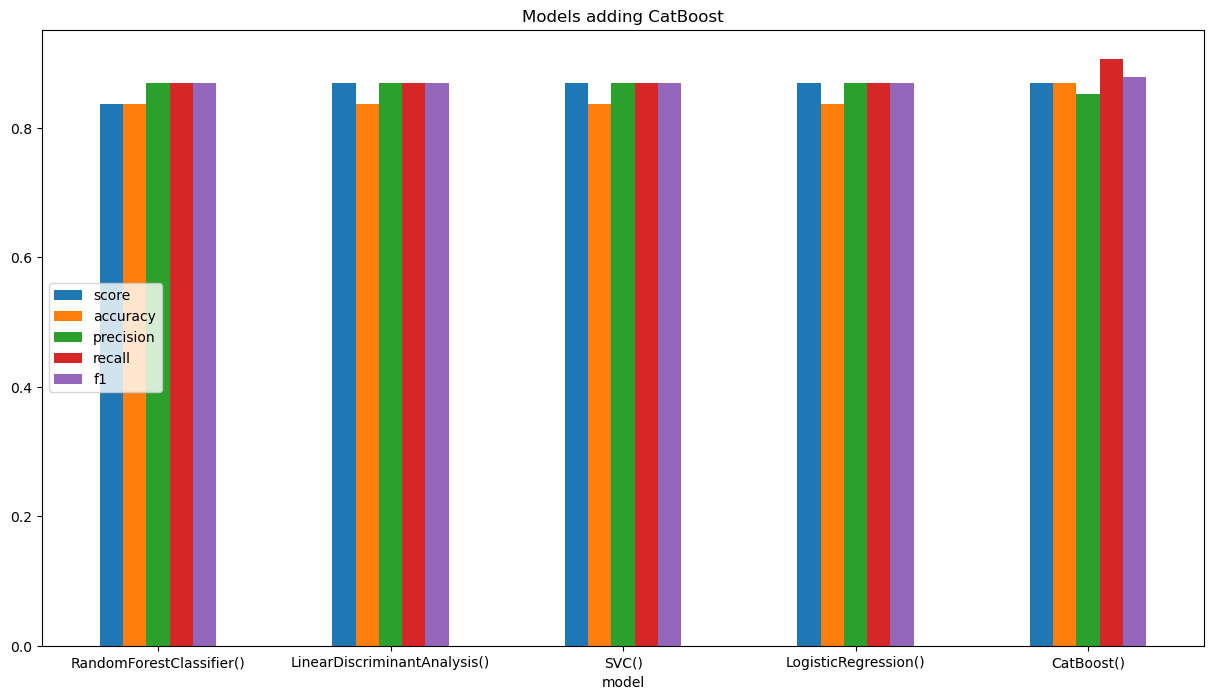

In [33]:
df_models.set_index('model').plot.bar(title="Models adding CatBoost", rot=0, figsize=(15, 8), fontsize=10).legend(loc='center left')

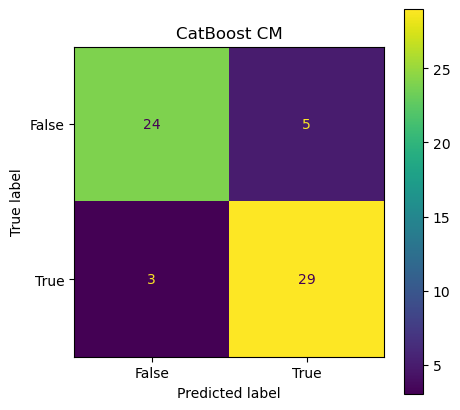

In [34]:
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
catb_matrix = confusion_matrix(y_test, catb.predict(X_test))
display_catb = ConfusionMatrixDisplay(catb_matrix,
                                      display_labels=['False', 'True'])

display_catb.plot(ax=axes, xticks_rotation='horizontal')
plt.title('CatBoost CM')
plt.show()

In [35]:
import eli5
from eli5.catboost import explain_weights_catboost

explain_weights_catboost(catb)

Explanation(estimator='<catboost.core.CatBoostClassifier object at 0x7fd0e0718850>', description='CatBoost feature importances; \nvalues are numbers 0 <= x <= 1; all values sum to 1.', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='ca', weight=0.17926306, std=None, value=None), FeatureWeight(feature='cp', weight=0.17581238, std=None, value=None), FeatureWeight(feature='thal', weight=0.122174025, std=None, value=None), FeatureWeight(feature='slope', weight=0.08813221, std=None, value=None), FeatureWeight(feature='age', weight=0.087649144, std=None, value=None), FeatureWeight(feature='oldpeak', weight=0.07770241, std=None, value=None), FeatureWeight(feature='restecg', weight=0.07647306, std=None, value=None), FeatureWeight(feature='trestbps', weight=0.066361785, std=None, value=None), FeatureWeight(feature='sex', weight=0.040361557, std=None, value=None), FeatureWeight(feature='chol', weight=0.030041032, std=None, value=None), FeatureWeight(feature='exang', weight=0.027719779, std=None, value=None), FeatureWeight(feature='thalach', weight=0.027069805, std=None, value=None), FeatureWeight(feature='fbs', weight=0.0012398333, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)